# Imports

In [1]:
import torch
from torch import Tensor
from torchvision.utils import save_image

from models.type import Type as ModelType
from data.type import Type as DataType
from results.results import Results
from train.params import Params
from train.builder import build_params
from IPython.display import Image

import ipywidgets as widgets

import ssl

from train.train_wgan import TrainWGan
from train.train_dcgan import TrainDCGan

ssl._create_default_https_context = ssl._create_unverified_context

# Generate Images Function

In [2]:
def generate_images(generator: torch.nn.Module, image_name: str):
    fixed_noise1: Tensor = torch.randn(64, 100)
    fixed_noise2: Tensor = torch.randn(64, 100)
    if torch.cuda.is_available():
        fixed_noise1 = fixed_noise1.cuda()
        fixed_noise2 = fixed_noise2.cuda()

    generated_image1 = generator(fixed_noise1)
    image_path_1 = "results/" + image_name + "_1.png"
    save_image(generated_image1.data, image_path_1, nrow=8, normalize=True)
    image1 = open(image_path_1, 'rb').read()
    wi1 = widgets.Image(value=image1, format='png', width=300, height=400)

    generated_image2 = generator(fixed_noise2)
    image_path_2 = "results/" + image_name + "_2.png"
    save_image(generated_image2.data, image_path_2, nrow=8, normalize=True) 
    image2 = open(image_path_2, 'rb').read()
    wi2 = widgets.Image(value=image2, format='png', width=300, height=400)

    sidebyside = widgets.HBox([wi1, wi2])
    display(sidebyside)

# Plot Function

In [3]:
import matplotlib.pyplot as plt

def plot(title: str, x_label: str, y_label: str, line1_label: str, line1_values: {}, 
         line2_label: str, line2_values: {}):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line1_x_values: [] = []
    line1_y_values: [] = []

    for key in line1_values:
        line1_x_values.append(key)
        line1_y_values.append(line1_values[key])

    plt.plot(line1_x_values, line1_y_values, label=line1_label)

    line2_x_values: [] = []
    line2_y_values: [] = []

    for key in line2_values:
        line2_x_values.append(key)
        line2_y_values.append(line2_values[key])

    plt.plot(line2_x_values, line2_y_values, label=line2_label)
    
    plt.legend(loc='best')
    plt.show()

# Train WGan

In [4]:
args: {} = {}
args["epochs"] = 200 # number of epochs of training
args["batch_size"] = 64 # size of the batches
args["lr"] = 0.0002 # adam: learning rate
args["b1"] = 0.5 # adam: decay of first order momentum of gradient
args["b2"] = 0.999 # adam: decay of first order momentum of gradient
args["latent_dim"] = 100 # dimensionality of the latent space
args["critic"] = 5 # number of training steps for discriminator per iter
args["gradient_penalty_lambda"] = 10 # loss weight for gradient penalty
args["save_generated_image_every"] = 50 # interval batches between saving image

### WGan with Fashion-Mnist

In [5]:
wgan_fashion_mnist_results: Results = Results("wgan_fashion_mnist")

params: Params = build_params(args, ModelType.WGAN_GP, DataType.FASHION_MNIST)
    
train: TrainWGan = TrainWGan(params, wgan_fashion_mnist_results.loss_updated_callback)
train.run()

[Epoch 1/200] [Batch 1/938] [Discriminator loss: 8.127172] [Generator loss: -0.035303]
[Epoch 1/200] [Batch 6/938] [Discriminator loss: 4.463756] [Generator loss: -0.050541]
[Epoch 1/200] [Batch 11/938] [Discriminator loss: -3.616458] [Generator loss: -0.109200]
[Epoch 1/200] [Batch 16/938] [Discriminator loss: -13.606588] [Generator loss: -0.264071]
[Epoch 1/200] [Batch 21/938] [Discriminator loss: -20.107290] [Generator loss: -0.497541]
[Epoch 1/200] [Batch 26/938] [Discriminator loss: -24.808548] [Generator loss: -0.721113]
[Epoch 1/200] [Batch 31/938] [Discriminator loss: -24.242928] [Generator loss: -0.910164]
[Epoch 1/200] [Batch 36/938] [Discriminator loss: -24.916168] [Generator loss: -1.142885]
[Epoch 1/200] [Batch 41/938] [Discriminator loss: -26.415947] [Generator loss: -1.353937]
[Epoch 1/200] [Batch 46/938] [Discriminator loss: -26.123873] [Generator loss: -1.602203]
[Epoch 1/200] [Batch 51/938] [Discriminator loss: -24.440279] [Generator loss: -1.913921]
[Epoch 1/200] [Ba

[Epoch 1/200] [Batch 456/938] [Discriminator loss: -5.773178] [Generator loss: -2.319394]
[Epoch 1/200] [Batch 461/938] [Discriminator loss: -6.116163] [Generator loss: -1.419481]
[Epoch 1/200] [Batch 466/938] [Discriminator loss: -5.024841] [Generator loss: -3.568626]
[Epoch 1/200] [Batch 471/938] [Discriminator loss: -5.153345] [Generator loss: -4.641424]
[Epoch 1/200] [Batch 476/938] [Discriminator loss: -5.966130] [Generator loss: -3.477351]
[Epoch 1/200] [Batch 481/938] [Discriminator loss: -5.370236] [Generator loss: -4.373660]
[Epoch 1/200] [Batch 486/938] [Discriminator loss: -5.920999] [Generator loss: -4.196855]
[Epoch 1/200] [Batch 491/938] [Discriminator loss: -5.690385] [Generator loss: -2.095216]
[Epoch 1/200] [Batch 496/938] [Discriminator loss: -3.862806] [Generator loss: -2.971026]
[Epoch 1/200] [Batch 501/938] [Discriminator loss: -5.136961] [Generator loss: -2.772377]
[Epoch 1/200] [Batch 506/938] [Discriminator loss: -5.990065] [Generator loss: -3.807972]
[Epoch 1/2

[Epoch 1/200] [Batch 916/938] [Discriminator loss: -4.028276] [Generator loss: -3.674839]
[Epoch 1/200] [Batch 921/938] [Discriminator loss: -4.345470] [Generator loss: -1.487103]
[Epoch 1/200] [Batch 926/938] [Discriminator loss: -3.803973] [Generator loss: -2.782844]
[Epoch 1/200] [Batch 931/938] [Discriminator loss: -4.077180] [Generator loss: -0.899907]
[Epoch 1/200] [Batch 936/938] [Discriminator loss: -3.796721] [Generator loss: -0.855206]
[Epoch 2/200] [Batch 1/938] [Discriminator loss: -3.717131] [Generator loss: -1.071289]
[Epoch 2/200] [Batch 6/938] [Discriminator loss: -4.096571] [Generator loss: 0.108883]
[Epoch 2/200] [Batch 11/938] [Discriminator loss: -4.432320] [Generator loss: 0.082668]
[Epoch 2/200] [Batch 16/938] [Discriminator loss: -4.078641] [Generator loss: 1.723958]
[Epoch 2/200] [Batch 21/938] [Discriminator loss: -4.801822] [Generator loss: 1.638702]
[Epoch 2/200] [Batch 26/938] [Discriminator loss: -4.242820] [Generator loss: 1.086430]
[Epoch 2/200] [Batch 31

[Epoch 2/200] [Batch 436/938] [Discriminator loss: -4.767350] [Generator loss: 2.171310]
[Epoch 2/200] [Batch 441/938] [Discriminator loss: -3.996676] [Generator loss: 0.922188]
[Epoch 2/200] [Batch 446/938] [Discriminator loss: -3.577561] [Generator loss: 0.592048]
[Epoch 2/200] [Batch 451/938] [Discriminator loss: -3.962402] [Generator loss: 1.103472]
[Epoch 2/200] [Batch 456/938] [Discriminator loss: -4.116426] [Generator loss: 2.626031]
[Epoch 2/200] [Batch 461/938] [Discriminator loss: -4.368537] [Generator loss: 2.091150]
[Epoch 2/200] [Batch 466/938] [Discriminator loss: -3.403260] [Generator loss: -0.635168]
[Epoch 2/200] [Batch 471/938] [Discriminator loss: -4.261131] [Generator loss: -1.492043]
[Epoch 2/200] [Batch 476/938] [Discriminator loss: -4.001462] [Generator loss: -0.362092]
[Epoch 2/200] [Batch 481/938] [Discriminator loss: -3.621074] [Generator loss: -1.300401]
[Epoch 2/200] [Batch 486/938] [Discriminator loss: -4.370541] [Generator loss: -0.238565]
[Epoch 2/200] [B

[Epoch 2/200] [Batch 896/938] [Discriminator loss: -3.313234] [Generator loss: 1.199097]
[Epoch 2/200] [Batch 901/938] [Discriminator loss: -4.003430] [Generator loss: 1.122003]
[Epoch 2/200] [Batch 906/938] [Discriminator loss: -3.627175] [Generator loss: 0.631951]
[Epoch 2/200] [Batch 911/938] [Discriminator loss: -3.994421] [Generator loss: -0.723544]
[Epoch 2/200] [Batch 916/938] [Discriminator loss: -3.371382] [Generator loss: 0.914200]
[Epoch 2/200] [Batch 921/938] [Discriminator loss: -3.672349] [Generator loss: -0.346581]
[Epoch 2/200] [Batch 926/938] [Discriminator loss: -3.445183] [Generator loss: 0.215591]
[Epoch 2/200] [Batch 931/938] [Discriminator loss: -4.240741] [Generator loss: -0.331584]
[Epoch 2/200] [Batch 936/938] [Discriminator loss: -4.100076] [Generator loss: 1.204665]
[Epoch 3/200] [Batch 1/938] [Discriminator loss: -2.969163] [Generator loss: -2.113996]
[Epoch 3/200] [Batch 6/938] [Discriminator loss: -3.621330] [Generator loss: -1.619748]
[Epoch 3/200] [Batch

[Epoch 3/200] [Batch 416/938] [Discriminator loss: -3.665268] [Generator loss: 0.327754]
[Epoch 3/200] [Batch 421/938] [Discriminator loss: -2.228380] [Generator loss: 0.886123]
[Epoch 3/200] [Batch 426/938] [Discriminator loss: -3.338154] [Generator loss: -2.108933]
[Epoch 3/200] [Batch 431/938] [Discriminator loss: -4.552713] [Generator loss: -1.220768]
[Epoch 3/200] [Batch 436/938] [Discriminator loss: -2.279703] [Generator loss: 0.792914]
[Epoch 3/200] [Batch 441/938] [Discriminator loss: -3.611565] [Generator loss: 1.543027]
[Epoch 3/200] [Batch 446/938] [Discriminator loss: -3.262266] [Generator loss: 1.552017]
[Epoch 3/200] [Batch 451/938] [Discriminator loss: -2.853501] [Generator loss: 0.923485]
[Epoch 3/200] [Batch 456/938] [Discriminator loss: -3.130302] [Generator loss: 0.573418]
[Epoch 3/200] [Batch 461/938] [Discriminator loss: -3.319930] [Generator loss: -0.834939]
[Epoch 3/200] [Batch 466/938] [Discriminator loss: -3.429536] [Generator loss: -1.148202]
[Epoch 3/200] [Ba

[Epoch 3/200] [Batch 876/938] [Discriminator loss: -2.862703] [Generator loss: -1.313899]
[Epoch 3/200] [Batch 881/938] [Discriminator loss: -3.600736] [Generator loss: -0.139815]
[Epoch 3/200] [Batch 886/938] [Discriminator loss: -3.120222] [Generator loss: -0.376932]
[Epoch 3/200] [Batch 891/938] [Discriminator loss: -2.991651] [Generator loss: -0.852897]
[Epoch 3/200] [Batch 896/938] [Discriminator loss: -3.282962] [Generator loss: -0.308836]
[Epoch 3/200] [Batch 901/938] [Discriminator loss: -2.763469] [Generator loss: -0.932745]
[Epoch 3/200] [Batch 906/938] [Discriminator loss: -3.897773] [Generator loss: 0.499441]
[Epoch 3/200] [Batch 911/938] [Discriminator loss: -2.941953] [Generator loss: 0.050945]
[Epoch 3/200] [Batch 916/938] [Discriminator loss: -3.491549] [Generator loss: 0.676317]
[Epoch 3/200] [Batch 921/938] [Discriminator loss: -3.651760] [Generator loss: -1.420259]
[Epoch 3/200] [Batch 926/938] [Discriminator loss: -2.933901] [Generator loss: -0.873212]
[Epoch 3/200]

[Epoch 4/200] [Batch 396/938] [Discriminator loss: -3.195228] [Generator loss: -1.327269]
[Epoch 4/200] [Batch 401/938] [Discriminator loss: -3.118464] [Generator loss: -0.199514]
[Epoch 4/200] [Batch 406/938] [Discriminator loss: -3.239823] [Generator loss: 0.212180]
[Epoch 4/200] [Batch 411/938] [Discriminator loss: -2.639497] [Generator loss: 1.986979]
[Epoch 4/200] [Batch 416/938] [Discriminator loss: -3.143054] [Generator loss: -0.115232]
[Epoch 4/200] [Batch 421/938] [Discriminator loss: -3.426186] [Generator loss: -1.380305]
[Epoch 4/200] [Batch 426/938] [Discriminator loss: -2.943004] [Generator loss: -1.018768]
[Epoch 4/200] [Batch 431/938] [Discriminator loss: -2.552408] [Generator loss: -2.220073]
[Epoch 4/200] [Batch 436/938] [Discriminator loss: -3.919710] [Generator loss: -1.088446]
[Epoch 4/200] [Batch 441/938] [Discriminator loss: -2.637383] [Generator loss: -0.228522]
[Epoch 4/200] [Batch 446/938] [Discriminator loss: -3.259368] [Generator loss: -1.753683]
[Epoch 4/200

[Epoch 4/200] [Batch 856/938] [Discriminator loss: -2.969723] [Generator loss: -1.549918]
[Epoch 4/200] [Batch 861/938] [Discriminator loss: -3.119353] [Generator loss: -1.112368]
[Epoch 4/200] [Batch 866/938] [Discriminator loss: -2.878615] [Generator loss: 0.181549]
[Epoch 4/200] [Batch 871/938] [Discriminator loss: -2.911193] [Generator loss: -0.530831]
[Epoch 4/200] [Batch 876/938] [Discriminator loss: -3.365692] [Generator loss: -0.466084]
[Epoch 4/200] [Batch 881/938] [Discriminator loss: -3.212955] [Generator loss: -0.068369]
[Epoch 4/200] [Batch 886/938] [Discriminator loss: -2.924533] [Generator loss: -0.912029]
[Epoch 4/200] [Batch 891/938] [Discriminator loss: -3.032732] [Generator loss: -2.659182]
[Epoch 4/200] [Batch 896/938] [Discriminator loss: -3.397736] [Generator loss: -1.354579]
[Epoch 4/200] [Batch 901/938] [Discriminator loss: -2.581283] [Generator loss: -1.337760]
[Epoch 4/200] [Batch 906/938] [Discriminator loss: -2.931560] [Generator loss: -0.892312]
[Epoch 4/20

[Epoch 5/200] [Batch 376/938] [Discriminator loss: -3.645738] [Generator loss: 0.935444]
[Epoch 5/200] [Batch 381/938] [Discriminator loss: -3.569985] [Generator loss: 1.412634]
[Epoch 5/200] [Batch 386/938] [Discriminator loss: -2.683905] [Generator loss: 0.480123]
[Epoch 5/200] [Batch 391/938] [Discriminator loss: -2.956481] [Generator loss: -0.115200]
[Epoch 5/200] [Batch 396/938] [Discriminator loss: -2.487995] [Generator loss: 0.927535]
[Epoch 5/200] [Batch 401/938] [Discriminator loss: -2.431031] [Generator loss: 0.541282]
[Epoch 5/200] [Batch 406/938] [Discriminator loss: -2.496228] [Generator loss: -2.329431]
[Epoch 5/200] [Batch 411/938] [Discriminator loss: -2.705707] [Generator loss: -1.460706]
[Epoch 5/200] [Batch 416/938] [Discriminator loss: -3.011127] [Generator loss: -2.178092]
[Epoch 5/200] [Batch 421/938] [Discriminator loss: -2.394847] [Generator loss: -3.148474]
[Epoch 5/200] [Batch 426/938] [Discriminator loss: -2.552930] [Generator loss: -2.698330]
[Epoch 5/200] [

[Epoch 5/200] [Batch 836/938] [Discriminator loss: -3.106234] [Generator loss: -1.719488]
[Epoch 5/200] [Batch 841/938] [Discriminator loss: -2.801048] [Generator loss: -1.662528]
[Epoch 5/200] [Batch 846/938] [Discriminator loss: -2.439124] [Generator loss: -1.439628]
[Epoch 5/200] [Batch 851/938] [Discriminator loss: -2.872231] [Generator loss: -3.127636]
[Epoch 5/200] [Batch 856/938] [Discriminator loss: -2.822592] [Generator loss: -1.400662]
[Epoch 5/200] [Batch 861/938] [Discriminator loss: -3.180877] [Generator loss: 0.256430]
[Epoch 5/200] [Batch 866/938] [Discriminator loss: -3.296814] [Generator loss: 1.113619]
[Epoch 5/200] [Batch 871/938] [Discriminator loss: -3.593409] [Generator loss: 1.773003]
[Epoch 5/200] [Batch 876/938] [Discriminator loss: -2.178820] [Generator loss: -1.132056]
[Epoch 5/200] [Batch 881/938] [Discriminator loss: -2.664630] [Generator loss: -2.424011]
[Epoch 5/200] [Batch 886/938] [Discriminator loss: -2.926778] [Generator loss: -1.103676]
[Epoch 5/200]

[Epoch 6/200] [Batch 356/938] [Discriminator loss: -2.754198] [Generator loss: -2.657630]
[Epoch 6/200] [Batch 361/938] [Discriminator loss: -2.341249] [Generator loss: -3.325512]
[Epoch 6/200] [Batch 366/938] [Discriminator loss: -2.671624] [Generator loss: -3.015641]
[Epoch 6/200] [Batch 371/938] [Discriminator loss: -3.165999] [Generator loss: -3.371249]
[Epoch 6/200] [Batch 376/938] [Discriminator loss: -2.683498] [Generator loss: -3.687268]
[Epoch 6/200] [Batch 381/938] [Discriminator loss: -3.000560] [Generator loss: -2.059659]
[Epoch 6/200] [Batch 386/938] [Discriminator loss: -3.364566] [Generator loss: -3.151345]
[Epoch 6/200] [Batch 391/938] [Discriminator loss: -2.790025] [Generator loss: -3.202237]
[Epoch 6/200] [Batch 396/938] [Discriminator loss: -2.530687] [Generator loss: -1.984849]
[Epoch 6/200] [Batch 401/938] [Discriminator loss: -3.155457] [Generator loss: -1.402168]
[Epoch 6/200] [Batch 406/938] [Discriminator loss: -2.846921] [Generator loss: -1.604256]
[Epoch 6/2

[Epoch 6/200] [Batch 816/938] [Discriminator loss: -2.922040] [Generator loss: 0.874627]
[Epoch 6/200] [Batch 821/938] [Discriminator loss: -2.741904] [Generator loss: 0.986131]
[Epoch 6/200] [Batch 826/938] [Discriminator loss: -2.204743] [Generator loss: -0.467318]
[Epoch 6/200] [Batch 831/938] [Discriminator loss: -2.634315] [Generator loss: -0.992286]
[Epoch 6/200] [Batch 836/938] [Discriminator loss: -4.333576] [Generator loss: -1.695690]
[Epoch 6/200] [Batch 841/938] [Discriminator loss: -1.853491] [Generator loss: -1.092192]
[Epoch 6/200] [Batch 846/938] [Discriminator loss: -2.915457] [Generator loss: -1.432864]
[Epoch 6/200] [Batch 851/938] [Discriminator loss: -3.374277] [Generator loss: -0.458058]
[Epoch 6/200] [Batch 856/938] [Discriminator loss: -2.472283] [Generator loss: -1.338232]
[Epoch 6/200] [Batch 861/938] [Discriminator loss: -2.593108] [Generator loss: -0.908817]
[Epoch 6/200] [Batch 866/938] [Discriminator loss: -3.030723] [Generator loss: -0.055188]
[Epoch 6/200

[Epoch 7/200] [Batch 336/938] [Discriminator loss: -2.601936] [Generator loss: -2.920460]
[Epoch 7/200] [Batch 341/938] [Discriminator loss: -2.689082] [Generator loss: -2.033874]
[Epoch 7/200] [Batch 346/938] [Discriminator loss: -2.306287] [Generator loss: -2.231172]
[Epoch 7/200] [Batch 351/938] [Discriminator loss: -2.470551] [Generator loss: -4.510157]
[Epoch 7/200] [Batch 356/938] [Discriminator loss: -2.156770] [Generator loss: -3.436759]
[Epoch 7/200] [Batch 361/938] [Discriminator loss: -2.514906] [Generator loss: -1.505825]
[Epoch 7/200] [Batch 366/938] [Discriminator loss: -2.885997] [Generator loss: -0.039966]
[Epoch 7/200] [Batch 371/938] [Discriminator loss: -2.653111] [Generator loss: 0.387574]
[Epoch 7/200] [Batch 376/938] [Discriminator loss: -1.956753] [Generator loss: -0.288677]
[Epoch 7/200] [Batch 381/938] [Discriminator loss: -2.581072] [Generator loss: 0.215893]
[Epoch 7/200] [Batch 386/938] [Discriminator loss: -2.536776] [Generator loss: -1.082004]
[Epoch 7/200

[Epoch 7/200] [Batch 796/938] [Discriminator loss: -2.550627] [Generator loss: -0.136272]
[Epoch 7/200] [Batch 801/938] [Discriminator loss: -2.619329] [Generator loss: -1.730373]
[Epoch 7/200] [Batch 806/938] [Discriminator loss: -2.415985] [Generator loss: -2.932103]
[Epoch 7/200] [Batch 811/938] [Discriminator loss: -2.839678] [Generator loss: -1.334226]
[Epoch 7/200] [Batch 816/938] [Discriminator loss: -3.567484] [Generator loss: -0.951943]
[Epoch 7/200] [Batch 821/938] [Discriminator loss: -2.819323] [Generator loss: -1.273616]
[Epoch 7/200] [Batch 826/938] [Discriminator loss: -2.810358] [Generator loss: -1.111571]
[Epoch 7/200] [Batch 831/938] [Discriminator loss: -2.251003] [Generator loss: -1.698442]
[Epoch 7/200] [Batch 836/938] [Discriminator loss: -2.602957] [Generator loss: -0.950506]
[Epoch 7/200] [Batch 841/938] [Discriminator loss: -2.497776] [Generator loss: -1.130470]
[Epoch 7/200] [Batch 846/938] [Discriminator loss: -3.337022] [Generator loss: -1.276900]
[Epoch 7/2

[Epoch 8/200] [Batch 316/938] [Discriminator loss: -1.793849] [Generator loss: -1.195887]
[Epoch 8/200] [Batch 321/938] [Discriminator loss: -2.762774] [Generator loss: -2.889002]
[Epoch 8/200] [Batch 326/938] [Discriminator loss: -2.838703] [Generator loss: -1.468754]
[Epoch 8/200] [Batch 331/938] [Discriminator loss: -1.542204] [Generator loss: -0.190261]
[Epoch 8/200] [Batch 336/938] [Discriminator loss: -1.894856] [Generator loss: 0.482378]
[Epoch 8/200] [Batch 341/938] [Discriminator loss: -2.396292] [Generator loss: -2.329679]
[Epoch 8/200] [Batch 346/938] [Discriminator loss: -2.005482] [Generator loss: -4.267310]
[Epoch 8/200] [Batch 351/938] [Discriminator loss: -2.805847] [Generator loss: -2.561616]
[Epoch 8/200] [Batch 356/938] [Discriminator loss: -2.667594] [Generator loss: -1.475445]
[Epoch 8/200] [Batch 361/938] [Discriminator loss: -2.208310] [Generator loss: -1.934990]
[Epoch 8/200] [Batch 366/938] [Discriminator loss: -2.945894] [Generator loss: -0.965270]
[Epoch 8/20

[Epoch 8/200] [Batch 776/938] [Discriminator loss: -2.673463] [Generator loss: 0.306219]
[Epoch 8/200] [Batch 781/938] [Discriminator loss: -2.795214] [Generator loss: -0.024212]
[Epoch 8/200] [Batch 786/938] [Discriminator loss: -2.755867] [Generator loss: -1.405100]
[Epoch 8/200] [Batch 791/938] [Discriminator loss: -2.294389] [Generator loss: -0.413193]
[Epoch 8/200] [Batch 796/938] [Discriminator loss: -2.240933] [Generator loss: 0.831691]
[Epoch 8/200] [Batch 801/938] [Discriminator loss: -2.356250] [Generator loss: -0.941528]
[Epoch 8/200] [Batch 806/938] [Discriminator loss: -3.186699] [Generator loss: -3.313442]
[Epoch 8/200] [Batch 811/938] [Discriminator loss: -2.048730] [Generator loss: -2.073401]
[Epoch 8/200] [Batch 816/938] [Discriminator loss: -2.108068] [Generator loss: -2.730658]
[Epoch 8/200] [Batch 821/938] [Discriminator loss: -2.085349] [Generator loss: -2.007300]
[Epoch 8/200] [Batch 826/938] [Discriminator loss: -2.070569] [Generator loss: -2.117870]
[Epoch 8/200

[Epoch 9/200] [Batch 296/938] [Discriminator loss: -1.926427] [Generator loss: -3.982090]
[Epoch 9/200] [Batch 301/938] [Discriminator loss: -2.136455] [Generator loss: -4.181973]
[Epoch 9/200] [Batch 306/938] [Discriminator loss: -2.082803] [Generator loss: -1.437725]
[Epoch 9/200] [Batch 311/938] [Discriminator loss: -2.105388] [Generator loss: -1.125457]
[Epoch 9/200] [Batch 316/938] [Discriminator loss: -2.705183] [Generator loss: -2.186388]
[Epoch 9/200] [Batch 321/938] [Discriminator loss: -1.970660] [Generator loss: -3.856713]
[Epoch 9/200] [Batch 326/938] [Discriminator loss: -1.867032] [Generator loss: -3.775287]
[Epoch 9/200] [Batch 331/938] [Discriminator loss: -2.169513] [Generator loss: -1.830574]
[Epoch 9/200] [Batch 336/938] [Discriminator loss: -2.312728] [Generator loss: -1.814431]
[Epoch 9/200] [Batch 341/938] [Discriminator loss: -2.314952] [Generator loss: -0.377625]
[Epoch 9/200] [Batch 346/938] [Discriminator loss: -2.261863] [Generator loss: -0.608062]
[Epoch 9/2

[Epoch 9/200] [Batch 756/938] [Discriminator loss: -2.056741] [Generator loss: -1.886688]
[Epoch 9/200] [Batch 761/938] [Discriminator loss: -2.487968] [Generator loss: -1.883407]
[Epoch 9/200] [Batch 766/938] [Discriminator loss: -2.462769] [Generator loss: -1.537740]
[Epoch 9/200] [Batch 771/938] [Discriminator loss: -2.233839] [Generator loss: -0.904312]
[Epoch 9/200] [Batch 776/938] [Discriminator loss: -2.118913] [Generator loss: -0.141011]
[Epoch 9/200] [Batch 781/938] [Discriminator loss: -2.981695] [Generator loss: -1.554266]
[Epoch 9/200] [Batch 786/938] [Discriminator loss: -2.777121] [Generator loss: -1.732749]
[Epoch 9/200] [Batch 791/938] [Discriminator loss: -1.837359] [Generator loss: -2.166738]
[Epoch 9/200] [Batch 796/938] [Discriminator loss: -2.451706] [Generator loss: -2.963677]
[Epoch 9/200] [Batch 801/938] [Discriminator loss: -2.915005] [Generator loss: -0.580661]
[Epoch 9/200] [Batch 806/938] [Discriminator loss: -2.401190] [Generator loss: 0.171363]
[Epoch 9/20

[Epoch 10/200] [Batch 271/938] [Discriminator loss: -2.979192] [Generator loss: -5.877764]
[Epoch 10/200] [Batch 276/938] [Discriminator loss: -2.456788] [Generator loss: -6.579085]
[Epoch 10/200] [Batch 281/938] [Discriminator loss: -2.548879] [Generator loss: -0.956705]
[Epoch 10/200] [Batch 286/938] [Discriminator loss: -2.354333] [Generator loss: -1.590459]
[Epoch 10/200] [Batch 291/938] [Discriminator loss: -2.196667] [Generator loss: -3.472965]
[Epoch 10/200] [Batch 296/938] [Discriminator loss: -2.869243] [Generator loss: -4.398129]
[Epoch 10/200] [Batch 301/938] [Discriminator loss: -2.456269] [Generator loss: -2.472928]
[Epoch 10/200] [Batch 306/938] [Discriminator loss: -2.923566] [Generator loss: -0.343299]
[Epoch 10/200] [Batch 311/938] [Discriminator loss: -2.272598] [Generator loss: 0.734399]
[Epoch 10/200] [Batch 316/938] [Discriminator loss: -2.250075] [Generator loss: -0.893218]
[Epoch 10/200] [Batch 321/938] [Discriminator loss: -1.684744] [Generator loss: -0.005647]


[Epoch 10/200] [Batch 726/938] [Discriminator loss: -2.380977] [Generator loss: -2.204209]
[Epoch 10/200] [Batch 731/938] [Discriminator loss: -2.317577] [Generator loss: -1.840593]
[Epoch 10/200] [Batch 736/938] [Discriminator loss: -2.419045] [Generator loss: -2.859946]
[Epoch 10/200] [Batch 741/938] [Discriminator loss: -2.355377] [Generator loss: -2.454875]
[Epoch 10/200] [Batch 746/938] [Discriminator loss: -2.164696] [Generator loss: -1.268482]
[Epoch 10/200] [Batch 751/938] [Discriminator loss: -2.481361] [Generator loss: -1.562026]
[Epoch 10/200] [Batch 756/938] [Discriminator loss: -2.063655] [Generator loss: 0.243115]
[Epoch 10/200] [Batch 761/938] [Discriminator loss: -2.301588] [Generator loss: 0.229191]
[Epoch 10/200] [Batch 766/938] [Discriminator loss: -2.285228] [Generator loss: -0.110829]
[Epoch 10/200] [Batch 771/938] [Discriminator loss: -2.661911] [Generator loss: 1.116026]
[Epoch 10/200] [Batch 776/938] [Discriminator loss: -2.741591] [Generator loss: 0.145592]
[Ep

[Epoch 11/200] [Batch 241/938] [Discriminator loss: -2.427479] [Generator loss: -0.737392]
[Epoch 11/200] [Batch 246/938] [Discriminator loss: -2.498091] [Generator loss: -3.364810]
[Epoch 11/200] [Batch 251/938] [Discriminator loss: -2.483849] [Generator loss: -2.238701]
[Epoch 11/200] [Batch 256/938] [Discriminator loss: -2.171589] [Generator loss: -3.213368]
[Epoch 11/200] [Batch 261/938] [Discriminator loss: -1.945661] [Generator loss: -3.558912]
[Epoch 11/200] [Batch 266/938] [Discriminator loss: -2.284579] [Generator loss: -2.199508]
[Epoch 11/200] [Batch 271/938] [Discriminator loss: -3.061252] [Generator loss: -0.222877]
[Epoch 11/200] [Batch 276/938] [Discriminator loss: -2.135772] [Generator loss: -0.309755]
[Epoch 11/200] [Batch 281/938] [Discriminator loss: -2.437080] [Generator loss: -1.867752]
[Epoch 11/200] [Batch 286/938] [Discriminator loss: -2.165073] [Generator loss: -2.217014]
[Epoch 11/200] [Batch 291/938] [Discriminator loss: -2.241566] [Generator loss: -3.214108]

[Epoch 11/200] [Batch 696/938] [Discriminator loss: -2.257319] [Generator loss: -0.077911]
[Epoch 11/200] [Batch 701/938] [Discriminator loss: -2.226252] [Generator loss: 0.061171]
[Epoch 11/200] [Batch 706/938] [Discriminator loss: -2.054510] [Generator loss: -0.645776]
[Epoch 11/200] [Batch 711/938] [Discriminator loss: -2.113634] [Generator loss: -2.770621]
[Epoch 11/200] [Batch 716/938] [Discriminator loss: -2.009795] [Generator loss: -3.378695]
[Epoch 11/200] [Batch 721/938] [Discriminator loss: -2.145891] [Generator loss: -1.620169]
[Epoch 11/200] [Batch 726/938] [Discriminator loss: -1.678682] [Generator loss: -2.810253]
[Epoch 11/200] [Batch 731/938] [Discriminator loss: -1.757220] [Generator loss: -2.490563]
[Epoch 11/200] [Batch 736/938] [Discriminator loss: -2.422366] [Generator loss: -2.405318]
[Epoch 11/200] [Batch 741/938] [Discriminator loss: -2.349359] [Generator loss: -3.164422]
[Epoch 11/200] [Batch 746/938] [Discriminator loss: -2.211117] [Generator loss: -2.347709]


[Epoch 12/200] [Batch 211/938] [Discriminator loss: -2.598802] [Generator loss: -0.144267]
[Epoch 12/200] [Batch 216/938] [Discriminator loss: -2.211555] [Generator loss: -0.248551]
[Epoch 12/200] [Batch 221/938] [Discriminator loss: -2.007212] [Generator loss: -2.452117]
[Epoch 12/200] [Batch 226/938] [Discriminator loss: -2.213388] [Generator loss: -3.647310]
[Epoch 12/200] [Batch 231/938] [Discriminator loss: -2.383234] [Generator loss: -2.122979]
[Epoch 12/200] [Batch 236/938] [Discriminator loss: -2.075853] [Generator loss: -1.025717]
[Epoch 12/200] [Batch 241/938] [Discriminator loss: -2.470671] [Generator loss: -2.478802]
[Epoch 12/200] [Batch 246/938] [Discriminator loss: -3.022776] [Generator loss: -3.028148]
[Epoch 12/200] [Batch 251/938] [Discriminator loss: -1.501849] [Generator loss: -3.043054]
[Epoch 12/200] [Batch 256/938] [Discriminator loss: -2.226385] [Generator loss: -3.283289]
[Epoch 12/200] [Batch 261/938] [Discriminator loss: -1.903120] [Generator loss: -2.369028]

[Epoch 12/200] [Batch 666/938] [Discriminator loss: -1.910463] [Generator loss: 0.005221]
[Epoch 12/200] [Batch 671/938] [Discriminator loss: -2.373546] [Generator loss: -0.433653]
[Epoch 12/200] [Batch 676/938] [Discriminator loss: -3.519161] [Generator loss: 0.775077]
[Epoch 12/200] [Batch 681/938] [Discriminator loss: -2.537969] [Generator loss: -0.997602]
[Epoch 12/200] [Batch 686/938] [Discriminator loss: -1.610857] [Generator loss: -1.373644]
[Epoch 12/200] [Batch 691/938] [Discriminator loss: -1.884302] [Generator loss: -1.357735]
[Epoch 12/200] [Batch 696/938] [Discriminator loss: -2.541943] [Generator loss: -1.456668]
[Epoch 12/200] [Batch 701/938] [Discriminator loss: -2.340379] [Generator loss: -2.536176]
[Epoch 12/200] [Batch 706/938] [Discriminator loss: -2.712378] [Generator loss: -3.133143]
[Epoch 12/200] [Batch 711/938] [Discriminator loss: -2.310497] [Generator loss: -3.539478]
[Epoch 12/200] [Batch 716/938] [Discriminator loss: -2.166782] [Generator loss: -3.874274]
[

[Epoch 13/200] [Batch 181/938] [Discriminator loss: -2.423603] [Generator loss: -0.435843]
[Epoch 13/200] [Batch 186/938] [Discriminator loss: -3.164032] [Generator loss: -0.700341]
[Epoch 13/200] [Batch 191/938] [Discriminator loss: -2.404673] [Generator loss: 1.945137]
[Epoch 13/200] [Batch 196/938] [Discriminator loss: -2.414960] [Generator loss: -1.483166]
[Epoch 13/200] [Batch 201/938] [Discriminator loss: -2.159833] [Generator loss: -2.222818]
[Epoch 13/200] [Batch 206/938] [Discriminator loss: -2.043496] [Generator loss: -1.657565]
[Epoch 13/200] [Batch 211/938] [Discriminator loss: -2.196604] [Generator loss: -0.083789]
[Epoch 13/200] [Batch 216/938] [Discriminator loss: -2.312048] [Generator loss: -0.180461]
[Epoch 13/200] [Batch 221/938] [Discriminator loss: -2.964985] [Generator loss: 1.170579]
[Epoch 13/200] [Batch 226/938] [Discriminator loss: -2.075155] [Generator loss: 0.573255]
[Epoch 13/200] [Batch 231/938] [Discriminator loss: -2.542523] [Generator loss: -0.986881]
[E

[Epoch 13/200] [Batch 636/938] [Discriminator loss: -2.311027] [Generator loss: -0.566738]
[Epoch 13/200] [Batch 641/938] [Discriminator loss: -1.687469] [Generator loss: -1.878099]
[Epoch 13/200] [Batch 646/938] [Discriminator loss: -2.334172] [Generator loss: -1.331213]
[Epoch 13/200] [Batch 651/938] [Discriminator loss: -2.281873] [Generator loss: -0.570177]
[Epoch 13/200] [Batch 656/938] [Discriminator loss: -1.062016] [Generator loss: -1.445611]
[Epoch 13/200] [Batch 661/938] [Discriminator loss: -2.715209] [Generator loss: -1.091313]
[Epoch 13/200] [Batch 666/938] [Discriminator loss: -2.276464] [Generator loss: -0.650359]
[Epoch 13/200] [Batch 671/938] [Discriminator loss: -2.229317] [Generator loss: -0.614581]
[Epoch 13/200] [Batch 676/938] [Discriminator loss: -2.064908] [Generator loss: -0.393020]
[Epoch 13/200] [Batch 681/938] [Discriminator loss: -2.322303] [Generator loss: -0.493367]
[Epoch 13/200] [Batch 686/938] [Discriminator loss: -2.797250] [Generator loss: -0.360593]

[Epoch 14/200] [Batch 151/938] [Discriminator loss: -1.979898] [Generator loss: -3.928717]
[Epoch 14/200] [Batch 156/938] [Discriminator loss: -1.681845] [Generator loss: -4.237221]
[Epoch 14/200] [Batch 161/938] [Discriminator loss: -1.679999] [Generator loss: -3.995538]
[Epoch 14/200] [Batch 166/938] [Discriminator loss: -2.272616] [Generator loss: -2.718700]
[Epoch 14/200] [Batch 171/938] [Discriminator loss: -2.232254] [Generator loss: -0.302387]
[Epoch 14/200] [Batch 176/938] [Discriminator loss: -2.084842] [Generator loss: 0.343107]
[Epoch 14/200] [Batch 181/938] [Discriminator loss: -2.006896] [Generator loss: -0.227040]
[Epoch 14/200] [Batch 186/938] [Discriminator loss: -2.316728] [Generator loss: -0.799272]
[Epoch 14/200] [Batch 191/938] [Discriminator loss: -1.311597] [Generator loss: -1.865905]
[Epoch 14/200] [Batch 196/938] [Discriminator loss: -1.948178] [Generator loss: -2.773282]
[Epoch 14/200] [Batch 201/938] [Discriminator loss: -2.009534] [Generator loss: -2.828049]


[Epoch 14/200] [Batch 606/938] [Discriminator loss: -2.652317] [Generator loss: -0.310154]
[Epoch 14/200] [Batch 611/938] [Discriminator loss: -2.055482] [Generator loss: -0.102426]
[Epoch 14/200] [Batch 616/938] [Discriminator loss: -2.288212] [Generator loss: -0.447869]
[Epoch 14/200] [Batch 621/938] [Discriminator loss: -2.181922] [Generator loss: -0.533093]
[Epoch 14/200] [Batch 626/938] [Discriminator loss: -1.941685] [Generator loss: -1.992875]
[Epoch 14/200] [Batch 631/938] [Discriminator loss: -2.620157] [Generator loss: -3.080102]
[Epoch 14/200] [Batch 636/938] [Discriminator loss: -1.242267] [Generator loss: -3.006001]
[Epoch 14/200] [Batch 641/938] [Discriminator loss: -2.497304] [Generator loss: -2.175825]
[Epoch 14/200] [Batch 646/938] [Discriminator loss: -2.074940] [Generator loss: -1.304133]
[Epoch 14/200] [Batch 651/938] [Discriminator loss: -1.693565] [Generator loss: -0.201269]
[Epoch 14/200] [Batch 656/938] [Discriminator loss: -1.643979] [Generator loss: -0.659136]

[Epoch 15/200] [Batch 121/938] [Discriminator loss: -2.017687] [Generator loss: 1.213287]
[Epoch 15/200] [Batch 126/938] [Discriminator loss: -2.176828] [Generator loss: -0.289676]
[Epoch 15/200] [Batch 131/938] [Discriminator loss: -2.129405] [Generator loss: -3.091284]
[Epoch 15/200] [Batch 136/938] [Discriminator loss: -2.165071] [Generator loss: -3.109970]
[Epoch 15/200] [Batch 141/938] [Discriminator loss: -1.657957] [Generator loss: -4.727186]
[Epoch 15/200] [Batch 146/938] [Discriminator loss: -2.334938] [Generator loss: -3.469337]
[Epoch 15/200] [Batch 151/938] [Discriminator loss: -1.992640] [Generator loss: -3.416720]
[Epoch 15/200] [Batch 156/938] [Discriminator loss: -1.782820] [Generator loss: -1.312643]
[Epoch 15/200] [Batch 161/938] [Discriminator loss: -2.359128] [Generator loss: -0.941691]
[Epoch 15/200] [Batch 166/938] [Discriminator loss: -1.878267] [Generator loss: -2.577289]
[Epoch 15/200] [Batch 171/938] [Discriminator loss: -2.619837] [Generator loss: -1.850842]


[Epoch 15/200] [Batch 576/938] [Discriminator loss: -1.900058] [Generator loss: -0.990201]
[Epoch 15/200] [Batch 581/938] [Discriminator loss: -3.094955] [Generator loss: -2.205333]
[Epoch 15/200] [Batch 586/938] [Discriminator loss: -2.272368] [Generator loss: -3.817243]
[Epoch 15/200] [Batch 591/938] [Discriminator loss: -2.697262] [Generator loss: -3.876330]
[Epoch 15/200] [Batch 596/938] [Discriminator loss: -1.609401] [Generator loss: -2.476128]
[Epoch 15/200] [Batch 601/938] [Discriminator loss: -1.711529] [Generator loss: -1.191180]
[Epoch 15/200] [Batch 606/938] [Discriminator loss: -2.024148] [Generator loss: -1.927255]
[Epoch 15/200] [Batch 611/938] [Discriminator loss: -1.554070] [Generator loss: -2.441507]
[Epoch 15/200] [Batch 616/938] [Discriminator loss: -2.356120] [Generator loss: 1.205313]
[Epoch 15/200] [Batch 621/938] [Discriminator loss: -2.259918] [Generator loss: 0.301713]
[Epoch 15/200] [Batch 626/938] [Discriminator loss: -1.924389] [Generator loss: -1.021171]
[

[Epoch 16/200] [Batch 91/938] [Discriminator loss: -1.954669] [Generator loss: -1.983147]
[Epoch 16/200] [Batch 96/938] [Discriminator loss: -2.398865] [Generator loss: -2.791934]
[Epoch 16/200] [Batch 101/938] [Discriminator loss: -2.477698] [Generator loss: -2.844325]
[Epoch 16/200] [Batch 106/938] [Discriminator loss: -2.039155] [Generator loss: -3.189527]
[Epoch 16/200] [Batch 111/938] [Discriminator loss: -1.369079] [Generator loss: -3.849871]
[Epoch 16/200] [Batch 116/938] [Discriminator loss: -2.332547] [Generator loss: -2.422072]
[Epoch 16/200] [Batch 121/938] [Discriminator loss: -1.621809] [Generator loss: -0.946484]
[Epoch 16/200] [Batch 126/938] [Discriminator loss: -1.945578] [Generator loss: 0.230722]
[Epoch 16/200] [Batch 131/938] [Discriminator loss: -2.228951] [Generator loss: -0.604778]
[Epoch 16/200] [Batch 136/938] [Discriminator loss: -1.871565] [Generator loss: -2.948394]
[Epoch 16/200] [Batch 141/938] [Discriminator loss: -2.351544] [Generator loss: -3.629354]
[E

[Epoch 16/200] [Batch 546/938] [Discriminator loss: -2.448760] [Generator loss: -2.532711]
[Epoch 16/200] [Batch 551/938] [Discriminator loss: -1.780341] [Generator loss: -1.411797]
[Epoch 16/200] [Batch 556/938] [Discriminator loss: -1.260744] [Generator loss: -1.719617]
[Epoch 16/200] [Batch 561/938] [Discriminator loss: -2.528396] [Generator loss: -2.163517]
[Epoch 16/200] [Batch 566/938] [Discriminator loss: -1.309564] [Generator loss: -2.219813]
[Epoch 16/200] [Batch 571/938] [Discriminator loss: -1.297364] [Generator loss: -2.872752]
[Epoch 16/200] [Batch 576/938] [Discriminator loss: -1.982699] [Generator loss: -2.321715]
[Epoch 16/200] [Batch 581/938] [Discriminator loss: -2.526720] [Generator loss: -2.223521]
[Epoch 16/200] [Batch 586/938] [Discriminator loss: -1.667422] [Generator loss: -2.168578]
[Epoch 16/200] [Batch 591/938] [Discriminator loss: -1.814912] [Generator loss: -3.225277]
[Epoch 16/200] [Batch 596/938] [Discriminator loss: -1.982769] [Generator loss: -4.089552]

[Epoch 17/200] [Batch 61/938] [Discriminator loss: -1.956231] [Generator loss: -4.168439]
[Epoch 17/200] [Batch 66/938] [Discriminator loss: -1.849376] [Generator loss: -4.730185]
[Epoch 17/200] [Batch 71/938] [Discriminator loss: -1.726140] [Generator loss: -4.519131]
[Epoch 17/200] [Batch 76/938] [Discriminator loss: -1.338584] [Generator loss: -2.755858]
[Epoch 17/200] [Batch 81/938] [Discriminator loss: -2.062501] [Generator loss: -3.625478]
[Epoch 17/200] [Batch 86/938] [Discriminator loss: -2.098288] [Generator loss: -2.362461]
[Epoch 17/200] [Batch 91/938] [Discriminator loss: -2.129442] [Generator loss: -1.705935]
[Epoch 17/200] [Batch 96/938] [Discriminator loss: -1.718252] [Generator loss: -1.813246]
[Epoch 17/200] [Batch 101/938] [Discriminator loss: -2.235623] [Generator loss: 0.111639]
[Epoch 17/200] [Batch 106/938] [Discriminator loss: -1.894004] [Generator loss: 0.407462]
[Epoch 17/200] [Batch 111/938] [Discriminator loss: -2.250251] [Generator loss: 0.451677]
[Epoch 17/

[Epoch 17/200] [Batch 516/938] [Discriminator loss: -1.746430] [Generator loss: 0.883131]
[Epoch 17/200] [Batch 521/938] [Discriminator loss: -1.777607] [Generator loss: 1.557628]
[Epoch 17/200] [Batch 526/938] [Discriminator loss: -1.817805] [Generator loss: 0.289760]
[Epoch 17/200] [Batch 531/938] [Discriminator loss: -1.457122] [Generator loss: 0.128941]
[Epoch 17/200] [Batch 536/938] [Discriminator loss: -2.216421] [Generator loss: -1.031919]
[Epoch 17/200] [Batch 541/938] [Discriminator loss: -1.775415] [Generator loss: -0.911533]
[Epoch 17/200] [Batch 546/938] [Discriminator loss: -2.008990] [Generator loss: 0.407659]
[Epoch 17/200] [Batch 551/938] [Discriminator loss: -2.403271] [Generator loss: -0.224711]
[Epoch 17/200] [Batch 556/938] [Discriminator loss: -2.436386] [Generator loss: -0.248336]
[Epoch 17/200] [Batch 561/938] [Discriminator loss: -2.149894] [Generator loss: -1.402328]
[Epoch 17/200] [Batch 566/938] [Discriminator loss: -2.066344] [Generator loss: -1.419522]
[Epo

[Epoch 18/200] [Batch 31/938] [Discriminator loss: -2.075430] [Generator loss: 0.150064]
[Epoch 18/200] [Batch 36/938] [Discriminator loss: -2.490382] [Generator loss: 0.401326]
[Epoch 18/200] [Batch 41/938] [Discriminator loss: -1.520512] [Generator loss: -0.230171]
[Epoch 18/200] [Batch 46/938] [Discriminator loss: -1.823630] [Generator loss: -0.288495]
[Epoch 18/200] [Batch 51/938] [Discriminator loss: -2.187640] [Generator loss: -1.218145]
[Epoch 18/200] [Batch 56/938] [Discriminator loss: -1.664116] [Generator loss: -0.839173]
[Epoch 18/200] [Batch 61/938] [Discriminator loss: -1.230529] [Generator loss: 0.578759]
[Epoch 18/200] [Batch 66/938] [Discriminator loss: -2.342357] [Generator loss: 0.594203]
[Epoch 18/200] [Batch 71/938] [Discriminator loss: -2.564774] [Generator loss: 0.591140]
[Epoch 18/200] [Batch 76/938] [Discriminator loss: -2.068107] [Generator loss: 0.764471]
[Epoch 18/200] [Batch 81/938] [Discriminator loss: -2.023828] [Generator loss: -1.507390]
[Epoch 18/200] [

[Epoch 18/200] [Batch 486/938] [Discriminator loss: -1.742411] [Generator loss: -0.312187]
[Epoch 18/200] [Batch 491/938] [Discriminator loss: -2.022603] [Generator loss: 0.167049]
[Epoch 18/200] [Batch 496/938] [Discriminator loss: -2.245451] [Generator loss: -0.335941]
[Epoch 18/200] [Batch 501/938] [Discriminator loss: -2.012399] [Generator loss: -0.295114]
[Epoch 18/200] [Batch 506/938] [Discriminator loss: -1.667302] [Generator loss: -0.859535]
[Epoch 18/200] [Batch 511/938] [Discriminator loss: -2.305333] [Generator loss: -1.082338]
[Epoch 18/200] [Batch 516/938] [Discriminator loss: -2.071851] [Generator loss: -1.191386]
[Epoch 18/200] [Batch 521/938] [Discriminator loss: -2.695858] [Generator loss: -1.053934]
[Epoch 18/200] [Batch 526/938] [Discriminator loss: -1.946945] [Generator loss: -1.915704]
[Epoch 18/200] [Batch 531/938] [Discriminator loss: -1.862974] [Generator loss: -2.852045]
[Epoch 18/200] [Batch 536/938] [Discriminator loss: -1.414031] [Generator loss: -3.091972]


[Epoch 19/200] [Batch 1/938] [Discriminator loss: -1.645043] [Generator loss: -1.001166]
[Epoch 19/200] [Batch 6/938] [Discriminator loss: -3.120227] [Generator loss: 0.324402]
[Epoch 19/200] [Batch 11/938] [Discriminator loss: -1.635116] [Generator loss: -1.091921]
[Epoch 19/200] [Batch 16/938] [Discriminator loss: -1.416832] [Generator loss: -2.714217]
[Epoch 19/200] [Batch 21/938] [Discriminator loss: -1.972318] [Generator loss: -1.685271]
[Epoch 19/200] [Batch 26/938] [Discriminator loss: -1.920502] [Generator loss: -1.958720]
[Epoch 19/200] [Batch 31/938] [Discriminator loss: -2.143392] [Generator loss: -2.394538]
[Epoch 19/200] [Batch 36/938] [Discriminator loss: -1.895214] [Generator loss: -1.034783]
[Epoch 19/200] [Batch 41/938] [Discriminator loss: -1.953521] [Generator loss: -1.214212]
[Epoch 19/200] [Batch 46/938] [Discriminator loss: -1.919397] [Generator loss: -2.445097]
[Epoch 19/200] [Batch 51/938] [Discriminator loss: -1.940985] [Generator loss: -1.488204]
[Epoch 19/200

[Epoch 19/200] [Batch 456/938] [Discriminator loss: -1.219371] [Generator loss: -2.163161]
[Epoch 19/200] [Batch 461/938] [Discriminator loss: -1.689981] [Generator loss: -2.922964]
[Epoch 19/200] [Batch 466/938] [Discriminator loss: -2.594842] [Generator loss: -2.206564]
[Epoch 19/200] [Batch 471/938] [Discriminator loss: -2.049160] [Generator loss: -0.005804]
[Epoch 19/200] [Batch 476/938] [Discriminator loss: -2.362168] [Generator loss: 1.000686]
[Epoch 19/200] [Batch 481/938] [Discriminator loss: -2.603404] [Generator loss: -0.275308]
[Epoch 19/200] [Batch 486/938] [Discriminator loss: -2.190215] [Generator loss: -0.853381]
[Epoch 19/200] [Batch 491/938] [Discriminator loss: -1.484473] [Generator loss: -0.686042]
[Epoch 19/200] [Batch 496/938] [Discriminator loss: -2.203408] [Generator loss: -1.837274]
[Epoch 19/200] [Batch 501/938] [Discriminator loss: -2.499614] [Generator loss: -1.041453]
[Epoch 19/200] [Batch 506/938] [Discriminator loss: -1.738697] [Generator loss: -1.358371]


[Epoch 19/200] [Batch 911/938] [Discriminator loss: -1.353546] [Generator loss: -1.513265]
[Epoch 19/200] [Batch 916/938] [Discriminator loss: -1.907099] [Generator loss: -2.561749]
[Epoch 19/200] [Batch 921/938] [Discriminator loss: -1.504418] [Generator loss: -2.657350]
[Epoch 19/200] [Batch 926/938] [Discriminator loss: -2.115041] [Generator loss: -2.837050]
[Epoch 19/200] [Batch 931/938] [Discriminator loss: -1.927247] [Generator loss: -0.970497]
[Epoch 19/200] [Batch 936/938] [Discriminator loss: -1.804898] [Generator loss: -0.658410]
[Epoch 20/200] [Batch 1/938] [Discriminator loss: -2.596088] [Generator loss: -0.940820]
[Epoch 20/200] [Batch 6/938] [Discriminator loss: -1.611072] [Generator loss: -0.733950]
[Epoch 20/200] [Batch 11/938] [Discriminator loss: -1.808413] [Generator loss: -0.253121]
[Epoch 20/200] [Batch 16/938] [Discriminator loss: -1.895021] [Generator loss: -0.365225]
[Epoch 20/200] [Batch 21/938] [Discriminator loss: -2.370218] [Generator loss: -0.697122]
[Epoch

[Epoch 20/200] [Batch 426/938] [Discriminator loss: -1.468640] [Generator loss: -1.199041]
[Epoch 20/200] [Batch 431/938] [Discriminator loss: -0.973162] [Generator loss: -1.277226]
[Epoch 20/200] [Batch 436/938] [Discriminator loss: -1.513490] [Generator loss: -0.149483]
[Epoch 20/200] [Batch 441/938] [Discriminator loss: -2.177904] [Generator loss: -0.843595]
[Epoch 20/200] [Batch 446/938] [Discriminator loss: -2.395033] [Generator loss: -1.300371]
[Epoch 20/200] [Batch 451/938] [Discriminator loss: -1.963868] [Generator loss: -0.695996]
[Epoch 20/200] [Batch 456/938] [Discriminator loss: -1.582282] [Generator loss: -1.455682]
[Epoch 20/200] [Batch 461/938] [Discriminator loss: -1.946987] [Generator loss: -2.153628]
[Epoch 20/200] [Batch 466/938] [Discriminator loss: -1.748207] [Generator loss: -3.127429]
[Epoch 20/200] [Batch 471/938] [Discriminator loss: -1.708387] [Generator loss: -3.156258]
[Epoch 20/200] [Batch 476/938] [Discriminator loss: -1.785868] [Generator loss: -2.787948]

[Epoch 20/200] [Batch 881/938] [Discriminator loss: -1.808135] [Generator loss: -0.924961]
[Epoch 20/200] [Batch 886/938] [Discriminator loss: -1.813789] [Generator loss: -0.732722]
[Epoch 20/200] [Batch 891/938] [Discriminator loss: -2.293457] [Generator loss: -1.664699]
[Epoch 20/200] [Batch 896/938] [Discriminator loss: -1.543926] [Generator loss: -1.868527]
[Epoch 20/200] [Batch 901/938] [Discriminator loss: -1.621914] [Generator loss: -1.679174]
[Epoch 20/200] [Batch 906/938] [Discriminator loss: -1.639380] [Generator loss: -2.404877]
[Epoch 20/200] [Batch 911/938] [Discriminator loss: -1.588029] [Generator loss: -2.894955]
[Epoch 20/200] [Batch 916/938] [Discriminator loss: -1.917518] [Generator loss: -2.648734]
[Epoch 20/200] [Batch 921/938] [Discriminator loss: -1.668325] [Generator loss: -2.633482]
[Epoch 20/200] [Batch 926/938] [Discriminator loss: -2.601891] [Generator loss: -3.914115]
[Epoch 20/200] [Batch 931/938] [Discriminator loss: -1.244458] [Generator loss: -3.772903]

[Epoch 21/200] [Batch 396/938] [Discriminator loss: -2.118469] [Generator loss: 0.914233]
[Epoch 21/200] [Batch 401/938] [Discriminator loss: -1.457997] [Generator loss: -1.408177]
[Epoch 21/200] [Batch 406/938] [Discriminator loss: -2.003804] [Generator loss: -3.181478]
[Epoch 21/200] [Batch 411/938] [Discriminator loss: -1.641182] [Generator loss: -4.563311]
[Epoch 21/200] [Batch 416/938] [Discriminator loss: -1.419168] [Generator loss: -3.935932]
[Epoch 21/200] [Batch 421/938] [Discriminator loss: -1.705041] [Generator loss: -3.783556]
[Epoch 21/200] [Batch 426/938] [Discriminator loss: -1.725379] [Generator loss: -2.802180]
[Epoch 21/200] [Batch 431/938] [Discriminator loss: -2.276247] [Generator loss: -2.001659]
[Epoch 21/200] [Batch 436/938] [Discriminator loss: -2.178738] [Generator loss: -2.389653]
[Epoch 21/200] [Batch 441/938] [Discriminator loss: -1.944707] [Generator loss: -2.010715]
[Epoch 21/200] [Batch 446/938] [Discriminator loss: -1.734811] [Generator loss: -2.146583]


[Epoch 21/200] [Batch 851/938] [Discriminator loss: -2.115874] [Generator loss: -1.785256]
[Epoch 21/200] [Batch 856/938] [Discriminator loss: -1.082351] [Generator loss: -0.954575]
[Epoch 21/200] [Batch 861/938] [Discriminator loss: -1.256730] [Generator loss: -2.901766]
[Epoch 21/200] [Batch 866/938] [Discriminator loss: -1.559019] [Generator loss: -3.554927]
[Epoch 21/200] [Batch 871/938] [Discriminator loss: -2.386634] [Generator loss: -2.608448]
[Epoch 21/200] [Batch 876/938] [Discriminator loss: -2.079633] [Generator loss: -0.400837]
[Epoch 21/200] [Batch 881/938] [Discriminator loss: -1.697965] [Generator loss: -1.228847]
[Epoch 21/200] [Batch 886/938] [Discriminator loss: -1.260494] [Generator loss: -0.595913]
[Epoch 21/200] [Batch 891/938] [Discriminator loss: -1.357249] [Generator loss: -1.399697]
[Epoch 21/200] [Batch 896/938] [Discriminator loss: -1.833663] [Generator loss: -2.508662]
[Epoch 21/200] [Batch 901/938] [Discriminator loss: -1.543199] [Generator loss: -1.161087]

[Epoch 22/200] [Batch 366/938] [Discriminator loss: -1.439673] [Generator loss: -0.784845]
[Epoch 22/200] [Batch 371/938] [Discriminator loss: -2.073585] [Generator loss: -0.222088]
[Epoch 22/200] [Batch 376/938] [Discriminator loss: -1.071944] [Generator loss: -1.764992]
[Epoch 22/200] [Batch 381/938] [Discriminator loss: -1.005094] [Generator loss: -3.338644]
[Epoch 22/200] [Batch 386/938] [Discriminator loss: -1.927080] [Generator loss: -3.712125]
[Epoch 22/200] [Batch 391/938] [Discriminator loss: -1.479822] [Generator loss: -2.169077]
[Epoch 22/200] [Batch 396/938] [Discriminator loss: -1.706633] [Generator loss: -1.389395]
[Epoch 22/200] [Batch 401/938] [Discriminator loss: -1.879945] [Generator loss: -1.995593]
[Epoch 22/200] [Batch 406/938] [Discriminator loss: -1.585234] [Generator loss: -2.974351]
[Epoch 22/200] [Batch 411/938] [Discriminator loss: -1.254267] [Generator loss: -2.539390]
[Epoch 22/200] [Batch 416/938] [Discriminator loss: -2.300633] [Generator loss: -0.633264]

[Epoch 22/200] [Batch 821/938] [Discriminator loss: -1.624497] [Generator loss: -0.214911]
[Epoch 22/200] [Batch 826/938] [Discriminator loss: -2.189675] [Generator loss: 0.080650]
[Epoch 22/200] [Batch 831/938] [Discriminator loss: -2.194413] [Generator loss: -0.690798]
[Epoch 22/200] [Batch 836/938] [Discriminator loss: -2.718336] [Generator loss: -1.696534]
[Epoch 22/200] [Batch 841/938] [Discriminator loss: -2.922283] [Generator loss: -2.480870]
[Epoch 22/200] [Batch 846/938] [Discriminator loss: -2.001386] [Generator loss: -3.927907]
[Epoch 22/200] [Batch 851/938] [Discriminator loss: -2.234842] [Generator loss: -4.120164]
[Epoch 22/200] [Batch 856/938] [Discriminator loss: -2.401697] [Generator loss: -3.100025]
[Epoch 22/200] [Batch 861/938] [Discriminator loss: -1.506291] [Generator loss: -4.591630]
[Epoch 22/200] [Batch 866/938] [Discriminator loss: -1.405872] [Generator loss: -2.893003]
[Epoch 22/200] [Batch 871/938] [Discriminator loss: -1.233559] [Generator loss: -1.164995]


[Epoch 23/200] [Batch 336/938] [Discriminator loss: -1.665794] [Generator loss: -1.956278]
[Epoch 23/200] [Batch 341/938] [Discriminator loss: -1.820941] [Generator loss: -2.360641]
[Epoch 23/200] [Batch 346/938] [Discriminator loss: -1.769971] [Generator loss: -3.056285]
[Epoch 23/200] [Batch 351/938] [Discriminator loss: -1.751302] [Generator loss: -2.601286]
[Epoch 23/200] [Batch 356/938] [Discriminator loss: -1.747496] [Generator loss: -1.953914]
[Epoch 23/200] [Batch 361/938] [Discriminator loss: -1.246814] [Generator loss: -1.914330]
[Epoch 23/200] [Batch 366/938] [Discriminator loss: -1.407555] [Generator loss: -2.866136]
[Epoch 23/200] [Batch 371/938] [Discriminator loss: -1.568098] [Generator loss: -3.954781]
[Epoch 23/200] [Batch 376/938] [Discriminator loss: -2.076402] [Generator loss: -2.262190]
[Epoch 23/200] [Batch 381/938] [Discriminator loss: -2.222401] [Generator loss: -0.979921]
[Epoch 23/200] [Batch 386/938] [Discriminator loss: -1.976319] [Generator loss: -1.083046]

[Epoch 23/200] [Batch 791/938] [Discriminator loss: -1.693965] [Generator loss: -2.965406]
[Epoch 23/200] [Batch 796/938] [Discriminator loss: -1.820824] [Generator loss: -3.011394]
[Epoch 23/200] [Batch 801/938] [Discriminator loss: -1.633750] [Generator loss: -2.471112]
[Epoch 23/200] [Batch 806/938] [Discriminator loss: -1.836666] [Generator loss: -2.366965]
[Epoch 23/200] [Batch 811/938] [Discriminator loss: -1.380040] [Generator loss: -0.958349]
[Epoch 23/200] [Batch 816/938] [Discriminator loss: -1.386021] [Generator loss: -1.054081]
[Epoch 23/200] [Batch 821/938] [Discriminator loss: -1.926055] [Generator loss: -2.055900]
[Epoch 23/200] [Batch 826/938] [Discriminator loss: -1.655282] [Generator loss: -2.276194]
[Epoch 23/200] [Batch 831/938] [Discriminator loss: -1.697278] [Generator loss: -2.843879]
[Epoch 23/200] [Batch 836/938] [Discriminator loss: -2.276778] [Generator loss: -2.493336]
[Epoch 23/200] [Batch 841/938] [Discriminator loss: -1.666875] [Generator loss: -3.816016]

[Epoch 24/200] [Batch 306/938] [Discriminator loss: -2.062493] [Generator loss: -0.858412]
[Epoch 24/200] [Batch 311/938] [Discriminator loss: -1.657749] [Generator loss: -0.896666]
[Epoch 24/200] [Batch 316/938] [Discriminator loss: -1.274038] [Generator loss: -0.730851]
[Epoch 24/200] [Batch 321/938] [Discriminator loss: -0.994244] [Generator loss: -1.035121]
[Epoch 24/200] [Batch 326/938] [Discriminator loss: -2.819923] [Generator loss: -0.777274]
[Epoch 24/200] [Batch 331/938] [Discriminator loss: -1.370532] [Generator loss: -1.411821]
[Epoch 24/200] [Batch 336/938] [Discriminator loss: -1.940619] [Generator loss: -2.074263]
[Epoch 24/200] [Batch 341/938] [Discriminator loss: -1.285958] [Generator loss: -2.378701]
[Epoch 24/200] [Batch 346/938] [Discriminator loss: -2.226604] [Generator loss: -2.034880]
[Epoch 24/200] [Batch 351/938] [Discriminator loss: -1.490953] [Generator loss: -2.882653]
[Epoch 24/200] [Batch 356/938] [Discriminator loss: -1.198552] [Generator loss: -2.304501]

[Epoch 24/200] [Batch 761/938] [Discriminator loss: -1.642759] [Generator loss: -1.814012]
[Epoch 24/200] [Batch 766/938] [Discriminator loss: -1.421982] [Generator loss: -0.967319]
[Epoch 24/200] [Batch 771/938] [Discriminator loss: -1.675493] [Generator loss: -1.284444]
[Epoch 24/200] [Batch 776/938] [Discriminator loss: -1.145190] [Generator loss: -0.822542]
[Epoch 24/200] [Batch 781/938] [Discriminator loss: -1.143815] [Generator loss: -0.392180]
[Epoch 24/200] [Batch 786/938] [Discriminator loss: -2.052177] [Generator loss: -1.131815]
[Epoch 24/200] [Batch 791/938] [Discriminator loss: -1.400266] [Generator loss: -1.462714]
[Epoch 24/200] [Batch 796/938] [Discriminator loss: -1.601949] [Generator loss: -1.577842]
[Epoch 24/200] [Batch 801/938] [Discriminator loss: -1.988905] [Generator loss: -2.026005]
[Epoch 24/200] [Batch 806/938] [Discriminator loss: -1.490730] [Generator loss: -3.530488]
[Epoch 24/200] [Batch 811/938] [Discriminator loss: -1.928795] [Generator loss: -3.203521]

[Epoch 25/200] [Batch 276/938] [Discriminator loss: -1.979765] [Generator loss: -2.276737]
[Epoch 25/200] [Batch 281/938] [Discriminator loss: -1.892788] [Generator loss: 0.073169]
[Epoch 25/200] [Batch 286/938] [Discriminator loss: -1.760002] [Generator loss: -0.190653]
[Epoch 25/200] [Batch 291/938] [Discriminator loss: -2.377820] [Generator loss: -1.296360]
[Epoch 25/200] [Batch 296/938] [Discriminator loss: -1.401827] [Generator loss: -1.007921]
[Epoch 25/200] [Batch 301/938] [Discriminator loss: -1.425609] [Generator loss: -0.928467]
[Epoch 25/200] [Batch 306/938] [Discriminator loss: -2.198239] [Generator loss: -0.575581]
[Epoch 25/200] [Batch 311/938] [Discriminator loss: -1.330221] [Generator loss: -0.546455]
[Epoch 25/200] [Batch 316/938] [Discriminator loss: -1.852279] [Generator loss: 0.016109]
[Epoch 25/200] [Batch 321/938] [Discriminator loss: -1.540966] [Generator loss: -1.050109]
[Epoch 25/200] [Batch 326/938] [Discriminator loss: -1.514242] [Generator loss: -2.450075]
[

[Epoch 25/200] [Batch 731/938] [Discriminator loss: -2.170964] [Generator loss: -0.796714]
[Epoch 25/200] [Batch 736/938] [Discriminator loss: -0.927980] [Generator loss: -0.001412]
[Epoch 25/200] [Batch 741/938] [Discriminator loss: -2.107791] [Generator loss: -0.049939]
[Epoch 25/200] [Batch 746/938] [Discriminator loss: -1.793773] [Generator loss: -0.618582]
[Epoch 25/200] [Batch 751/938] [Discriminator loss: -1.906103] [Generator loss: -1.907151]
[Epoch 25/200] [Batch 756/938] [Discriminator loss: -1.214227] [Generator loss: -2.087173]
[Epoch 25/200] [Batch 761/938] [Discriminator loss: -1.753193] [Generator loss: -2.397464]
[Epoch 25/200] [Batch 766/938] [Discriminator loss: -1.903711] [Generator loss: -2.070358]
[Epoch 25/200] [Batch 771/938] [Discriminator loss: -1.695868] [Generator loss: -1.083811]
[Epoch 25/200] [Batch 776/938] [Discriminator loss: -1.889715] [Generator loss: 0.169204]
[Epoch 25/200] [Batch 781/938] [Discriminator loss: -1.682302] [Generator loss: -0.269623]


[Epoch 26/200] [Batch 246/938] [Discriminator loss: -2.022180] [Generator loss: -0.534355]
[Epoch 26/200] [Batch 251/938] [Discriminator loss: -1.032719] [Generator loss: -2.291674]
[Epoch 26/200] [Batch 256/938] [Discriminator loss: -2.497541] [Generator loss: -2.388134]
[Epoch 26/200] [Batch 261/938] [Discriminator loss: -1.610601] [Generator loss: -3.451974]
[Epoch 26/200] [Batch 266/938] [Discriminator loss: -0.909356] [Generator loss: -2.511339]
[Epoch 26/200] [Batch 271/938] [Discriminator loss: -1.265109] [Generator loss: -1.953784]
[Epoch 26/200] [Batch 276/938] [Discriminator loss: -1.789561] [Generator loss: -2.444153]
[Epoch 26/200] [Batch 281/938] [Discriminator loss: -1.339410] [Generator loss: 0.221125]
[Epoch 26/200] [Batch 286/938] [Discriminator loss: -1.584084] [Generator loss: 0.903453]
[Epoch 26/200] [Batch 291/938] [Discriminator loss: -1.408554] [Generator loss: -0.090671]
[Epoch 26/200] [Batch 296/938] [Discriminator loss: -1.134987] [Generator loss: -0.412022]
[

[Epoch 26/200] [Batch 701/938] [Discriminator loss: -1.070602] [Generator loss: -1.983535]
[Epoch 26/200] [Batch 706/938] [Discriminator loss: -1.814740] [Generator loss: -2.553731]
[Epoch 26/200] [Batch 711/938] [Discriminator loss: -2.520952] [Generator loss: -3.435745]
[Epoch 26/200] [Batch 716/938] [Discriminator loss: -1.562449] [Generator loss: -2.800436]
[Epoch 26/200] [Batch 721/938] [Discriminator loss: -1.658518] [Generator loss: -1.856720]
[Epoch 26/200] [Batch 726/938] [Discriminator loss: -1.743268] [Generator loss: -2.082136]
[Epoch 26/200] [Batch 731/938] [Discriminator loss: -1.504272] [Generator loss: -2.162894]
[Epoch 26/200] [Batch 736/938] [Discriminator loss: -1.592046] [Generator loss: -2.863149]
[Epoch 26/200] [Batch 741/938] [Discriminator loss: -1.903079] [Generator loss: -2.969588]
[Epoch 26/200] [Batch 746/938] [Discriminator loss: -2.163865] [Generator loss: -3.283713]
[Epoch 26/200] [Batch 751/938] [Discriminator loss: -1.096377] [Generator loss: -1.300006]

[Epoch 27/200] [Batch 216/938] [Discriminator loss: -1.489322] [Generator loss: -1.884648]
[Epoch 27/200] [Batch 221/938] [Discriminator loss: -2.038389] [Generator loss: 0.621070]
[Epoch 27/200] [Batch 226/938] [Discriminator loss: -1.244993] [Generator loss: -0.380166]
[Epoch 27/200] [Batch 231/938] [Discriminator loss: -2.036443] [Generator loss: -1.934594]
[Epoch 27/200] [Batch 236/938] [Discriminator loss: -1.715342] [Generator loss: -1.782921]
[Epoch 27/200] [Batch 241/938] [Discriminator loss: -1.843863] [Generator loss: -1.333158]
[Epoch 27/200] [Batch 246/938] [Discriminator loss: -1.424942] [Generator loss: -2.128320]
[Epoch 27/200] [Batch 251/938] [Discriminator loss: -1.960271] [Generator loss: -1.944854]
[Epoch 27/200] [Batch 256/938] [Discriminator loss: -1.635302] [Generator loss: -2.566817]
[Epoch 27/200] [Batch 261/938] [Discriminator loss: -1.698626] [Generator loss: -2.130756]
[Epoch 27/200] [Batch 266/938] [Discriminator loss: -1.793615] [Generator loss: -1.905149]


[Epoch 27/200] [Batch 671/938] [Discriminator loss: -2.317598] [Generator loss: -2.115392]
[Epoch 27/200] [Batch 676/938] [Discriminator loss: -0.888037] [Generator loss: -2.312006]
[Epoch 27/200] [Batch 681/938] [Discriminator loss: -1.566240] [Generator loss: -2.060060]
[Epoch 27/200] [Batch 686/938] [Discriminator loss: -1.293784] [Generator loss: -2.309841]
[Epoch 27/200] [Batch 691/938] [Discriminator loss: -1.740356] [Generator loss: -1.096069]
[Epoch 27/200] [Batch 696/938] [Discriminator loss: -2.116766] [Generator loss: 0.353179]
[Epoch 27/200] [Batch 701/938] [Discriminator loss: -2.130678] [Generator loss: 0.318344]
[Epoch 27/200] [Batch 706/938] [Discriminator loss: -2.134901] [Generator loss: -0.164751]
[Epoch 27/200] [Batch 711/938] [Discriminator loss: -1.374304] [Generator loss: -0.338770]
[Epoch 27/200] [Batch 716/938] [Discriminator loss: -2.020543] [Generator loss: -0.614358]
[Epoch 27/200] [Batch 721/938] [Discriminator loss: -0.820882] [Generator loss: -0.061036]
[

[Epoch 28/200] [Batch 186/938] [Discriminator loss: -1.892297] [Generator loss: -0.376561]
[Epoch 28/200] [Batch 191/938] [Discriminator loss: -1.763977] [Generator loss: -0.543101]
[Epoch 28/200] [Batch 196/938] [Discriminator loss: -2.141242] [Generator loss: -0.819608]
[Epoch 28/200] [Batch 201/938] [Discriminator loss: -1.692416] [Generator loss: -2.488633]
[Epoch 28/200] [Batch 206/938] [Discriminator loss: -1.693610] [Generator loss: -1.911472]
[Epoch 28/200] [Batch 211/938] [Discriminator loss: -1.020402] [Generator loss: -1.056006]
[Epoch 28/200] [Batch 216/938] [Discriminator loss: -2.689769] [Generator loss: 1.151154]
[Epoch 28/200] [Batch 221/938] [Discriminator loss: -1.620709] [Generator loss: 0.848955]
[Epoch 28/200] [Batch 226/938] [Discriminator loss: -1.977607] [Generator loss: -0.401509]
[Epoch 28/200] [Batch 231/938] [Discriminator loss: -1.384098] [Generator loss: -0.862684]
[Epoch 28/200] [Batch 236/938] [Discriminator loss: -1.907480] [Generator loss: -1.043856]
[

[Epoch 28/200] [Batch 641/938] [Discriminator loss: -1.252556] [Generator loss: -1.058026]
[Epoch 28/200] [Batch 646/938] [Discriminator loss: -1.069581] [Generator loss: -1.664199]
[Epoch 28/200] [Batch 651/938] [Discriminator loss: -1.968502] [Generator loss: -2.630353]
[Epoch 28/200] [Batch 656/938] [Discriminator loss: -1.415930] [Generator loss: -3.642736]
[Epoch 28/200] [Batch 661/938] [Discriminator loss: -2.079297] [Generator loss: -2.423724]
[Epoch 28/200] [Batch 666/938] [Discriminator loss: -1.627819] [Generator loss: -1.852232]
[Epoch 28/200] [Batch 671/938] [Discriminator loss: -1.835881] [Generator loss: -1.169858]
[Epoch 28/200] [Batch 676/938] [Discriminator loss: -2.109618] [Generator loss: -1.119359]
[Epoch 28/200] [Batch 681/938] [Discriminator loss: -1.308669] [Generator loss: -0.268979]
[Epoch 28/200] [Batch 686/938] [Discriminator loss: -1.656184] [Generator loss: 0.328612]
[Epoch 28/200] [Batch 691/938] [Discriminator loss: -1.125890] [Generator loss: -1.049066]


[Epoch 29/200] [Batch 156/938] [Discriminator loss: -1.750952] [Generator loss: -2.120821]
[Epoch 29/200] [Batch 161/938] [Discriminator loss: -1.249395] [Generator loss: -1.983648]
[Epoch 29/200] [Batch 166/938] [Discriminator loss: -1.567503] [Generator loss: -2.029882]
[Epoch 29/200] [Batch 171/938] [Discriminator loss: -1.504186] [Generator loss: -1.994155]
[Epoch 29/200] [Batch 176/938] [Discriminator loss: -1.135640] [Generator loss: -2.382257]
[Epoch 29/200] [Batch 181/938] [Discriminator loss: -1.417243] [Generator loss: -0.769538]
[Epoch 29/200] [Batch 186/938] [Discriminator loss: -1.748219] [Generator loss: -2.000850]
[Epoch 29/200] [Batch 191/938] [Discriminator loss: -2.374275] [Generator loss: -1.508578]
[Epoch 29/200] [Batch 196/938] [Discriminator loss: -1.689015] [Generator loss: -1.572743]
[Epoch 29/200] [Batch 201/938] [Discriminator loss: -1.977410] [Generator loss: -3.083000]
[Epoch 29/200] [Batch 206/938] [Discriminator loss: -1.907725] [Generator loss: -3.124933]

[Epoch 29/200] [Batch 611/938] [Discriminator loss: -1.870810] [Generator loss: -1.018831]
[Epoch 29/200] [Batch 616/938] [Discriminator loss: -2.044646] [Generator loss: -1.552953]
[Epoch 29/200] [Batch 621/938] [Discriminator loss: -1.301732] [Generator loss: -2.203892]
[Epoch 29/200] [Batch 626/938] [Discriminator loss: -1.471279] [Generator loss: -2.544638]
[Epoch 29/200] [Batch 631/938] [Discriminator loss: -1.575911] [Generator loss: -2.783673]
[Epoch 29/200] [Batch 636/938] [Discriminator loss: -1.761111] [Generator loss: -2.330199]
[Epoch 29/200] [Batch 641/938] [Discriminator loss: -1.863183] [Generator loss: -1.994378]
[Epoch 29/200] [Batch 646/938] [Discriminator loss: -2.470195] [Generator loss: -2.712680]
[Epoch 29/200] [Batch 651/938] [Discriminator loss: -1.856090] [Generator loss: -1.976802]
[Epoch 29/200] [Batch 656/938] [Discriminator loss: -1.429378] [Generator loss: -1.740885]
[Epoch 29/200] [Batch 661/938] [Discriminator loss: -1.157329] [Generator loss: -0.586257]

[Epoch 30/200] [Batch 126/938] [Discriminator loss: -2.455875] [Generator loss: -0.634968]
[Epoch 30/200] [Batch 131/938] [Discriminator loss: -1.278277] [Generator loss: -0.602675]
[Epoch 30/200] [Batch 136/938] [Discriminator loss: -1.526978] [Generator loss: -1.839741]
[Epoch 30/200] [Batch 141/938] [Discriminator loss: -1.565537] [Generator loss: -1.841223]
[Epoch 30/200] [Batch 146/938] [Discriminator loss: -1.682030] [Generator loss: -2.079642]
[Epoch 30/200] [Batch 151/938] [Discriminator loss: -1.259544] [Generator loss: -3.625348]
[Epoch 30/200] [Batch 156/938] [Discriminator loss: -1.938062] [Generator loss: -3.357649]
[Epoch 30/200] [Batch 161/938] [Discriminator loss: -2.233133] [Generator loss: -3.223039]
[Epoch 30/200] [Batch 166/938] [Discriminator loss: -2.114318] [Generator loss: -2.843896]
[Epoch 30/200] [Batch 171/938] [Discriminator loss: -1.795901] [Generator loss: -2.244617]
[Epoch 30/200] [Batch 176/938] [Discriminator loss: -1.717160] [Generator loss: -2.362087]

[Epoch 30/200] [Batch 581/938] [Discriminator loss: -2.057817] [Generator loss: 1.454452]
[Epoch 30/200] [Batch 586/938] [Discriminator loss: -1.290270] [Generator loss: -0.081218]
[Epoch 30/200] [Batch 591/938] [Discriminator loss: -1.496456] [Generator loss: -1.142419]
[Epoch 30/200] [Batch 596/938] [Discriminator loss: -1.855737] [Generator loss: -2.408820]
[Epoch 30/200] [Batch 601/938] [Discriminator loss: -1.744530] [Generator loss: -1.468375]
[Epoch 30/200] [Batch 606/938] [Discriminator loss: -1.496993] [Generator loss: -1.792164]
[Epoch 30/200] [Batch 611/938] [Discriminator loss: -1.938593] [Generator loss: -1.744398]
[Epoch 30/200] [Batch 616/938] [Discriminator loss: -2.163140] [Generator loss: -0.799276]
[Epoch 30/200] [Batch 621/938] [Discriminator loss: -1.618466] [Generator loss: -0.815860]
[Epoch 30/200] [Batch 626/938] [Discriminator loss: -2.095590] [Generator loss: -2.761731]
[Epoch 30/200] [Batch 631/938] [Discriminator loss: -1.713572] [Generator loss: -4.448108]


[Epoch 31/200] [Batch 96/938] [Discriminator loss: -1.286353] [Generator loss: -0.754406]
[Epoch 31/200] [Batch 101/938] [Discriminator loss: -1.276647] [Generator loss: -1.984959]
[Epoch 31/200] [Batch 106/938] [Discriminator loss: -1.745832] [Generator loss: -2.053684]
[Epoch 31/200] [Batch 111/938] [Discriminator loss: -1.792952] [Generator loss: -1.485245]
[Epoch 31/200] [Batch 116/938] [Discriminator loss: -0.828751] [Generator loss: -2.621749]
[Epoch 31/200] [Batch 121/938] [Discriminator loss: -1.125776] [Generator loss: -2.896975]
[Epoch 31/200] [Batch 126/938] [Discriminator loss: -2.071860] [Generator loss: -2.015399]
[Epoch 31/200] [Batch 131/938] [Discriminator loss: -2.032820] [Generator loss: -1.877862]
[Epoch 31/200] [Batch 136/938] [Discriminator loss: -1.814988] [Generator loss: 0.350993]
[Epoch 31/200] [Batch 141/938] [Discriminator loss: -1.384205] [Generator loss: -0.372266]
[Epoch 31/200] [Batch 146/938] [Discriminator loss: -1.546304] [Generator loss: -0.583707]
[

[Epoch 31/200] [Batch 551/938] [Discriminator loss: -0.639897] [Generator loss: -1.792724]
[Epoch 31/200] [Batch 556/938] [Discriminator loss: -1.338061] [Generator loss: -1.988107]
[Epoch 31/200] [Batch 561/938] [Discriminator loss: -1.271467] [Generator loss: -1.794667]
[Epoch 31/200] [Batch 566/938] [Discriminator loss: -1.763592] [Generator loss: -2.179633]
[Epoch 31/200] [Batch 571/938] [Discriminator loss: -1.415531] [Generator loss: -2.416726]
[Epoch 31/200] [Batch 576/938] [Discriminator loss: -1.755605] [Generator loss: -1.745128]
[Epoch 31/200] [Batch 581/938] [Discriminator loss: -2.256836] [Generator loss: -2.553256]
[Epoch 31/200] [Batch 586/938] [Discriminator loss: -2.990985] [Generator loss: -2.719952]
[Epoch 31/200] [Batch 591/938] [Discriminator loss: -1.783241] [Generator loss: -3.523132]
[Epoch 31/200] [Batch 596/938] [Discriminator loss: -1.899456] [Generator loss: -3.423045]
[Epoch 31/200] [Batch 601/938] [Discriminator loss: -1.344639] [Generator loss: -2.693415]

[Epoch 32/200] [Batch 66/938] [Discriminator loss: -1.833169] [Generator loss: -0.840259]
[Epoch 32/200] [Batch 71/938] [Discriminator loss: -1.602932] [Generator loss: -1.099809]
[Epoch 32/200] [Batch 76/938] [Discriminator loss: -1.853600] [Generator loss: -2.567805]
[Epoch 32/200] [Batch 81/938] [Discriminator loss: -1.335376] [Generator loss: -3.609552]
[Epoch 32/200] [Batch 86/938] [Discriminator loss: -1.449182] [Generator loss: -3.083819]
[Epoch 32/200] [Batch 91/938] [Discriminator loss: -1.632006] [Generator loss: -3.720817]
[Epoch 32/200] [Batch 96/938] [Discriminator loss: -1.901435] [Generator loss: -3.080496]
[Epoch 32/200] [Batch 101/938] [Discriminator loss: -1.272820] [Generator loss: -3.191442]
[Epoch 32/200] [Batch 106/938] [Discriminator loss: -1.578128] [Generator loss: -3.357821]
[Epoch 32/200] [Batch 111/938] [Discriminator loss: -1.783275] [Generator loss: -2.504729]
[Epoch 32/200] [Batch 116/938] [Discriminator loss: -1.815476] [Generator loss: -2.089623]
[Epoch

[Epoch 32/200] [Batch 521/938] [Discriminator loss: -2.131765] [Generator loss: -0.814846]
[Epoch 32/200] [Batch 526/938] [Discriminator loss: -1.932095] [Generator loss: 0.318219]
[Epoch 32/200] [Batch 531/938] [Discriminator loss: -1.062313] [Generator loss: -0.814283]
[Epoch 32/200] [Batch 536/938] [Discriminator loss: -1.784846] [Generator loss: -1.018794]
[Epoch 32/200] [Batch 541/938] [Discriminator loss: -1.562856] [Generator loss: -0.418030]
[Epoch 32/200] [Batch 546/938] [Discriminator loss: -1.377426] [Generator loss: 0.078085]
[Epoch 32/200] [Batch 551/938] [Discriminator loss: -0.966586] [Generator loss: -1.684156]
[Epoch 32/200] [Batch 556/938] [Discriminator loss: -1.697087] [Generator loss: -1.317591]
[Epoch 32/200] [Batch 561/938] [Discriminator loss: -1.969312] [Generator loss: -1.497479]
[Epoch 32/200] [Batch 566/938] [Discriminator loss: -1.584131] [Generator loss: -3.459576]
[Epoch 32/200] [Batch 571/938] [Discriminator loss: -1.959025] [Generator loss: -3.840039]
[

[Epoch 33/200] [Batch 36/938] [Discriminator loss: -1.700268] [Generator loss: -1.331495]
[Epoch 33/200] [Batch 41/938] [Discriminator loss: -1.339175] [Generator loss: -1.115086]
[Epoch 33/200] [Batch 46/938] [Discriminator loss: -1.743543] [Generator loss: -3.404556]
[Epoch 33/200] [Batch 51/938] [Discriminator loss: -1.594412] [Generator loss: -2.632085]
[Epoch 33/200] [Batch 56/938] [Discriminator loss: -1.689600] [Generator loss: -2.298786]
[Epoch 33/200] [Batch 61/938] [Discriminator loss: -1.937125] [Generator loss: -1.380351]
[Epoch 33/200] [Batch 66/938] [Discriminator loss: -1.410156] [Generator loss: -0.964906]
[Epoch 33/200] [Batch 71/938] [Discriminator loss: -1.438568] [Generator loss: -2.189115]
[Epoch 33/200] [Batch 76/938] [Discriminator loss: -1.749409] [Generator loss: -2.368538]
[Epoch 33/200] [Batch 81/938] [Discriminator loss: -1.364656] [Generator loss: -2.969173]
[Epoch 33/200] [Batch 86/938] [Discriminator loss: -1.570024] [Generator loss: -1.939368]
[Epoch 33/

[Epoch 33/200] [Batch 491/938] [Discriminator loss: -2.052522] [Generator loss: 0.411595]
[Epoch 33/200] [Batch 496/938] [Discriminator loss: -1.341601] [Generator loss: -0.543833]
[Epoch 33/200] [Batch 501/938] [Discriminator loss: -1.557752] [Generator loss: -1.580632]
[Epoch 33/200] [Batch 506/938] [Discriminator loss: -1.811369] [Generator loss: -3.086724]
[Epoch 33/200] [Batch 511/938] [Discriminator loss: -1.691347] [Generator loss: -3.662708]
[Epoch 33/200] [Batch 516/938] [Discriminator loss: -1.138048] [Generator loss: -2.735493]
[Epoch 33/200] [Batch 521/938] [Discriminator loss: -1.569270] [Generator loss: -1.843992]
[Epoch 33/200] [Batch 526/938] [Discriminator loss: -1.890704] [Generator loss: -1.100593]
[Epoch 33/200] [Batch 531/938] [Discriminator loss: -1.565405] [Generator loss: 0.324879]
[Epoch 33/200] [Batch 536/938] [Discriminator loss: -1.495682] [Generator loss: 1.590519]
[Epoch 33/200] [Batch 541/938] [Discriminator loss: -0.898339] [Generator loss: 1.259859]
[Ep

[Epoch 34/200] [Batch 6/938] [Discriminator loss: -1.806519] [Generator loss: -1.890157]
[Epoch 34/200] [Batch 11/938] [Discriminator loss: -1.575508] [Generator loss: -3.618727]
[Epoch 34/200] [Batch 16/938] [Discriminator loss: -1.983050] [Generator loss: -1.880957]
[Epoch 34/200] [Batch 21/938] [Discriminator loss: -2.220606] [Generator loss: -0.717838]
[Epoch 34/200] [Batch 26/938] [Discriminator loss: -1.354989] [Generator loss: -0.961342]
[Epoch 34/200] [Batch 31/938] [Discriminator loss: -1.267873] [Generator loss: -0.930837]
[Epoch 34/200] [Batch 36/938] [Discriminator loss: -1.780953] [Generator loss: 0.893110]
[Epoch 34/200] [Batch 41/938] [Discriminator loss: -1.871537] [Generator loss: -0.393100]
[Epoch 34/200] [Batch 46/938] [Discriminator loss: -1.942438] [Generator loss: -1.871194]
[Epoch 34/200] [Batch 51/938] [Discriminator loss: -1.563708] [Generator loss: -2.884355]
[Epoch 34/200] [Batch 56/938] [Discriminator loss: -2.082734] [Generator loss: -1.859556]
[Epoch 34/20

[Epoch 34/200] [Batch 461/938] [Discriminator loss: -1.355157] [Generator loss: -1.171827]
[Epoch 34/200] [Batch 466/938] [Discriminator loss: -0.799229] [Generator loss: -1.708952]
[Epoch 34/200] [Batch 471/938] [Discriminator loss: -1.451411] [Generator loss: -0.838992]
[Epoch 34/200] [Batch 476/938] [Discriminator loss: -1.410140] [Generator loss: -1.065965]
[Epoch 34/200] [Batch 481/938] [Discriminator loss: -1.388609] [Generator loss: -0.730376]
[Epoch 34/200] [Batch 486/938] [Discriminator loss: -1.114676] [Generator loss: -1.546506]
[Epoch 34/200] [Batch 491/938] [Discriminator loss: -1.678444] [Generator loss: -0.723454]
[Epoch 34/200] [Batch 496/938] [Discriminator loss: -1.466029] [Generator loss: -1.047498]
[Epoch 34/200] [Batch 501/938] [Discriminator loss: -1.411191] [Generator loss: -0.326596]
[Epoch 34/200] [Batch 506/938] [Discriminator loss: -1.675632] [Generator loss: -1.131021]
[Epoch 34/200] [Batch 511/938] [Discriminator loss: -3.100455] [Generator loss: -1.204184]

[Epoch 34/200] [Batch 916/938] [Discriminator loss: -1.743055] [Generator loss: -2.256495]
[Epoch 34/200] [Batch 921/938] [Discriminator loss: -0.514835] [Generator loss: -1.801180]
[Epoch 34/200] [Batch 926/938] [Discriminator loss: -1.615861] [Generator loss: -1.579774]
[Epoch 34/200] [Batch 931/938] [Discriminator loss: -1.640912] [Generator loss: -1.674494]
[Epoch 34/200] [Batch 936/938] [Discriminator loss: -1.559421] [Generator loss: -2.716168]
[Epoch 35/200] [Batch 1/938] [Discriminator loss: -1.303334] [Generator loss: -2.657368]
[Epoch 35/200] [Batch 6/938] [Discriminator loss: -1.223280] [Generator loss: -3.538189]
[Epoch 35/200] [Batch 11/938] [Discriminator loss: -1.694116] [Generator loss: -4.813123]
[Epoch 35/200] [Batch 16/938] [Discriminator loss: -1.261689] [Generator loss: -3.826267]
[Epoch 35/200] [Batch 21/938] [Discriminator loss: -2.005398] [Generator loss: -1.980023]
[Epoch 35/200] [Batch 26/938] [Discriminator loss: -1.519300] [Generator loss: -0.918527]
[Epoch 

[Epoch 35/200] [Batch 431/938] [Discriminator loss: -1.283360] [Generator loss: -1.429137]
[Epoch 35/200] [Batch 436/938] [Discriminator loss: -1.472545] [Generator loss: -1.665878]
[Epoch 35/200] [Batch 441/938] [Discriminator loss: -1.295122] [Generator loss: -2.561816]
[Epoch 35/200] [Batch 446/938] [Discriminator loss: -1.850338] [Generator loss: -1.707947]
[Epoch 35/200] [Batch 451/938] [Discriminator loss: -2.083629] [Generator loss: -1.723612]
[Epoch 35/200] [Batch 456/938] [Discriminator loss: -1.869827] [Generator loss: -0.592350]
[Epoch 35/200] [Batch 461/938] [Discriminator loss: -1.637839] [Generator loss: -0.822305]
[Epoch 35/200] [Batch 466/938] [Discriminator loss: -1.024716] [Generator loss: 0.128635]
[Epoch 35/200] [Batch 471/938] [Discriminator loss: -1.287329] [Generator loss: 0.880553]
[Epoch 35/200] [Batch 476/938] [Discriminator loss: -1.178288] [Generator loss: 0.143104]
[Epoch 35/200] [Batch 481/938] [Discriminator loss: -1.267367] [Generator loss: -0.342919]
[E

[Epoch 35/200] [Batch 886/938] [Discriminator loss: -0.735864] [Generator loss: -3.623060]
[Epoch 35/200] [Batch 891/938] [Discriminator loss: -0.605968] [Generator loss: -3.981525]
[Epoch 35/200] [Batch 896/938] [Discriminator loss: -1.520368] [Generator loss: -3.249489]
[Epoch 35/200] [Batch 901/938] [Discriminator loss: -2.515261] [Generator loss: -1.410554]
[Epoch 35/200] [Batch 906/938] [Discriminator loss: -2.911305] [Generator loss: -0.631696]
[Epoch 35/200] [Batch 911/938] [Discriminator loss: -1.144237] [Generator loss: -0.344492]
[Epoch 35/200] [Batch 916/938] [Discriminator loss: -1.391635] [Generator loss: 0.645854]
[Epoch 35/200] [Batch 921/938] [Discriminator loss: -1.115811] [Generator loss: -0.009132]
[Epoch 35/200] [Batch 926/938] [Discriminator loss: -2.269646] [Generator loss: -0.495742]
[Epoch 35/200] [Batch 931/938] [Discriminator loss: -1.096255] [Generator loss: -0.805331]
[Epoch 35/200] [Batch 936/938] [Discriminator loss: -1.550264] [Generator loss: -1.931753]


[Epoch 36/200] [Batch 401/938] [Discriminator loss: -1.264465] [Generator loss: -1.439778]
[Epoch 36/200] [Batch 406/938] [Discriminator loss: -1.520395] [Generator loss: -0.976069]
[Epoch 36/200] [Batch 411/938] [Discriminator loss: -1.283175] [Generator loss: -1.089023]
[Epoch 36/200] [Batch 416/938] [Discriminator loss: -2.002223] [Generator loss: -1.964856]
[Epoch 36/200] [Batch 421/938] [Discriminator loss: -1.453405] [Generator loss: -2.978093]
[Epoch 36/200] [Batch 426/938] [Discriminator loss: -0.788741] [Generator loss: -3.563587]
[Epoch 36/200] [Batch 431/938] [Discriminator loss: -1.168174] [Generator loss: -2.972694]
[Epoch 36/200] [Batch 436/938] [Discriminator loss: -1.227391] [Generator loss: -3.102656]
[Epoch 36/200] [Batch 441/938] [Discriminator loss: -1.146407] [Generator loss: -2.309372]
[Epoch 36/200] [Batch 446/938] [Discriminator loss: -1.735858] [Generator loss: -2.169737]
[Epoch 36/200] [Batch 451/938] [Discriminator loss: -1.898406] [Generator loss: -0.752583]

[Epoch 36/200] [Batch 856/938] [Discriminator loss: -1.600088] [Generator loss: -0.140635]
[Epoch 36/200] [Batch 861/938] [Discriminator loss: -1.741012] [Generator loss: -0.255324]
[Epoch 36/200] [Batch 866/938] [Discriminator loss: -1.226697] [Generator loss: -1.371541]
[Epoch 36/200] [Batch 871/938] [Discriminator loss: -0.665339] [Generator loss: -2.032801]
[Epoch 36/200] [Batch 876/938] [Discriminator loss: -1.223837] [Generator loss: -1.887631]
[Epoch 36/200] [Batch 881/938] [Discriminator loss: -1.194981] [Generator loss: -2.164123]
[Epoch 36/200] [Batch 886/938] [Discriminator loss: -1.220350] [Generator loss: -1.960479]
[Epoch 36/200] [Batch 891/938] [Discriminator loss: -1.770117] [Generator loss: -1.925549]
[Epoch 36/200] [Batch 896/938] [Discriminator loss: -2.746572] [Generator loss: -0.694163]
[Epoch 36/200] [Batch 901/938] [Discriminator loss: -1.715571] [Generator loss: -0.624545]
[Epoch 36/200] [Batch 906/938] [Discriminator loss: -1.684825] [Generator loss: -0.991697]

[Epoch 37/200] [Batch 371/938] [Discriminator loss: -1.587739] [Generator loss: -2.609510]
[Epoch 37/200] [Batch 376/938] [Discriminator loss: -1.747195] [Generator loss: -2.591527]
[Epoch 37/200] [Batch 381/938] [Discriminator loss: -1.554402] [Generator loss: -2.137805]
[Epoch 37/200] [Batch 386/938] [Discriminator loss: -1.619637] [Generator loss: -2.830503]
[Epoch 37/200] [Batch 391/938] [Discriminator loss: -1.680654] [Generator loss: -2.562653]
[Epoch 37/200] [Batch 396/938] [Discriminator loss: -1.614321] [Generator loss: -1.835239]
[Epoch 37/200] [Batch 401/938] [Discriminator loss: -1.678442] [Generator loss: -2.477887]
[Epoch 37/200] [Batch 406/938] [Discriminator loss: -1.727726] [Generator loss: -1.877871]
[Epoch 37/200] [Batch 411/938] [Discriminator loss: -1.261378] [Generator loss: -1.785172]
[Epoch 37/200] [Batch 416/938] [Discriminator loss: -1.695836] [Generator loss: -1.597661]
[Epoch 37/200] [Batch 421/938] [Discriminator loss: -0.992624] [Generator loss: -2.092622]

[Epoch 37/200] [Batch 826/938] [Discriminator loss: -1.284379] [Generator loss: -3.889271]
[Epoch 37/200] [Batch 831/938] [Discriminator loss: -1.246836] [Generator loss: -3.249832]
[Epoch 37/200] [Batch 836/938] [Discriminator loss: -1.461841] [Generator loss: -2.739274]
[Epoch 37/200] [Batch 841/938] [Discriminator loss: -1.595569] [Generator loss: -2.531022]
[Epoch 37/200] [Batch 846/938] [Discriminator loss: -1.121999] [Generator loss: -1.831216]
[Epoch 37/200] [Batch 851/938] [Discriminator loss: -1.500653] [Generator loss: -1.535089]
[Epoch 37/200] [Batch 856/938] [Discriminator loss: -1.281194] [Generator loss: -1.535123]
[Epoch 37/200] [Batch 861/938] [Discriminator loss: -2.028127] [Generator loss: -2.785556]
[Epoch 37/200] [Batch 866/938] [Discriminator loss: -1.229805] [Generator loss: -3.529480]
[Epoch 37/200] [Batch 871/938] [Discriminator loss: -1.718980] [Generator loss: -4.206581]
[Epoch 37/200] [Batch 876/938] [Discriminator loss: -1.335007] [Generator loss: -3.848083]

[Epoch 38/200] [Batch 341/938] [Discriminator loss: -1.684890] [Generator loss: -2.880070]
[Epoch 38/200] [Batch 346/938] [Discriminator loss: -1.775265] [Generator loss: -2.839356]
[Epoch 38/200] [Batch 351/938] [Discriminator loss: -1.619426] [Generator loss: -3.831933]
[Epoch 38/200] [Batch 356/938] [Discriminator loss: -1.221175] [Generator loss: -3.807972]
[Epoch 38/200] [Batch 361/938] [Discriminator loss: -1.388378] [Generator loss: -1.638849]
[Epoch 38/200] [Batch 366/938] [Discriminator loss: -1.714303] [Generator loss: -0.183901]
[Epoch 38/200] [Batch 371/938] [Discriminator loss: -1.794546] [Generator loss: 1.029384]
[Epoch 38/200] [Batch 376/938] [Discriminator loss: -2.647433] [Generator loss: 3.375014]
[Epoch 38/200] [Batch 381/938] [Discriminator loss: -1.427351] [Generator loss: 0.453126]
[Epoch 38/200] [Batch 386/938] [Discriminator loss: -1.825490] [Generator loss: -0.274783]
[Epoch 38/200] [Batch 391/938] [Discriminator loss: -2.059849] [Generator loss: -0.840565]
[E

[Epoch 38/200] [Batch 796/938] [Discriminator loss: -0.762716] [Generator loss: -1.632742]
[Epoch 38/200] [Batch 801/938] [Discriminator loss: -1.706812] [Generator loss: -0.678454]
[Epoch 38/200] [Batch 806/938] [Discriminator loss: -1.465358] [Generator loss: -2.263009]
[Epoch 38/200] [Batch 811/938] [Discriminator loss: -1.372572] [Generator loss: -2.470930]
[Epoch 38/200] [Batch 816/938] [Discriminator loss: -1.579484] [Generator loss: -1.888718]
[Epoch 38/200] [Batch 821/938] [Discriminator loss: -2.378117] [Generator loss: -2.687216]
[Epoch 38/200] [Batch 826/938] [Discriminator loss: -2.641673] [Generator loss: -0.538709]
[Epoch 38/200] [Batch 831/938] [Discriminator loss: -0.974263] [Generator loss: -1.120649]
[Epoch 38/200] [Batch 836/938] [Discriminator loss: -1.324253] [Generator loss: -1.425649]
[Epoch 38/200] [Batch 841/938] [Discriminator loss: -1.257022] [Generator loss: -1.352437]
[Epoch 38/200] [Batch 846/938] [Discriminator loss: -1.553467] [Generator loss: -1.212482]

[Epoch 39/200] [Batch 311/938] [Discriminator loss: -1.984695] [Generator loss: -3.001812]
[Epoch 39/200] [Batch 316/938] [Discriminator loss: -0.655896] [Generator loss: -1.890053]
[Epoch 39/200] [Batch 321/938] [Discriminator loss: -1.284454] [Generator loss: -2.417628]
[Epoch 39/200] [Batch 326/938] [Discriminator loss: -1.549548] [Generator loss: -1.621278]
[Epoch 39/200] [Batch 331/938] [Discriminator loss: -1.227029] [Generator loss: 0.955506]
[Epoch 39/200] [Batch 336/938] [Discriminator loss: -1.358555] [Generator loss: 0.307134]
[Epoch 39/200] [Batch 341/938] [Discriminator loss: -1.343278] [Generator loss: 0.256469]
[Epoch 39/200] [Batch 346/938] [Discriminator loss: -1.882755] [Generator loss: -1.992398]
[Epoch 39/200] [Batch 351/938] [Discriminator loss: -1.297558] [Generator loss: -4.372384]
[Epoch 39/200] [Batch 356/938] [Discriminator loss: -1.422693] [Generator loss: -6.322483]
[Epoch 39/200] [Batch 361/938] [Discriminator loss: -1.513340] [Generator loss: -5.548393]
[E

[Epoch 39/200] [Batch 766/938] [Discriminator loss: -1.547885] [Generator loss: -0.912251]
[Epoch 39/200] [Batch 771/938] [Discriminator loss: 0.064158] [Generator loss: -0.479886]
[Epoch 39/200] [Batch 776/938] [Discriminator loss: -1.493833] [Generator loss: -0.614382]
[Epoch 39/200] [Batch 781/938] [Discriminator loss: -1.582141] [Generator loss: -1.171782]
[Epoch 39/200] [Batch 786/938] [Discriminator loss: -1.014709] [Generator loss: -2.671840]
[Epoch 39/200] [Batch 791/938] [Discriminator loss: -1.243656] [Generator loss: -2.523758]
[Epoch 39/200] [Batch 796/938] [Discriminator loss: -1.711378] [Generator loss: -2.287219]
[Epoch 39/200] [Batch 801/938] [Discriminator loss: -1.054995] [Generator loss: -2.610646]
[Epoch 39/200] [Batch 806/938] [Discriminator loss: -1.519614] [Generator loss: -1.321440]
[Epoch 39/200] [Batch 811/938] [Discriminator loss: -1.870884] [Generator loss: 0.545662]
[Epoch 39/200] [Batch 816/938] [Discriminator loss: -1.352155] [Generator loss: 0.885413]
[E

[Epoch 40/200] [Batch 281/938] [Discriminator loss: -1.260702] [Generator loss: -2.892944]
[Epoch 40/200] [Batch 286/938] [Discriminator loss: -1.257903] [Generator loss: -3.475501]
[Epoch 40/200] [Batch 291/938] [Discriminator loss: -1.305354] [Generator loss: -2.684906]
[Epoch 40/200] [Batch 296/938] [Discriminator loss: -1.626463] [Generator loss: -1.693507]
[Epoch 40/200] [Batch 301/938] [Discriminator loss: -0.838780] [Generator loss: -2.791708]
[Epoch 40/200] [Batch 306/938] [Discriminator loss: -1.112905] [Generator loss: -3.435855]
[Epoch 40/200] [Batch 311/938] [Discriminator loss: -1.130016] [Generator loss: -2.976285]
[Epoch 40/200] [Batch 316/938] [Discriminator loss: -1.604782] [Generator loss: -3.165089]
[Epoch 40/200] [Batch 321/938] [Discriminator loss: -1.560997] [Generator loss: -2.488853]
[Epoch 40/200] [Batch 326/938] [Discriminator loss: -1.579056] [Generator loss: -2.024081]
[Epoch 40/200] [Batch 331/938] [Discriminator loss: -1.534510] [Generator loss: -3.036019]

[Epoch 40/200] [Batch 736/938] [Discriminator loss: -1.785562] [Generator loss: -1.562378]
[Epoch 40/200] [Batch 741/938] [Discriminator loss: -1.286732] [Generator loss: -1.003212]
[Epoch 40/200] [Batch 746/938] [Discriminator loss: -1.471620] [Generator loss: -0.060725]
[Epoch 40/200] [Batch 751/938] [Discriminator loss: -1.820483] [Generator loss: 0.397626]
[Epoch 40/200] [Batch 756/938] [Discriminator loss: -1.226205] [Generator loss: -0.623150]
[Epoch 40/200] [Batch 761/938] [Discriminator loss: -1.872812] [Generator loss: -1.440792]
[Epoch 40/200] [Batch 766/938] [Discriminator loss: -1.955297] [Generator loss: -1.554653]
[Epoch 40/200] [Batch 771/938] [Discriminator loss: -1.138582] [Generator loss: -0.743774]
[Epoch 40/200] [Batch 776/938] [Discriminator loss: -0.882908] [Generator loss: 0.176671]
[Epoch 40/200] [Batch 781/938] [Discriminator loss: -1.332930] [Generator loss: -0.601530]
[Epoch 40/200] [Batch 786/938] [Discriminator loss: -2.163256] [Generator loss: -1.602143]
[

[Epoch 41/200] [Batch 251/938] [Discriminator loss: -1.413156] [Generator loss: 0.086945]
[Epoch 41/200] [Batch 256/938] [Discriminator loss: -1.673399] [Generator loss: -1.707379]
[Epoch 41/200] [Batch 261/938] [Discriminator loss: -1.615926] [Generator loss: -1.774451]
[Epoch 41/200] [Batch 266/938] [Discriminator loss: -1.443729] [Generator loss: -2.956699]
[Epoch 41/200] [Batch 271/938] [Discriminator loss: -1.888284] [Generator loss: -2.796146]
[Epoch 41/200] [Batch 276/938] [Discriminator loss: -1.750893] [Generator loss: -2.371099]
[Epoch 41/200] [Batch 281/938] [Discriminator loss: -1.665740] [Generator loss: -2.095742]
[Epoch 41/200] [Batch 286/938] [Discriminator loss: -1.476302] [Generator loss: -0.150328]
[Epoch 41/200] [Batch 291/938] [Discriminator loss: -1.648636] [Generator loss: -0.570551]
[Epoch 41/200] [Batch 296/938] [Discriminator loss: -1.707917] [Generator loss: -2.040004]
[Epoch 41/200] [Batch 301/938] [Discriminator loss: -1.399045] [Generator loss: -2.531308]


[Epoch 41/200] [Batch 706/938] [Discriminator loss: -1.278072] [Generator loss: -2.918260]
[Epoch 41/200] [Batch 711/938] [Discriminator loss: -1.501224] [Generator loss: -3.352919]
[Epoch 41/200] [Batch 716/938] [Discriminator loss: -1.545013] [Generator loss: -4.157081]
[Epoch 41/200] [Batch 721/938] [Discriminator loss: -0.688480] [Generator loss: -4.951730]
[Epoch 41/200] [Batch 726/938] [Discriminator loss: -1.410699] [Generator loss: -4.981862]
[Epoch 41/200] [Batch 731/938] [Discriminator loss: -2.055716] [Generator loss: -3.168112]
[Epoch 41/200] [Batch 736/938] [Discriminator loss: -1.575649] [Generator loss: -2.178752]
[Epoch 41/200] [Batch 741/938] [Discriminator loss: -1.711781] [Generator loss: -1.191417]
[Epoch 41/200] [Batch 746/938] [Discriminator loss: -1.704503] [Generator loss: 0.010810]
[Epoch 41/200] [Batch 751/938] [Discriminator loss: -1.344671] [Generator loss: -0.890443]
[Epoch 41/200] [Batch 756/938] [Discriminator loss: -1.543584] [Generator loss: -1.243243]


[Epoch 42/200] [Batch 221/938] [Discriminator loss: -1.252824] [Generator loss: -0.841060]
[Epoch 42/200] [Batch 226/938] [Discriminator loss: -1.069749] [Generator loss: -1.328731]
[Epoch 42/200] [Batch 231/938] [Discriminator loss: -1.139120] [Generator loss: -1.927580]
[Epoch 42/200] [Batch 236/938] [Discriminator loss: -1.545599] [Generator loss: -1.483605]
[Epoch 42/200] [Batch 241/938] [Discriminator loss: -1.314258] [Generator loss: -1.650356]
[Epoch 42/200] [Batch 246/938] [Discriminator loss: -0.930888] [Generator loss: -2.177234]
[Epoch 42/200] [Batch 251/938] [Discriminator loss: -1.470086] [Generator loss: -1.918509]
[Epoch 42/200] [Batch 256/938] [Discriminator loss: -1.704734] [Generator loss: -1.826740]
[Epoch 42/200] [Batch 261/938] [Discriminator loss: -1.953273] [Generator loss: -1.614940]
[Epoch 42/200] [Batch 266/938] [Discriminator loss: -1.526296] [Generator loss: 0.293650]
[Epoch 42/200] [Batch 271/938] [Discriminator loss: -1.504358] [Generator loss: 0.262108]
[

[Epoch 42/200] [Batch 676/938] [Discriminator loss: -1.392746] [Generator loss: -1.690349]
[Epoch 42/200] [Batch 681/938] [Discriminator loss: -1.632282] [Generator loss: -2.621325]
[Epoch 42/200] [Batch 686/938] [Discriminator loss: -1.617136] [Generator loss: -1.087118]
[Epoch 42/200] [Batch 691/938] [Discriminator loss: -0.703956] [Generator loss: -0.493960]
[Epoch 42/200] [Batch 696/938] [Discriminator loss: -1.264400] [Generator loss: 0.124061]
[Epoch 42/200] [Batch 701/938] [Discriminator loss: -1.512155] [Generator loss: 0.429562]
[Epoch 42/200] [Batch 706/938] [Discriminator loss: -0.967701] [Generator loss: 0.818335]
[Epoch 42/200] [Batch 711/938] [Discriminator loss: -1.390541] [Generator loss: -0.836591]
[Epoch 42/200] [Batch 716/938] [Discriminator loss: -1.745144] [Generator loss: -0.829390]
[Epoch 42/200] [Batch 721/938] [Discriminator loss: -1.240541] [Generator loss: -0.344601]
[Epoch 42/200] [Batch 726/938] [Discriminator loss: -1.654105] [Generator loss: -0.346633]
[E

[Epoch 43/200] [Batch 191/938] [Discriminator loss: -1.119492] [Generator loss: -1.759447]
[Epoch 43/200] [Batch 196/938] [Discriminator loss: -1.715271] [Generator loss: -1.906372]
[Epoch 43/200] [Batch 201/938] [Discriminator loss: -1.339575] [Generator loss: -3.012020]
[Epoch 43/200] [Batch 206/938] [Discriminator loss: -1.568958] [Generator loss: -1.724236]
[Epoch 43/200] [Batch 211/938] [Discriminator loss: -1.549217] [Generator loss: -1.723204]
[Epoch 43/200] [Batch 216/938] [Discriminator loss: -0.668590] [Generator loss: -2.177946]
[Epoch 43/200] [Batch 221/938] [Discriminator loss: -1.283377] [Generator loss: -1.877458]
[Epoch 43/200] [Batch 226/938] [Discriminator loss: -1.530841] [Generator loss: -1.567084]
[Epoch 43/200] [Batch 231/938] [Discriminator loss: -1.412962] [Generator loss: -2.315214]
[Epoch 43/200] [Batch 236/938] [Discriminator loss: -1.243912] [Generator loss: -2.406427]
[Epoch 43/200] [Batch 241/938] [Discriminator loss: -1.297827] [Generator loss: -4.049677]

[Epoch 43/200] [Batch 646/938] [Discriminator loss: -1.305961] [Generator loss: -0.739505]
[Epoch 43/200] [Batch 651/938] [Discriminator loss: -0.989392] [Generator loss: -1.365831]
[Epoch 43/200] [Batch 656/938] [Discriminator loss: -1.466956] [Generator loss: -1.461969]
[Epoch 43/200] [Batch 661/938] [Discriminator loss: -1.311522] [Generator loss: -2.007275]
[Epoch 43/200] [Batch 666/938] [Discriminator loss: -2.323158] [Generator loss: -1.386536]
[Epoch 43/200] [Batch 671/938] [Discriminator loss: -0.527015] [Generator loss: -2.037633]
[Epoch 43/200] [Batch 676/938] [Discriminator loss: -1.506273] [Generator loss: -1.386194]
[Epoch 43/200] [Batch 681/938] [Discriminator loss: -1.067853] [Generator loss: -1.520845]
[Epoch 43/200] [Batch 686/938] [Discriminator loss: -1.135443] [Generator loss: -1.634641]
[Epoch 43/200] [Batch 691/938] [Discriminator loss: -1.723801] [Generator loss: -2.603758]
[Epoch 43/200] [Batch 696/938] [Discriminator loss: -2.217540] [Generator loss: -3.386625]

[Epoch 44/200] [Batch 161/938] [Discriminator loss: -3.115038] [Generator loss: -3.733597]
[Epoch 44/200] [Batch 166/938] [Discriminator loss: -2.499975] [Generator loss: -2.899589]
[Epoch 44/200] [Batch 171/938] [Discriminator loss: -0.193888] [Generator loss: -2.229671]
[Epoch 44/200] [Batch 176/938] [Discriminator loss: -1.016792] [Generator loss: -2.618221]
[Epoch 44/200] [Batch 181/938] [Discriminator loss: -1.348711] [Generator loss: -1.218057]
[Epoch 44/200] [Batch 186/938] [Discriminator loss: -1.748958] [Generator loss: -1.452990]
[Epoch 44/200] [Batch 191/938] [Discriminator loss: -2.429903] [Generator loss: -1.026859]
[Epoch 44/200] [Batch 196/938] [Discriminator loss: -2.386552] [Generator loss: 0.646023]
[Epoch 44/200] [Batch 201/938] [Discriminator loss: -1.675926] [Generator loss: -0.913166]
[Epoch 44/200] [Batch 206/938] [Discriminator loss: -1.853225] [Generator loss: -1.320920]
[Epoch 44/200] [Batch 211/938] [Discriminator loss: -1.467865] [Generator loss: -2.398187]


[Epoch 44/200] [Batch 616/938] [Discriminator loss: -2.031063] [Generator loss: -2.043187]
[Epoch 44/200] [Batch 621/938] [Discriminator loss: -2.488692] [Generator loss: -3.753742]
[Epoch 44/200] [Batch 626/938] [Discriminator loss: -0.499491] [Generator loss: -4.014633]
[Epoch 44/200] [Batch 631/938] [Discriminator loss: -1.681858] [Generator loss: -3.354961]
[Epoch 44/200] [Batch 636/938] [Discriminator loss: -0.959242] [Generator loss: -3.151359]
[Epoch 44/200] [Batch 641/938] [Discriminator loss: -0.498464] [Generator loss: -2.687932]
[Epoch 44/200] [Batch 646/938] [Discriminator loss: -1.451186] [Generator loss: -0.683521]
[Epoch 44/200] [Batch 651/938] [Discriminator loss: -2.008305] [Generator loss: 1.344910]
[Epoch 44/200] [Batch 656/938] [Discriminator loss: -0.925812] [Generator loss: 0.656330]
[Epoch 44/200] [Batch 661/938] [Discriminator loss: -2.440239] [Generator loss: 1.488650]
[Epoch 44/200] [Batch 666/938] [Discriminator loss: -1.348197] [Generator loss: 0.088222]
[Ep

[Epoch 45/200] [Batch 131/938] [Discriminator loss: -1.943954] [Generator loss: 0.840175]
[Epoch 45/200] [Batch 136/938] [Discriminator loss: -1.411265] [Generator loss: -0.229177]
[Epoch 45/200] [Batch 141/938] [Discriminator loss: -1.471728] [Generator loss: -1.170632]
[Epoch 45/200] [Batch 146/938] [Discriminator loss: -2.104762] [Generator loss: -1.274012]
[Epoch 45/200] [Batch 151/938] [Discriminator loss: -1.679057] [Generator loss: -1.470102]
[Epoch 45/200] [Batch 156/938] [Discriminator loss: -1.152979] [Generator loss: -2.163395]
[Epoch 45/200] [Batch 161/938] [Discriminator loss: -1.752191] [Generator loss: -2.064691]
[Epoch 45/200] [Batch 166/938] [Discriminator loss: -2.254945] [Generator loss: -1.218208]
[Epoch 45/200] [Batch 171/938] [Discriminator loss: -2.012042] [Generator loss: -0.483040]
[Epoch 45/200] [Batch 176/938] [Discriminator loss: -1.345938] [Generator loss: 0.019887]
[Epoch 45/200] [Batch 181/938] [Discriminator loss: -2.220427] [Generator loss: -1.990433]
[

[Epoch 45/200] [Batch 586/938] [Discriminator loss: -1.278370] [Generator loss: -2.366848]
[Epoch 45/200] [Batch 591/938] [Discriminator loss: -1.251591] [Generator loss: -2.377155]
[Epoch 45/200] [Batch 596/938] [Discriminator loss: -1.564481] [Generator loss: -3.179821]
[Epoch 45/200] [Batch 601/938] [Discriminator loss: -1.677150] [Generator loss: -3.131457]
[Epoch 45/200] [Batch 606/938] [Discriminator loss: -1.316880] [Generator loss: -2.008612]
[Epoch 45/200] [Batch 611/938] [Discriminator loss: -1.998960] [Generator loss: -1.607678]
[Epoch 45/200] [Batch 616/938] [Discriminator loss: -2.163365] [Generator loss: -1.095001]
[Epoch 45/200] [Batch 621/938] [Discriminator loss: -2.109786] [Generator loss: -1.422861]
[Epoch 45/200] [Batch 626/938] [Discriminator loss: -1.114621] [Generator loss: -0.992989]
[Epoch 45/200] [Batch 631/938] [Discriminator loss: -0.887855] [Generator loss: -0.939889]
[Epoch 45/200] [Batch 636/938] [Discriminator loss: -0.628476] [Generator loss: -0.437743]

[Epoch 46/200] [Batch 101/938] [Discriminator loss: -1.442448] [Generator loss: -1.518831]
[Epoch 46/200] [Batch 106/938] [Discriminator loss: -1.620436] [Generator loss: -1.378358]
[Epoch 46/200] [Batch 111/938] [Discriminator loss: -1.568859] [Generator loss: -2.780207]
[Epoch 46/200] [Batch 116/938] [Discriminator loss: -0.950124] [Generator loss: -2.684805]
[Epoch 46/200] [Batch 121/938] [Discriminator loss: -1.131482] [Generator loss: -2.339666]
[Epoch 46/200] [Batch 126/938] [Discriminator loss: -1.303831] [Generator loss: -2.142387]
[Epoch 46/200] [Batch 131/938] [Discriminator loss: -1.624051] [Generator loss: -0.372689]
[Epoch 46/200] [Batch 136/938] [Discriminator loss: -1.403893] [Generator loss: 0.628935]
[Epoch 46/200] [Batch 141/938] [Discriminator loss: -1.515672] [Generator loss: -0.088400]
[Epoch 46/200] [Batch 146/938] [Discriminator loss: -1.095985] [Generator loss: -0.574448]
[Epoch 46/200] [Batch 151/938] [Discriminator loss: -1.857750] [Generator loss: -0.513460]


[Epoch 46/200] [Batch 556/938] [Discriminator loss: -1.942545] [Generator loss: -1.085963]
[Epoch 46/200] [Batch 561/938] [Discriminator loss: -1.365579] [Generator loss: -1.446775]
[Epoch 46/200] [Batch 566/938] [Discriminator loss: -1.885734] [Generator loss: -2.073771]
[Epoch 46/200] [Batch 571/938] [Discriminator loss: -1.281250] [Generator loss: -2.187034]
[Epoch 46/200] [Batch 576/938] [Discriminator loss: -1.585130] [Generator loss: -2.085242]
[Epoch 46/200] [Batch 581/938] [Discriminator loss: -1.451975] [Generator loss: -2.404504]
[Epoch 46/200] [Batch 586/938] [Discriminator loss: -1.608289] [Generator loss: -2.893791]
[Epoch 46/200] [Batch 591/938] [Discriminator loss: -1.394596] [Generator loss: -2.756721]
[Epoch 46/200] [Batch 596/938] [Discriminator loss: -0.451652] [Generator loss: -1.743870]
[Epoch 46/200] [Batch 601/938] [Discriminator loss: -1.253695] [Generator loss: -0.782735]
[Epoch 46/200] [Batch 606/938] [Discriminator loss: -1.190376] [Generator loss: -0.311880]

[Epoch 47/200] [Batch 71/938] [Discriminator loss: -1.131240] [Generator loss: -1.982438]
[Epoch 47/200] [Batch 76/938] [Discriminator loss: -1.737842] [Generator loss: -2.379657]
[Epoch 47/200] [Batch 81/938] [Discriminator loss: -0.955251] [Generator loss: -2.314189]
[Epoch 47/200] [Batch 86/938] [Discriminator loss: -1.111350] [Generator loss: -2.393267]
[Epoch 47/200] [Batch 91/938] [Discriminator loss: -1.832726] [Generator loss: -3.294571]
[Epoch 47/200] [Batch 96/938] [Discriminator loss: -1.594649] [Generator loss: -3.157209]
[Epoch 47/200] [Batch 101/938] [Discriminator loss: -2.040929] [Generator loss: -2.031254]
[Epoch 47/200] [Batch 106/938] [Discriminator loss: -1.195732] [Generator loss: -1.762972]
[Epoch 47/200] [Batch 111/938] [Discriminator loss: -1.383251] [Generator loss: -1.610294]
[Epoch 47/200] [Batch 116/938] [Discriminator loss: -1.700350] [Generator loss: -1.348538]
[Epoch 47/200] [Batch 121/938] [Discriminator loss: -1.403976] [Generator loss: -0.463695]
[Epoc

[Epoch 47/200] [Batch 526/938] [Discriminator loss: -1.916908] [Generator loss: -0.141965]
[Epoch 47/200] [Batch 531/938] [Discriminator loss: -1.346073] [Generator loss: -1.443547]
[Epoch 47/200] [Batch 536/938] [Discriminator loss: -1.784497] [Generator loss: -1.680105]
[Epoch 47/200] [Batch 541/938] [Discriminator loss: -1.705458] [Generator loss: -1.955617]
[Epoch 47/200] [Batch 546/938] [Discriminator loss: -1.216497] [Generator loss: -0.680726]
[Epoch 47/200] [Batch 551/938] [Discriminator loss: -1.315065] [Generator loss: -0.633564]
[Epoch 47/200] [Batch 556/938] [Discriminator loss: -1.697436] [Generator loss: -2.364926]
[Epoch 47/200] [Batch 561/938] [Discriminator loss: -1.315947] [Generator loss: -0.384022]
[Epoch 47/200] [Batch 566/938] [Discriminator loss: -1.603471] [Generator loss: 0.442618]
[Epoch 47/200] [Batch 571/938] [Discriminator loss: -1.845979] [Generator loss: -0.337283]
[Epoch 47/200] [Batch 576/938] [Discriminator loss: -1.449004] [Generator loss: -0.239055]


[Epoch 48/200] [Batch 41/938] [Discriminator loss: -1.529136] [Generator loss: -1.567859]
[Epoch 48/200] [Batch 46/938] [Discriminator loss: -1.247627] [Generator loss: -1.122100]
[Epoch 48/200] [Batch 51/938] [Discriminator loss: -1.572529] [Generator loss: -0.783782]
[Epoch 48/200] [Batch 56/938] [Discriminator loss: -1.602544] [Generator loss: -0.676858]
[Epoch 48/200] [Batch 61/938] [Discriminator loss: -1.377291] [Generator loss: -0.604546]
[Epoch 48/200] [Batch 66/938] [Discriminator loss: -1.341044] [Generator loss: -1.007807]
[Epoch 48/200] [Batch 71/938] [Discriminator loss: -1.387674] [Generator loss: -2.076911]
[Epoch 48/200] [Batch 76/938] [Discriminator loss: -1.709054] [Generator loss: -2.454062]
[Epoch 48/200] [Batch 81/938] [Discriminator loss: -1.805689] [Generator loss: -2.415075]
[Epoch 48/200] [Batch 86/938] [Discriminator loss: -1.384955] [Generator loss: -2.426769]
[Epoch 48/200] [Batch 91/938] [Discriminator loss: -1.528287] [Generator loss: -1.643767]
[Epoch 48/

[Epoch 48/200] [Batch 496/938] [Discriminator loss: -0.888461] [Generator loss: -1.856477]
[Epoch 48/200] [Batch 501/938] [Discriminator loss: -1.485270] [Generator loss: -2.918700]
[Epoch 48/200] [Batch 506/938] [Discriminator loss: -1.536781] [Generator loss: -3.433885]
[Epoch 48/200] [Batch 511/938] [Discriminator loss: -1.354585] [Generator loss: -2.549275]
[Epoch 48/200] [Batch 516/938] [Discriminator loss: -1.375442] [Generator loss: -2.097209]
[Epoch 48/200] [Batch 521/938] [Discriminator loss: -1.441059] [Generator loss: -0.469693]
[Epoch 48/200] [Batch 526/938] [Discriminator loss: -1.773713] [Generator loss: -1.395540]
[Epoch 48/200] [Batch 531/938] [Discriminator loss: -2.563363] [Generator loss: -0.710884]
[Epoch 48/200] [Batch 536/938] [Discriminator loss: -2.131721] [Generator loss: -0.844139]
[Epoch 48/200] [Batch 541/938] [Discriminator loss: -1.051462] [Generator loss: -1.366529]
[Epoch 48/200] [Batch 546/938] [Discriminator loss: -1.295697] [Generator loss: -1.692026]

[Epoch 49/200] [Batch 11/938] [Discriminator loss: -1.918139] [Generator loss: -2.658014]
[Epoch 49/200] [Batch 16/938] [Discriminator loss: -1.255682] [Generator loss: -2.531043]
[Epoch 49/200] [Batch 21/938] [Discriminator loss: -0.913624] [Generator loss: -2.605134]
[Epoch 49/200] [Batch 26/938] [Discriminator loss: -0.668046] [Generator loss: -2.563305]
[Epoch 49/200] [Batch 31/938] [Discriminator loss: -1.284503] [Generator loss: -2.911923]
[Epoch 49/200] [Batch 36/938] [Discriminator loss: -0.685687] [Generator loss: -3.256819]
[Epoch 49/200] [Batch 41/938] [Discriminator loss: -1.554494] [Generator loss: -3.745260]
[Epoch 49/200] [Batch 46/938] [Discriminator loss: -1.093193] [Generator loss: -2.695343]
[Epoch 49/200] [Batch 51/938] [Discriminator loss: -0.641899] [Generator loss: -2.347684]
[Epoch 49/200] [Batch 56/938] [Discriminator loss: -0.886593] [Generator loss: -1.726151]
[Epoch 49/200] [Batch 61/938] [Discriminator loss: -1.543000] [Generator loss: -1.269976]
[Epoch 49/

[Epoch 49/200] [Batch 466/938] [Discriminator loss: -1.501338] [Generator loss: -1.416765]
[Epoch 49/200] [Batch 471/938] [Discriminator loss: -1.444042] [Generator loss: -1.386609]
[Epoch 49/200] [Batch 476/938] [Discriminator loss: -1.422750] [Generator loss: -1.304281]
[Epoch 49/200] [Batch 481/938] [Discriminator loss: -1.770999] [Generator loss: -1.925464]
[Epoch 49/200] [Batch 486/938] [Discriminator loss: -1.792902] [Generator loss: -1.495265]
[Epoch 49/200] [Batch 491/938] [Discriminator loss: -1.578892] [Generator loss: -2.665558]
[Epoch 49/200] [Batch 496/938] [Discriminator loss: -1.367342] [Generator loss: -2.663548]
[Epoch 49/200] [Batch 501/938] [Discriminator loss: -1.526960] [Generator loss: -2.066081]
[Epoch 49/200] [Batch 506/938] [Discriminator loss: -1.241996] [Generator loss: -2.975079]
[Epoch 49/200] [Batch 511/938] [Discriminator loss: -1.476102] [Generator loss: -2.533265]
[Epoch 49/200] [Batch 516/938] [Discriminator loss: -1.142321] [Generator loss: -1.409784]

[Epoch 49/200] [Batch 921/938] [Discriminator loss: -1.469069] [Generator loss: -2.850218]
[Epoch 49/200] [Batch 926/938] [Discriminator loss: -1.519281] [Generator loss: -2.487731]
[Epoch 49/200] [Batch 931/938] [Discriminator loss: -1.604340] [Generator loss: -1.770963]
[Epoch 49/200] [Batch 936/938] [Discriminator loss: -1.275126] [Generator loss: -2.475792]
[Epoch 50/200] [Batch 1/938] [Discriminator loss: -1.007023] [Generator loss: -1.581857]
[Epoch 50/200] [Batch 6/938] [Discriminator loss: -1.462768] [Generator loss: -0.737068]
[Epoch 50/200] [Batch 11/938] [Discriminator loss: -1.715504] [Generator loss: 0.821345]
[Epoch 50/200] [Batch 16/938] [Discriminator loss: -1.895028] [Generator loss: 0.332357]
[Epoch 50/200] [Batch 21/938] [Discriminator loss: -1.490109] [Generator loss: -1.000742]
[Epoch 50/200] [Batch 26/938] [Discriminator loss: -0.991749] [Generator loss: -1.388613]
[Epoch 50/200] [Batch 31/938] [Discriminator loss: -1.351091] [Generator loss: -2.014647]
[Epoch 50/

[Epoch 50/200] [Batch 436/938] [Discriminator loss: -1.837039] [Generator loss: -1.975669]
[Epoch 50/200] [Batch 441/938] [Discriminator loss: -1.250836] [Generator loss: -2.141664]
[Epoch 50/200] [Batch 446/938] [Discriminator loss: -0.941260] [Generator loss: -1.215710]
[Epoch 50/200] [Batch 451/938] [Discriminator loss: -0.907167] [Generator loss: -0.405313]
[Epoch 50/200] [Batch 456/938] [Discriminator loss: -0.803944] [Generator loss: -0.977092]
[Epoch 50/200] [Batch 461/938] [Discriminator loss: -1.653458] [Generator loss: -0.797130]
[Epoch 50/200] [Batch 466/938] [Discriminator loss: -1.273733] [Generator loss: -0.889818]
[Epoch 50/200] [Batch 471/938] [Discriminator loss: -1.740263] [Generator loss: -1.271778]
[Epoch 50/200] [Batch 476/938] [Discriminator loss: -1.543390] [Generator loss: -0.984520]
[Epoch 50/200] [Batch 481/938] [Discriminator loss: -1.555387] [Generator loss: -1.177108]
[Epoch 50/200] [Batch 486/938] [Discriminator loss: -0.863855] [Generator loss: -0.211266]

[Epoch 50/200] [Batch 891/938] [Discriminator loss: -0.472536] [Generator loss: -3.369015]
[Epoch 50/200] [Batch 896/938] [Discriminator loss: -1.739010] [Generator loss: -2.946470]
[Epoch 50/200] [Batch 901/938] [Discriminator loss: -0.905658] [Generator loss: -2.443141]
[Epoch 50/200] [Batch 906/938] [Discriminator loss: -1.388451] [Generator loss: -2.848573]
[Epoch 50/200] [Batch 911/938] [Discriminator loss: -1.538301] [Generator loss: -2.501991]
[Epoch 50/200] [Batch 916/938] [Discriminator loss: -1.298950] [Generator loss: -0.243050]
[Epoch 50/200] [Batch 921/938] [Discriminator loss: -1.347144] [Generator loss: 0.205887]
[Epoch 50/200] [Batch 926/938] [Discriminator loss: -1.211900] [Generator loss: 0.028171]
[Epoch 50/200] [Batch 931/938] [Discriminator loss: -1.417727] [Generator loss: -1.069945]
[Epoch 50/200] [Batch 936/938] [Discriminator loss: -1.848786] [Generator loss: -0.426930]
[Epoch 51/200] [Batch 1/938] [Discriminator loss: -1.529653] [Generator loss: -2.045423]
[Ep

[Epoch 51/200] [Batch 406/938] [Discriminator loss: -1.385747] [Generator loss: -0.518399]
[Epoch 51/200] [Batch 411/938] [Discriminator loss: -1.441943] [Generator loss: -0.720125]
[Epoch 51/200] [Batch 416/938] [Discriminator loss: -0.864276] [Generator loss: -1.673844]
[Epoch 51/200] [Batch 421/938] [Discriminator loss: -1.074807] [Generator loss: -1.841355]
[Epoch 51/200] [Batch 426/938] [Discriminator loss: -0.787149] [Generator loss: -2.783752]
[Epoch 51/200] [Batch 431/938] [Discriminator loss: -0.761901] [Generator loss: -3.519034]
[Epoch 51/200] [Batch 436/938] [Discriminator loss: -1.728728] [Generator loss: -2.231018]
[Epoch 51/200] [Batch 441/938] [Discriminator loss: -0.990725] [Generator loss: -1.869576]
[Epoch 51/200] [Batch 446/938] [Discriminator loss: -1.797697] [Generator loss: -1.482000]
[Epoch 51/200] [Batch 451/938] [Discriminator loss: -1.758976] [Generator loss: 0.021994]
[Epoch 51/200] [Batch 456/938] [Discriminator loss: -1.690251] [Generator loss: -0.519753]


[Epoch 51/200] [Batch 861/938] [Discriminator loss: -0.930038] [Generator loss: -4.801032]
[Epoch 51/200] [Batch 866/938] [Discriminator loss: -1.125790] [Generator loss: -4.037954]
[Epoch 51/200] [Batch 871/938] [Discriminator loss: -0.773109] [Generator loss: -4.581745]
[Epoch 51/200] [Batch 876/938] [Discriminator loss: -1.785149] [Generator loss: -2.996865]
[Epoch 51/200] [Batch 881/938] [Discriminator loss: -1.256886] [Generator loss: -1.873042]
[Epoch 51/200] [Batch 886/938] [Discriminator loss: -1.682137] [Generator loss: -0.340157]
[Epoch 51/200] [Batch 891/938] [Discriminator loss: -2.055421] [Generator loss: 0.664736]
[Epoch 51/200] [Batch 896/938] [Discriminator loss: -0.989665] [Generator loss: -0.109035]
[Epoch 51/200] [Batch 901/938] [Discriminator loss: -1.622798] [Generator loss: -0.221242]
[Epoch 51/200] [Batch 906/938] [Discriminator loss: -1.715614] [Generator loss: -0.404362]
[Epoch 51/200] [Batch 911/938] [Discriminator loss: -1.455975] [Generator loss: -0.228748]


[Epoch 52/200] [Batch 376/938] [Discriminator loss: -1.317826] [Generator loss: -1.425191]
[Epoch 52/200] [Batch 381/938] [Discriminator loss: -1.300014] [Generator loss: -2.674387]
[Epoch 52/200] [Batch 386/938] [Discriminator loss: -1.430475] [Generator loss: -2.465751]
[Epoch 52/200] [Batch 391/938] [Discriminator loss: -1.291963] [Generator loss: -1.830688]
[Epoch 52/200] [Batch 396/938] [Discriminator loss: -1.661042] [Generator loss: -1.015343]
[Epoch 52/200] [Batch 401/938] [Discriminator loss: -1.402184] [Generator loss: -1.445155]
[Epoch 52/200] [Batch 406/938] [Discriminator loss: -0.938777] [Generator loss: -1.421209]
[Epoch 52/200] [Batch 411/938] [Discriminator loss: -1.361942] [Generator loss: -0.748186]
[Epoch 52/200] [Batch 416/938] [Discriminator loss: -0.865200] [Generator loss: -0.394898]
[Epoch 52/200] [Batch 421/938] [Discriminator loss: -1.032454] [Generator loss: 0.266202]
[Epoch 52/200] [Batch 426/938] [Discriminator loss: -0.950973] [Generator loss: -0.662863]


[Epoch 52/200] [Batch 831/938] [Discriminator loss: -0.854340] [Generator loss: -0.080774]
[Epoch 52/200] [Batch 836/938] [Discriminator loss: -1.428224] [Generator loss: 0.042555]
[Epoch 52/200] [Batch 841/938] [Discriminator loss: -1.394284] [Generator loss: 0.540534]
[Epoch 52/200] [Batch 846/938] [Discriminator loss: -1.167821] [Generator loss: -0.040682]
[Epoch 52/200] [Batch 851/938] [Discriminator loss: -1.224451] [Generator loss: -0.596393]
[Epoch 52/200] [Batch 856/938] [Discriminator loss: -0.262299] [Generator loss: -1.904314]
[Epoch 52/200] [Batch 861/938] [Discriminator loss: -0.916330] [Generator loss: -1.452360]
[Epoch 52/200] [Batch 866/938] [Discriminator loss: -1.450781] [Generator loss: -2.253068]
[Epoch 52/200] [Batch 871/938] [Discriminator loss: -1.603436] [Generator loss: -2.270855]
[Epoch 52/200] [Batch 876/938] [Discriminator loss: -1.461714] [Generator loss: -2.665908]
[Epoch 52/200] [Batch 881/938] [Discriminator loss: -1.439352] [Generator loss: -2.258423]
[

[Epoch 53/200] [Batch 346/938] [Discriminator loss: -1.514710] [Generator loss: -2.010993]
[Epoch 53/200] [Batch 351/938] [Discriminator loss: -1.262312] [Generator loss: -1.425861]
[Epoch 53/200] [Batch 356/938] [Discriminator loss: -1.159618] [Generator loss: -0.609116]
[Epoch 53/200] [Batch 361/938] [Discriminator loss: -1.491410] [Generator loss: -0.257462]
[Epoch 53/200] [Batch 366/938] [Discriminator loss: -1.492372] [Generator loss: 0.609941]
[Epoch 53/200] [Batch 371/938] [Discriminator loss: -1.043984] [Generator loss: 0.198531]
[Epoch 53/200] [Batch 376/938] [Discriminator loss: -1.522454] [Generator loss: -1.450910]
[Epoch 53/200] [Batch 381/938] [Discriminator loss: -1.804003] [Generator loss: -1.158751]
[Epoch 53/200] [Batch 386/938] [Discriminator loss: -2.006167] [Generator loss: -2.129591]
[Epoch 53/200] [Batch 391/938] [Discriminator loss: -1.339550] [Generator loss: -2.804546]
[Epoch 53/200] [Batch 396/938] [Discriminator loss: -1.155902] [Generator loss: -3.654444]
[

[Epoch 53/200] [Batch 801/938] [Discriminator loss: -0.891290] [Generator loss: -2.118998]
[Epoch 53/200] [Batch 806/938] [Discriminator loss: -1.245179] [Generator loss: -2.625939]
[Epoch 53/200] [Batch 811/938] [Discriminator loss: -1.125770] [Generator loss: -2.579786]
[Epoch 53/200] [Batch 816/938] [Discriminator loss: -1.121619] [Generator loss: -1.279036]
[Epoch 53/200] [Batch 821/938] [Discriminator loss: -1.310574] [Generator loss: -0.275237]
[Epoch 53/200] [Batch 826/938] [Discriminator loss: -1.003301] [Generator loss: -1.394968]
[Epoch 53/200] [Batch 831/938] [Discriminator loss: -1.682004] [Generator loss: -1.605643]
[Epoch 53/200] [Batch 836/938] [Discriminator loss: -1.966294] [Generator loss: -1.276420]
[Epoch 53/200] [Batch 841/938] [Discriminator loss: -1.745389] [Generator loss: -1.618786]
[Epoch 53/200] [Batch 846/938] [Discriminator loss: -1.293060] [Generator loss: -1.997501]
[Epoch 53/200] [Batch 851/938] [Discriminator loss: -0.872527] [Generator loss: -2.972036]

[Epoch 54/200] [Batch 316/938] [Discriminator loss: -1.734892] [Generator loss: -0.757522]
[Epoch 54/200] [Batch 321/938] [Discriminator loss: -1.479076] [Generator loss: 1.376160]
[Epoch 54/200] [Batch 326/938] [Discriminator loss: -1.264250] [Generator loss: 1.080073]
[Epoch 54/200] [Batch 331/938] [Discriminator loss: -1.708206] [Generator loss: 0.536616]
[Epoch 54/200] [Batch 336/938] [Discriminator loss: -1.628026] [Generator loss: -0.033630]
[Epoch 54/200] [Batch 341/938] [Discriminator loss: -1.012079] [Generator loss: 0.250102]
[Epoch 54/200] [Batch 346/938] [Discriminator loss: -1.370265] [Generator loss: -0.710276]
[Epoch 54/200] [Batch 351/938] [Discriminator loss: -1.200255] [Generator loss: -2.759491]
[Epoch 54/200] [Batch 356/938] [Discriminator loss: -2.198157] [Generator loss: -4.157983]
[Epoch 54/200] [Batch 361/938] [Discriminator loss: -1.038469] [Generator loss: -4.217314]
[Epoch 54/200] [Batch 366/938] [Discriminator loss: -1.581144] [Generator loss: -3.645344]
[Ep

[Epoch 54/200] [Batch 771/938] [Discriminator loss: -1.787160] [Generator loss: -0.908358]
[Epoch 54/200] [Batch 776/938] [Discriminator loss: -1.907541] [Generator loss: 0.642966]
[Epoch 54/200] [Batch 781/938] [Discriminator loss: -1.819295] [Generator loss: -0.101130]
[Epoch 54/200] [Batch 786/938] [Discriminator loss: -0.772480] [Generator loss: -0.237015]
[Epoch 54/200] [Batch 791/938] [Discriminator loss: -1.205102] [Generator loss: -0.057578]
[Epoch 54/200] [Batch 796/938] [Discriminator loss: -1.198412] [Generator loss: -0.908534]
[Epoch 54/200] [Batch 801/938] [Discriminator loss: -0.982930] [Generator loss: -1.541965]
[Epoch 54/200] [Batch 806/938] [Discriminator loss: -1.232353] [Generator loss: -1.243816]
[Epoch 54/200] [Batch 811/938] [Discriminator loss: -1.146480] [Generator loss: -2.048272]
[Epoch 54/200] [Batch 816/938] [Discriminator loss: -1.479980] [Generator loss: -2.630231]
[Epoch 54/200] [Batch 821/938] [Discriminator loss: -1.968718] [Generator loss: -2.800588]


[Epoch 55/200] [Batch 286/938] [Discriminator loss: -1.437080] [Generator loss: -1.926553]
[Epoch 55/200] [Batch 291/938] [Discriminator loss: -1.336196] [Generator loss: -1.627268]
[Epoch 55/200] [Batch 296/938] [Discriminator loss: -1.409353] [Generator loss: -2.120417]
[Epoch 55/200] [Batch 301/938] [Discriminator loss: -1.091016] [Generator loss: -3.098135]
[Epoch 55/200] [Batch 306/938] [Discriminator loss: -1.217101] [Generator loss: -2.220456]
[Epoch 55/200] [Batch 311/938] [Discriminator loss: -1.304502] [Generator loss: -1.327329]
[Epoch 55/200] [Batch 316/938] [Discriminator loss: -0.935722] [Generator loss: 0.640109]
[Epoch 55/200] [Batch 321/938] [Discriminator loss: -1.075221] [Generator loss: -0.138625]
[Epoch 55/200] [Batch 326/938] [Discriminator loss: -1.618417] [Generator loss: -0.295190]
[Epoch 55/200] [Batch 331/938] [Discriminator loss: -1.756498] [Generator loss: -0.187137]
[Epoch 55/200] [Batch 336/938] [Discriminator loss: -1.828550] [Generator loss: -0.199449]


[Epoch 55/200] [Batch 741/938] [Discriminator loss: -1.457275] [Generator loss: -1.744795]
[Epoch 55/200] [Batch 746/938] [Discriminator loss: -0.881392] [Generator loss: -1.458124]
[Epoch 55/200] [Batch 751/938] [Discriminator loss: -1.120893] [Generator loss: -1.222998]
[Epoch 55/200] [Batch 756/938] [Discriminator loss: -1.830511] [Generator loss: -0.914959]
[Epoch 55/200] [Batch 761/938] [Discriminator loss: -1.098745] [Generator loss: -0.706660]
[Epoch 55/200] [Batch 766/938] [Discriminator loss: -0.863111] [Generator loss: -0.726989]
[Epoch 55/200] [Batch 771/938] [Discriminator loss: -1.748581] [Generator loss: -0.915438]
[Epoch 55/200] [Batch 776/938] [Discriminator loss: -1.299729] [Generator loss: -2.010115]
[Epoch 55/200] [Batch 781/938] [Discriminator loss: -1.182239] [Generator loss: -2.052589]
[Epoch 55/200] [Batch 786/938] [Discriminator loss: -0.903866] [Generator loss: -2.625162]
[Epoch 55/200] [Batch 791/938] [Discriminator loss: -1.605792] [Generator loss: -1.145262]

[Epoch 56/200] [Batch 256/938] [Discriminator loss: -1.173040] [Generator loss: -0.472555]
[Epoch 56/200] [Batch 261/938] [Discriminator loss: -1.096213] [Generator loss: -1.221582]
[Epoch 56/200] [Batch 266/938] [Discriminator loss: -1.285388] [Generator loss: -1.275052]
[Epoch 56/200] [Batch 271/938] [Discriminator loss: -1.429543] [Generator loss: -1.469405]
[Epoch 56/200] [Batch 276/938] [Discriminator loss: -1.211386] [Generator loss: -1.582272]
[Epoch 56/200] [Batch 281/938] [Discriminator loss: -0.875626] [Generator loss: -1.403163]
[Epoch 56/200] [Batch 286/938] [Discriminator loss: -1.786448] [Generator loss: -1.034528]
[Epoch 56/200] [Batch 291/938] [Discriminator loss: -0.462905] [Generator loss: -0.465760]
[Epoch 56/200] [Batch 296/938] [Discriminator loss: -1.172221] [Generator loss: -1.587941]
[Epoch 56/200] [Batch 301/938] [Discriminator loss: -1.405687] [Generator loss: -2.495648]
[Epoch 56/200] [Batch 306/938] [Discriminator loss: -1.336374] [Generator loss: -2.919508]

[Epoch 56/200] [Batch 711/938] [Discriminator loss: -1.253529] [Generator loss: -1.868420]
[Epoch 56/200] [Batch 716/938] [Discriminator loss: -1.737485] [Generator loss: -1.057781]
[Epoch 56/200] [Batch 721/938] [Discriminator loss: -1.383750] [Generator loss: -0.955901]
[Epoch 56/200] [Batch 726/938] [Discriminator loss: -2.141051] [Generator loss: -1.036175]
[Epoch 56/200] [Batch 731/938] [Discriminator loss: -0.955987] [Generator loss: -1.433281]
[Epoch 56/200] [Batch 736/938] [Discriminator loss: -1.034319] [Generator loss: -0.897451]
[Epoch 56/200] [Batch 741/938] [Discriminator loss: -1.033762] [Generator loss: -1.155489]
[Epoch 56/200] [Batch 746/938] [Discriminator loss: -1.662059] [Generator loss: -0.821082]
[Epoch 56/200] [Batch 751/938] [Discriminator loss: -1.597180] [Generator loss: -1.431561]
[Epoch 56/200] [Batch 756/938] [Discriminator loss: -1.338459] [Generator loss: -1.565106]
[Epoch 56/200] [Batch 761/938] [Discriminator loss: -1.190382] [Generator loss: -1.827186]

[Epoch 57/200] [Batch 226/938] [Discriminator loss: -1.541955] [Generator loss: -3.641740]
[Epoch 57/200] [Batch 231/938] [Discriminator loss: -1.603043] [Generator loss: -3.975638]
[Epoch 57/200] [Batch 236/938] [Discriminator loss: -1.280529] [Generator loss: -2.540045]
[Epoch 57/200] [Batch 241/938] [Discriminator loss: -1.616818] [Generator loss: -2.349359]
[Epoch 57/200] [Batch 246/938] [Discriminator loss: -1.758631] [Generator loss: -1.920142]
[Epoch 57/200] [Batch 251/938] [Discriminator loss: -0.928307] [Generator loss: -0.852866]
[Epoch 57/200] [Batch 256/938] [Discriminator loss: -1.633671] [Generator loss: 0.064011]
[Epoch 57/200] [Batch 261/938] [Discriminator loss: -1.270738] [Generator loss: 1.010757]
[Epoch 57/200] [Batch 266/938] [Discriminator loss: -1.275193] [Generator loss: 0.012739]
[Epoch 57/200] [Batch 271/938] [Discriminator loss: -1.435564] [Generator loss: -0.206271]
[Epoch 57/200] [Batch 276/938] [Discriminator loss: -1.327599] [Generator loss: -0.690509]
[E

[Epoch 57/200] [Batch 681/938] [Discriminator loss: -2.004320] [Generator loss: -0.835542]
[Epoch 57/200] [Batch 686/938] [Discriminator loss: -1.455361] [Generator loss: -0.766450]
[Epoch 57/200] [Batch 691/938] [Discriminator loss: -1.292709] [Generator loss: -0.204189]
[Epoch 57/200] [Batch 696/938] [Discriminator loss: -1.897389] [Generator loss: 0.360249]
[Epoch 57/200] [Batch 701/938] [Discriminator loss: -1.551752] [Generator loss: 0.617676]
[Epoch 57/200] [Batch 706/938] [Discriminator loss: -1.321368] [Generator loss: 0.175167]
[Epoch 57/200] [Batch 711/938] [Discriminator loss: -1.448722] [Generator loss: 0.182604]
[Epoch 57/200] [Batch 716/938] [Discriminator loss: -1.533765] [Generator loss: -1.099876]
[Epoch 57/200] [Batch 721/938] [Discriminator loss: -0.891752] [Generator loss: -1.468327]
[Epoch 57/200] [Batch 726/938] [Discriminator loss: -1.186277] [Generator loss: -2.263834]
[Epoch 57/200] [Batch 731/938] [Discriminator loss: -1.569595] [Generator loss: -3.148627]
[Ep

[Epoch 58/200] [Batch 196/938] [Discriminator loss: -1.293914] [Generator loss: -2.138745]
[Epoch 58/200] [Batch 201/938] [Discriminator loss: -0.798222] [Generator loss: -1.990602]
[Epoch 58/200] [Batch 206/938] [Discriminator loss: -0.690225] [Generator loss: -2.332819]
[Epoch 58/200] [Batch 211/938] [Discriminator loss: -1.313079] [Generator loss: -1.488684]
[Epoch 58/200] [Batch 216/938] [Discriminator loss: -1.386589] [Generator loss: -2.106365]
[Epoch 58/200] [Batch 221/938] [Discriminator loss: -1.421271] [Generator loss: -2.305210]
[Epoch 58/200] [Batch 226/938] [Discriminator loss: -1.365971] [Generator loss: -3.606162]
[Epoch 58/200] [Batch 231/938] [Discriminator loss: -1.030068] [Generator loss: -4.465804]
[Epoch 58/200] [Batch 236/938] [Discriminator loss: -1.629875] [Generator loss: -3.236136]
[Epoch 58/200] [Batch 241/938] [Discriminator loss: -1.483803] [Generator loss: -1.877613]
[Epoch 58/200] [Batch 246/938] [Discriminator loss: -1.116773] [Generator loss: -0.746102]

[Epoch 58/200] [Batch 651/938] [Discriminator loss: -1.063167] [Generator loss: -0.881730]
[Epoch 58/200] [Batch 656/938] [Discriminator loss: -1.798413] [Generator loss: -0.764861]
[Epoch 58/200] [Batch 661/938] [Discriminator loss: -1.649118] [Generator loss: -0.977626]
[Epoch 58/200] [Batch 666/938] [Discriminator loss: -1.261674] [Generator loss: -1.503686]
[Epoch 58/200] [Batch 671/938] [Discriminator loss: -1.460253] [Generator loss: -0.944983]
[Epoch 58/200] [Batch 676/938] [Discriminator loss: -1.312674] [Generator loss: -1.318091]
[Epoch 58/200] [Batch 681/938] [Discriminator loss: -1.246687] [Generator loss: -2.306336]
[Epoch 58/200] [Batch 686/938] [Discriminator loss: -1.448292] [Generator loss: -1.847571]
[Epoch 58/200] [Batch 691/938] [Discriminator loss: -1.399508] [Generator loss: -1.051424]
[Epoch 58/200] [Batch 696/938] [Discriminator loss: -1.127562] [Generator loss: -1.279066]
[Epoch 58/200] [Batch 701/938] [Discriminator loss: -1.526874] [Generator loss: -1.334532]

[Epoch 59/200] [Batch 166/938] [Discriminator loss: -1.277644] [Generator loss: -2.468188]
[Epoch 59/200] [Batch 171/938] [Discriminator loss: -1.301133] [Generator loss: -2.980291]
[Epoch 59/200] [Batch 176/938] [Discriminator loss: -1.772663] [Generator loss: -2.976800]
[Epoch 59/200] [Batch 181/938] [Discriminator loss: -1.445450] [Generator loss: -3.672445]
[Epoch 59/200] [Batch 186/938] [Discriminator loss: -1.684123] [Generator loss: -3.807544]
[Epoch 59/200] [Batch 191/938] [Discriminator loss: -1.328861] [Generator loss: -3.641896]
[Epoch 59/200] [Batch 196/938] [Discriminator loss: -1.367934] [Generator loss: -4.108671]
[Epoch 59/200] [Batch 201/938] [Discriminator loss: -0.573094] [Generator loss: -2.489968]
[Epoch 59/200] [Batch 206/938] [Discriminator loss: -0.972218] [Generator loss: -2.033768]
[Epoch 59/200] [Batch 211/938] [Discriminator loss: -1.463746] [Generator loss: -1.476167]
[Epoch 59/200] [Batch 216/938] [Discriminator loss: -1.038297] [Generator loss: -0.748278]

[Epoch 59/200] [Batch 621/938] [Discriminator loss: -1.080298] [Generator loss: -1.963281]
[Epoch 59/200] [Batch 626/938] [Discriminator loss: -1.438811] [Generator loss: -1.024908]
[Epoch 59/200] [Batch 631/938] [Discriminator loss: -1.908126] [Generator loss: -1.163718]
[Epoch 59/200] [Batch 636/938] [Discriminator loss: -1.736950] [Generator loss: -1.230750]
[Epoch 59/200] [Batch 641/938] [Discriminator loss: -1.789047] [Generator loss: -1.601451]
[Epoch 59/200] [Batch 646/938] [Discriminator loss: -0.849170] [Generator loss: -2.509708]
[Epoch 59/200] [Batch 651/938] [Discriminator loss: -1.056543] [Generator loss: -1.506840]
[Epoch 59/200] [Batch 656/938] [Discriminator loss: -1.687331] [Generator loss: -1.639651]
[Epoch 59/200] [Batch 661/938] [Discriminator loss: -1.696630] [Generator loss: -2.419535]
[Epoch 59/200] [Batch 666/938] [Discriminator loss: -0.965792] [Generator loss: -1.576124]
[Epoch 59/200] [Batch 671/938] [Discriminator loss: -1.593379] [Generator loss: -1.990896]

[Epoch 60/200] [Batch 136/938] [Discriminator loss: -2.189077] [Generator loss: -0.355412]
[Epoch 60/200] [Batch 141/938] [Discriminator loss: -2.778779] [Generator loss: -0.977316]
[Epoch 60/200] [Batch 146/938] [Discriminator loss: -0.548594] [Generator loss: -2.184435]
[Epoch 60/200] [Batch 151/938] [Discriminator loss: -1.034218] [Generator loss: -2.169315]
[Epoch 60/200] [Batch 156/938] [Discriminator loss: -1.145965] [Generator loss: -2.497798]
[Epoch 60/200] [Batch 161/938] [Discriminator loss: -0.882533] [Generator loss: -4.181515]
[Epoch 60/200] [Batch 166/938] [Discriminator loss: -1.906496] [Generator loss: -3.908900]
[Epoch 60/200] [Batch 171/938] [Discriminator loss: -2.286119] [Generator loss: -3.845867]
[Epoch 60/200] [Batch 176/938] [Discriminator loss: -0.927680] [Generator loss: -3.501285]
[Epoch 60/200] [Batch 181/938] [Discriminator loss: -2.072471] [Generator loss: -2.243077]
[Epoch 60/200] [Batch 186/938] [Discriminator loss: -1.681115] [Generator loss: -2.235713]

[Epoch 60/200] [Batch 591/938] [Discriminator loss: -0.542191] [Generator loss: -3.293474]
[Epoch 60/200] [Batch 596/938] [Discriminator loss: -0.864702] [Generator loss: -2.138354]
[Epoch 60/200] [Batch 601/938] [Discriminator loss: -1.464382] [Generator loss: -1.711251]
[Epoch 60/200] [Batch 606/938] [Discriminator loss: -1.907306] [Generator loss: -1.070331]
[Epoch 60/200] [Batch 611/938] [Discriminator loss: -1.856745] [Generator loss: -1.041464]
[Epoch 60/200] [Batch 616/938] [Discriminator loss: -1.257073] [Generator loss: -1.601613]
[Epoch 60/200] [Batch 621/938] [Discriminator loss: -0.898396] [Generator loss: -1.945103]
[Epoch 60/200] [Batch 626/938] [Discriminator loss: -1.216574] [Generator loss: -2.109977]
[Epoch 60/200] [Batch 631/938] [Discriminator loss: -0.944197] [Generator loss: -2.623416]
[Epoch 60/200] [Batch 636/938] [Discriminator loss: -1.235859] [Generator loss: -2.508781]
[Epoch 60/200] [Batch 641/938] [Discriminator loss: -1.006406] [Generator loss: -2.318707]

[Epoch 61/200] [Batch 106/938] [Discriminator loss: -1.074414] [Generator loss: 0.152127]
[Epoch 61/200] [Batch 111/938] [Discriminator loss: -1.246032] [Generator loss: -0.036467]
[Epoch 61/200] [Batch 116/938] [Discriminator loss: -1.161084] [Generator loss: 0.036577]
[Epoch 61/200] [Batch 121/938] [Discriminator loss: -1.047276] [Generator loss: -0.513559]
[Epoch 61/200] [Batch 126/938] [Discriminator loss: -1.232623] [Generator loss: -0.128739]
[Epoch 61/200] [Batch 131/938] [Discriminator loss: -1.381497] [Generator loss: -0.267381]
[Epoch 61/200] [Batch 136/938] [Discriminator loss: -1.317199] [Generator loss: -0.481191]
[Epoch 61/200] [Batch 141/938] [Discriminator loss: -1.153344] [Generator loss: -1.276094]
[Epoch 61/200] [Batch 146/938] [Discriminator loss: -1.206698] [Generator loss: -1.639371]
[Epoch 61/200] [Batch 151/938] [Discriminator loss: -1.214282] [Generator loss: -2.050874]
[Epoch 61/200] [Batch 156/938] [Discriminator loss: -1.571171] [Generator loss: -1.941385]
[

[Epoch 61/200] [Batch 561/938] [Discriminator loss: -0.877326] [Generator loss: -0.472102]
[Epoch 61/200] [Batch 566/938] [Discriminator loss: -1.523501] [Generator loss: -1.523320]
[Epoch 61/200] [Batch 571/938] [Discriminator loss: -1.260935] [Generator loss: -1.877032]
[Epoch 61/200] [Batch 576/938] [Discriminator loss: -1.069540] [Generator loss: -1.590841]
[Epoch 61/200] [Batch 581/938] [Discriminator loss: -0.881423] [Generator loss: -0.990797]
[Epoch 61/200] [Batch 586/938] [Discriminator loss: -1.251642] [Generator loss: -0.780636]
[Epoch 61/200] [Batch 591/938] [Discriminator loss: -1.764008] [Generator loss: 0.051769]
[Epoch 61/200] [Batch 596/938] [Discriminator loss: -1.606080] [Generator loss: -0.436435]
[Epoch 61/200] [Batch 601/938] [Discriminator loss: -0.861962] [Generator loss: -0.533420]
[Epoch 61/200] [Batch 606/938] [Discriminator loss: -1.098209] [Generator loss: -1.542239]
[Epoch 61/200] [Batch 611/938] [Discriminator loss: -2.028596] [Generator loss: -2.892761]


[Epoch 62/200] [Batch 76/938] [Discriminator loss: -1.194955] [Generator loss: -1.606424]
[Epoch 62/200] [Batch 81/938] [Discriminator loss: -1.928653] [Generator loss: -2.003148]
[Epoch 62/200] [Batch 86/938] [Discriminator loss: -0.953880] [Generator loss: -1.800816]
[Epoch 62/200] [Batch 91/938] [Discriminator loss: -1.644716] [Generator loss: -1.648978]
[Epoch 62/200] [Batch 96/938] [Discriminator loss: -1.160074] [Generator loss: -2.785182]
[Epoch 62/200] [Batch 101/938] [Discriminator loss: -1.022543] [Generator loss: -3.600497]
[Epoch 62/200] [Batch 106/938] [Discriminator loss: -1.492098] [Generator loss: -2.969376]
[Epoch 62/200] [Batch 111/938] [Discriminator loss: -1.505816] [Generator loss: -1.894387]
[Epoch 62/200] [Batch 116/938] [Discriminator loss: -1.590381] [Generator loss: -1.097719]
[Epoch 62/200] [Batch 121/938] [Discriminator loss: -1.341756] [Generator loss: -0.605540]
[Epoch 62/200] [Batch 126/938] [Discriminator loss: -1.149298] [Generator loss: -0.691833]
[Epo

[Epoch 62/200] [Batch 531/938] [Discriminator loss: -1.366186] [Generator loss: -1.201909]
[Epoch 62/200] [Batch 536/938] [Discriminator loss: -1.669611] [Generator loss: -0.798196]
[Epoch 62/200] [Batch 541/938] [Discriminator loss: -1.600541] [Generator loss: -0.698086]
[Epoch 62/200] [Batch 546/938] [Discriminator loss: -1.616892] [Generator loss: -0.529324]
[Epoch 62/200] [Batch 551/938] [Discriminator loss: -0.418862] [Generator loss: -0.285350]
[Epoch 62/200] [Batch 556/938] [Discriminator loss: -1.060456] [Generator loss: -0.964321]
[Epoch 62/200] [Batch 561/938] [Discriminator loss: -1.045377] [Generator loss: -0.937740]
[Epoch 62/200] [Batch 566/938] [Discriminator loss: -1.155174] [Generator loss: -1.779124]
[Epoch 62/200] [Batch 571/938] [Discriminator loss: -1.284367] [Generator loss: -1.493212]
[Epoch 62/200] [Batch 576/938] [Discriminator loss: -1.542345] [Generator loss: -2.269626]
[Epoch 62/200] [Batch 581/938] [Discriminator loss: -1.001276] [Generator loss: -3.085655]

[Epoch 63/200] [Batch 46/938] [Discriminator loss: -1.233277] [Generator loss: -0.095435]
[Epoch 63/200] [Batch 51/938] [Discriminator loss: -1.277972] [Generator loss: -0.818185]
[Epoch 63/200] [Batch 56/938] [Discriminator loss: -1.404657] [Generator loss: -1.517682]
[Epoch 63/200] [Batch 61/938] [Discriminator loss: -1.300480] [Generator loss: -2.130477]
[Epoch 63/200] [Batch 66/938] [Discriminator loss: -1.390668] [Generator loss: -3.079781]
[Epoch 63/200] [Batch 71/938] [Discriminator loss: -1.078798] [Generator loss: -2.731118]
[Epoch 63/200] [Batch 76/938] [Discriminator loss: -0.993147] [Generator loss: -3.049948]
[Epoch 63/200] [Batch 81/938] [Discriminator loss: -1.207490] [Generator loss: -3.334784]
[Epoch 63/200] [Batch 86/938] [Discriminator loss: -1.286285] [Generator loss: -3.765126]
[Epoch 63/200] [Batch 91/938] [Discriminator loss: -1.713223] [Generator loss: -3.355639]
[Epoch 63/200] [Batch 96/938] [Discriminator loss: -0.774658] [Generator loss: -3.178475]
[Epoch 63/

[Epoch 63/200] [Batch 501/938] [Discriminator loss: -1.619005] [Generator loss: -2.843996]
[Epoch 63/200] [Batch 506/938] [Discriminator loss: -1.442750] [Generator loss: -2.266193]
[Epoch 63/200] [Batch 511/938] [Discriminator loss: -1.409389] [Generator loss: -0.982848]
[Epoch 63/200] [Batch 516/938] [Discriminator loss: -2.679953] [Generator loss: -0.881797]
[Epoch 63/200] [Batch 521/938] [Discriminator loss: -1.315582] [Generator loss: -0.704896]
[Epoch 63/200] [Batch 526/938] [Discriminator loss: -0.745727] [Generator loss: -0.750987]
[Epoch 63/200] [Batch 531/938] [Discriminator loss: -1.614753] [Generator loss: -0.305731]
[Epoch 63/200] [Batch 536/938] [Discriminator loss: -1.625368] [Generator loss: 0.269744]
[Epoch 63/200] [Batch 541/938] [Discriminator loss: -2.082755] [Generator loss: -1.049669]
[Epoch 63/200] [Batch 546/938] [Discriminator loss: -1.808986] [Generator loss: -1.830717]
[Epoch 63/200] [Batch 551/938] [Discriminator loss: -0.774700] [Generator loss: -2.910471]


[Epoch 64/200] [Batch 16/938] [Discriminator loss: -2.019931] [Generator loss: -0.854142]
[Epoch 64/200] [Batch 21/938] [Discriminator loss: -0.948328] [Generator loss: -0.482048]
[Epoch 64/200] [Batch 26/938] [Discriminator loss: -1.034580] [Generator loss: 0.448389]
[Epoch 64/200] [Batch 31/938] [Discriminator loss: -1.303638] [Generator loss: 0.881492]
[Epoch 64/200] [Batch 36/938] [Discriminator loss: -1.300979] [Generator loss: 0.393407]
[Epoch 64/200] [Batch 41/938] [Discriminator loss: -1.166174] [Generator loss: -0.107014]
[Epoch 64/200] [Batch 46/938] [Discriminator loss: -1.914645] [Generator loss: -0.394039]
[Epoch 64/200] [Batch 51/938] [Discriminator loss: -1.316185] [Generator loss: -1.295167]
[Epoch 64/200] [Batch 56/938] [Discriminator loss: -1.122823] [Generator loss: -1.589586]
[Epoch 64/200] [Batch 61/938] [Discriminator loss: -0.971581] [Generator loss: -1.609554]
[Epoch 64/200] [Batch 66/938] [Discriminator loss: -1.493886] [Generator loss: -0.955636]
[Epoch 64/200

[Epoch 64/200] [Batch 471/938] [Discriminator loss: -1.239165] [Generator loss: -3.391631]
[Epoch 64/200] [Batch 476/938] [Discriminator loss: -1.109130] [Generator loss: -3.868515]
[Epoch 64/200] [Batch 481/938] [Discriminator loss: -1.331321] [Generator loss: -3.547969]
[Epoch 64/200] [Batch 486/938] [Discriminator loss: -1.158749] [Generator loss: -3.101318]
[Epoch 64/200] [Batch 491/938] [Discriminator loss: -1.041272] [Generator loss: -3.019331]
[Epoch 64/200] [Batch 496/938] [Discriminator loss: -1.197209] [Generator loss: -2.406767]
[Epoch 64/200] [Batch 501/938] [Discriminator loss: -0.928597] [Generator loss: -1.334559]
[Epoch 64/200] [Batch 506/938] [Discriminator loss: -1.018973] [Generator loss: -1.029684]
[Epoch 64/200] [Batch 511/938] [Discriminator loss: -1.516527] [Generator loss: -0.619777]
[Epoch 64/200] [Batch 516/938] [Discriminator loss: -1.058113] [Generator loss: -0.332919]
[Epoch 64/200] [Batch 521/938] [Discriminator loss: -1.432319] [Generator loss: 0.150934]


[Epoch 64/200] [Batch 926/938] [Discriminator loss: -1.321678] [Generator loss: -2.234524]
[Epoch 64/200] [Batch 931/938] [Discriminator loss: -1.881202] [Generator loss: -1.839492]
[Epoch 64/200] [Batch 936/938] [Discriminator loss: -1.508663] [Generator loss: -2.141012]
[Epoch 65/200] [Batch 1/938] [Discriminator loss: -1.197734] [Generator loss: -2.449521]
[Epoch 65/200] [Batch 6/938] [Discriminator loss: -1.447599] [Generator loss: -1.876802]
[Epoch 65/200] [Batch 11/938] [Discriminator loss: -0.933337] [Generator loss: -2.129208]
[Epoch 65/200] [Batch 16/938] [Discriminator loss: -1.267060] [Generator loss: -2.014266]
[Epoch 65/200] [Batch 21/938] [Discriminator loss: -1.252336] [Generator loss: -0.708083]
[Epoch 65/200] [Batch 26/938] [Discriminator loss: -1.351013] [Generator loss: -0.278108]
[Epoch 65/200] [Batch 31/938] [Discriminator loss: -1.366945] [Generator loss: -1.412073]
[Epoch 65/200] [Batch 36/938] [Discriminator loss: -1.823589] [Generator loss: -1.690940]
[Epoch 65

[Epoch 65/200] [Batch 441/938] [Discriminator loss: -0.793185] [Generator loss: -2.756764]
[Epoch 65/200] [Batch 446/938] [Discriminator loss: -1.525228] [Generator loss: -2.175396]
[Epoch 65/200] [Batch 451/938] [Discriminator loss: -1.291121] [Generator loss: -2.242749]
[Epoch 65/200] [Batch 456/938] [Discriminator loss: -1.247945] [Generator loss: -1.744614]
[Epoch 65/200] [Batch 461/938] [Discriminator loss: -0.964122] [Generator loss: -1.055057]
[Epoch 65/200] [Batch 466/938] [Discriminator loss: -1.415631] [Generator loss: -0.453531]
[Epoch 65/200] [Batch 471/938] [Discriminator loss: -1.637151] [Generator loss: -1.478234]
[Epoch 65/200] [Batch 476/938] [Discriminator loss: -1.152905] [Generator loss: -1.776084]
[Epoch 65/200] [Batch 481/938] [Discriminator loss: -1.573276] [Generator loss: -1.525600]
[Epoch 65/200] [Batch 486/938] [Discriminator loss: -1.957412] [Generator loss: -1.339832]
[Epoch 65/200] [Batch 491/938] [Discriminator loss: -0.743223] [Generator loss: -2.485029]

[Epoch 65/200] [Batch 896/938] [Discriminator loss: -1.628776] [Generator loss: -2.204079]
[Epoch 65/200] [Batch 901/938] [Discriminator loss: -0.824247] [Generator loss: -2.237197]
[Epoch 65/200] [Batch 906/938] [Discriminator loss: -1.346565] [Generator loss: -1.346940]
[Epoch 65/200] [Batch 911/938] [Discriminator loss: -1.375807] [Generator loss: -1.468071]
[Epoch 65/200] [Batch 916/938] [Discriminator loss: -1.411394] [Generator loss: -1.579062]
[Epoch 65/200] [Batch 921/938] [Discriminator loss: -1.116562] [Generator loss: -2.301956]
[Epoch 65/200] [Batch 926/938] [Discriminator loss: -1.321133] [Generator loss: -2.376107]
[Epoch 65/200] [Batch 931/938] [Discriminator loss: -0.742700] [Generator loss: -2.715124]
[Epoch 65/200] [Batch 936/938] [Discriminator loss: -0.885175] [Generator loss: -2.180189]
[Epoch 66/200] [Batch 1/938] [Discriminator loss: -0.859565] [Generator loss: -2.908854]
[Epoch 66/200] [Batch 6/938] [Discriminator loss: -1.004583] [Generator loss: -3.166303]
[Ep

[Epoch 66/200] [Batch 411/938] [Discriminator loss: -1.377000] [Generator loss: 0.857401]
[Epoch 66/200] [Batch 416/938] [Discriminator loss: -1.232289] [Generator loss: 0.404726]
[Epoch 66/200] [Batch 421/938] [Discriminator loss: -1.434419] [Generator loss: 0.709521]
[Epoch 66/200] [Batch 426/938] [Discriminator loss: -1.346188] [Generator loss: 0.108035]
[Epoch 66/200] [Batch 431/938] [Discriminator loss: -1.673141] [Generator loss: -0.603589]
[Epoch 66/200] [Batch 436/938] [Discriminator loss: -1.248504] [Generator loss: -1.289902]
[Epoch 66/200] [Batch 441/938] [Discriminator loss: -1.456844] [Generator loss: -2.211574]
[Epoch 66/200] [Batch 446/938] [Discriminator loss: -1.344130] [Generator loss: -2.238948]
[Epoch 66/200] [Batch 451/938] [Discriminator loss: -1.734199] [Generator loss: -1.804080]
[Epoch 66/200] [Batch 456/938] [Discriminator loss: -1.757384] [Generator loss: -1.057185]
[Epoch 66/200] [Batch 461/938] [Discriminator loss: -1.142236] [Generator loss: -0.443211]
[Ep

[Epoch 66/200] [Batch 866/938] [Discriminator loss: -0.757925] [Generator loss: -1.156972]
[Epoch 66/200] [Batch 871/938] [Discriminator loss: -1.026813] [Generator loss: -1.171201]
[Epoch 66/200] [Batch 876/938] [Discriminator loss: -1.155352] [Generator loss: -1.126528]
[Epoch 66/200] [Batch 881/938] [Discriminator loss: -1.701013] [Generator loss: -1.115340]
[Epoch 66/200] [Batch 886/938] [Discriminator loss: -1.286377] [Generator loss: -1.445091]
[Epoch 66/200] [Batch 891/938] [Discriminator loss: -1.522484] [Generator loss: -0.731192]
[Epoch 66/200] [Batch 896/938] [Discriminator loss: -0.999566] [Generator loss: -0.137446]
[Epoch 66/200] [Batch 901/938] [Discriminator loss: -2.118387] [Generator loss: -0.741000]
[Epoch 66/200] [Batch 906/938] [Discriminator loss: -0.677421] [Generator loss: -1.424339]
[Epoch 66/200] [Batch 911/938] [Discriminator loss: -0.405689] [Generator loss: -0.923442]
[Epoch 66/200] [Batch 916/938] [Discriminator loss: -1.047781] [Generator loss: -0.828796]

[Epoch 67/200] [Batch 381/938] [Discriminator loss: -1.535856] [Generator loss: -3.095798]
[Epoch 67/200] [Batch 386/938] [Discriminator loss: -1.571985] [Generator loss: -3.556350]
[Epoch 67/200] [Batch 391/938] [Discriminator loss: -1.168614] [Generator loss: -3.164193]
[Epoch 67/200] [Batch 396/938] [Discriminator loss: -1.648168] [Generator loss: -2.271186]
[Epoch 67/200] [Batch 401/938] [Discriminator loss: -0.555802] [Generator loss: -2.286417]
[Epoch 67/200] [Batch 406/938] [Discriminator loss: -1.472198] [Generator loss: -1.842673]
[Epoch 67/200] [Batch 411/938] [Discriminator loss: -1.164503] [Generator loss: -2.238081]
[Epoch 67/200] [Batch 416/938] [Discriminator loss: -1.055907] [Generator loss: -1.664186]
[Epoch 67/200] [Batch 421/938] [Discriminator loss: -1.143745] [Generator loss: -1.895771]
[Epoch 67/200] [Batch 426/938] [Discriminator loss: -1.517473] [Generator loss: -2.222698]
[Epoch 67/200] [Batch 431/938] [Discriminator loss: -1.358743] [Generator loss: -2.282709]

[Epoch 67/200] [Batch 836/938] [Discriminator loss: -1.183419] [Generator loss: -2.417398]
[Epoch 67/200] [Batch 841/938] [Discriminator loss: -1.169163] [Generator loss: -1.546587]
[Epoch 67/200] [Batch 846/938] [Discriminator loss: -1.581126] [Generator loss: -1.230229]
[Epoch 67/200] [Batch 851/938] [Discriminator loss: -1.418575] [Generator loss: -1.399114]
[Epoch 67/200] [Batch 856/938] [Discriminator loss: -1.056688] [Generator loss: -1.510459]
[Epoch 67/200] [Batch 861/938] [Discriminator loss: -1.303256] [Generator loss: -1.491184]
[Epoch 67/200] [Batch 866/938] [Discriminator loss: -0.876680] [Generator loss: -2.689338]
[Epoch 67/200] [Batch 871/938] [Discriminator loss: -1.037813] [Generator loss: -3.419572]
[Epoch 67/200] [Batch 876/938] [Discriminator loss: -0.829240] [Generator loss: -3.416662]
[Epoch 67/200] [Batch 881/938] [Discriminator loss: -0.994264] [Generator loss: -3.107576]
[Epoch 67/200] [Batch 886/938] [Discriminator loss: -1.204448] [Generator loss: -2.881837]

[Epoch 68/200] [Batch 351/938] [Discriminator loss: -0.642423] [Generator loss: -3.055367]
[Epoch 68/200] [Batch 356/938] [Discriminator loss: -0.894544] [Generator loss: -2.936331]
[Epoch 68/200] [Batch 361/938] [Discriminator loss: -1.058279] [Generator loss: -4.246024]
[Epoch 68/200] [Batch 366/938] [Discriminator loss: -1.533094] [Generator loss: -4.239543]
[Epoch 68/200] [Batch 371/938] [Discriminator loss: -1.403618] [Generator loss: -3.161959]
[Epoch 68/200] [Batch 376/938] [Discriminator loss: -0.652317] [Generator loss: -3.001729]
[Epoch 68/200] [Batch 381/938] [Discriminator loss: -1.059981] [Generator loss: -2.422131]
[Epoch 68/200] [Batch 386/938] [Discriminator loss: -1.878508] [Generator loss: -1.712122]
[Epoch 68/200] [Batch 391/938] [Discriminator loss: -1.110945] [Generator loss: -1.828315]
[Epoch 68/200] [Batch 396/938] [Discriminator loss: -0.673686] [Generator loss: -1.902102]
[Epoch 68/200] [Batch 401/938] [Discriminator loss: -1.606757] [Generator loss: -0.761977]

[Epoch 68/200] [Batch 806/938] [Discriminator loss: -1.220072] [Generator loss: -3.099776]
[Epoch 68/200] [Batch 811/938] [Discriminator loss: -0.952168] [Generator loss: -3.887902]
[Epoch 68/200] [Batch 816/938] [Discriminator loss: -1.160870] [Generator loss: -3.865932]
[Epoch 68/200] [Batch 821/938] [Discriminator loss: -1.209377] [Generator loss: -3.607048]
[Epoch 68/200] [Batch 826/938] [Discriminator loss: -1.596350] [Generator loss: -3.071218]
[Epoch 68/200] [Batch 831/938] [Discriminator loss: -1.367957] [Generator loss: -0.899053]
[Epoch 68/200] [Batch 836/938] [Discriminator loss: -1.033413] [Generator loss: 0.038918]
[Epoch 68/200] [Batch 841/938] [Discriminator loss: -0.629476] [Generator loss: 0.162234]
[Epoch 68/200] [Batch 846/938] [Discriminator loss: -1.007231] [Generator loss: 0.010083]
[Epoch 68/200] [Batch 851/938] [Discriminator loss: -1.057658] [Generator loss: -0.213168]
[Epoch 68/200] [Batch 856/938] [Discriminator loss: -0.735035] [Generator loss: -0.756047]
[E

[Epoch 69/200] [Batch 321/938] [Discriminator loss: -0.943496] [Generator loss: -1.158112]
[Epoch 69/200] [Batch 326/938] [Discriminator loss: -1.536371] [Generator loss: -0.247752]
[Epoch 69/200] [Batch 331/938] [Discriminator loss: -1.373808] [Generator loss: -0.826643]
[Epoch 69/200] [Batch 336/938] [Discriminator loss: -0.807406] [Generator loss: -1.634016]
[Epoch 69/200] [Batch 341/938] [Discriminator loss: -1.087368] [Generator loss: -1.749891]
[Epoch 69/200] [Batch 346/938] [Discriminator loss: -0.945945] [Generator loss: -2.112387]
[Epoch 69/200] [Batch 351/938] [Discriminator loss: -1.067001] [Generator loss: -2.007818]
[Epoch 69/200] [Batch 356/938] [Discriminator loss: -1.145071] [Generator loss: -2.445298]
[Epoch 69/200] [Batch 361/938] [Discriminator loss: -1.172815] [Generator loss: -3.118635]
[Epoch 69/200] [Batch 366/938] [Discriminator loss: -1.301633] [Generator loss: -3.023198]
[Epoch 69/200] [Batch 371/938] [Discriminator loss: -1.601207] [Generator loss: -2.763692]

[Epoch 69/200] [Batch 776/938] [Discriminator loss: -1.251982] [Generator loss: -2.121596]
[Epoch 69/200] [Batch 781/938] [Discriminator loss: -0.849689] [Generator loss: -2.842936]
[Epoch 69/200] [Batch 786/938] [Discriminator loss: -1.084577] [Generator loss: -3.231748]
[Epoch 69/200] [Batch 791/938] [Discriminator loss: -1.527872] [Generator loss: -3.699956]
[Epoch 69/200] [Batch 796/938] [Discriminator loss: -1.160797] [Generator loss: -3.284316]
[Epoch 69/200] [Batch 801/938] [Discriminator loss: -1.414024] [Generator loss: -2.884990]
[Epoch 69/200] [Batch 806/938] [Discriminator loss: -2.381895] [Generator loss: -3.310974]
[Epoch 69/200] [Batch 811/938] [Discriminator loss: -1.388426] [Generator loss: -3.376181]
[Epoch 69/200] [Batch 816/938] [Discriminator loss: -1.014422] [Generator loss: -2.314873]
[Epoch 69/200] [Batch 821/938] [Discriminator loss: -1.219507] [Generator loss: -1.036194]
[Epoch 69/200] [Batch 826/938] [Discriminator loss: -0.942199] [Generator loss: -1.055577]

[Epoch 70/200] [Batch 291/938] [Discriminator loss: -0.745488] [Generator loss: -1.548276]
[Epoch 70/200] [Batch 296/938] [Discriminator loss: -1.793358] [Generator loss: -0.938271]
[Epoch 70/200] [Batch 301/938] [Discriminator loss: -1.445010] [Generator loss: -0.773412]
[Epoch 70/200] [Batch 306/938] [Discriminator loss: -1.365777] [Generator loss: -0.564630]
[Epoch 70/200] [Batch 311/938] [Discriminator loss: -1.653242] [Generator loss: -1.314294]
[Epoch 70/200] [Batch 316/938] [Discriminator loss: -1.081861] [Generator loss: -1.349949]
[Epoch 70/200] [Batch 321/938] [Discriminator loss: -1.212445] [Generator loss: -0.478287]
[Epoch 70/200] [Batch 326/938] [Discriminator loss: -1.615121] [Generator loss: 0.092502]
[Epoch 70/200] [Batch 331/938] [Discriminator loss: -0.911750] [Generator loss: -0.407453]
[Epoch 70/200] [Batch 336/938] [Discriminator loss: -2.215907] [Generator loss: -1.332211]
[Epoch 70/200] [Batch 341/938] [Discriminator loss: -0.848455] [Generator loss: -2.377070]


[Epoch 70/200] [Batch 746/938] [Discriminator loss: -0.978069] [Generator loss: -2.800141]
[Epoch 70/200] [Batch 751/938] [Discriminator loss: -1.373709] [Generator loss: -2.592864]
[Epoch 70/200] [Batch 756/938] [Discriminator loss: -0.918286] [Generator loss: -2.487660]
[Epoch 70/200] [Batch 761/938] [Discriminator loss: -1.097571] [Generator loss: -2.566868]
[Epoch 70/200] [Batch 766/938] [Discriminator loss: -1.747126] [Generator loss: -2.058193]
[Epoch 70/200] [Batch 771/938] [Discriminator loss: -1.458172] [Generator loss: -2.127185]
[Epoch 70/200] [Batch 776/938] [Discriminator loss: -1.442316] [Generator loss: -1.723891]
[Epoch 70/200] [Batch 781/938] [Discriminator loss: -0.693013] [Generator loss: -1.738414]
[Epoch 70/200] [Batch 786/938] [Discriminator loss: -0.884211] [Generator loss: -1.489301]
[Epoch 70/200] [Batch 791/938] [Discriminator loss: -0.719845] [Generator loss: -0.088823]
[Epoch 70/200] [Batch 796/938] [Discriminator loss: -0.911010] [Generator loss: 0.424842]


[Epoch 71/200] [Batch 261/938] [Discriminator loss: -1.783209] [Generator loss: -1.231289]
[Epoch 71/200] [Batch 266/938] [Discriminator loss: -1.492202] [Generator loss: -0.748170]
[Epoch 71/200] [Batch 271/938] [Discriminator loss: -1.343103] [Generator loss: -0.808628]
[Epoch 71/200] [Batch 276/938] [Discriminator loss: -1.652037] [Generator loss: -0.335347]
[Epoch 71/200] [Batch 281/938] [Discriminator loss: -0.926115] [Generator loss: -0.659652]
[Epoch 71/200] [Batch 286/938] [Discriminator loss: -0.938264] [Generator loss: -0.236666]
[Epoch 71/200] [Batch 291/938] [Discriminator loss: -1.471473] [Generator loss: -0.400050]
[Epoch 71/200] [Batch 296/938] [Discriminator loss: -1.541196] [Generator loss: -0.827508]
[Epoch 71/200] [Batch 301/938] [Discriminator loss: -1.570918] [Generator loss: 0.215253]
[Epoch 71/200] [Batch 306/938] [Discriminator loss: -1.079417] [Generator loss: -1.007596]
[Epoch 71/200] [Batch 311/938] [Discriminator loss: -0.707497] [Generator loss: -2.029506]


[Epoch 71/200] [Batch 716/938] [Discriminator loss: -1.177909] [Generator loss: -2.637563]
[Epoch 71/200] [Batch 721/938] [Discriminator loss: -0.889933] [Generator loss: -2.675627]
[Epoch 71/200] [Batch 726/938] [Discriminator loss: -1.685196] [Generator loss: -2.844737]
[Epoch 71/200] [Batch 731/938] [Discriminator loss: -1.016718] [Generator loss: -2.619866]
[Epoch 71/200] [Batch 736/938] [Discriminator loss: -1.164957] [Generator loss: -3.265960]
[Epoch 71/200] [Batch 741/938] [Discriminator loss: -0.862214] [Generator loss: -2.134187]
[Epoch 71/200] [Batch 746/938] [Discriminator loss: -1.283971] [Generator loss: -1.875059]
[Epoch 71/200] [Batch 751/938] [Discriminator loss: -1.366826] [Generator loss: -1.686687]
[Epoch 71/200] [Batch 756/938] [Discriminator loss: -1.398385] [Generator loss: -1.570674]
[Epoch 71/200] [Batch 761/938] [Discriminator loss: -1.530473] [Generator loss: -2.027649]
[Epoch 71/200] [Batch 766/938] [Discriminator loss: -1.184258] [Generator loss: -1.708910]

[Epoch 72/200] [Batch 231/938] [Discriminator loss: -1.259996] [Generator loss: 0.247347]
[Epoch 72/200] [Batch 236/938] [Discriminator loss: -1.111214] [Generator loss: 0.206203]
[Epoch 72/200] [Batch 241/938] [Discriminator loss: -1.326246] [Generator loss: -0.185761]
[Epoch 72/200] [Batch 246/938] [Discriminator loss: -1.310800] [Generator loss: -0.551546]
[Epoch 72/200] [Batch 251/938] [Discriminator loss: -1.216333] [Generator loss: -1.156098]
[Epoch 72/200] [Batch 256/938] [Discriminator loss: -1.325455] [Generator loss: -2.367356]
[Epoch 72/200] [Batch 261/938] [Discriminator loss: -1.284756] [Generator loss: -2.425095]
[Epoch 72/200] [Batch 266/938] [Discriminator loss: -1.049650] [Generator loss: -2.688422]
[Epoch 72/200] [Batch 271/938] [Discriminator loss: -1.461982] [Generator loss: -2.939004]
[Epoch 72/200] [Batch 276/938] [Discriminator loss: -1.817792] [Generator loss: -3.637182]
[Epoch 72/200] [Batch 281/938] [Discriminator loss: -1.008623] [Generator loss: -3.123917]
[

[Epoch 72/200] [Batch 686/938] [Discriminator loss: -1.116532] [Generator loss: -0.656742]
[Epoch 72/200] [Batch 691/938] [Discriminator loss: -1.073364] [Generator loss: -0.876445]
[Epoch 72/200] [Batch 696/938] [Discriminator loss: -0.738209] [Generator loss: 0.068436]
[Epoch 72/200] [Batch 701/938] [Discriminator loss: -0.821768] [Generator loss: -0.410136]
[Epoch 72/200] [Batch 706/938] [Discriminator loss: -0.999887] [Generator loss: -0.028548]
[Epoch 72/200] [Batch 711/938] [Discriminator loss: -1.211221] [Generator loss: -0.251678]
[Epoch 72/200] [Batch 716/938] [Discriminator loss: -1.512693] [Generator loss: -0.658684]
[Epoch 72/200] [Batch 721/938] [Discriminator loss: -1.682799] [Generator loss: -1.384619]
[Epoch 72/200] [Batch 726/938] [Discriminator loss: -1.668522] [Generator loss: -1.963756]
[Epoch 72/200] [Batch 731/938] [Discriminator loss: -1.402196] [Generator loss: -3.042678]
[Epoch 72/200] [Batch 736/938] [Discriminator loss: -1.359686] [Generator loss: -2.777388]


[Epoch 73/200] [Batch 201/938] [Discriminator loss: -1.250599] [Generator loss: -1.646161]
[Epoch 73/200] [Batch 206/938] [Discriminator loss: -1.452169] [Generator loss: -2.145565]
[Epoch 73/200] [Batch 211/938] [Discriminator loss: -0.554433] [Generator loss: -2.581049]
[Epoch 73/200] [Batch 216/938] [Discriminator loss: -1.692505] [Generator loss: -2.643538]
[Epoch 73/200] [Batch 221/938] [Discriminator loss: -0.708745] [Generator loss: -2.830909]
[Epoch 73/200] [Batch 226/938] [Discriminator loss: -1.209167] [Generator loss: -2.308806]
[Epoch 73/200] [Batch 231/938] [Discriminator loss: -0.973231] [Generator loss: -2.172111]
[Epoch 73/200] [Batch 236/938] [Discriminator loss: -1.666289] [Generator loss: -2.699514]
[Epoch 73/200] [Batch 241/938] [Discriminator loss: -0.891040] [Generator loss: -2.938718]
[Epoch 73/200] [Batch 246/938] [Discriminator loss: -1.106630] [Generator loss: -2.425613]
[Epoch 73/200] [Batch 251/938] [Discriminator loss: -1.763016] [Generator loss: -1.610489]

[Epoch 73/200] [Batch 656/938] [Discriminator loss: -1.475791] [Generator loss: -3.184834]
[Epoch 73/200] [Batch 661/938] [Discriminator loss: -0.754475] [Generator loss: -2.288471]
[Epoch 73/200] [Batch 666/938] [Discriminator loss: -0.854212] [Generator loss: -1.953071]
[Epoch 73/200] [Batch 671/938] [Discriminator loss: -1.263136] [Generator loss: -1.658863]
[Epoch 73/200] [Batch 676/938] [Discriminator loss: -1.706121] [Generator loss: -2.056365]
[Epoch 73/200] [Batch 681/938] [Discriminator loss: -1.797137] [Generator loss: -2.799199]
[Epoch 73/200] [Batch 686/938] [Discriminator loss: -0.742840] [Generator loss: -2.481309]
[Epoch 73/200] [Batch 691/938] [Discriminator loss: -1.621822] [Generator loss: -2.240611]
[Epoch 73/200] [Batch 696/938] [Discriminator loss: -1.899761] [Generator loss: -1.240914]
[Epoch 73/200] [Batch 701/938] [Discriminator loss: -1.102265] [Generator loss: -0.945109]
[Epoch 73/200] [Batch 706/938] [Discriminator loss: -1.092188] [Generator loss: -2.222312]

[Epoch 74/200] [Batch 171/938] [Discriminator loss: -1.542706] [Generator loss: -1.226958]
[Epoch 74/200] [Batch 176/938] [Discriminator loss: -1.009436] [Generator loss: -0.980022]
[Epoch 74/200] [Batch 181/938] [Discriminator loss: -1.156869] [Generator loss: -0.766298]
[Epoch 74/200] [Batch 186/938] [Discriminator loss: -1.491485] [Generator loss: -0.274761]
[Epoch 74/200] [Batch 191/938] [Discriminator loss: -0.316140] [Generator loss: -1.427362]
[Epoch 74/200] [Batch 196/938] [Discriminator loss: -1.712606] [Generator loss: -1.402014]
[Epoch 74/200] [Batch 201/938] [Discriminator loss: -1.268232] [Generator loss: -2.305151]
[Epoch 74/200] [Batch 206/938] [Discriminator loss: -0.929405] [Generator loss: -2.021054]
[Epoch 74/200] [Batch 211/938] [Discriminator loss: -0.473895] [Generator loss: -2.399418]
[Epoch 74/200] [Batch 216/938] [Discriminator loss: -0.565647] [Generator loss: -2.400431]
[Epoch 74/200] [Batch 221/938] [Discriminator loss: -0.977634] [Generator loss: -1.323983]

[Epoch 74/200] [Batch 626/938] [Discriminator loss: -1.011237] [Generator loss: -0.377066]
[Epoch 74/200] [Batch 631/938] [Discriminator loss: -0.785201] [Generator loss: -1.517873]
[Epoch 74/200] [Batch 636/938] [Discriminator loss: -1.207099] [Generator loss: -1.611079]
[Epoch 74/200] [Batch 641/938] [Discriminator loss: -0.857780] [Generator loss: -2.575594]
[Epoch 74/200] [Batch 646/938] [Discriminator loss: -0.582463] [Generator loss: -1.416678]
[Epoch 74/200] [Batch 651/938] [Discriminator loss: -1.058550] [Generator loss: -1.669410]
[Epoch 74/200] [Batch 656/938] [Discriminator loss: -1.186548] [Generator loss: -1.821281]
[Epoch 74/200] [Batch 661/938] [Discriminator loss: -1.760532] [Generator loss: -0.715097]
[Epoch 74/200] [Batch 666/938] [Discriminator loss: -1.294516] [Generator loss: -0.786128]
[Epoch 74/200] [Batch 671/938] [Discriminator loss: -0.988583] [Generator loss: -1.362585]
[Epoch 74/200] [Batch 676/938] [Discriminator loss: -1.053326] [Generator loss: -1.981979]

[Epoch 75/200] [Batch 141/938] [Discriminator loss: -0.618244] [Generator loss: -1.738927]
[Epoch 75/200] [Batch 146/938] [Discriminator loss: -1.386545] [Generator loss: -2.167137]
[Epoch 75/200] [Batch 151/938] [Discriminator loss: -1.336407] [Generator loss: -2.221306]
[Epoch 75/200] [Batch 156/938] [Discriminator loss: -1.355386] [Generator loss: -2.407716]
[Epoch 75/200] [Batch 161/938] [Discriminator loss: -0.876126] [Generator loss: -2.298765]
[Epoch 75/200] [Batch 166/938] [Discriminator loss: -1.426390] [Generator loss: -1.924264]
[Epoch 75/200] [Batch 171/938] [Discriminator loss: -1.449259] [Generator loss: -2.489966]
[Epoch 75/200] [Batch 176/938] [Discriminator loss: -1.305376] [Generator loss: -2.466497]
[Epoch 75/200] [Batch 181/938] [Discriminator loss: -1.368339] [Generator loss: -2.712784]
[Epoch 75/200] [Batch 186/938] [Discriminator loss: -0.963657] [Generator loss: -2.492889]
[Epoch 75/200] [Batch 191/938] [Discriminator loss: -1.257540] [Generator loss: -2.332119]

[Epoch 75/200] [Batch 596/938] [Discriminator loss: -1.133843] [Generator loss: -3.440221]
[Epoch 75/200] [Batch 601/938] [Discriminator loss: -1.493438] [Generator loss: -2.625618]
[Epoch 75/200] [Batch 606/938] [Discriminator loss: -0.923864] [Generator loss: -2.957508]
[Epoch 75/200] [Batch 611/938] [Discriminator loss: -0.846250] [Generator loss: -2.900629]
[Epoch 75/200] [Batch 616/938] [Discriminator loss: -0.722309] [Generator loss: -1.891384]
[Epoch 75/200] [Batch 621/938] [Discriminator loss: -1.311723] [Generator loss: -1.021519]
[Epoch 75/200] [Batch 626/938] [Discriminator loss: -1.848311] [Generator loss: 0.040700]
[Epoch 75/200] [Batch 631/938] [Discriminator loss: -0.936272] [Generator loss: -0.352273]
[Epoch 75/200] [Batch 636/938] [Discriminator loss: -1.142194] [Generator loss: -0.283544]
[Epoch 75/200] [Batch 641/938] [Discriminator loss: -1.234189] [Generator loss: -0.558735]
[Epoch 75/200] [Batch 646/938] [Discriminator loss: -0.956173] [Generator loss: -0.577890]


[Epoch 76/200] [Batch 111/938] [Discriminator loss: -1.194484] [Generator loss: -1.130837]
[Epoch 76/200] [Batch 116/938] [Discriminator loss: -1.829769] [Generator loss: -1.063304]
[Epoch 76/200] [Batch 121/938] [Discriminator loss: -1.080859] [Generator loss: -0.868085]
[Epoch 76/200] [Batch 126/938] [Discriminator loss: -1.316078] [Generator loss: -0.905145]
[Epoch 76/200] [Batch 131/938] [Discriminator loss: -1.035604] [Generator loss: -1.152084]
[Epoch 76/200] [Batch 136/938] [Discriminator loss: -1.417457] [Generator loss: -1.384017]
[Epoch 76/200] [Batch 141/938] [Discriminator loss: -1.505901] [Generator loss: -2.330628]
[Epoch 76/200] [Batch 146/938] [Discriminator loss: -1.119981] [Generator loss: -2.783667]
[Epoch 76/200] [Batch 151/938] [Discriminator loss: -1.225567] [Generator loss: -2.878409]
[Epoch 76/200] [Batch 156/938] [Discriminator loss: -0.758858] [Generator loss: -2.366646]
[Epoch 76/200] [Batch 161/938] [Discriminator loss: -0.802299] [Generator loss: -1.785659]

[Epoch 76/200] [Batch 566/938] [Discriminator loss: -1.219542] [Generator loss: -2.338634]
[Epoch 76/200] [Batch 571/938] [Discriminator loss: -1.347782] [Generator loss: -2.631256]
[Epoch 76/200] [Batch 576/938] [Discriminator loss: -1.277603] [Generator loss: -2.604525]
[Epoch 76/200] [Batch 581/938] [Discriminator loss: -1.114002] [Generator loss: -2.405077]
[Epoch 76/200] [Batch 586/938] [Discriminator loss: -1.366155] [Generator loss: -2.207882]
[Epoch 76/200] [Batch 591/938] [Discriminator loss: -0.968368] [Generator loss: -1.589561]
[Epoch 76/200] [Batch 596/938] [Discriminator loss: -0.846960] [Generator loss: -0.701517]
[Epoch 76/200] [Batch 601/938] [Discriminator loss: -0.613355] [Generator loss: -0.690918]
[Epoch 76/200] [Batch 606/938] [Discriminator loss: -1.103423] [Generator loss: -0.254248]
[Epoch 76/200] [Batch 611/938] [Discriminator loss: -1.155912] [Generator loss: -0.220564]
[Epoch 76/200] [Batch 616/938] [Discriminator loss: -1.305026] [Generator loss: -1.358004]

[Epoch 77/200] [Batch 81/938] [Discriminator loss: -1.030383] [Generator loss: -2.973688]
[Epoch 77/200] [Batch 86/938] [Discriminator loss: -0.337592] [Generator loss: -2.849864]
[Epoch 77/200] [Batch 91/938] [Discriminator loss: -1.038643] [Generator loss: -2.557687]
[Epoch 77/200] [Batch 96/938] [Discriminator loss: -1.266015] [Generator loss: -1.911188]
[Epoch 77/200] [Batch 101/938] [Discriminator loss: -1.333398] [Generator loss: -2.848110]
[Epoch 77/200] [Batch 106/938] [Discriminator loss: -1.730234] [Generator loss: -2.126587]
[Epoch 77/200] [Batch 111/938] [Discriminator loss: -0.852576] [Generator loss: -1.315945]
[Epoch 77/200] [Batch 116/938] [Discriminator loss: -1.157575] [Generator loss: -1.121805]
[Epoch 77/200] [Batch 121/938] [Discriminator loss: -1.040956] [Generator loss: -1.175379]
[Epoch 77/200] [Batch 126/938] [Discriminator loss: -1.221074] [Generator loss: -1.458177]
[Epoch 77/200] [Batch 131/938] [Discriminator loss: -1.358220] [Generator loss: -1.584475]
[Ep

[Epoch 77/200] [Batch 536/938] [Discriminator loss: -0.930685] [Generator loss: -1.903688]
[Epoch 77/200] [Batch 541/938] [Discriminator loss: -0.961655] [Generator loss: -2.733225]
[Epoch 77/200] [Batch 546/938] [Discriminator loss: -0.525072] [Generator loss: -3.876133]
[Epoch 77/200] [Batch 551/938] [Discriminator loss: -1.533280] [Generator loss: -4.010769]
[Epoch 77/200] [Batch 556/938] [Discriminator loss: -1.078194] [Generator loss: -2.637025]
[Epoch 77/200] [Batch 561/938] [Discriminator loss: -1.473717] [Generator loss: -2.313392]
[Epoch 77/200] [Batch 566/938] [Discriminator loss: -1.103713] [Generator loss: -3.737689]
[Epoch 77/200] [Batch 571/938] [Discriminator loss: -1.220060] [Generator loss: -3.886989]
[Epoch 77/200] [Batch 576/938] [Discriminator loss: -1.557908] [Generator loss: -4.456171]
[Epoch 77/200] [Batch 581/938] [Discriminator loss: -0.617295] [Generator loss: -3.993856]
[Epoch 77/200] [Batch 586/938] [Discriminator loss: -0.993898] [Generator loss: -4.083587]

[Epoch 78/200] [Batch 51/938] [Discriminator loss: -1.512595] [Generator loss: -1.937371]
[Epoch 78/200] [Batch 56/938] [Discriminator loss: -1.546585] [Generator loss: -1.174680]
[Epoch 78/200] [Batch 61/938] [Discriminator loss: -0.884999] [Generator loss: -0.950717]
[Epoch 78/200] [Batch 66/938] [Discriminator loss: -1.303569] [Generator loss: -1.697657]
[Epoch 78/200] [Batch 71/938] [Discriminator loss: -1.522242] [Generator loss: -1.617547]
[Epoch 78/200] [Batch 76/938] [Discriminator loss: -1.240637] [Generator loss: -1.435208]
[Epoch 78/200] [Batch 81/938] [Discriminator loss: -1.290820] [Generator loss: -2.088410]
[Epoch 78/200] [Batch 86/938] [Discriminator loss: -1.144619] [Generator loss: -2.044064]
[Epoch 78/200] [Batch 91/938] [Discriminator loss: -0.999350] [Generator loss: -2.219426]
[Epoch 78/200] [Batch 96/938] [Discriminator loss: -0.797221] [Generator loss: -3.319091]
[Epoch 78/200] [Batch 101/938] [Discriminator loss: -0.465559] [Generator loss: -2.980347]
[Epoch 78

[Epoch 78/200] [Batch 506/938] [Discriminator loss: -2.008206] [Generator loss: -3.813344]
[Epoch 78/200] [Batch 511/938] [Discriminator loss: -0.557403] [Generator loss: -3.346285]
[Epoch 78/200] [Batch 516/938] [Discriminator loss: -0.915989] [Generator loss: -2.092812]
[Epoch 78/200] [Batch 521/938] [Discriminator loss: -0.605058] [Generator loss: -1.497060]
[Epoch 78/200] [Batch 526/938] [Discriminator loss: -1.848088] [Generator loss: -0.037934]
[Epoch 78/200] [Batch 531/938] [Discriminator loss: -0.590416] [Generator loss: -0.537431]
[Epoch 78/200] [Batch 536/938] [Discriminator loss: -0.833999] [Generator loss: -0.649841]
[Epoch 78/200] [Batch 541/938] [Discriminator loss: -1.698678] [Generator loss: -1.000545]
[Epoch 78/200] [Batch 546/938] [Discriminator loss: -0.725443] [Generator loss: -0.999473]
[Epoch 78/200] [Batch 551/938] [Discriminator loss: -0.634137] [Generator loss: -1.683678]
[Epoch 78/200] [Batch 556/938] [Discriminator loss: -1.234461] [Generator loss: -1.174547]

[Epoch 79/200] [Batch 21/938] [Discriminator loss: -1.490131] [Generator loss: -2.122216]
[Epoch 79/200] [Batch 26/938] [Discriminator loss: -1.901688] [Generator loss: -2.878624]
[Epoch 79/200] [Batch 31/938] [Discriminator loss: -1.487513] [Generator loss: -3.012228]
[Epoch 79/200] [Batch 36/938] [Discriminator loss: -0.701978] [Generator loss: -3.298083]
[Epoch 79/200] [Batch 41/938] [Discriminator loss: -1.197728] [Generator loss: -2.787470]
[Epoch 79/200] [Batch 46/938] [Discriminator loss: -1.022194] [Generator loss: -1.409267]
[Epoch 79/200] [Batch 51/938] [Discriminator loss: -1.168329] [Generator loss: -0.678404]
[Epoch 79/200] [Batch 56/938] [Discriminator loss: -1.316526] [Generator loss: -0.096062]
[Epoch 79/200] [Batch 61/938] [Discriminator loss: -2.250634] [Generator loss: 0.423556]
[Epoch 79/200] [Batch 66/938] [Discriminator loss: -1.249336] [Generator loss: -0.356297]
[Epoch 79/200] [Batch 71/938] [Discriminator loss: -1.161167] [Generator loss: -0.422904]
[Epoch 79/2

[Epoch 79/200] [Batch 476/938] [Discriminator loss: -1.185996] [Generator loss: -2.464808]
[Epoch 79/200] [Batch 481/938] [Discriminator loss: -0.975340] [Generator loss: -2.405607]
[Epoch 79/200] [Batch 486/938] [Discriminator loss: -1.018839] [Generator loss: -3.287065]
[Epoch 79/200] [Batch 491/938] [Discriminator loss: -1.006034] [Generator loss: -2.892878]
[Epoch 79/200] [Batch 496/938] [Discriminator loss: -0.649352] [Generator loss: -1.526060]
[Epoch 79/200] [Batch 501/938] [Discriminator loss: -0.951008] [Generator loss: -1.638269]
[Epoch 79/200] [Batch 506/938] [Discriminator loss: -0.435883] [Generator loss: -2.205327]
[Epoch 79/200] [Batch 511/938] [Discriminator loss: -1.054283] [Generator loss: -2.043292]
[Epoch 79/200] [Batch 516/938] [Discriminator loss: -1.002536] [Generator loss: -1.849183]
[Epoch 79/200] [Batch 521/938] [Discriminator loss: -1.133657] [Generator loss: -2.197835]
[Epoch 79/200] [Batch 526/938] [Discriminator loss: -1.051593] [Generator loss: -2.235949]

[Epoch 79/200] [Batch 931/938] [Discriminator loss: -1.580559] [Generator loss: -1.295740]
[Epoch 79/200] [Batch 936/938] [Discriminator loss: 0.284771] [Generator loss: -1.773781]
[Epoch 80/200] [Batch 1/938] [Discriminator loss: -0.798278] [Generator loss: -1.535679]
[Epoch 80/200] [Batch 6/938] [Discriminator loss: -1.456967] [Generator loss: -2.196238]
[Epoch 80/200] [Batch 11/938] [Discriminator loss: -1.195554] [Generator loss: -2.199721]
[Epoch 80/200] [Batch 16/938] [Discriminator loss: -1.897357] [Generator loss: -3.182941]
[Epoch 80/200] [Batch 21/938] [Discriminator loss: -1.349207] [Generator loss: -3.490350]
[Epoch 80/200] [Batch 26/938] [Discriminator loss: -1.577512] [Generator loss: -3.016541]
[Epoch 80/200] [Batch 31/938] [Discriminator loss: -1.723987] [Generator loss: -2.696918]
[Epoch 80/200] [Batch 36/938] [Discriminator loss: -0.750769] [Generator loss: -2.243486]
[Epoch 80/200] [Batch 41/938] [Discriminator loss: -1.079170] [Generator loss: -2.902783]
[Epoch 80/2

[Epoch 80/200] [Batch 446/938] [Discriminator loss: -1.262806] [Generator loss: -2.840154]
[Epoch 80/200] [Batch 451/938] [Discriminator loss: -1.625328] [Generator loss: -2.868731]
[Epoch 80/200] [Batch 456/938] [Discriminator loss: -1.031889] [Generator loss: -3.379868]
[Epoch 80/200] [Batch 461/938] [Discriminator loss: -1.183312] [Generator loss: -2.936307]
[Epoch 80/200] [Batch 466/938] [Discriminator loss: -1.211397] [Generator loss: -3.457621]
[Epoch 80/200] [Batch 471/938] [Discriminator loss: -1.059420] [Generator loss: -2.199065]
[Epoch 80/200] [Batch 476/938] [Discriminator loss: -0.761037] [Generator loss: -1.651017]
[Epoch 80/200] [Batch 481/938] [Discriminator loss: -1.518610] [Generator loss: -0.609118]
[Epoch 80/200] [Batch 486/938] [Discriminator loss: -1.717712] [Generator loss: -0.689766]
[Epoch 80/200] [Batch 491/938] [Discriminator loss: -1.036418] [Generator loss: 0.315230]
[Epoch 80/200] [Batch 496/938] [Discriminator loss: -0.775997] [Generator loss: 1.058200]
[

[Epoch 80/200] [Batch 901/938] [Discriminator loss: -0.743187] [Generator loss: 0.245882]
[Epoch 80/200] [Batch 906/938] [Discriminator loss: -0.835826] [Generator loss: 0.098801]
[Epoch 80/200] [Batch 911/938] [Discriminator loss: -1.114038] [Generator loss: -0.531180]
[Epoch 80/200] [Batch 916/938] [Discriminator loss: -0.658222] [Generator loss: -1.350628]
[Epoch 80/200] [Batch 921/938] [Discriminator loss: -0.790411] [Generator loss: -2.130732]
[Epoch 80/200] [Batch 926/938] [Discriminator loss: -0.720148] [Generator loss: -2.348847]
[Epoch 80/200] [Batch 931/938] [Discriminator loss: -0.667254] [Generator loss: -2.907046]
[Epoch 80/200] [Batch 936/938] [Discriminator loss: -1.326375] [Generator loss: -2.521294]
[Epoch 81/200] [Batch 1/938] [Discriminator loss: -0.498144] [Generator loss: -3.336226]
[Epoch 81/200] [Batch 6/938] [Discriminator loss: -0.785194] [Generator loss: -2.296017]
[Epoch 81/200] [Batch 11/938] [Discriminator loss: -1.704332] [Generator loss: -0.948859]
[Epoch

[Epoch 81/200] [Batch 416/938] [Discriminator loss: -0.462045] [Generator loss: -3.398387]
[Epoch 81/200] [Batch 421/938] [Discriminator loss: -1.423063] [Generator loss: -2.479523]
[Epoch 81/200] [Batch 426/938] [Discriminator loss: -0.903222] [Generator loss: -2.410080]
[Epoch 81/200] [Batch 431/938] [Discriminator loss: -0.821591] [Generator loss: -1.754285]
[Epoch 81/200] [Batch 436/938] [Discriminator loss: -1.600338] [Generator loss: -1.679605]
[Epoch 81/200] [Batch 441/938] [Discriminator loss: -0.935747] [Generator loss: -0.797946]
[Epoch 81/200] [Batch 446/938] [Discriminator loss: -0.087784] [Generator loss: -0.281919]
[Epoch 81/200] [Batch 451/938] [Discriminator loss: -1.285452] [Generator loss: -0.044751]
[Epoch 81/200] [Batch 456/938] [Discriminator loss: -1.422406] [Generator loss: -0.215649]
[Epoch 81/200] [Batch 461/938] [Discriminator loss: -0.727418] [Generator loss: 0.007946]
[Epoch 81/200] [Batch 466/938] [Discriminator loss: -1.574438] [Generator loss: 0.964243]
[

[Epoch 81/200] [Batch 871/938] [Discriminator loss: -1.313371] [Generator loss: -2.722982]
[Epoch 81/200] [Batch 876/938] [Discriminator loss: -1.012834] [Generator loss: -3.946440]
[Epoch 81/200] [Batch 881/938] [Discriminator loss: -0.782659] [Generator loss: -4.069620]
[Epoch 81/200] [Batch 886/938] [Discriminator loss: -1.075699] [Generator loss: -4.064521]
[Epoch 81/200] [Batch 891/938] [Discriminator loss: -0.976130] [Generator loss: -3.244408]
[Epoch 81/200] [Batch 896/938] [Discriminator loss: -1.285897] [Generator loss: -2.399324]
[Epoch 81/200] [Batch 901/938] [Discriminator loss: -0.760437] [Generator loss: -2.470639]
[Epoch 81/200] [Batch 906/938] [Discriminator loss: -1.224435] [Generator loss: -1.610663]
[Epoch 81/200] [Batch 911/938] [Discriminator loss: -0.950376] [Generator loss: -1.905394]
[Epoch 81/200] [Batch 916/938] [Discriminator loss: -0.489776] [Generator loss: -2.487564]
[Epoch 81/200] [Batch 921/938] [Discriminator loss: -1.088623] [Generator loss: -2.348342]

[Epoch 82/200] [Batch 386/938] [Discriminator loss: -1.134396] [Generator loss: -3.084155]
[Epoch 82/200] [Batch 391/938] [Discriminator loss: -1.538336] [Generator loss: -2.545484]
[Epoch 82/200] [Batch 396/938] [Discriminator loss: -0.470663] [Generator loss: -2.568038]
[Epoch 82/200] [Batch 401/938] [Discriminator loss: -1.432469] [Generator loss: -1.159892]
[Epoch 82/200] [Batch 406/938] [Discriminator loss: -1.151593] [Generator loss: 0.255414]
[Epoch 82/200] [Batch 411/938] [Discriminator loss: -1.551490] [Generator loss: 0.809044]
[Epoch 82/200] [Batch 416/938] [Discriminator loss: -1.001569] [Generator loss: -0.099096]
[Epoch 82/200] [Batch 421/938] [Discriminator loss: -0.689137] [Generator loss: -1.110563]
[Epoch 82/200] [Batch 426/938] [Discriminator loss: -0.662612] [Generator loss: -1.178513]
[Epoch 82/200] [Batch 431/938] [Discriminator loss: -1.127428] [Generator loss: -2.229290]
[Epoch 82/200] [Batch 436/938] [Discriminator loss: -1.621222] [Generator loss: -3.640386]
[

[Epoch 82/200] [Batch 841/938] [Discriminator loss: -1.583286] [Generator loss: -1.157512]
[Epoch 82/200] [Batch 846/938] [Discriminator loss: -1.974184] [Generator loss: -1.284503]
[Epoch 82/200] [Batch 851/938] [Discriminator loss: -1.604539] [Generator loss: -1.695368]
[Epoch 82/200] [Batch 856/938] [Discriminator loss: -1.048001] [Generator loss: -1.494549]
[Epoch 82/200] [Batch 861/938] [Discriminator loss: -2.282723] [Generator loss: -0.828700]
[Epoch 82/200] [Batch 866/938] [Discriminator loss: -1.137765] [Generator loss: -0.370859]
[Epoch 82/200] [Batch 871/938] [Discriminator loss: -1.248917] [Generator loss: -1.070410]
[Epoch 82/200] [Batch 876/938] [Discriminator loss: -1.243428] [Generator loss: -2.281780]
[Epoch 82/200] [Batch 881/938] [Discriminator loss: -0.995090] [Generator loss: -2.850613]
[Epoch 82/200] [Batch 886/938] [Discriminator loss: -1.243917] [Generator loss: -3.841633]
[Epoch 82/200] [Batch 891/938] [Discriminator loss: -1.192469] [Generator loss: -3.615426]

[Epoch 83/200] [Batch 356/938] [Discriminator loss: -0.965218] [Generator loss: -2.712331]
[Epoch 83/200] [Batch 361/938] [Discriminator loss: -1.120553] [Generator loss: -2.564960]
[Epoch 83/200] [Batch 366/938] [Discriminator loss: -0.846891] [Generator loss: -1.973419]
[Epoch 83/200] [Batch 371/938] [Discriminator loss: -1.234831] [Generator loss: -2.224030]
[Epoch 83/200] [Batch 376/938] [Discriminator loss: -1.492922] [Generator loss: -2.742805]
[Epoch 83/200] [Batch 381/938] [Discriminator loss: -1.321332] [Generator loss: -3.207788]
[Epoch 83/200] [Batch 386/938] [Discriminator loss: -1.055821] [Generator loss: -2.409994]
[Epoch 83/200] [Batch 391/938] [Discriminator loss: -1.218756] [Generator loss: -2.012525]
[Epoch 83/200] [Batch 396/938] [Discriminator loss: -1.155307] [Generator loss: -1.396286]
[Epoch 83/200] [Batch 401/938] [Discriminator loss: -1.330657] [Generator loss: -0.401099]
[Epoch 83/200] [Batch 406/938] [Discriminator loss: -1.603786] [Generator loss: -0.198670]

[Epoch 83/200] [Batch 811/938] [Discriminator loss: -1.138053] [Generator loss: 1.463084]
[Epoch 83/200] [Batch 816/938] [Discriminator loss: -1.151360] [Generator loss: 0.579701]
[Epoch 83/200] [Batch 821/938] [Discriminator loss: -1.079584] [Generator loss: -0.338104]
[Epoch 83/200] [Batch 826/938] [Discriminator loss: -0.957872] [Generator loss: -1.034148]
[Epoch 83/200] [Batch 831/938] [Discriminator loss: -0.893478] [Generator loss: -1.770613]
[Epoch 83/200] [Batch 836/938] [Discriminator loss: -0.898601] [Generator loss: -2.831279]
[Epoch 83/200] [Batch 841/938] [Discriminator loss: -1.169750] [Generator loss: -3.415275]
[Epoch 83/200] [Batch 846/938] [Discriminator loss: -1.421226] [Generator loss: -2.997539]
[Epoch 83/200] [Batch 851/938] [Discriminator loss: -0.940310] [Generator loss: -2.484373]
[Epoch 83/200] [Batch 856/938] [Discriminator loss: -0.840655] [Generator loss: -1.810426]
[Epoch 83/200] [Batch 861/938] [Discriminator loss: -0.772982] [Generator loss: -2.152764]
[

[Epoch 84/200] [Batch 326/938] [Discriminator loss: -0.477788] [Generator loss: -1.572912]
[Epoch 84/200] [Batch 331/938] [Discriminator loss: -1.480872] [Generator loss: -0.401709]
[Epoch 84/200] [Batch 336/938] [Discriminator loss: -1.036829] [Generator loss: -1.056666]
[Epoch 84/200] [Batch 341/938] [Discriminator loss: -0.748433] [Generator loss: -1.797027]
[Epoch 84/200] [Batch 346/938] [Discriminator loss: -1.323388] [Generator loss: -1.597768]
[Epoch 84/200] [Batch 351/938] [Discriminator loss: -0.876878] [Generator loss: -1.949186]
[Epoch 84/200] [Batch 356/938] [Discriminator loss: -0.761915] [Generator loss: -1.373775]
[Epoch 84/200] [Batch 361/938] [Discriminator loss: -1.448720] [Generator loss: -1.147200]
[Epoch 84/200] [Batch 366/938] [Discriminator loss: -1.308998] [Generator loss: -1.058688]
[Epoch 84/200] [Batch 371/938] [Discriminator loss: -1.319374] [Generator loss: -0.390653]
[Epoch 84/200] [Batch 376/938] [Discriminator loss: -0.484585] [Generator loss: -0.517408]

[Epoch 84/200] [Batch 781/938] [Discriminator loss: -1.450004] [Generator loss: -0.370769]
[Epoch 84/200] [Batch 786/938] [Discriminator loss: -1.295112] [Generator loss: -0.356567]
[Epoch 84/200] [Batch 791/938] [Discriminator loss: -1.580865] [Generator loss: -0.847612]
[Epoch 84/200] [Batch 796/938] [Discriminator loss: -1.248032] [Generator loss: -2.242196]
[Epoch 84/200] [Batch 801/938] [Discriminator loss: -1.242723] [Generator loss: -2.497009]
[Epoch 84/200] [Batch 806/938] [Discriminator loss: -0.849352] [Generator loss: -3.353076]
[Epoch 84/200] [Batch 811/938] [Discriminator loss: -0.744890] [Generator loss: -4.750741]
[Epoch 84/200] [Batch 816/938] [Discriminator loss: -1.165372] [Generator loss: -5.020750]
[Epoch 84/200] [Batch 821/938] [Discriminator loss: -1.277598] [Generator loss: -4.768596]
[Epoch 84/200] [Batch 826/938] [Discriminator loss: -0.632153] [Generator loss: -2.967570]
[Epoch 84/200] [Batch 831/938] [Discriminator loss: -1.183124] [Generator loss: -1.099313]

[Epoch 85/200] [Batch 296/938] [Discriminator loss: -0.860899] [Generator loss: -3.844990]
[Epoch 85/200] [Batch 301/938] [Discriminator loss: -1.443797] [Generator loss: -2.977875]
[Epoch 85/200] [Batch 306/938] [Discriminator loss: -0.713216] [Generator loss: -2.472993]
[Epoch 85/200] [Batch 311/938] [Discriminator loss: -1.236645] [Generator loss: -1.910450]
[Epoch 85/200] [Batch 316/938] [Discriminator loss: -0.774251] [Generator loss: -1.480255]
[Epoch 85/200] [Batch 321/938] [Discriminator loss: -0.757432] [Generator loss: -0.679078]
[Epoch 85/200] [Batch 326/938] [Discriminator loss: -0.821402] [Generator loss: 0.404956]
[Epoch 85/200] [Batch 331/938] [Discriminator loss: -0.321248] [Generator loss: -0.994985]
[Epoch 85/200] [Batch 336/938] [Discriminator loss: -1.076288] [Generator loss: -1.791371]
[Epoch 85/200] [Batch 341/938] [Discriminator loss: -0.263579] [Generator loss: -3.068511]
[Epoch 85/200] [Batch 346/938] [Discriminator loss: -0.963190] [Generator loss: -3.575168]


[Epoch 85/200] [Batch 751/938] [Discriminator loss: -0.885270] [Generator loss: -1.212903]
[Epoch 85/200] [Batch 756/938] [Discriminator loss: -0.689072] [Generator loss: -2.171680]
[Epoch 85/200] [Batch 761/938] [Discriminator loss: -1.401743] [Generator loss: -2.882088]
[Epoch 85/200] [Batch 766/938] [Discriminator loss: -1.267108] [Generator loss: -3.635725]
[Epoch 85/200] [Batch 771/938] [Discriminator loss: -1.058983] [Generator loss: -3.565710]
[Epoch 85/200] [Batch 776/938] [Discriminator loss: -0.946195] [Generator loss: -3.339232]
[Epoch 85/200] [Batch 781/938] [Discriminator loss: -0.968928] [Generator loss: -2.905257]
[Epoch 85/200] [Batch 786/938] [Discriminator loss: -1.344020] [Generator loss: -2.217546]
[Epoch 85/200] [Batch 791/938] [Discriminator loss: -1.121435] [Generator loss: -1.393611]
[Epoch 85/200] [Batch 796/938] [Discriminator loss: -1.135762] [Generator loss: 0.114336]
[Epoch 85/200] [Batch 801/938] [Discriminator loss: -1.122410] [Generator loss: 1.126227]
[

[Epoch 86/200] [Batch 266/938] [Discriminator loss: -1.038457] [Generator loss: -4.416363]
[Epoch 86/200] [Batch 271/938] [Discriminator loss: -1.333321] [Generator loss: -4.025734]
[Epoch 86/200] [Batch 276/938] [Discriminator loss: -1.466622] [Generator loss: -3.594502]
[Epoch 86/200] [Batch 281/938] [Discriminator loss: -1.623082] [Generator loss: -2.333225]
[Epoch 86/200] [Batch 286/938] [Discriminator loss: -1.346938] [Generator loss: -2.611961]
[Epoch 86/200] [Batch 291/938] [Discriminator loss: -0.856948] [Generator loss: -1.125333]
[Epoch 86/200] [Batch 296/938] [Discriminator loss: -0.240395] [Generator loss: -2.629732]
[Epoch 86/200] [Batch 301/938] [Discriminator loss: -0.878961] [Generator loss: -3.449154]
[Epoch 86/200] [Batch 306/938] [Discriminator loss: -1.014050] [Generator loss: -4.026977]
[Epoch 86/200] [Batch 311/938] [Discriminator loss: -1.062965] [Generator loss: -3.474226]
[Epoch 86/200] [Batch 316/938] [Discriminator loss: -1.164590] [Generator loss: -2.474048]

[Epoch 86/200] [Batch 721/938] [Discriminator loss: -0.897358] [Generator loss: -1.883384]
[Epoch 86/200] [Batch 726/938] [Discriminator loss: -0.905343] [Generator loss: -0.950963]
[Epoch 86/200] [Batch 731/938] [Discriminator loss: -1.260976] [Generator loss: -0.726670]
[Epoch 86/200] [Batch 736/938] [Discriminator loss: -1.418506] [Generator loss: -0.255258]
[Epoch 86/200] [Batch 741/938] [Discriminator loss: -1.916906] [Generator loss: -0.511491]
[Epoch 86/200] [Batch 746/938] [Discriminator loss: -1.134652] [Generator loss: -1.288377]
[Epoch 86/200] [Batch 751/938] [Discriminator loss: -1.097891] [Generator loss: -1.086346]
[Epoch 86/200] [Batch 756/938] [Discriminator loss: -0.812680] [Generator loss: -1.299670]
[Epoch 86/200] [Batch 761/938] [Discriminator loss: -1.009676] [Generator loss: -1.645151]
[Epoch 86/200] [Batch 766/938] [Discriminator loss: -0.775040] [Generator loss: -1.667410]
[Epoch 86/200] [Batch 771/938] [Discriminator loss: -1.430528] [Generator loss: -1.698085]

[Epoch 87/200] [Batch 236/938] [Discriminator loss: -1.154842] [Generator loss: -2.131298]
[Epoch 87/200] [Batch 241/938] [Discriminator loss: -0.728627] [Generator loss: -2.713131]
[Epoch 87/200] [Batch 246/938] [Discriminator loss: -1.203759] [Generator loss: -3.067203]
[Epoch 87/200] [Batch 251/938] [Discriminator loss: -0.591953] [Generator loss: -4.409752]
[Epoch 87/200] [Batch 256/938] [Discriminator loss: -0.974972] [Generator loss: -4.821162]
[Epoch 87/200] [Batch 261/938] [Discriminator loss: -0.891316] [Generator loss: -5.633276]
[Epoch 87/200] [Batch 266/938] [Discriminator loss: -1.556224] [Generator loss: -4.635011]
[Epoch 87/200] [Batch 271/938] [Discriminator loss: -0.722998] [Generator loss: -4.395939]
[Epoch 87/200] [Batch 276/938] [Discriminator loss: -0.970205] [Generator loss: -3.915534]
[Epoch 87/200] [Batch 281/938] [Discriminator loss: -1.273842] [Generator loss: -3.345145]
[Epoch 87/200] [Batch 286/938] [Discriminator loss: -1.277013] [Generator loss: -2.944492]

[Epoch 87/200] [Batch 691/938] [Discriminator loss: -1.365337] [Generator loss: -2.102726]
[Epoch 87/200] [Batch 696/938] [Discriminator loss: -0.954287] [Generator loss: -2.937664]
[Epoch 87/200] [Batch 701/938] [Discriminator loss: -1.113364] [Generator loss: -3.438305]
[Epoch 87/200] [Batch 706/938] [Discriminator loss: -1.401472] [Generator loss: -3.050428]
[Epoch 87/200] [Batch 711/938] [Discriminator loss: -0.837386] [Generator loss: -3.217995]
[Epoch 87/200] [Batch 716/938] [Discriminator loss: -1.196988] [Generator loss: -2.917344]
[Epoch 87/200] [Batch 721/938] [Discriminator loss: -1.087239] [Generator loss: -2.859622]
[Epoch 87/200] [Batch 726/938] [Discriminator loss: -1.259677] [Generator loss: -2.443460]
[Epoch 87/200] [Batch 731/938] [Discriminator loss: -0.821859] [Generator loss: -2.399913]
[Epoch 87/200] [Batch 736/938] [Discriminator loss: -1.160987] [Generator loss: -2.674826]
[Epoch 87/200] [Batch 741/938] [Discriminator loss: -1.345653] [Generator loss: -2.745416]

[Epoch 88/200] [Batch 206/938] [Discriminator loss: -1.441993] [Generator loss: -1.931588]
[Epoch 88/200] [Batch 211/938] [Discriminator loss: -0.727702] [Generator loss: -1.607261]
[Epoch 88/200] [Batch 216/938] [Discriminator loss: -1.105132] [Generator loss: -2.592752]
[Epoch 88/200] [Batch 221/938] [Discriminator loss: -1.062835] [Generator loss: -3.410838]
[Epoch 88/200] [Batch 226/938] [Discriminator loss: -1.001325] [Generator loss: -3.542731]
[Epoch 88/200] [Batch 231/938] [Discriminator loss: -1.133056] [Generator loss: -2.578091]
[Epoch 88/200] [Batch 236/938] [Discriminator loss: -0.908517] [Generator loss: -2.897142]
[Epoch 88/200] [Batch 241/938] [Discriminator loss: -1.076676] [Generator loss: -2.629559]
[Epoch 88/200] [Batch 246/938] [Discriminator loss: -1.368964] [Generator loss: -3.542968]
[Epoch 88/200] [Batch 251/938] [Discriminator loss: -1.151471] [Generator loss: -3.838285]
[Epoch 88/200] [Batch 256/938] [Discriminator loss: -1.488194] [Generator loss: -3.477334]

[Epoch 88/200] [Batch 661/938] [Discriminator loss: -0.988600] [Generator loss: -0.340521]
[Epoch 88/200] [Batch 666/938] [Discriminator loss: -1.008829] [Generator loss: -0.674314]
[Epoch 88/200] [Batch 671/938] [Discriminator loss: -0.896950] [Generator loss: -1.605584]
[Epoch 88/200] [Batch 676/938] [Discriminator loss: -0.920977] [Generator loss: -2.968083]
[Epoch 88/200] [Batch 681/938] [Discriminator loss: -1.302112] [Generator loss: -2.916368]
[Epoch 88/200] [Batch 686/938] [Discriminator loss: -1.304220] [Generator loss: -3.199371]
[Epoch 88/200] [Batch 691/938] [Discriminator loss: -2.347961] [Generator loss: -2.327818]
[Epoch 88/200] [Batch 696/938] [Discriminator loss: -1.134079] [Generator loss: -1.960006]
[Epoch 88/200] [Batch 701/938] [Discriminator loss: -1.626754] [Generator loss: -1.415998]
[Epoch 88/200] [Batch 706/938] [Discriminator loss: -0.456988] [Generator loss: -0.764304]
[Epoch 88/200] [Batch 711/938] [Discriminator loss: -1.337269] [Generator loss: 0.218564]


[Epoch 89/200] [Batch 176/938] [Discriminator loss: -0.939410] [Generator loss: -3.263006]
[Epoch 89/200] [Batch 181/938] [Discriminator loss: -0.938745] [Generator loss: -2.690524]
[Epoch 89/200] [Batch 186/938] [Discriminator loss: -0.719009] [Generator loss: -2.088396]
[Epoch 89/200] [Batch 191/938] [Discriminator loss: -1.387943] [Generator loss: -1.692220]
[Epoch 89/200] [Batch 196/938] [Discriminator loss: -1.344600] [Generator loss: -0.699997]
[Epoch 89/200] [Batch 201/938] [Discriminator loss: -1.470729] [Generator loss: -0.581278]
[Epoch 89/200] [Batch 206/938] [Discriminator loss: -1.420226] [Generator loss: -0.779584]
[Epoch 89/200] [Batch 211/938] [Discriminator loss: -1.294428] [Generator loss: -0.123013]
[Epoch 89/200] [Batch 216/938] [Discriminator loss: -0.721206] [Generator loss: -0.329414]
[Epoch 89/200] [Batch 221/938] [Discriminator loss: -0.815631] [Generator loss: -0.152264]
[Epoch 89/200] [Batch 226/938] [Discriminator loss: -1.403677] [Generator loss: -1.046880]

[Epoch 89/200] [Batch 631/938] [Discriminator loss: -0.754215] [Generator loss: -2.975877]
[Epoch 89/200] [Batch 636/938] [Discriminator loss: -1.434276] [Generator loss: -3.190715]
[Epoch 89/200] [Batch 641/938] [Discriminator loss: -1.091789] [Generator loss: -3.430801]
[Epoch 89/200] [Batch 646/938] [Discriminator loss: -1.136217] [Generator loss: -3.046656]
[Epoch 89/200] [Batch 651/938] [Discriminator loss: -1.110077] [Generator loss: -2.651836]
[Epoch 89/200] [Batch 656/938] [Discriminator loss: -1.661647] [Generator loss: -1.526341]
[Epoch 89/200] [Batch 661/938] [Discriminator loss: -1.962133] [Generator loss: -0.890948]
[Epoch 89/200] [Batch 666/938] [Discriminator loss: -1.116096] [Generator loss: -1.341576]
[Epoch 89/200] [Batch 671/938] [Discriminator loss: -0.947512] [Generator loss: -2.198661]
[Epoch 89/200] [Batch 676/938] [Discriminator loss: -0.780912] [Generator loss: -2.753414]
[Epoch 89/200] [Batch 681/938] [Discriminator loss: -1.225802] [Generator loss: -2.106515]

[Epoch 90/200] [Batch 146/938] [Discriminator loss: -1.535472] [Generator loss: -2.065835]
[Epoch 90/200] [Batch 151/938] [Discriminator loss: -0.467757] [Generator loss: -2.138423]
[Epoch 90/200] [Batch 156/938] [Discriminator loss: -1.360522] [Generator loss: -1.612295]
[Epoch 90/200] [Batch 161/938] [Discriminator loss: -0.896303] [Generator loss: -1.359528]
[Epoch 90/200] [Batch 166/938] [Discriminator loss: -1.277032] [Generator loss: -1.270862]
[Epoch 90/200] [Batch 171/938] [Discriminator loss: -1.030441] [Generator loss: -0.876644]
[Epoch 90/200] [Batch 176/938] [Discriminator loss: -0.792692] [Generator loss: -0.835407]
[Epoch 90/200] [Batch 181/938] [Discriminator loss: -0.801973] [Generator loss: -1.965036]
[Epoch 90/200] [Batch 186/938] [Discriminator loss: -0.148663] [Generator loss: -2.706949]
[Epoch 90/200] [Batch 191/938] [Discriminator loss: -0.939416] [Generator loss: -3.594346]
[Epoch 90/200] [Batch 196/938] [Discriminator loss: -1.235290] [Generator loss: -4.212632]

[Epoch 90/200] [Batch 601/938] [Discriminator loss: -1.311196] [Generator loss: -1.282499]
[Epoch 90/200] [Batch 606/938] [Discriminator loss: -1.131233] [Generator loss: -2.069787]
[Epoch 90/200] [Batch 611/938] [Discriminator loss: -1.023915] [Generator loss: -1.918648]
[Epoch 90/200] [Batch 616/938] [Discriminator loss: -0.532025] [Generator loss: -2.776978]
[Epoch 90/200] [Batch 621/938] [Discriminator loss: -0.881263] [Generator loss: -2.882896]
[Epoch 90/200] [Batch 626/938] [Discriminator loss: -1.180674] [Generator loss: -2.774171]
[Epoch 90/200] [Batch 631/938] [Discriminator loss: -1.081214] [Generator loss: -2.902473]
[Epoch 90/200] [Batch 636/938] [Discriminator loss: -0.673035] [Generator loss: -3.622506]
[Epoch 90/200] [Batch 641/938] [Discriminator loss: -1.150932] [Generator loss: -3.452276]
[Epoch 90/200] [Batch 646/938] [Discriminator loss: -0.929915] [Generator loss: -1.463792]
[Epoch 90/200] [Batch 651/938] [Discriminator loss: -1.390774] [Generator loss: -0.010671]

[Epoch 91/200] [Batch 116/938] [Discriminator loss: -0.858615] [Generator loss: -2.543312]
[Epoch 91/200] [Batch 121/938] [Discriminator loss: -0.859676] [Generator loss: -2.416188]
[Epoch 91/200] [Batch 126/938] [Discriminator loss: -0.818866] [Generator loss: -3.200421]
[Epoch 91/200] [Batch 131/938] [Discriminator loss: -1.049206] [Generator loss: -3.632806]
[Epoch 91/200] [Batch 136/938] [Discriminator loss: -1.548931] [Generator loss: -2.461832]
[Epoch 91/200] [Batch 141/938] [Discriminator loss: -0.968531] [Generator loss: -2.537528]
[Epoch 91/200] [Batch 146/938] [Discriminator loss: -0.989489] [Generator loss: -1.903166]
[Epoch 91/200] [Batch 151/938] [Discriminator loss: -1.214126] [Generator loss: -1.239750]
[Epoch 91/200] [Batch 156/938] [Discriminator loss: -0.942971] [Generator loss: -1.561716]
[Epoch 91/200] [Batch 161/938] [Discriminator loss: -0.871631] [Generator loss: -1.641220]
[Epoch 91/200] [Batch 166/938] [Discriminator loss: -1.223147] [Generator loss: -2.382427]

[Epoch 91/200] [Batch 571/938] [Discriminator loss: -1.116016] [Generator loss: -1.204903]
[Epoch 91/200] [Batch 576/938] [Discriminator loss: -1.045439] [Generator loss: -1.330452]
[Epoch 91/200] [Batch 581/938] [Discriminator loss: -0.702960] [Generator loss: -1.259167]
[Epoch 91/200] [Batch 586/938] [Discriminator loss: -0.826102] [Generator loss: -1.172596]
[Epoch 91/200] [Batch 591/938] [Discriminator loss: -1.092326] [Generator loss: -1.731962]
[Epoch 91/200] [Batch 596/938] [Discriminator loss: -1.217702] [Generator loss: -2.567398]
[Epoch 91/200] [Batch 601/938] [Discriminator loss: -0.937114] [Generator loss: -2.960033]
[Epoch 91/200] [Batch 606/938] [Discriminator loss: -0.910393] [Generator loss: -2.594719]
[Epoch 91/200] [Batch 611/938] [Discriminator loss: -1.110033] [Generator loss: -2.830024]
[Epoch 91/200] [Batch 616/938] [Discriminator loss: -1.198974] [Generator loss: -3.377103]
[Epoch 91/200] [Batch 621/938] [Discriminator loss: -1.137853] [Generator loss: -3.185405]

[Epoch 92/200] [Batch 86/938] [Discriminator loss: -1.174219] [Generator loss: -2.476277]
[Epoch 92/200] [Batch 91/938] [Discriminator loss: -1.077356] [Generator loss: -2.529815]
[Epoch 92/200] [Batch 96/938] [Discriminator loss: -1.049011] [Generator loss: -2.716234]
[Epoch 92/200] [Batch 101/938] [Discriminator loss: -1.166553] [Generator loss: -2.199084]
[Epoch 92/200] [Batch 106/938] [Discriminator loss: -1.511847] [Generator loss: -1.435943]
[Epoch 92/200] [Batch 111/938] [Discriminator loss: -1.057803] [Generator loss: -1.984216]
[Epoch 92/200] [Batch 116/938] [Discriminator loss: -1.303502] [Generator loss: -2.131515]
[Epoch 92/200] [Batch 121/938] [Discriminator loss: -1.156316] [Generator loss: -2.638949]
[Epoch 92/200] [Batch 126/938] [Discriminator loss: -0.979225] [Generator loss: -1.860319]
[Epoch 92/200] [Batch 131/938] [Discriminator loss: -1.181584] [Generator loss: -0.786383]
[Epoch 92/200] [Batch 136/938] [Discriminator loss: -1.468275] [Generator loss: -0.725631]
[E

[Epoch 92/200] [Batch 541/938] [Discriminator loss: -0.832500] [Generator loss: -2.674796]
[Epoch 92/200] [Batch 546/938] [Discriminator loss: -0.760838] [Generator loss: -3.494437]
[Epoch 92/200] [Batch 551/938] [Discriminator loss: -1.450783] [Generator loss: -2.487501]
[Epoch 92/200] [Batch 556/938] [Discriminator loss: -1.631871] [Generator loss: -2.894515]
[Epoch 92/200] [Batch 561/938] [Discriminator loss: -0.582101] [Generator loss: -2.312881]
[Epoch 92/200] [Batch 566/938] [Discriminator loss: -0.456136] [Generator loss: -2.049236]
[Epoch 92/200] [Batch 571/938] [Discriminator loss: -0.910531] [Generator loss: -1.669765]
[Epoch 92/200] [Batch 576/938] [Discriminator loss: -1.135270] [Generator loss: -1.493976]
[Epoch 92/200] [Batch 581/938] [Discriminator loss: -1.149053] [Generator loss: -1.097479]
[Epoch 92/200] [Batch 586/938] [Discriminator loss: -1.674769] [Generator loss: -0.646703]
[Epoch 92/200] [Batch 591/938] [Discriminator loss: -1.024659] [Generator loss: -1.591987]

[Epoch 93/200] [Batch 56/938] [Discriminator loss: -1.290064] [Generator loss: -2.428564]
[Epoch 93/200] [Batch 61/938] [Discriminator loss: -0.842292] [Generator loss: -3.127438]
[Epoch 93/200] [Batch 66/938] [Discriminator loss: -0.754904] [Generator loss: -3.166469]
[Epoch 93/200] [Batch 71/938] [Discriminator loss: -1.025915] [Generator loss: -2.376818]
[Epoch 93/200] [Batch 76/938] [Discriminator loss: -0.965935] [Generator loss: -2.446636]
[Epoch 93/200] [Batch 81/938] [Discriminator loss: -1.428227] [Generator loss: -3.211698]
[Epoch 93/200] [Batch 86/938] [Discriminator loss: -1.290546] [Generator loss: -3.089780]
[Epoch 93/200] [Batch 91/938] [Discriminator loss: -1.441463] [Generator loss: -3.102884]
[Epoch 93/200] [Batch 96/938] [Discriminator loss: -0.299026] [Generator loss: -2.856846]
[Epoch 93/200] [Batch 101/938] [Discriminator loss: -1.077536] [Generator loss: -2.606651]
[Epoch 93/200] [Batch 106/938] [Discriminator loss: -0.803713] [Generator loss: -1.632316]
[Epoch 9

[Epoch 93/200] [Batch 511/938] [Discriminator loss: -1.071755] [Generator loss: -1.440582]
[Epoch 93/200] [Batch 516/938] [Discriminator loss: -0.850178] [Generator loss: -2.292496]
[Epoch 93/200] [Batch 521/938] [Discriminator loss: -1.102987] [Generator loss: -2.007935]
[Epoch 93/200] [Batch 526/938] [Discriminator loss: -0.970556] [Generator loss: -2.770429]
[Epoch 93/200] [Batch 531/938] [Discriminator loss: -1.451719] [Generator loss: -2.704032]
[Epoch 93/200] [Batch 536/938] [Discriminator loss: -1.271854] [Generator loss: -3.189047]
[Epoch 93/200] [Batch 541/938] [Discriminator loss: -0.802468] [Generator loss: -4.111019]
[Epoch 93/200] [Batch 546/938] [Discriminator loss: -0.823271] [Generator loss: -3.782729]
[Epoch 93/200] [Batch 551/938] [Discriminator loss: -0.698576] [Generator loss: -3.922039]
[Epoch 93/200] [Batch 556/938] [Discriminator loss: -1.159541] [Generator loss: -3.377841]
[Epoch 93/200] [Batch 561/938] [Discriminator loss: -0.560247] [Generator loss: -2.585106]

[Epoch 94/200] [Batch 26/938] [Discriminator loss: -0.905692] [Generator loss: -2.758254]
[Epoch 94/200] [Batch 31/938] [Discriminator loss: -1.164737] [Generator loss: -2.875994]
[Epoch 94/200] [Batch 36/938] [Discriminator loss: -0.881673] [Generator loss: -2.893297]
[Epoch 94/200] [Batch 41/938] [Discriminator loss: -1.041827] [Generator loss: -2.175884]
[Epoch 94/200] [Batch 46/938] [Discriminator loss: -0.920865] [Generator loss: -1.870882]
[Epoch 94/200] [Batch 51/938] [Discriminator loss: -1.165782] [Generator loss: -1.167470]
[Epoch 94/200] [Batch 56/938] [Discriminator loss: -0.970462] [Generator loss: -0.836708]
[Epoch 94/200] [Batch 61/938] [Discriminator loss: -1.763148] [Generator loss: -0.028621]
[Epoch 94/200] [Batch 66/938] [Discriminator loss: -1.101940] [Generator loss: -0.567903]
[Epoch 94/200] [Batch 71/938] [Discriminator loss: -1.098420] [Generator loss: -0.825114]
[Epoch 94/200] [Batch 76/938] [Discriminator loss: -0.738778] [Generator loss: -1.906297]
[Epoch 94/

[Epoch 94/200] [Batch 481/938] [Discriminator loss: -1.090345] [Generator loss: -3.420875]
[Epoch 94/200] [Batch 486/938] [Discriminator loss: -0.514424] [Generator loss: -3.624056]
[Epoch 94/200] [Batch 491/938] [Discriminator loss: -0.893948] [Generator loss: -4.029963]
[Epoch 94/200] [Batch 496/938] [Discriminator loss: -1.179888] [Generator loss: -3.420718]
[Epoch 94/200] [Batch 501/938] [Discriminator loss: -0.377803] [Generator loss: -2.728966]
[Epoch 94/200] [Batch 506/938] [Discriminator loss: -1.451086] [Generator loss: -1.957558]
[Epoch 94/200] [Batch 511/938] [Discriminator loss: -0.467867] [Generator loss: -1.502527]
[Epoch 94/200] [Batch 516/938] [Discriminator loss: -0.850994] [Generator loss: -1.130058]
[Epoch 94/200] [Batch 521/938] [Discriminator loss: -0.963817] [Generator loss: -0.931413]
[Epoch 94/200] [Batch 526/938] [Discriminator loss: -1.159018] [Generator loss: -0.753811]
[Epoch 94/200] [Batch 531/938] [Discriminator loss: -1.340074] [Generator loss: -1.463442]

[Epoch 94/200] [Batch 936/938] [Discriminator loss: -0.904135] [Generator loss: -3.742094]
[Epoch 95/200] [Batch 1/938] [Discriminator loss: -0.910215] [Generator loss: -3.771677]
[Epoch 95/200] [Batch 6/938] [Discriminator loss: -0.783566] [Generator loss: -3.989611]
[Epoch 95/200] [Batch 11/938] [Discriminator loss: -0.887375] [Generator loss: -2.586139]
[Epoch 95/200] [Batch 16/938] [Discriminator loss: -1.800023] [Generator loss: -1.228893]
[Epoch 95/200] [Batch 21/938] [Discriminator loss: -0.442534] [Generator loss: -0.618746]
[Epoch 95/200] [Batch 26/938] [Discriminator loss: -1.176930] [Generator loss: -0.395067]
[Epoch 95/200] [Batch 31/938] [Discriminator loss: -1.623970] [Generator loss: -0.243156]
[Epoch 95/200] [Batch 36/938] [Discriminator loss: -0.916591] [Generator loss: -0.483522]
[Epoch 95/200] [Batch 41/938] [Discriminator loss: -0.675072] [Generator loss: -0.688036]
[Epoch 95/200] [Batch 46/938] [Discriminator loss: -0.705239] [Generator loss: -1.327702]
[Epoch 95/2

[Epoch 95/200] [Batch 451/938] [Discriminator loss: -0.572803] [Generator loss: -0.843152]
[Epoch 95/200] [Batch 456/938] [Discriminator loss: -0.840649] [Generator loss: -1.378664]
[Epoch 95/200] [Batch 461/938] [Discriminator loss: -1.141352] [Generator loss: -1.984529]
[Epoch 95/200] [Batch 466/938] [Discriminator loss: 0.177507] [Generator loss: -2.957627]
[Epoch 95/200] [Batch 471/938] [Discriminator loss: -1.280618] [Generator loss: -2.931620]
[Epoch 95/200] [Batch 476/938] [Discriminator loss: -1.191341] [Generator loss: -2.908382]
[Epoch 95/200] [Batch 481/938] [Discriminator loss: -0.820137] [Generator loss: -3.034280]
[Epoch 95/200] [Batch 486/938] [Discriminator loss: -1.130682] [Generator loss: -3.027140]
[Epoch 95/200] [Batch 491/938] [Discriminator loss: -0.428861] [Generator loss: -2.628360]
[Epoch 95/200] [Batch 496/938] [Discriminator loss: -1.170742] [Generator loss: -2.299999]
[Epoch 95/200] [Batch 501/938] [Discriminator loss: -0.832306] [Generator loss: -1.392625]


[Epoch 95/200] [Batch 906/938] [Discriminator loss: -1.184006] [Generator loss: -1.719766]
[Epoch 95/200] [Batch 911/938] [Discriminator loss: -1.410953] [Generator loss: -2.327346]
[Epoch 95/200] [Batch 916/938] [Discriminator loss: -0.880213] [Generator loss: -2.218092]
[Epoch 95/200] [Batch 921/938] [Discriminator loss: -1.120119] [Generator loss: -1.667363]
[Epoch 95/200] [Batch 926/938] [Discriminator loss: -1.072612] [Generator loss: -1.639874]
[Epoch 95/200] [Batch 931/938] [Discriminator loss: -1.560734] [Generator loss: -0.467216]
[Epoch 95/200] [Batch 936/938] [Discriminator loss: -1.318064] [Generator loss: -0.354209]
[Epoch 96/200] [Batch 1/938] [Discriminator loss: -0.910302] [Generator loss: -1.082308]
[Epoch 96/200] [Batch 6/938] [Discriminator loss: -1.112152] [Generator loss: -0.684087]
[Epoch 96/200] [Batch 11/938] [Discriminator loss: -0.737743] [Generator loss: -2.179880]
[Epoch 96/200] [Batch 16/938] [Discriminator loss: -1.029435] [Generator loss: -2.958869]
[Epoc

[Epoch 96/200] [Batch 421/938] [Discriminator loss: -0.799257] [Generator loss: -2.767847]
[Epoch 96/200] [Batch 426/938] [Discriminator loss: -0.275111] [Generator loss: -2.170936]
[Epoch 96/200] [Batch 431/938] [Discriminator loss: -0.692981] [Generator loss: -1.305025]
[Epoch 96/200] [Batch 436/938] [Discriminator loss: -1.240734] [Generator loss: -0.571307]
[Epoch 96/200] [Batch 441/938] [Discriminator loss: -0.573497] [Generator loss: -1.403884]
[Epoch 96/200] [Batch 446/938] [Discriminator loss: -0.951840] [Generator loss: -1.546025]
[Epoch 96/200] [Batch 451/938] [Discriminator loss: -0.479805] [Generator loss: -1.991811]
[Epoch 96/200] [Batch 456/938] [Discriminator loss: -1.519029] [Generator loss: -0.844265]
[Epoch 96/200] [Batch 461/938] [Discriminator loss: -1.109896] [Generator loss: -1.006280]
[Epoch 96/200] [Batch 466/938] [Discriminator loss: -1.058614] [Generator loss: -1.613239]
[Epoch 96/200] [Batch 471/938] [Discriminator loss: -1.220683] [Generator loss: -1.879250]

[Epoch 96/200] [Batch 876/938] [Discriminator loss: -0.335474] [Generator loss: -3.789279]
[Epoch 96/200] [Batch 881/938] [Discriminator loss: -1.174137] [Generator loss: -3.744095]
[Epoch 96/200] [Batch 886/938] [Discriminator loss: -1.122402] [Generator loss: -2.191261]
[Epoch 96/200] [Batch 891/938] [Discriminator loss: -0.642899] [Generator loss: -1.578998]
[Epoch 96/200] [Batch 896/938] [Discriminator loss: -0.909556] [Generator loss: -1.720435]
[Epoch 96/200] [Batch 901/938] [Discriminator loss: -1.052883] [Generator loss: -1.970413]
[Epoch 96/200] [Batch 906/938] [Discriminator loss: -0.601392] [Generator loss: -2.186384]
[Epoch 96/200] [Batch 911/938] [Discriminator loss: -0.685054] [Generator loss: -2.515733]
[Epoch 96/200] [Batch 916/938] [Discriminator loss: -1.399316] [Generator loss: -1.915658]
[Epoch 96/200] [Batch 921/938] [Discriminator loss: -1.138488] [Generator loss: -2.439064]
[Epoch 96/200] [Batch 926/938] [Discriminator loss: -1.402727] [Generator loss: -2.634850]

[Epoch 97/200] [Batch 391/938] [Discriminator loss: -1.345466] [Generator loss: -1.114033]
[Epoch 97/200] [Batch 396/938] [Discriminator loss: -1.019391] [Generator loss: -0.770185]
[Epoch 97/200] [Batch 401/938] [Discriminator loss: -0.572331] [Generator loss: -1.165007]
[Epoch 97/200] [Batch 406/938] [Discriminator loss: -0.901608] [Generator loss: -1.420804]
[Epoch 97/200] [Batch 411/938] [Discriminator loss: -1.049005] [Generator loss: -1.785317]
[Epoch 97/200] [Batch 416/938] [Discriminator loss: -1.352155] [Generator loss: -2.246890]
[Epoch 97/200] [Batch 421/938] [Discriminator loss: -1.233612] [Generator loss: -2.709412]
[Epoch 97/200] [Batch 426/938] [Discriminator loss: -0.826837] [Generator loss: -2.978511]
[Epoch 97/200] [Batch 431/938] [Discriminator loss: -0.971153] [Generator loss: -2.846281]
[Epoch 97/200] [Batch 436/938] [Discriminator loss: -0.417012] [Generator loss: -3.781287]
[Epoch 97/200] [Batch 441/938] [Discriminator loss: -0.950802] [Generator loss: -3.439962]

[Epoch 97/200] [Batch 846/938] [Discriminator loss: -1.026118] [Generator loss: -0.748845]
[Epoch 97/200] [Batch 851/938] [Discriminator loss: -1.034582] [Generator loss: -0.567181]
[Epoch 97/200] [Batch 856/938] [Discriminator loss: -1.099201] [Generator loss: -0.859905]
[Epoch 97/200] [Batch 861/938] [Discriminator loss: -0.544342] [Generator loss: -0.929008]
[Epoch 97/200] [Batch 866/938] [Discriminator loss: -0.980674] [Generator loss: -0.538595]
[Epoch 97/200] [Batch 871/938] [Discriminator loss: -0.889546] [Generator loss: -0.964480]
[Epoch 97/200] [Batch 876/938] [Discriminator loss: -1.095092] [Generator loss: -2.020984]
[Epoch 97/200] [Batch 881/938] [Discriminator loss: -1.266920] [Generator loss: -2.442883]
[Epoch 97/200] [Batch 886/938] [Discriminator loss: -1.320435] [Generator loss: -2.830342]
[Epoch 97/200] [Batch 891/938] [Discriminator loss: -0.704535] [Generator loss: -3.094639]
[Epoch 97/200] [Batch 896/938] [Discriminator loss: -0.560149] [Generator loss: -2.767065]

[Epoch 98/200] [Batch 361/938] [Discriminator loss: -0.971460] [Generator loss: -1.387779]
[Epoch 98/200] [Batch 366/938] [Discriminator loss: -1.133924] [Generator loss: -1.197251]
[Epoch 98/200] [Batch 371/938] [Discriminator loss: -1.517722] [Generator loss: -1.303496]
[Epoch 98/200] [Batch 376/938] [Discriminator loss: -1.164718] [Generator loss: -1.732166]
[Epoch 98/200] [Batch 381/938] [Discriminator loss: -1.195098] [Generator loss: -1.841862]
[Epoch 98/200] [Batch 386/938] [Discriminator loss: -1.697808] [Generator loss: -1.083176]
[Epoch 98/200] [Batch 391/938] [Discriminator loss: -1.217206] [Generator loss: -2.627263]
[Epoch 98/200] [Batch 396/938] [Discriminator loss: -1.603904] [Generator loss: -3.118630]
[Epoch 98/200] [Batch 401/938] [Discriminator loss: -0.939849] [Generator loss: -3.355816]
[Epoch 98/200] [Batch 406/938] [Discriminator loss: -1.072151] [Generator loss: -4.254232]
[Epoch 98/200] [Batch 411/938] [Discriminator loss: -1.141598] [Generator loss: -4.496004]

[Epoch 98/200] [Batch 816/938] [Discriminator loss: -1.041517] [Generator loss: -2.633623]
[Epoch 98/200] [Batch 821/938] [Discriminator loss: -0.367159] [Generator loss: -2.631604]
[Epoch 98/200] [Batch 826/938] [Discriminator loss: -1.330541] [Generator loss: -3.869382]
[Epoch 98/200] [Batch 831/938] [Discriminator loss: -0.874855] [Generator loss: -4.562901]
[Epoch 98/200] [Batch 836/938] [Discriminator loss: -1.166625] [Generator loss: -3.811217]
[Epoch 98/200] [Batch 841/938] [Discriminator loss: -0.985269] [Generator loss: -3.931704]
[Epoch 98/200] [Batch 846/938] [Discriminator loss: -0.891054] [Generator loss: -4.240698]
[Epoch 98/200] [Batch 851/938] [Discriminator loss: -0.628021] [Generator loss: -3.129305]
[Epoch 98/200] [Batch 856/938] [Discriminator loss: -1.163558] [Generator loss: -2.426640]
[Epoch 98/200] [Batch 861/938] [Discriminator loss: -1.718567] [Generator loss: -2.388903]
[Epoch 98/200] [Batch 866/938] [Discriminator loss: -1.390591] [Generator loss: -2.229755]

[Epoch 99/200] [Batch 331/938] [Discriminator loss: -0.701777] [Generator loss: -2.132270]
[Epoch 99/200] [Batch 336/938] [Discriminator loss: -1.645280] [Generator loss: -2.074549]
[Epoch 99/200] [Batch 341/938] [Discriminator loss: -1.408726] [Generator loss: -2.219677]
[Epoch 99/200] [Batch 346/938] [Discriminator loss: -1.132634] [Generator loss: -1.692254]
[Epoch 99/200] [Batch 351/938] [Discriminator loss: -1.242167] [Generator loss: -2.847554]
[Epoch 99/200] [Batch 356/938] [Discriminator loss: -0.727723] [Generator loss: -2.739499]
[Epoch 99/200] [Batch 361/938] [Discriminator loss: -1.094268] [Generator loss: -2.382824]
[Epoch 99/200] [Batch 366/938] [Discriminator loss: -1.188180] [Generator loss: -2.283241]
[Epoch 99/200] [Batch 371/938] [Discriminator loss: -1.162256] [Generator loss: -3.634399]
[Epoch 99/200] [Batch 376/938] [Discriminator loss: -0.810149] [Generator loss: -3.214740]
[Epoch 99/200] [Batch 381/938] [Discriminator loss: -1.026912] [Generator loss: -2.948503]

[Epoch 99/200] [Batch 786/938] [Discriminator loss: -0.957213] [Generator loss: -2.126925]
[Epoch 99/200] [Batch 791/938] [Discriminator loss: -1.415777] [Generator loss: -1.520475]
[Epoch 99/200] [Batch 796/938] [Discriminator loss: -1.104576] [Generator loss: -1.341666]
[Epoch 99/200] [Batch 801/938] [Discriminator loss: -0.894433] [Generator loss: -1.145233]
[Epoch 99/200] [Batch 806/938] [Discriminator loss: -0.926437] [Generator loss: -1.486739]
[Epoch 99/200] [Batch 811/938] [Discriminator loss: -0.754268] [Generator loss: -1.599124]
[Epoch 99/200] [Batch 816/938] [Discriminator loss: -0.689806] [Generator loss: -1.522437]
[Epoch 99/200] [Batch 821/938] [Discriminator loss: -0.999245] [Generator loss: -0.985190]
[Epoch 99/200] [Batch 826/938] [Discriminator loss: -1.197349] [Generator loss: -1.216356]
[Epoch 99/200] [Batch 831/938] [Discriminator loss: -0.808318] [Generator loss: -1.136177]
[Epoch 99/200] [Batch 836/938] [Discriminator loss: -1.414969] [Generator loss: -0.803492]

[Epoch 100/200] [Batch 296/938] [Discriminator loss: -0.829576] [Generator loss: -1.881214]
[Epoch 100/200] [Batch 301/938] [Discriminator loss: -0.983889] [Generator loss: -2.158813]
[Epoch 100/200] [Batch 306/938] [Discriminator loss: -0.157226] [Generator loss: -2.182459]
[Epoch 100/200] [Batch 311/938] [Discriminator loss: -0.519647] [Generator loss: -1.811527]
[Epoch 100/200] [Batch 316/938] [Discriminator loss: -1.138422] [Generator loss: -0.594306]
[Epoch 100/200] [Batch 321/938] [Discriminator loss: -1.345231] [Generator loss: 0.037185]
[Epoch 100/200] [Batch 326/938] [Discriminator loss: -0.813085] [Generator loss: -0.410736]
[Epoch 100/200] [Batch 331/938] [Discriminator loss: -1.003662] [Generator loss: -0.729505]
[Epoch 100/200] [Batch 336/938] [Discriminator loss: -0.602839] [Generator loss: -1.105916]
[Epoch 100/200] [Batch 341/938] [Discriminator loss: -0.659151] [Generator loss: -2.186181]
[Epoch 100/200] [Batch 346/938] [Discriminator loss: -0.832685] [Generator loss: 

[Epoch 100/200] [Batch 746/938] [Discriminator loss: -0.668011] [Generator loss: -1.022234]
[Epoch 100/200] [Batch 751/938] [Discriminator loss: -0.729699] [Generator loss: -1.746230]
[Epoch 100/200] [Batch 756/938] [Discriminator loss: -1.041896] [Generator loss: -2.100640]
[Epoch 100/200] [Batch 761/938] [Discriminator loss: -0.814620] [Generator loss: -3.026214]
[Epoch 100/200] [Batch 766/938] [Discriminator loss: -0.350539] [Generator loss: -2.978978]
[Epoch 100/200] [Batch 771/938] [Discriminator loss: -0.901462] [Generator loss: -2.482926]
[Epoch 100/200] [Batch 776/938] [Discriminator loss: -1.290046] [Generator loss: -3.402797]
[Epoch 100/200] [Batch 781/938] [Discriminator loss: -1.239846] [Generator loss: -3.159603]
[Epoch 100/200] [Batch 786/938] [Discriminator loss: -1.626209] [Generator loss: -2.734182]
[Epoch 100/200] [Batch 791/938] [Discriminator loss: -0.532998] [Generator loss: -2.413204]
[Epoch 100/200] [Batch 796/938] [Discriminator loss: -0.793836] [Generator loss:

[Epoch 101/200] [Batch 256/938] [Discriminator loss: -1.362138] [Generator loss: -0.935364]
[Epoch 101/200] [Batch 261/938] [Discriminator loss: -0.021668] [Generator loss: -1.953870]
[Epoch 101/200] [Batch 266/938] [Discriminator loss: -0.823600] [Generator loss: -2.125812]
[Epoch 101/200] [Batch 271/938] [Discriminator loss: -1.260826] [Generator loss: -2.006901]
[Epoch 101/200] [Batch 276/938] [Discriminator loss: -1.010098] [Generator loss: -1.306303]
[Epoch 101/200] [Batch 281/938] [Discriminator loss: -1.099231] [Generator loss: -1.152503]
[Epoch 101/200] [Batch 286/938] [Discriminator loss: -0.812482] [Generator loss: -1.488296]
[Epoch 101/200] [Batch 291/938] [Discriminator loss: -1.438978] [Generator loss: -1.476560]
[Epoch 101/200] [Batch 296/938] [Discriminator loss: -1.413058] [Generator loss: -1.524065]
[Epoch 101/200] [Batch 301/938] [Discriminator loss: -1.260740] [Generator loss: -2.105964]
[Epoch 101/200] [Batch 306/938] [Discriminator loss: -1.150346] [Generator loss:

[Epoch 101/200] [Batch 706/938] [Discriminator loss: -1.078441] [Generator loss: -1.856239]
[Epoch 101/200] [Batch 711/938] [Discriminator loss: -0.645938] [Generator loss: -2.437042]
[Epoch 101/200] [Batch 716/938] [Discriminator loss: -0.715963] [Generator loss: -3.251130]
[Epoch 101/200] [Batch 721/938] [Discriminator loss: -0.648512] [Generator loss: -2.621894]
[Epoch 101/200] [Batch 726/938] [Discriminator loss: -1.058940] [Generator loss: -2.908272]
[Epoch 101/200] [Batch 731/938] [Discriminator loss: -1.387444] [Generator loss: -3.217144]
[Epoch 101/200] [Batch 736/938] [Discriminator loss: -1.536150] [Generator loss: -2.785120]
[Epoch 101/200] [Batch 741/938] [Discriminator loss: -1.237985] [Generator loss: -2.174533]
[Epoch 101/200] [Batch 746/938] [Discriminator loss: -1.111393] [Generator loss: -2.730283]
[Epoch 101/200] [Batch 751/938] [Discriminator loss: -1.528810] [Generator loss: -1.362969]
[Epoch 101/200] [Batch 756/938] [Discriminator loss: -0.415228] [Generator loss:

[Epoch 102/200] [Batch 216/938] [Discriminator loss: -1.826372] [Generator loss: -1.830464]
[Epoch 102/200] [Batch 221/938] [Discriminator loss: -1.042388] [Generator loss: -2.310138]
[Epoch 102/200] [Batch 226/938] [Discriminator loss: -1.276047] [Generator loss: -2.213923]
[Epoch 102/200] [Batch 231/938] [Discriminator loss: -0.884397] [Generator loss: -2.845167]
[Epoch 102/200] [Batch 236/938] [Discriminator loss: -1.446598] [Generator loss: -3.475512]
[Epoch 102/200] [Batch 241/938] [Discriminator loss: -0.748788] [Generator loss: -3.962140]
[Epoch 102/200] [Batch 246/938] [Discriminator loss: -0.669598] [Generator loss: -3.820778]
[Epoch 102/200] [Batch 251/938] [Discriminator loss: -0.586654] [Generator loss: -4.035982]
[Epoch 102/200] [Batch 256/938] [Discriminator loss: -1.483867] [Generator loss: -3.820556]
[Epoch 102/200] [Batch 261/938] [Discriminator loss: -1.462344] [Generator loss: -3.411113]
[Epoch 102/200] [Batch 266/938] [Discriminator loss: -1.714713] [Generator loss:

[Epoch 102/200] [Batch 666/938] [Discriminator loss: -0.986183] [Generator loss: -2.181552]
[Epoch 102/200] [Batch 671/938] [Discriminator loss: -0.876695] [Generator loss: -2.030924]
[Epoch 102/200] [Batch 676/938] [Discriminator loss: -0.631187] [Generator loss: -3.511564]
[Epoch 102/200] [Batch 681/938] [Discriminator loss: -0.706029] [Generator loss: -2.883752]
[Epoch 102/200] [Batch 686/938] [Discriminator loss: -0.726989] [Generator loss: -2.346781]
[Epoch 102/200] [Batch 691/938] [Discriminator loss: -1.223440] [Generator loss: -1.577092]
[Epoch 102/200] [Batch 696/938] [Discriminator loss: -0.715019] [Generator loss: -1.028387]
[Epoch 102/200] [Batch 701/938] [Discriminator loss: -1.500165] [Generator loss: -0.699368]
[Epoch 102/200] [Batch 706/938] [Discriminator loss: -1.256674] [Generator loss: -0.344101]
[Epoch 102/200] [Batch 711/938] [Discriminator loss: -1.319097] [Generator loss: -1.336653]
[Epoch 102/200] [Batch 716/938] [Discriminator loss: -0.571580] [Generator loss:

[Epoch 103/200] [Batch 176/938] [Discriminator loss: -0.982557] [Generator loss: 1.314438]
[Epoch 103/200] [Batch 181/938] [Discriminator loss: -0.910215] [Generator loss: 0.862043]
[Epoch 103/200] [Batch 186/938] [Discriminator loss: -1.077507] [Generator loss: -0.543594]
[Epoch 103/200] [Batch 191/938] [Discriminator loss: -1.250683] [Generator loss: -0.824173]
[Epoch 103/200] [Batch 196/938] [Discriminator loss: -1.124871] [Generator loss: -1.797517]
[Epoch 103/200] [Batch 201/938] [Discriminator loss: -0.950350] [Generator loss: -2.894591]
[Epoch 103/200] [Batch 206/938] [Discriminator loss: -0.248198] [Generator loss: -3.404249]
[Epoch 103/200] [Batch 211/938] [Discriminator loss: -0.906708] [Generator loss: -3.226552]
[Epoch 103/200] [Batch 216/938] [Discriminator loss: -1.303785] [Generator loss: -3.133132]
[Epoch 103/200] [Batch 221/938] [Discriminator loss: -1.182928] [Generator loss: -3.687220]
[Epoch 103/200] [Batch 226/938] [Discriminator loss: -0.542276] [Generator loss: -

[Epoch 103/200] [Batch 626/938] [Discriminator loss: -0.880333] [Generator loss: -1.996717]
[Epoch 103/200] [Batch 631/938] [Discriminator loss: -1.299358] [Generator loss: -1.716756]
[Epoch 103/200] [Batch 636/938] [Discriminator loss: -0.366287] [Generator loss: -2.112651]
[Epoch 103/200] [Batch 641/938] [Discriminator loss: -0.910450] [Generator loss: -1.812091]
[Epoch 103/200] [Batch 646/938] [Discriminator loss: -0.849365] [Generator loss: -1.715441]
[Epoch 103/200] [Batch 651/938] [Discriminator loss: -0.603079] [Generator loss: -1.859866]
[Epoch 103/200] [Batch 656/938] [Discriminator loss: -1.029810] [Generator loss: -1.254091]
[Epoch 103/200] [Batch 661/938] [Discriminator loss: -1.436507] [Generator loss: -1.513991]
[Epoch 103/200] [Batch 666/938] [Discriminator loss: -1.082484] [Generator loss: -1.676209]
[Epoch 103/200] [Batch 671/938] [Discriminator loss: -1.062796] [Generator loss: -1.890968]
[Epoch 103/200] [Batch 676/938] [Discriminator loss: -1.330149] [Generator loss:

[Epoch 104/200] [Batch 136/938] [Discriminator loss: -0.711503] [Generator loss: -2.217090]
[Epoch 104/200] [Batch 141/938] [Discriminator loss: -1.152903] [Generator loss: -2.287921]
[Epoch 104/200] [Batch 146/938] [Discriminator loss: -1.009786] [Generator loss: -2.556089]
[Epoch 104/200] [Batch 151/938] [Discriminator loss: -1.033476] [Generator loss: -2.808172]
[Epoch 104/200] [Batch 156/938] [Discriminator loss: -0.957436] [Generator loss: -2.262385]
[Epoch 104/200] [Batch 161/938] [Discriminator loss: -1.638383] [Generator loss: -2.312323]
[Epoch 104/200] [Batch 166/938] [Discriminator loss: -0.800743] [Generator loss: -3.000588]
[Epoch 104/200] [Batch 171/938] [Discriminator loss: -1.606926] [Generator loss: -2.390337]
[Epoch 104/200] [Batch 176/938] [Discriminator loss: -0.368189] [Generator loss: -2.903561]
[Epoch 104/200] [Batch 181/938] [Discriminator loss: -0.892932] [Generator loss: -1.453329]
[Epoch 104/200] [Batch 186/938] [Discriminator loss: -1.241184] [Generator loss:

[Epoch 104/200] [Batch 586/938] [Discriminator loss: -0.834853] [Generator loss: -2.450185]
[Epoch 104/200] [Batch 591/938] [Discriminator loss: -1.198196] [Generator loss: -3.261553]
[Epoch 104/200] [Batch 596/938] [Discriminator loss: -1.222218] [Generator loss: -2.899220]
[Epoch 104/200] [Batch 601/938] [Discriminator loss: -0.883485] [Generator loss: -2.495390]
[Epoch 104/200] [Batch 606/938] [Discriminator loss: -0.802363] [Generator loss: -2.475398]
[Epoch 104/200] [Batch 611/938] [Discriminator loss: -0.918135] [Generator loss: -2.841384]
[Epoch 104/200] [Batch 616/938] [Discriminator loss: -1.152351] [Generator loss: -2.239619]
[Epoch 104/200] [Batch 621/938] [Discriminator loss: -1.139315] [Generator loss: -2.285940]
[Epoch 104/200] [Batch 626/938] [Discriminator loss: -1.057968] [Generator loss: -3.100402]
[Epoch 104/200] [Batch 631/938] [Discriminator loss: -1.021670] [Generator loss: -2.762213]
[Epoch 104/200] [Batch 636/938] [Discriminator loss: -1.112617] [Generator loss:

[Epoch 105/200] [Batch 96/938] [Discriminator loss: -1.503829] [Generator loss: -1.356742]
[Epoch 105/200] [Batch 101/938] [Discriminator loss: -1.410760] [Generator loss: -1.916670]
[Epoch 105/200] [Batch 106/938] [Discriminator loss: -1.047150] [Generator loss: -1.910501]
[Epoch 105/200] [Batch 111/938] [Discriminator loss: -0.779011] [Generator loss: -2.835476]
[Epoch 105/200] [Batch 116/938] [Discriminator loss: -0.913264] [Generator loss: -3.657414]
[Epoch 105/200] [Batch 121/938] [Discriminator loss: -1.084584] [Generator loss: -4.437922]
[Epoch 105/200] [Batch 126/938] [Discriminator loss: -0.917339] [Generator loss: -4.069891]
[Epoch 105/200] [Batch 131/938] [Discriminator loss: -0.802683] [Generator loss: -3.694367]
[Epoch 105/200] [Batch 136/938] [Discriminator loss: -0.820840] [Generator loss: -2.965993]
[Epoch 105/200] [Batch 141/938] [Discriminator loss: -0.724448] [Generator loss: -2.624535]
[Epoch 105/200] [Batch 146/938] [Discriminator loss: -0.787562] [Generator loss: 

[Epoch 105/200] [Batch 546/938] [Discriminator loss: -1.384967] [Generator loss: -2.222779]
[Epoch 105/200] [Batch 551/938] [Discriminator loss: -1.334182] [Generator loss: -2.172899]
[Epoch 105/200] [Batch 556/938] [Discriminator loss: -1.185701] [Generator loss: -2.352785]
[Epoch 105/200] [Batch 561/938] [Discriminator loss: -1.526175] [Generator loss: -2.555940]
[Epoch 105/200] [Batch 566/938] [Discriminator loss: -1.445387] [Generator loss: -2.417083]
[Epoch 105/200] [Batch 571/938] [Discriminator loss: -0.766967] [Generator loss: -2.399194]
[Epoch 105/200] [Batch 576/938] [Discriminator loss: -1.187676] [Generator loss: -2.215048]
[Epoch 105/200] [Batch 581/938] [Discriminator loss: -1.006852] [Generator loss: -2.194291]
[Epoch 105/200] [Batch 586/938] [Discriminator loss: -1.164384] [Generator loss: -2.651085]
[Epoch 105/200] [Batch 591/938] [Discriminator loss: -0.604450] [Generator loss: -3.235035]
[Epoch 105/200] [Batch 596/938] [Discriminator loss: -0.663858] [Generator loss:

[Epoch 106/200] [Batch 56/938] [Discriminator loss: -1.157013] [Generator loss: -3.868239]
[Epoch 106/200] [Batch 61/938] [Discriminator loss: -1.411002] [Generator loss: -3.491822]
[Epoch 106/200] [Batch 66/938] [Discriminator loss: -0.310472] [Generator loss: -3.856567]
[Epoch 106/200] [Batch 71/938] [Discriminator loss: -1.115321] [Generator loss: -2.991448]
[Epoch 106/200] [Batch 76/938] [Discriminator loss: -1.189958] [Generator loss: -1.568183]
[Epoch 106/200] [Batch 81/938] [Discriminator loss: -1.404607] [Generator loss: -1.336992]
[Epoch 106/200] [Batch 86/938] [Discriminator loss: -1.095969] [Generator loss: -0.598218]
[Epoch 106/200] [Batch 91/938] [Discriminator loss: -0.995780] [Generator loss: 0.298816]
[Epoch 106/200] [Batch 96/938] [Discriminator loss: -1.619355] [Generator loss: 0.620908]
[Epoch 106/200] [Batch 101/938] [Discriminator loss: -0.730540] [Generator loss: 0.686068]
[Epoch 106/200] [Batch 106/938] [Discriminator loss: -1.288560] [Generator loss: -0.148072]


[Epoch 106/200] [Batch 506/938] [Discriminator loss: -0.866857] [Generator loss: -2.277612]
[Epoch 106/200] [Batch 511/938] [Discriminator loss: -0.984969] [Generator loss: -2.515925]
[Epoch 106/200] [Batch 516/938] [Discriminator loss: -1.071012] [Generator loss: -2.636872]
[Epoch 106/200] [Batch 521/938] [Discriminator loss: -1.439134] [Generator loss: -1.673277]
[Epoch 106/200] [Batch 526/938] [Discriminator loss: -0.996516] [Generator loss: -1.382242]
[Epoch 106/200] [Batch 531/938] [Discriminator loss: -1.213187] [Generator loss: -1.243870]
[Epoch 106/200] [Batch 536/938] [Discriminator loss: -1.067127] [Generator loss: -1.007834]
[Epoch 106/200] [Batch 541/938] [Discriminator loss: -1.190359] [Generator loss: -1.122338]
[Epoch 106/200] [Batch 546/938] [Discriminator loss: -0.918666] [Generator loss: -2.199273]
[Epoch 106/200] [Batch 551/938] [Discriminator loss: -1.202744] [Generator loss: -2.704421]
[Epoch 106/200] [Batch 556/938] [Discriminator loss: -1.214395] [Generator loss:

[Epoch 107/200] [Batch 16/938] [Discriminator loss: -0.670480] [Generator loss: -2.103719]
[Epoch 107/200] [Batch 21/938] [Discriminator loss: -0.889066] [Generator loss: -1.845176]
[Epoch 107/200] [Batch 26/938] [Discriminator loss: -1.272478] [Generator loss: -1.726010]
[Epoch 107/200] [Batch 31/938] [Discriminator loss: -1.225446] [Generator loss: -2.790099]
[Epoch 107/200] [Batch 36/938] [Discriminator loss: -0.979932] [Generator loss: -2.182095]
[Epoch 107/200] [Batch 41/938] [Discriminator loss: -0.600547] [Generator loss: -2.097655]
[Epoch 107/200] [Batch 46/938] [Discriminator loss: -0.307115] [Generator loss: -2.319153]
[Epoch 107/200] [Batch 51/938] [Discriminator loss: -1.242032] [Generator loss: -1.884116]
[Epoch 107/200] [Batch 56/938] [Discriminator loss: -1.003999] [Generator loss: -1.430639]
[Epoch 107/200] [Batch 61/938] [Discriminator loss: -0.756095] [Generator loss: -1.027206]
[Epoch 107/200] [Batch 66/938] [Discriminator loss: -0.521909] [Generator loss: -1.432241]

[Epoch 107/200] [Batch 466/938] [Discriminator loss: -0.972119] [Generator loss: -2.563259]
[Epoch 107/200] [Batch 471/938] [Discriminator loss: -0.657596] [Generator loss: -2.659193]
[Epoch 107/200] [Batch 476/938] [Discriminator loss: -0.898258] [Generator loss: -2.499983]
[Epoch 107/200] [Batch 481/938] [Discriminator loss: -0.517856] [Generator loss: -2.108654]
[Epoch 107/200] [Batch 486/938] [Discriminator loss: -1.091159] [Generator loss: -2.147210]
[Epoch 107/200] [Batch 491/938] [Discriminator loss: -0.880488] [Generator loss: -2.650299]
[Epoch 107/200] [Batch 496/938] [Discriminator loss: -0.520411] [Generator loss: -2.750240]
[Epoch 107/200] [Batch 501/938] [Discriminator loss: -0.870255] [Generator loss: -2.670731]
[Epoch 107/200] [Batch 506/938] [Discriminator loss: -1.225360] [Generator loss: -3.177988]
[Epoch 107/200] [Batch 511/938] [Discriminator loss: -0.858681] [Generator loss: -3.126321]
[Epoch 107/200] [Batch 516/938] [Discriminator loss: -1.108170] [Generator loss:

[Epoch 107/200] [Batch 916/938] [Discriminator loss: -1.352581] [Generator loss: -1.979584]
[Epoch 107/200] [Batch 921/938] [Discriminator loss: -1.391225] [Generator loss: -1.930881]
[Epoch 107/200] [Batch 926/938] [Discriminator loss: -1.118023] [Generator loss: -2.043790]
[Epoch 107/200] [Batch 931/938] [Discriminator loss: -1.262124] [Generator loss: -2.512019]
[Epoch 107/200] [Batch 936/938] [Discriminator loss: -0.619959] [Generator loss: -2.686585]
[Epoch 108/200] [Batch 1/938] [Discriminator loss: -1.609195] [Generator loss: -3.534543]
[Epoch 108/200] [Batch 6/938] [Discriminator loss: -0.913626] [Generator loss: -4.304194]
[Epoch 108/200] [Batch 11/938] [Discriminator loss: -1.408362] [Generator loss: -4.424137]
[Epoch 108/200] [Batch 16/938] [Discriminator loss: -0.972159] [Generator loss: -3.581504]
[Epoch 108/200] [Batch 21/938] [Discriminator loss: -0.714711] [Generator loss: -3.721473]
[Epoch 108/200] [Batch 26/938] [Discriminator loss: -0.848509] [Generator loss: -2.1985

[Epoch 108/200] [Batch 426/938] [Discriminator loss: -1.028567] [Generator loss: -2.431547]
[Epoch 108/200] [Batch 431/938] [Discriminator loss: -1.022780] [Generator loss: -2.059914]
[Epoch 108/200] [Batch 436/938] [Discriminator loss: -1.048005] [Generator loss: -2.909482]
[Epoch 108/200] [Batch 441/938] [Discriminator loss: -0.564430] [Generator loss: -3.139003]
[Epoch 108/200] [Batch 446/938] [Discriminator loss: -0.512299] [Generator loss: -2.562073]
[Epoch 108/200] [Batch 451/938] [Discriminator loss: -1.210732] [Generator loss: -1.651402]
[Epoch 108/200] [Batch 456/938] [Discriminator loss: -1.049079] [Generator loss: -1.681247]
[Epoch 108/200] [Batch 461/938] [Discriminator loss: -0.905846] [Generator loss: -1.275649]
[Epoch 108/200] [Batch 466/938] [Discriminator loss: -0.899985] [Generator loss: -1.822484]
[Epoch 108/200] [Batch 471/938] [Discriminator loss: -1.250262] [Generator loss: -1.450138]
[Epoch 108/200] [Batch 476/938] [Discriminator loss: -1.283291] [Generator loss:

[Epoch 108/200] [Batch 876/938] [Discriminator loss: -1.074728] [Generator loss: -2.183812]
[Epoch 108/200] [Batch 881/938] [Discriminator loss: -1.018323] [Generator loss: -1.765079]
[Epoch 108/200] [Batch 886/938] [Discriminator loss: -0.918374] [Generator loss: -1.926518]
[Epoch 108/200] [Batch 891/938] [Discriminator loss: -1.164191] [Generator loss: -2.820033]
[Epoch 108/200] [Batch 896/938] [Discriminator loss: -0.851874] [Generator loss: -3.103615]
[Epoch 108/200] [Batch 901/938] [Discriminator loss: -1.455001] [Generator loss: -1.993941]
[Epoch 108/200] [Batch 906/938] [Discriminator loss: -0.691680] [Generator loss: -1.668752]
[Epoch 108/200] [Batch 911/938] [Discriminator loss: -1.049806] [Generator loss: -1.325410]
[Epoch 108/200] [Batch 916/938] [Discriminator loss: -1.125209] [Generator loss: -1.322029]
[Epoch 108/200] [Batch 921/938] [Discriminator loss: -1.044173] [Generator loss: -1.409493]
[Epoch 108/200] [Batch 926/938] [Discriminator loss: -0.525066] [Generator loss:

[Epoch 109/200] [Batch 386/938] [Discriminator loss: -1.298384] [Generator loss: -2.597810]
[Epoch 109/200] [Batch 391/938] [Discriminator loss: -1.567244] [Generator loss: -2.738606]
[Epoch 109/200] [Batch 396/938] [Discriminator loss: -0.928528] [Generator loss: -2.493782]
[Epoch 109/200] [Batch 401/938] [Discriminator loss: -0.782310] [Generator loss: -2.720685]
[Epoch 109/200] [Batch 406/938] [Discriminator loss: -0.654986] [Generator loss: -2.351008]
[Epoch 109/200] [Batch 411/938] [Discriminator loss: -1.356161] [Generator loss: -2.664371]
[Epoch 109/200] [Batch 416/938] [Discriminator loss: -1.422311] [Generator loss: -2.845814]
[Epoch 109/200] [Batch 421/938] [Discriminator loss: -1.197258] [Generator loss: -3.582373]
[Epoch 109/200] [Batch 426/938] [Discriminator loss: -1.426084] [Generator loss: -4.140613]
[Epoch 109/200] [Batch 431/938] [Discriminator loss: -1.173414] [Generator loss: -3.634592]
[Epoch 109/200] [Batch 436/938] [Discriminator loss: -2.345470] [Generator loss:

[Epoch 109/200] [Batch 836/938] [Discriminator loss: -1.091907] [Generator loss: -2.743449]
[Epoch 109/200] [Batch 841/938] [Discriminator loss: -0.766257] [Generator loss: -2.745914]
[Epoch 109/200] [Batch 846/938] [Discriminator loss: -0.793530] [Generator loss: -2.269371]
[Epoch 109/200] [Batch 851/938] [Discriminator loss: -1.079415] [Generator loss: -2.546308]
[Epoch 109/200] [Batch 856/938] [Discriminator loss: -0.951333] [Generator loss: -3.007501]
[Epoch 109/200] [Batch 861/938] [Discriminator loss: -0.895927] [Generator loss: -1.750732]
[Epoch 109/200] [Batch 866/938] [Discriminator loss: -0.400054] [Generator loss: -1.417573]
[Epoch 109/200] [Batch 871/938] [Discriminator loss: -1.131452] [Generator loss: -1.621951]
[Epoch 109/200] [Batch 876/938] [Discriminator loss: -0.418360] [Generator loss: -1.670367]
[Epoch 109/200] [Batch 881/938] [Discriminator loss: -1.430284] [Generator loss: -1.438828]
[Epoch 109/200] [Batch 886/938] [Discriminator loss: -0.882603] [Generator loss:

[Epoch 110/200] [Batch 346/938] [Discriminator loss: -0.963976] [Generator loss: -0.785125]
[Epoch 110/200] [Batch 351/938] [Discriminator loss: -0.745256] [Generator loss: -0.380624]
[Epoch 110/200] [Batch 356/938] [Discriminator loss: -0.830728] [Generator loss: -0.639641]
[Epoch 110/200] [Batch 361/938] [Discriminator loss: -1.004667] [Generator loss: -0.604553]
[Epoch 110/200] [Batch 366/938] [Discriminator loss: -0.426848] [Generator loss: -1.160664]
[Epoch 110/200] [Batch 371/938] [Discriminator loss: -0.800942] [Generator loss: -1.347764]
[Epoch 110/200] [Batch 376/938] [Discriminator loss: -0.871369] [Generator loss: -1.685836]
[Epoch 110/200] [Batch 381/938] [Discriminator loss: -0.685991] [Generator loss: -2.296014]
[Epoch 110/200] [Batch 386/938] [Discriminator loss: -0.623578] [Generator loss: -2.438164]
[Epoch 110/200] [Batch 391/938] [Discriminator loss: -0.608569] [Generator loss: -2.352562]
[Epoch 110/200] [Batch 396/938] [Discriminator loss: -1.026771] [Generator loss:

[Epoch 110/200] [Batch 796/938] [Discriminator loss: -0.891092] [Generator loss: -2.164839]
[Epoch 110/200] [Batch 801/938] [Discriminator loss: -1.230580] [Generator loss: -1.699167]
[Epoch 110/200] [Batch 806/938] [Discriminator loss: -0.993386] [Generator loss: -2.185091]
[Epoch 110/200] [Batch 811/938] [Discriminator loss: -1.416457] [Generator loss: -2.932950]
[Epoch 110/200] [Batch 816/938] [Discriminator loss: -0.575905] [Generator loss: -2.473229]
[Epoch 110/200] [Batch 821/938] [Discriminator loss: -1.034527] [Generator loss: -2.811584]
[Epoch 110/200] [Batch 826/938] [Discriminator loss: -1.372716] [Generator loss: -3.040984]
[Epoch 110/200] [Batch 831/938] [Discriminator loss: -1.169398] [Generator loss: -2.502915]
[Epoch 110/200] [Batch 836/938] [Discriminator loss: -0.785418] [Generator loss: -2.279003]
[Epoch 110/200] [Batch 841/938] [Discriminator loss: -0.792761] [Generator loss: -2.064525]
[Epoch 110/200] [Batch 846/938] [Discriminator loss: -0.609429] [Generator loss:

[Epoch 111/200] [Batch 306/938] [Discriminator loss: -1.307817] [Generator loss: -2.199896]
[Epoch 111/200] [Batch 311/938] [Discriminator loss: -1.340323] [Generator loss: -2.301038]
[Epoch 111/200] [Batch 316/938] [Discriminator loss: -1.007882] [Generator loss: -1.411451]
[Epoch 111/200] [Batch 321/938] [Discriminator loss: -0.384057] [Generator loss: -2.742113]
[Epoch 111/200] [Batch 326/938] [Discriminator loss: -1.026873] [Generator loss: -2.330374]
[Epoch 111/200] [Batch 331/938] [Discriminator loss: -0.774599] [Generator loss: -1.865293]
[Epoch 111/200] [Batch 336/938] [Discriminator loss: -1.142680] [Generator loss: -1.997267]
[Epoch 111/200] [Batch 341/938] [Discriminator loss: -1.158950] [Generator loss: -2.597928]
[Epoch 111/200] [Batch 346/938] [Discriminator loss: -1.656582] [Generator loss: -3.469324]
[Epoch 111/200] [Batch 351/938] [Discriminator loss: -0.501773] [Generator loss: -3.758973]
[Epoch 111/200] [Batch 356/938] [Discriminator loss: -1.131723] [Generator loss:

[Epoch 111/200] [Batch 756/938] [Discriminator loss: -1.352389] [Generator loss: -1.391745]
[Epoch 111/200] [Batch 761/938] [Discriminator loss: -0.669434] [Generator loss: -1.059778]
[Epoch 111/200] [Batch 766/938] [Discriminator loss: -0.587545] [Generator loss: -1.484461]
[Epoch 111/200] [Batch 771/938] [Discriminator loss: -1.225357] [Generator loss: -1.769462]
[Epoch 111/200] [Batch 776/938] [Discriminator loss: -1.368212] [Generator loss: -0.541637]
[Epoch 111/200] [Batch 781/938] [Discriminator loss: 0.588084] [Generator loss: -0.926676]
[Epoch 111/200] [Batch 786/938] [Discriminator loss: -1.016246] [Generator loss: -1.934610]
[Epoch 111/200] [Batch 791/938] [Discriminator loss: -1.383495] [Generator loss: -2.515114]
[Epoch 111/200] [Batch 796/938] [Discriminator loss: -1.638792] [Generator loss: -2.412136]
[Epoch 111/200] [Batch 801/938] [Discriminator loss: -1.157171] [Generator loss: -3.114384]
[Epoch 111/200] [Batch 806/938] [Discriminator loss: -0.461161] [Generator loss: 

[Epoch 112/200] [Batch 266/938] [Discriminator loss: -1.331225] [Generator loss: -2.619083]
[Epoch 112/200] [Batch 271/938] [Discriminator loss: -1.869327] [Generator loss: -1.538308]
[Epoch 112/200] [Batch 276/938] [Discriminator loss: -1.715962] [Generator loss: -2.006956]
[Epoch 112/200] [Batch 281/938] [Discriminator loss: -0.720303] [Generator loss: -2.062397]
[Epoch 112/200] [Batch 286/938] [Discriminator loss: -0.634223] [Generator loss: -1.888143]
[Epoch 112/200] [Batch 291/938] [Discriminator loss: -1.687356] [Generator loss: -1.770787]
[Epoch 112/200] [Batch 296/938] [Discriminator loss: -0.664075] [Generator loss: -2.538231]
[Epoch 112/200] [Batch 301/938] [Discriminator loss: -0.981756] [Generator loss: -2.197792]
[Epoch 112/200] [Batch 306/938] [Discriminator loss: -0.679647] [Generator loss: -2.865578]
[Epoch 112/200] [Batch 311/938] [Discriminator loss: -1.496285] [Generator loss: -1.403526]
[Epoch 112/200] [Batch 316/938] [Discriminator loss: -1.511282] [Generator loss:

[Epoch 112/200] [Batch 716/938] [Discriminator loss: -0.420071] [Generator loss: -3.256671]
[Epoch 112/200] [Batch 721/938] [Discriminator loss: -1.218852] [Generator loss: -3.589186]
[Epoch 112/200] [Batch 726/938] [Discriminator loss: -1.211908] [Generator loss: -3.569086]
[Epoch 112/200] [Batch 731/938] [Discriminator loss: -1.345152] [Generator loss: -3.746803]
[Epoch 112/200] [Batch 736/938] [Discriminator loss: -0.867015] [Generator loss: -3.415748]
[Epoch 112/200] [Batch 741/938] [Discriminator loss: -1.067294] [Generator loss: -3.077971]
[Epoch 112/200] [Batch 746/938] [Discriminator loss: -1.285291] [Generator loss: -1.806268]
[Epoch 112/200] [Batch 751/938] [Discriminator loss: -0.303744] [Generator loss: -1.898030]
[Epoch 112/200] [Batch 756/938] [Discriminator loss: -1.172299] [Generator loss: -1.375108]
[Epoch 112/200] [Batch 761/938] [Discriminator loss: -1.125363] [Generator loss: -1.685502]
[Epoch 112/200] [Batch 766/938] [Discriminator loss: -1.324579] [Generator loss:

[Epoch 113/200] [Batch 226/938] [Discriminator loss: -0.105491] [Generator loss: -2.573031]
[Epoch 113/200] [Batch 231/938] [Discriminator loss: -1.130545] [Generator loss: -1.971232]
[Epoch 113/200] [Batch 236/938] [Discriminator loss: -0.599106] [Generator loss: -2.789594]
[Epoch 113/200] [Batch 241/938] [Discriminator loss: -0.781683] [Generator loss: -2.151913]
[Epoch 113/200] [Batch 246/938] [Discriminator loss: -1.362493] [Generator loss: -2.079881]
[Epoch 113/200] [Batch 251/938] [Discriminator loss: -0.887538] [Generator loss: -1.212815]
[Epoch 113/200] [Batch 256/938] [Discriminator loss: -0.297470] [Generator loss: -1.065296]
[Epoch 113/200] [Batch 261/938] [Discriminator loss: -1.333946] [Generator loss: -1.273575]
[Epoch 113/200] [Batch 266/938] [Discriminator loss: -0.533379] [Generator loss: -0.870503]
[Epoch 113/200] [Batch 271/938] [Discriminator loss: -0.989678] [Generator loss: -1.427466]
[Epoch 113/200] [Batch 276/938] [Discriminator loss: -0.598484] [Generator loss:

[Epoch 113/200] [Batch 676/938] [Discriminator loss: -0.881384] [Generator loss: -1.682851]
[Epoch 113/200] [Batch 681/938] [Discriminator loss: -0.702256] [Generator loss: -0.944313]
[Epoch 113/200] [Batch 686/938] [Discriminator loss: -0.839147] [Generator loss: -1.462173]
[Epoch 113/200] [Batch 691/938] [Discriminator loss: -1.019395] [Generator loss: -2.036446]
[Epoch 113/200] [Batch 696/938] [Discriminator loss: -0.915020] [Generator loss: -1.878197]
[Epoch 113/200] [Batch 701/938] [Discriminator loss: -0.821538] [Generator loss: -1.306332]
[Epoch 113/200] [Batch 706/938] [Discriminator loss: -1.173630] [Generator loss: -1.074240]
[Epoch 113/200] [Batch 711/938] [Discriminator loss: -0.924025] [Generator loss: -0.805454]
[Epoch 113/200] [Batch 716/938] [Discriminator loss: -1.442598] [Generator loss: -1.206918]
[Epoch 113/200] [Batch 721/938] [Discriminator loss: -1.452947] [Generator loss: -1.119964]
[Epoch 113/200] [Batch 726/938] [Discriminator loss: -1.063007] [Generator loss:

[Epoch 114/200] [Batch 186/938] [Discriminator loss: -0.887115] [Generator loss: -1.189351]
[Epoch 114/200] [Batch 191/938] [Discriminator loss: -0.875277] [Generator loss: -1.616358]
[Epoch 114/200] [Batch 196/938] [Discriminator loss: -0.776385] [Generator loss: -2.201724]
[Epoch 114/200] [Batch 201/938] [Discriminator loss: -0.499469] [Generator loss: -3.050441]
[Epoch 114/200] [Batch 206/938] [Discriminator loss: -1.077172] [Generator loss: -2.499321]
[Epoch 114/200] [Batch 211/938] [Discriminator loss: -0.986812] [Generator loss: -2.819871]
[Epoch 114/200] [Batch 216/938] [Discriminator loss: -0.677673] [Generator loss: -2.934449]
[Epoch 114/200] [Batch 221/938] [Discriminator loss: -0.891835] [Generator loss: -2.982186]
[Epoch 114/200] [Batch 226/938] [Discriminator loss: -1.063813] [Generator loss: -3.343592]
[Epoch 114/200] [Batch 231/938] [Discriminator loss: -0.742976] [Generator loss: -2.946329]
[Epoch 114/200] [Batch 236/938] [Discriminator loss: -1.005417] [Generator loss:

[Epoch 114/200] [Batch 636/938] [Discriminator loss: -0.944628] [Generator loss: -3.063061]
[Epoch 114/200] [Batch 641/938] [Discriminator loss: -0.999629] [Generator loss: -3.292790]
[Epoch 114/200] [Batch 646/938] [Discriminator loss: -1.230652] [Generator loss: -3.702925]
[Epoch 114/200] [Batch 651/938] [Discriminator loss: -1.293036] [Generator loss: -4.240726]
[Epoch 114/200] [Batch 656/938] [Discriminator loss: -1.216263] [Generator loss: -4.494610]
[Epoch 114/200] [Batch 661/938] [Discriminator loss: -1.257648] [Generator loss: -4.371683]
[Epoch 114/200] [Batch 666/938] [Discriminator loss: -1.017738] [Generator loss: -4.528237]
[Epoch 114/200] [Batch 671/938] [Discriminator loss: -0.531229] [Generator loss: -4.188396]
[Epoch 114/200] [Batch 676/938] [Discriminator loss: -1.029573] [Generator loss: -3.222890]
[Epoch 114/200] [Batch 681/938] [Discriminator loss: -1.362765] [Generator loss: -2.896828]
[Epoch 114/200] [Batch 686/938] [Discriminator loss: -0.651360] [Generator loss:

[Epoch 115/200] [Batch 146/938] [Discriminator loss: -1.107968] [Generator loss: -2.608027]
[Epoch 115/200] [Batch 151/938] [Discriminator loss: -1.241841] [Generator loss: -2.171555]
[Epoch 115/200] [Batch 156/938] [Discriminator loss: -1.049003] [Generator loss: -2.474556]
[Epoch 115/200] [Batch 161/938] [Discriminator loss: -0.803536] [Generator loss: -2.537585]
[Epoch 115/200] [Batch 166/938] [Discriminator loss: -0.972512] [Generator loss: -2.242757]
[Epoch 115/200] [Batch 171/938] [Discriminator loss: -0.538218] [Generator loss: -2.245514]
[Epoch 115/200] [Batch 176/938] [Discriminator loss: -1.192438] [Generator loss: -1.678606]
[Epoch 115/200] [Batch 181/938] [Discriminator loss: -0.853826] [Generator loss: -0.105575]
[Epoch 115/200] [Batch 186/938] [Discriminator loss: -1.086982] [Generator loss: 0.386651]
[Epoch 115/200] [Batch 191/938] [Discriminator loss: -0.906029] [Generator loss: 0.048561]
[Epoch 115/200] [Batch 196/938] [Discriminator loss: -1.394265] [Generator loss: 0

[Epoch 115/200] [Batch 596/938] [Discriminator loss: -1.203017] [Generator loss: -1.980747]
[Epoch 115/200] [Batch 601/938] [Discriminator loss: -0.766447] [Generator loss: -1.592915]
[Epoch 115/200] [Batch 606/938] [Discriminator loss: -1.159998] [Generator loss: -2.268430]
[Epoch 115/200] [Batch 611/938] [Discriminator loss: -0.772614] [Generator loss: -2.022097]
[Epoch 115/200] [Batch 616/938] [Discriminator loss: -0.856586] [Generator loss: -2.623654]
[Epoch 115/200] [Batch 621/938] [Discriminator loss: -0.797354] [Generator loss: -3.029625]
[Epoch 115/200] [Batch 626/938] [Discriminator loss: -0.719109] [Generator loss: -3.526905]
[Epoch 115/200] [Batch 631/938] [Discriminator loss: -0.581851] [Generator loss: -3.872159]
[Epoch 115/200] [Batch 636/938] [Discriminator loss: -2.014571] [Generator loss: -3.792063]
[Epoch 115/200] [Batch 641/938] [Discriminator loss: -0.370014] [Generator loss: -3.244520]
[Epoch 115/200] [Batch 646/938] [Discriminator loss: -0.584506] [Generator loss:

[Epoch 116/200] [Batch 106/938] [Discriminator loss: -1.107867] [Generator loss: -3.914144]
[Epoch 116/200] [Batch 111/938] [Discriminator loss: -0.894246] [Generator loss: -5.022697]
[Epoch 116/200] [Batch 116/938] [Discriminator loss: -1.302154] [Generator loss: -4.633706]
[Epoch 116/200] [Batch 121/938] [Discriminator loss: -1.364312] [Generator loss: -4.076182]
[Epoch 116/200] [Batch 126/938] [Discriminator loss: -0.771799] [Generator loss: -2.899354]
[Epoch 116/200] [Batch 131/938] [Discriminator loss: -0.868669] [Generator loss: -2.393227]
[Epoch 116/200] [Batch 136/938] [Discriminator loss: 0.200500] [Generator loss: -1.894751]
[Epoch 116/200] [Batch 141/938] [Discriminator loss: -1.021240] [Generator loss: -1.296231]
[Epoch 116/200] [Batch 146/938] [Discriminator loss: -0.557699] [Generator loss: -0.546489]
[Epoch 116/200] [Batch 151/938] [Discriminator loss: -0.801958] [Generator loss: -0.054078]
[Epoch 116/200] [Batch 156/938] [Discriminator loss: -1.006245] [Generator loss: 

[Epoch 116/200] [Batch 556/938] [Discriminator loss: -0.834328] [Generator loss: -1.984853]
[Epoch 116/200] [Batch 561/938] [Discriminator loss: -1.036575] [Generator loss: -1.777858]
[Epoch 116/200] [Batch 566/938] [Discriminator loss: -1.061086] [Generator loss: -1.644377]
[Epoch 116/200] [Batch 571/938] [Discriminator loss: -1.087816] [Generator loss: -1.228009]
[Epoch 116/200] [Batch 576/938] [Discriminator loss: -0.672777] [Generator loss: -1.431824]
[Epoch 116/200] [Batch 581/938] [Discriminator loss: -1.235031] [Generator loss: -1.270375]
[Epoch 116/200] [Batch 586/938] [Discriminator loss: -1.001422] [Generator loss: -1.329887]
[Epoch 116/200] [Batch 591/938] [Discriminator loss: -0.708546] [Generator loss: -2.159709]
[Epoch 116/200] [Batch 596/938] [Discriminator loss: -0.741704] [Generator loss: -3.118686]
[Epoch 116/200] [Batch 601/938] [Discriminator loss: -1.142540] [Generator loss: -3.702926]
[Epoch 116/200] [Batch 606/938] [Discriminator loss: -0.868945] [Generator loss:

[Epoch 117/200] [Batch 66/938] [Discriminator loss: -0.708673] [Generator loss: -2.694592]
[Epoch 117/200] [Batch 71/938] [Discriminator loss: -1.366208] [Generator loss: -1.909581]
[Epoch 117/200] [Batch 76/938] [Discriminator loss: -1.104204] [Generator loss: -2.062113]
[Epoch 117/200] [Batch 81/938] [Discriminator loss: -0.548922] [Generator loss: -2.287428]
[Epoch 117/200] [Batch 86/938] [Discriminator loss: -0.912201] [Generator loss: -1.936527]
[Epoch 117/200] [Batch 91/938] [Discriminator loss: -0.905243] [Generator loss: -1.653138]
[Epoch 117/200] [Batch 96/938] [Discriminator loss: -0.994232] [Generator loss: -2.392825]
[Epoch 117/200] [Batch 101/938] [Discriminator loss: -0.829513] [Generator loss: -2.579544]
[Epoch 117/200] [Batch 106/938] [Discriminator loss: -1.466722] [Generator loss: -2.111677]
[Epoch 117/200] [Batch 111/938] [Discriminator loss: -0.913311] [Generator loss: -2.366372]
[Epoch 117/200] [Batch 116/938] [Discriminator loss: -1.111141] [Generator loss: -1.140

[Epoch 117/200] [Batch 516/938] [Discriminator loss: -0.469977] [Generator loss: -2.450482]
[Epoch 117/200] [Batch 521/938] [Discriminator loss: -0.695551] [Generator loss: -2.081188]
[Epoch 117/200] [Batch 526/938] [Discriminator loss: -1.348341] [Generator loss: -1.772424]
[Epoch 117/200] [Batch 531/938] [Discriminator loss: -1.225964] [Generator loss: -1.055326]
[Epoch 117/200] [Batch 536/938] [Discriminator loss: -1.439631] [Generator loss: -2.005250]
[Epoch 117/200] [Batch 541/938] [Discriminator loss: -1.173930] [Generator loss: -1.723704]
[Epoch 117/200] [Batch 546/938] [Discriminator loss: -1.247110] [Generator loss: -1.811498]
[Epoch 117/200] [Batch 551/938] [Discriminator loss: -0.777746] [Generator loss: -1.684632]
[Epoch 117/200] [Batch 556/938] [Discriminator loss: -0.374092] [Generator loss: -1.642530]
[Epoch 117/200] [Batch 561/938] [Discriminator loss: -1.116950] [Generator loss: -1.951882]
[Epoch 117/200] [Batch 566/938] [Discriminator loss: -0.658396] [Generator loss:

[Epoch 118/200] [Batch 26/938] [Discriminator loss: -0.649395] [Generator loss: -1.898861]
[Epoch 118/200] [Batch 31/938] [Discriminator loss: -1.557090] [Generator loss: -2.048992]
[Epoch 118/200] [Batch 36/938] [Discriminator loss: -0.870527] [Generator loss: -2.269938]
[Epoch 118/200] [Batch 41/938] [Discriminator loss: -0.896574] [Generator loss: -1.894256]
[Epoch 118/200] [Batch 46/938] [Discriminator loss: -0.649333] [Generator loss: -1.877269]
[Epoch 118/200] [Batch 51/938] [Discriminator loss: -1.107179] [Generator loss: -1.343029]
[Epoch 118/200] [Batch 56/938] [Discriminator loss: -0.894101] [Generator loss: -1.369492]
[Epoch 118/200] [Batch 61/938] [Discriminator loss: -0.295633] [Generator loss: -1.535360]
[Epoch 118/200] [Batch 66/938] [Discriminator loss: -0.891670] [Generator loss: -1.067571]
[Epoch 118/200] [Batch 71/938] [Discriminator loss: -1.109299] [Generator loss: 0.126811]
[Epoch 118/200] [Batch 76/938] [Discriminator loss: -0.810054] [Generator loss: 0.318123]
[

[Epoch 118/200] [Batch 476/938] [Discriminator loss: -1.183517] [Generator loss: -1.406181]
[Epoch 118/200] [Batch 481/938] [Discriminator loss: -1.548059] [Generator loss: -1.564064]
[Epoch 118/200] [Batch 486/938] [Discriminator loss: 0.234613] [Generator loss: -1.990271]
[Epoch 118/200] [Batch 491/938] [Discriminator loss: -0.923038] [Generator loss: -2.166698]
[Epoch 118/200] [Batch 496/938] [Discriminator loss: -1.435603] [Generator loss: -2.701437]
[Epoch 118/200] [Batch 501/938] [Discriminator loss: -1.275499] [Generator loss: -2.602761]
[Epoch 118/200] [Batch 506/938] [Discriminator loss: -0.397817] [Generator loss: -2.939926]
[Epoch 118/200] [Batch 511/938] [Discriminator loss: -1.027671] [Generator loss: -2.931654]
[Epoch 118/200] [Batch 516/938] [Discriminator loss: -0.427951] [Generator loss: -2.505272]
[Epoch 118/200] [Batch 521/938] [Discriminator loss: -0.985262] [Generator loss: -3.159525]
[Epoch 118/200] [Batch 526/938] [Discriminator loss: -1.057700] [Generator loss: 

[Epoch 118/200] [Batch 926/938] [Discriminator loss: 0.174924] [Generator loss: -2.906117]
[Epoch 118/200] [Batch 931/938] [Discriminator loss: -1.193418] [Generator loss: -1.950083]
[Epoch 118/200] [Batch 936/938] [Discriminator loss: -0.883708] [Generator loss: -2.377643]
[Epoch 119/200] [Batch 1/938] [Discriminator loss: -0.898057] [Generator loss: -2.258954]
[Epoch 119/200] [Batch 6/938] [Discriminator loss: -0.597001] [Generator loss: -2.682584]
[Epoch 119/200] [Batch 11/938] [Discriminator loss: -1.020081] [Generator loss: -2.744272]
[Epoch 119/200] [Batch 16/938] [Discriminator loss: -0.739641] [Generator loss: -2.982292]
[Epoch 119/200] [Batch 21/938] [Discriminator loss: -0.911454] [Generator loss: -2.580780]
[Epoch 119/200] [Batch 26/938] [Discriminator loss: -1.701330] [Generator loss: -2.413988]
[Epoch 119/200] [Batch 31/938] [Discriminator loss: -1.616781] [Generator loss: -2.930130]
[Epoch 119/200] [Batch 36/938] [Discriminator loss: -0.730088] [Generator loss: -1.940521]

[Epoch 119/200] [Batch 436/938] [Discriminator loss: -1.084251] [Generator loss: -4.194414]
[Epoch 119/200] [Batch 441/938] [Discriminator loss: -1.071344] [Generator loss: -4.355145]
[Epoch 119/200] [Batch 446/938] [Discriminator loss: -1.427814] [Generator loss: -3.729292]
[Epoch 119/200] [Batch 451/938] [Discriminator loss: -0.627170] [Generator loss: -2.761023]
[Epoch 119/200] [Batch 456/938] [Discriminator loss: -0.758202] [Generator loss: -2.649280]
[Epoch 119/200] [Batch 461/938] [Discriminator loss: -0.962973] [Generator loss: -2.038663]
[Epoch 119/200] [Batch 466/938] [Discriminator loss: -1.110926] [Generator loss: -1.766749]
[Epoch 119/200] [Batch 471/938] [Discriminator loss: -1.466541] [Generator loss: -1.653037]
[Epoch 119/200] [Batch 476/938] [Discriminator loss: -1.051094] [Generator loss: -1.017635]
[Epoch 119/200] [Batch 481/938] [Discriminator loss: -0.441259] [Generator loss: -1.391576]
[Epoch 119/200] [Batch 486/938] [Discriminator loss: -0.826871] [Generator loss:

[Epoch 119/200] [Batch 886/938] [Discriminator loss: -1.181044] [Generator loss: -2.136468]
[Epoch 119/200] [Batch 891/938] [Discriminator loss: -1.000801] [Generator loss: -2.710478]
[Epoch 119/200] [Batch 896/938] [Discriminator loss: -0.731829] [Generator loss: -3.134993]
[Epoch 119/200] [Batch 901/938] [Discriminator loss: -0.727809] [Generator loss: -3.525971]
[Epoch 119/200] [Batch 906/938] [Discriminator loss: -0.735420] [Generator loss: -2.502162]
[Epoch 119/200] [Batch 911/938] [Discriminator loss: -1.065458] [Generator loss: -1.803196]
[Epoch 119/200] [Batch 916/938] [Discriminator loss: -1.210792] [Generator loss: -1.966443]
[Epoch 119/200] [Batch 921/938] [Discriminator loss: -0.538482] [Generator loss: -1.480057]
[Epoch 119/200] [Batch 926/938] [Discriminator loss: -1.077812] [Generator loss: -1.165665]
[Epoch 119/200] [Batch 931/938] [Discriminator loss: -0.862403] [Generator loss: -1.785604]
[Epoch 119/200] [Batch 936/938] [Discriminator loss: 0.013758] [Generator loss: 

[Epoch 120/200] [Batch 396/938] [Discriminator loss: -0.974762] [Generator loss: -1.199195]
[Epoch 120/200] [Batch 401/938] [Discriminator loss: -1.078478] [Generator loss: -0.988779]
[Epoch 120/200] [Batch 406/938] [Discriminator loss: -0.858645] [Generator loss: -1.316702]
[Epoch 120/200] [Batch 411/938] [Discriminator loss: -0.837389] [Generator loss: -0.798502]
[Epoch 120/200] [Batch 416/938] [Discriminator loss: -0.997985] [Generator loss: -0.196220]
[Epoch 120/200] [Batch 421/938] [Discriminator loss: -0.810794] [Generator loss: -0.594050]
[Epoch 120/200] [Batch 426/938] [Discriminator loss: -0.235238] [Generator loss: -1.148346]
[Epoch 120/200] [Batch 431/938] [Discriminator loss: -1.112816] [Generator loss: -1.602699]
[Epoch 120/200] [Batch 436/938] [Discriminator loss: -1.561906] [Generator loss: -1.516643]
[Epoch 120/200] [Batch 441/938] [Discriminator loss: -0.587794] [Generator loss: -1.884673]
[Epoch 120/200] [Batch 446/938] [Discriminator loss: -0.707530] [Generator loss:

[Epoch 120/200] [Batch 846/938] [Discriminator loss: -1.053462] [Generator loss: -1.291576]
[Epoch 120/200] [Batch 851/938] [Discriminator loss: -1.331124] [Generator loss: -0.888073]
[Epoch 120/200] [Batch 856/938] [Discriminator loss: -1.091732] [Generator loss: 0.076911]
[Epoch 120/200] [Batch 861/938] [Discriminator loss: -0.481465] [Generator loss: -0.925774]
[Epoch 120/200] [Batch 866/938] [Discriminator loss: -0.758850] [Generator loss: -1.055528]
[Epoch 120/200] [Batch 871/938] [Discriminator loss: -0.560383] [Generator loss: -1.447255]
[Epoch 120/200] [Batch 876/938] [Discriminator loss: -1.166726] [Generator loss: -0.829182]
[Epoch 120/200] [Batch 881/938] [Discriminator loss: -1.029738] [Generator loss: -1.245696]
[Epoch 120/200] [Batch 886/938] [Discriminator loss: -1.138627] [Generator loss: -1.665879]
[Epoch 120/200] [Batch 891/938] [Discriminator loss: -1.423686] [Generator loss: -1.814067]
[Epoch 120/200] [Batch 896/938] [Discriminator loss: -1.037919] [Generator loss: 

[Epoch 121/200] [Batch 356/938] [Discriminator loss: -1.131628] [Generator loss: -1.920603]
[Epoch 121/200] [Batch 361/938] [Discriminator loss: -0.827249] [Generator loss: -2.868988]
[Epoch 121/200] [Batch 366/938] [Discriminator loss: -0.688055] [Generator loss: -2.155961]
[Epoch 121/200] [Batch 371/938] [Discriminator loss: -1.420090] [Generator loss: -2.493668]
[Epoch 121/200] [Batch 376/938] [Discriminator loss: -0.647968] [Generator loss: -2.696835]
[Epoch 121/200] [Batch 381/938] [Discriminator loss: -0.923332] [Generator loss: -2.620261]
[Epoch 121/200] [Batch 386/938] [Discriminator loss: -1.116761] [Generator loss: -2.829040]
[Epoch 121/200] [Batch 391/938] [Discriminator loss: -0.727294] [Generator loss: -2.988228]
[Epoch 121/200] [Batch 396/938] [Discriminator loss: -1.178222] [Generator loss: -2.718524]
[Epoch 121/200] [Batch 401/938] [Discriminator loss: -1.171452] [Generator loss: -2.954435]
[Epoch 121/200] [Batch 406/938] [Discriminator loss: -0.883497] [Generator loss:

[Epoch 121/200] [Batch 806/938] [Discriminator loss: -0.832723] [Generator loss: -2.338806]
[Epoch 121/200] [Batch 811/938] [Discriminator loss: -0.778347] [Generator loss: -1.826926]
[Epoch 121/200] [Batch 816/938] [Discriminator loss: -1.038169] [Generator loss: -1.831731]
[Epoch 121/200] [Batch 821/938] [Discriminator loss: -0.850060] [Generator loss: -1.617189]
[Epoch 121/200] [Batch 826/938] [Discriminator loss: -1.111482] [Generator loss: -1.443717]
[Epoch 121/200] [Batch 831/938] [Discriminator loss: -0.692799] [Generator loss: -2.227509]
[Epoch 121/200] [Batch 836/938] [Discriminator loss: -0.948435] [Generator loss: -2.394161]
[Epoch 121/200] [Batch 841/938] [Discriminator loss: -0.486393] [Generator loss: -2.025398]
[Epoch 121/200] [Batch 846/938] [Discriminator loss: -0.526551] [Generator loss: -1.462261]
[Epoch 121/200] [Batch 851/938] [Discriminator loss: -0.376862] [Generator loss: -0.805159]
[Epoch 121/200] [Batch 856/938] [Discriminator loss: -0.720544] [Generator loss:

[Epoch 122/200] [Batch 316/938] [Discriminator loss: -0.958019] [Generator loss: -3.349265]
[Epoch 122/200] [Batch 321/938] [Discriminator loss: -1.111456] [Generator loss: -3.638867]
[Epoch 122/200] [Batch 326/938] [Discriminator loss: -0.805986] [Generator loss: -3.343833]
[Epoch 122/200] [Batch 331/938] [Discriminator loss: -1.096451] [Generator loss: -4.002053]
[Epoch 122/200] [Batch 336/938] [Discriminator loss: -0.518589] [Generator loss: -3.305952]
[Epoch 122/200] [Batch 341/938] [Discriminator loss: -0.786002] [Generator loss: -2.638552]
[Epoch 122/200] [Batch 346/938] [Discriminator loss: -0.439835] [Generator loss: -1.053678]
[Epoch 122/200] [Batch 351/938] [Discriminator loss: -1.351874] [Generator loss: 0.199552]
[Epoch 122/200] [Batch 356/938] [Discriminator loss: -1.151581] [Generator loss: 0.447215]
[Epoch 122/200] [Batch 361/938] [Discriminator loss: -0.922506] [Generator loss: -0.751211]
[Epoch 122/200] [Batch 366/938] [Discriminator loss: -0.380332] [Generator loss: -

[Epoch 122/200] [Batch 766/938] [Discriminator loss: -1.441703] [Generator loss: -3.807318]
[Epoch 122/200] [Batch 771/938] [Discriminator loss: -0.942723] [Generator loss: -3.102250]
[Epoch 122/200] [Batch 776/938] [Discriminator loss: -1.236157] [Generator loss: -2.376995]
[Epoch 122/200] [Batch 781/938] [Discriminator loss: -1.199588] [Generator loss: -2.158329]
[Epoch 122/200] [Batch 786/938] [Discriminator loss: -0.424388] [Generator loss: -1.630270]
[Epoch 122/200] [Batch 791/938] [Discriminator loss: -1.141619] [Generator loss: -1.294270]
[Epoch 122/200] [Batch 796/938] [Discriminator loss: -0.792530] [Generator loss: -0.952419]
[Epoch 122/200] [Batch 801/938] [Discriminator loss: -1.110306] [Generator loss: -0.337295]
[Epoch 122/200] [Batch 806/938] [Discriminator loss: -1.270930] [Generator loss: -0.228690]
[Epoch 122/200] [Batch 811/938] [Discriminator loss: -0.931645] [Generator loss: -0.153360]
[Epoch 122/200] [Batch 816/938] [Discriminator loss: -0.717624] [Generator loss:

[Epoch 123/200] [Batch 276/938] [Discriminator loss: -0.621857] [Generator loss: -1.687225]
[Epoch 123/200] [Batch 281/938] [Discriminator loss: -0.732721] [Generator loss: -1.228781]
[Epoch 123/200] [Batch 286/938] [Discriminator loss: -1.031045] [Generator loss: -1.257188]
[Epoch 123/200] [Batch 291/938] [Discriminator loss: -0.655272] [Generator loss: -1.563706]
[Epoch 123/200] [Batch 296/938] [Discriminator loss: -0.685557] [Generator loss: -0.642860]
[Epoch 123/200] [Batch 301/938] [Discriminator loss: -0.505008] [Generator loss: 0.013927]
[Epoch 123/200] [Batch 306/938] [Discriminator loss: -1.103916] [Generator loss: 0.091055]
[Epoch 123/200] [Batch 311/938] [Discriminator loss: -0.517879] [Generator loss: 0.333803]
[Epoch 123/200] [Batch 316/938] [Discriminator loss: -0.986271] [Generator loss: -0.550455]
[Epoch 123/200] [Batch 321/938] [Discriminator loss: -0.612443] [Generator loss: -1.126996]
[Epoch 123/200] [Batch 326/938] [Discriminator loss: -0.930963] [Generator loss: -1

[Epoch 123/200] [Batch 726/938] [Discriminator loss: -0.914453] [Generator loss: -0.857102]
[Epoch 123/200] [Batch 731/938] [Discriminator loss: -1.102436] [Generator loss: -0.531877]
[Epoch 123/200] [Batch 736/938] [Discriminator loss: -0.430992] [Generator loss: -1.016624]
[Epoch 123/200] [Batch 741/938] [Discriminator loss: -1.118597] [Generator loss: -1.409923]
[Epoch 123/200] [Batch 746/938] [Discriminator loss: -0.847959] [Generator loss: -1.379554]
[Epoch 123/200] [Batch 751/938] [Discriminator loss: -0.523943] [Generator loss: -2.519049]
[Epoch 123/200] [Batch 756/938] [Discriminator loss: -0.946460] [Generator loss: -2.455809]
[Epoch 123/200] [Batch 761/938] [Discriminator loss: -1.266148] [Generator loss: -1.954174]
[Epoch 123/200] [Batch 766/938] [Discriminator loss: -0.419833] [Generator loss: -2.570072]
[Epoch 123/200] [Batch 771/938] [Discriminator loss: -0.925169] [Generator loss: -2.237125]
[Epoch 123/200] [Batch 776/938] [Discriminator loss: -0.531674] [Generator loss:

[Epoch 124/200] [Batch 236/938] [Discriminator loss: -1.174507] [Generator loss: -2.294246]
[Epoch 124/200] [Batch 241/938] [Discriminator loss: -0.949816] [Generator loss: -2.271585]
[Epoch 124/200] [Batch 246/938] [Discriminator loss: -0.603664] [Generator loss: -2.101490]
[Epoch 124/200] [Batch 251/938] [Discriminator loss: -0.738809] [Generator loss: -0.837877]
[Epoch 124/200] [Batch 256/938] [Discriminator loss: -0.395021] [Generator loss: -0.664298]
[Epoch 124/200] [Batch 261/938] [Discriminator loss: -0.635915] [Generator loss: -0.793052]
[Epoch 124/200] [Batch 266/938] [Discriminator loss: -1.444522] [Generator loss: -1.329938]
[Epoch 124/200] [Batch 271/938] [Discriminator loss: -0.648010] [Generator loss: -0.995045]
[Epoch 124/200] [Batch 276/938] [Discriminator loss: -0.895753] [Generator loss: -0.557557]
[Epoch 124/200] [Batch 281/938] [Discriminator loss: -1.148858] [Generator loss: -1.230725]
[Epoch 124/200] [Batch 286/938] [Discriminator loss: -1.090698] [Generator loss:

[Epoch 124/200] [Batch 686/938] [Discriminator loss: -0.672800] [Generator loss: -2.664269]
[Epoch 124/200] [Batch 691/938] [Discriminator loss: -0.681240] [Generator loss: -3.038643]
[Epoch 124/200] [Batch 696/938] [Discriminator loss: -0.879757] [Generator loss: -3.728244]
[Epoch 124/200] [Batch 701/938] [Discriminator loss: -0.517272] [Generator loss: -3.661150]
[Epoch 124/200] [Batch 706/938] [Discriminator loss: -0.842093] [Generator loss: -4.174151]
[Epoch 124/200] [Batch 711/938] [Discriminator loss: -0.973694] [Generator loss: -4.298995]
[Epoch 124/200] [Batch 716/938] [Discriminator loss: -0.876798] [Generator loss: -3.927290]
[Epoch 124/200] [Batch 721/938] [Discriminator loss: -0.907997] [Generator loss: -4.012563]
[Epoch 124/200] [Batch 726/938] [Discriminator loss: -0.861175] [Generator loss: -4.504185]
[Epoch 124/200] [Batch 731/938] [Discriminator loss: -0.933470] [Generator loss: -3.895631]
[Epoch 124/200] [Batch 736/938] [Discriminator loss: -1.138408] [Generator loss:

[Epoch 125/200] [Batch 196/938] [Discriminator loss: -1.000524] [Generator loss: -3.085292]
[Epoch 125/200] [Batch 201/938] [Discriminator loss: -1.041430] [Generator loss: -2.352244]
[Epoch 125/200] [Batch 206/938] [Discriminator loss: -0.965991] [Generator loss: -2.531801]
[Epoch 125/200] [Batch 211/938] [Discriminator loss: -1.283597] [Generator loss: -2.561462]
[Epoch 125/200] [Batch 216/938] [Discriminator loss: -0.094079] [Generator loss: -3.125007]
[Epoch 125/200] [Batch 221/938] [Discriminator loss: -0.790390] [Generator loss: -2.313491]
[Epoch 125/200] [Batch 226/938] [Discriminator loss: -0.627496] [Generator loss: -2.686362]
[Epoch 125/200] [Batch 231/938] [Discriminator loss: -1.253456] [Generator loss: -1.872649]
[Epoch 125/200] [Batch 236/938] [Discriminator loss: -0.426082] [Generator loss: -1.663317]
[Epoch 125/200] [Batch 241/938] [Discriminator loss: -1.111596] [Generator loss: -0.943646]
[Epoch 125/200] [Batch 246/938] [Discriminator loss: -0.857663] [Generator loss:

[Epoch 125/200] [Batch 646/938] [Discriminator loss: -0.816830] [Generator loss: -1.689462]
[Epoch 125/200] [Batch 651/938] [Discriminator loss: -0.601526] [Generator loss: -1.403694]
[Epoch 125/200] [Batch 656/938] [Discriminator loss: -0.742235] [Generator loss: -1.288242]
[Epoch 125/200] [Batch 661/938] [Discriminator loss: -0.601981] [Generator loss: -1.840884]
[Epoch 125/200] [Batch 666/938] [Discriminator loss: -1.140623] [Generator loss: -1.968332]
[Epoch 125/200] [Batch 671/938] [Discriminator loss: -0.699493] [Generator loss: -2.284107]
[Epoch 125/200] [Batch 676/938] [Discriminator loss: -0.278078] [Generator loss: -2.313791]
[Epoch 125/200] [Batch 681/938] [Discriminator loss: -0.559050] [Generator loss: -2.146182]
[Epoch 125/200] [Batch 686/938] [Discriminator loss: -1.046800] [Generator loss: -1.867362]
[Epoch 125/200] [Batch 691/938] [Discriminator loss: -0.687097] [Generator loss: -1.976210]
[Epoch 125/200] [Batch 696/938] [Discriminator loss: -1.233884] [Generator loss:

[Epoch 126/200] [Batch 156/938] [Discriminator loss: -0.219488] [Generator loss: -2.474672]
[Epoch 126/200] [Batch 161/938] [Discriminator loss: -1.132181] [Generator loss: -2.611632]
[Epoch 126/200] [Batch 166/938] [Discriminator loss: -0.953160] [Generator loss: -2.270769]
[Epoch 126/200] [Batch 171/938] [Discriminator loss: -0.963861] [Generator loss: -1.716762]
[Epoch 126/200] [Batch 176/938] [Discriminator loss: -1.006204] [Generator loss: -0.560396]
[Epoch 126/200] [Batch 181/938] [Discriminator loss: -1.023235] [Generator loss: -0.686606]
[Epoch 126/200] [Batch 186/938] [Discriminator loss: -0.686011] [Generator loss: -1.251363]
[Epoch 126/200] [Batch 191/938] [Discriminator loss: -1.229294] [Generator loss: -1.713627]
[Epoch 126/200] [Batch 196/938] [Discriminator loss: -1.029736] [Generator loss: -2.091451]
[Epoch 126/200] [Batch 201/938] [Discriminator loss: -1.066051] [Generator loss: -1.991817]
[Epoch 126/200] [Batch 206/938] [Discriminator loss: -0.768285] [Generator loss:

[Epoch 126/200] [Batch 606/938] [Discriminator loss: -0.993479] [Generator loss: -2.343475]
[Epoch 126/200] [Batch 611/938] [Discriminator loss: -1.247679] [Generator loss: -2.871585]
[Epoch 126/200] [Batch 616/938] [Discriminator loss: -1.762879] [Generator loss: -2.182635]
[Epoch 126/200] [Batch 621/938] [Discriminator loss: -0.544319] [Generator loss: -2.052712]
[Epoch 126/200] [Batch 626/938] [Discriminator loss: -0.849498] [Generator loss: -1.925827]
[Epoch 126/200] [Batch 631/938] [Discriminator loss: -0.321687] [Generator loss: -1.670829]
[Epoch 126/200] [Batch 636/938] [Discriminator loss: -1.091688] [Generator loss: -1.613737]
[Epoch 126/200] [Batch 641/938] [Discriminator loss: -0.762212] [Generator loss: -2.016846]
[Epoch 126/200] [Batch 646/938] [Discriminator loss: -1.006437] [Generator loss: -2.593685]
[Epoch 126/200] [Batch 651/938] [Discriminator loss: -1.535009] [Generator loss: -3.362065]
[Epoch 126/200] [Batch 656/938] [Discriminator loss: -1.204842] [Generator loss:

[Epoch 127/200] [Batch 116/938] [Discriminator loss: -0.406965] [Generator loss: -0.923705]
[Epoch 127/200] [Batch 121/938] [Discriminator loss: -0.367833] [Generator loss: -1.005117]
[Epoch 127/200] [Batch 126/938] [Discriminator loss: -0.663636] [Generator loss: -1.422785]
[Epoch 127/200] [Batch 131/938] [Discriminator loss: -0.881048] [Generator loss: -2.529071]
[Epoch 127/200] [Batch 136/938] [Discriminator loss: -0.667426] [Generator loss: -2.707318]
[Epoch 127/200] [Batch 141/938] [Discriminator loss: -0.987792] [Generator loss: -2.645790]
[Epoch 127/200] [Batch 146/938] [Discriminator loss: -1.130538] [Generator loss: -2.851817]
[Epoch 127/200] [Batch 151/938] [Discriminator loss: -0.895797] [Generator loss: -2.904913]
[Epoch 127/200] [Batch 156/938] [Discriminator loss: -1.069087] [Generator loss: -2.833777]
[Epoch 127/200] [Batch 161/938] [Discriminator loss: -0.816178] [Generator loss: -2.472944]
[Epoch 127/200] [Batch 166/938] [Discriminator loss: -0.824940] [Generator loss:

[Epoch 127/200] [Batch 566/938] [Discriminator loss: -0.911115] [Generator loss: -2.537658]
[Epoch 127/200] [Batch 571/938] [Discriminator loss: -1.151647] [Generator loss: -2.803088]
[Epoch 127/200] [Batch 576/938] [Discriminator loss: -0.937015] [Generator loss: -3.019081]
[Epoch 127/200] [Batch 581/938] [Discriminator loss: -0.034770] [Generator loss: -3.331221]
[Epoch 127/200] [Batch 586/938] [Discriminator loss: -0.805872] [Generator loss: -2.829433]
[Epoch 127/200] [Batch 591/938] [Discriminator loss: -1.037477] [Generator loss: -2.821379]
[Epoch 127/200] [Batch 596/938] [Discriminator loss: -0.902937] [Generator loss: -2.519419]
[Epoch 127/200] [Batch 601/938] [Discriminator loss: -1.136549] [Generator loss: -2.162776]
[Epoch 127/200] [Batch 606/938] [Discriminator loss: -1.144036] [Generator loss: -2.183452]
[Epoch 127/200] [Batch 611/938] [Discriminator loss: -0.707247] [Generator loss: -2.702761]
[Epoch 127/200] [Batch 616/938] [Discriminator loss: -0.908195] [Generator loss:

[Epoch 128/200] [Batch 76/938] [Discriminator loss: -1.150124] [Generator loss: -4.873250]
[Epoch 128/200] [Batch 81/938] [Discriminator loss: -1.497556] [Generator loss: -4.522393]
[Epoch 128/200] [Batch 86/938] [Discriminator loss: -0.802803] [Generator loss: -4.910506]
[Epoch 128/200] [Batch 91/938] [Discriminator loss: -0.044663] [Generator loss: -3.983508]
[Epoch 128/200] [Batch 96/938] [Discriminator loss: -0.538882] [Generator loss: -4.148524]
[Epoch 128/200] [Batch 101/938] [Discriminator loss: -0.828186] [Generator loss: -4.599169]
[Epoch 128/200] [Batch 106/938] [Discriminator loss: -1.044951] [Generator loss: -3.215457]
[Epoch 128/200] [Batch 111/938] [Discriminator loss: -1.570450] [Generator loss: -2.095235]
[Epoch 128/200] [Batch 116/938] [Discriminator loss: -1.450181] [Generator loss: -1.197600]
[Epoch 128/200] [Batch 121/938] [Discriminator loss: -1.022240] [Generator loss: -1.577121]
[Epoch 128/200] [Batch 126/938] [Discriminator loss: -1.050081] [Generator loss: -1.6

[Epoch 128/200] [Batch 526/938] [Discriminator loss: -0.722903] [Generator loss: -3.177666]
[Epoch 128/200] [Batch 531/938] [Discriminator loss: -0.762183] [Generator loss: -3.486961]
[Epoch 128/200] [Batch 536/938] [Discriminator loss: -0.642957] [Generator loss: -2.168123]
[Epoch 128/200] [Batch 541/938] [Discriminator loss: -0.523814] [Generator loss: -1.555046]
[Epoch 128/200] [Batch 546/938] [Discriminator loss: -1.035635] [Generator loss: -1.806547]
[Epoch 128/200] [Batch 551/938] [Discriminator loss: -0.655923] [Generator loss: -1.175182]
[Epoch 128/200] [Batch 556/938] [Discriminator loss: -1.210413] [Generator loss: -0.281618]
[Epoch 128/200] [Batch 561/938] [Discriminator loss: -0.335322] [Generator loss: -0.650255]
[Epoch 128/200] [Batch 566/938] [Discriminator loss: -1.036304] [Generator loss: -0.792788]
[Epoch 128/200] [Batch 571/938] [Discriminator loss: -1.392751] [Generator loss: -0.346029]
[Epoch 128/200] [Batch 576/938] [Discriminator loss: -1.296816] [Generator loss:

[Epoch 129/200] [Batch 36/938] [Discriminator loss: -1.513735] [Generator loss: -2.019869]
[Epoch 129/200] [Batch 41/938] [Discriminator loss: -0.712250] [Generator loss: -2.462948]
[Epoch 129/200] [Batch 46/938] [Discriminator loss: -0.899203] [Generator loss: -2.964144]
[Epoch 129/200] [Batch 51/938] [Discriminator loss: -0.874676] [Generator loss: -2.769358]
[Epoch 129/200] [Batch 56/938] [Discriminator loss: -1.273886] [Generator loss: -1.911518]
[Epoch 129/200] [Batch 61/938] [Discriminator loss: -1.020673] [Generator loss: -2.135291]
[Epoch 129/200] [Batch 66/938] [Discriminator loss: -1.488378] [Generator loss: -1.948330]
[Epoch 129/200] [Batch 71/938] [Discriminator loss: -0.938511] [Generator loss: -1.457105]
[Epoch 129/200] [Batch 76/938] [Discriminator loss: -0.843358] [Generator loss: -1.459071]
[Epoch 129/200] [Batch 81/938] [Discriminator loss: -0.624296] [Generator loss: -1.318835]
[Epoch 129/200] [Batch 86/938] [Discriminator loss: -0.960034] [Generator loss: -1.328898]

[Epoch 129/200] [Batch 486/938] [Discriminator loss: -0.296983] [Generator loss: -1.386383]
[Epoch 129/200] [Batch 491/938] [Discriminator loss: -1.025805] [Generator loss: -1.243543]
[Epoch 129/200] [Batch 496/938] [Discriminator loss: -1.040702] [Generator loss: -1.782004]
[Epoch 129/200] [Batch 501/938] [Discriminator loss: -0.678550] [Generator loss: -2.381685]
[Epoch 129/200] [Batch 506/938] [Discriminator loss: -0.901597] [Generator loss: -2.504871]
[Epoch 129/200] [Batch 511/938] [Discriminator loss: -1.269242] [Generator loss: -2.190052]
[Epoch 129/200] [Batch 516/938] [Discriminator loss: -1.148609] [Generator loss: -0.868296]
[Epoch 129/200] [Batch 521/938] [Discriminator loss: -0.999409] [Generator loss: -0.702706]
[Epoch 129/200] [Batch 526/938] [Discriminator loss: -1.192830] [Generator loss: -0.913010]
[Epoch 129/200] [Batch 531/938] [Discriminator loss: -0.437901] [Generator loss: -1.609576]
[Epoch 129/200] [Batch 536/938] [Discriminator loss: -0.728466] [Generator loss:

[Epoch 129/200] [Batch 936/938] [Discriminator loss: -0.662776] [Generator loss: -0.822202]
[Epoch 130/200] [Batch 1/938] [Discriminator loss: -0.499007] [Generator loss: -1.462608]
[Epoch 130/200] [Batch 6/938] [Discriminator loss: -0.811638] [Generator loss: -2.400704]
[Epoch 130/200] [Batch 11/938] [Discriminator loss: -0.923008] [Generator loss: -2.779544]
[Epoch 130/200] [Batch 16/938] [Discriminator loss: -1.496225] [Generator loss: -3.414412]
[Epoch 130/200] [Batch 21/938] [Discriminator loss: -1.401417] [Generator loss: -3.981953]
[Epoch 130/200] [Batch 26/938] [Discriminator loss: -1.135643] [Generator loss: -3.383982]
[Epoch 130/200] [Batch 31/938] [Discriminator loss: -0.636557] [Generator loss: -3.720221]
[Epoch 130/200] [Batch 36/938] [Discriminator loss: -1.144361] [Generator loss: -4.028050]
[Epoch 130/200] [Batch 41/938] [Discriminator loss: -0.950578] [Generator loss: -4.388990]
[Epoch 130/200] [Batch 46/938] [Discriminator loss: -0.729002] [Generator loss: -3.496215]


[Epoch 130/200] [Batch 446/938] [Discriminator loss: -0.946862] [Generator loss: -0.684793]
[Epoch 130/200] [Batch 451/938] [Discriminator loss: -1.238372] [Generator loss: -0.863834]
[Epoch 130/200] [Batch 456/938] [Discriminator loss: -0.996888] [Generator loss: -1.929752]
[Epoch 130/200] [Batch 461/938] [Discriminator loss: -0.789056] [Generator loss: -2.767421]
[Epoch 130/200] [Batch 466/938] [Discriminator loss: -0.765771] [Generator loss: -2.760853]
[Epoch 130/200] [Batch 471/938] [Discriminator loss: -0.555542] [Generator loss: -2.307776]
[Epoch 130/200] [Batch 476/938] [Discriminator loss: -1.059942] [Generator loss: -2.017636]
[Epoch 130/200] [Batch 481/938] [Discriminator loss: -1.159358] [Generator loss: -2.027819]
[Epoch 130/200] [Batch 486/938] [Discriminator loss: -1.528370] [Generator loss: -2.026542]
[Epoch 130/200] [Batch 491/938] [Discriminator loss: -0.877469] [Generator loss: -2.700041]
[Epoch 130/200] [Batch 496/938] [Discriminator loss: -0.637609] [Generator loss:

[Epoch 130/200] [Batch 896/938] [Discriminator loss: -1.000768] [Generator loss: -3.854480]
[Epoch 130/200] [Batch 901/938] [Discriminator loss: -0.770583] [Generator loss: -3.447994]
[Epoch 130/200] [Batch 906/938] [Discriminator loss: -1.224652] [Generator loss: -1.612954]
[Epoch 130/200] [Batch 911/938] [Discriminator loss: -1.695631] [Generator loss: -0.477551]
[Epoch 130/200] [Batch 916/938] [Discriminator loss: -0.565261] [Generator loss: -0.416617]
[Epoch 130/200] [Batch 921/938] [Discriminator loss: -0.312966] [Generator loss: -0.337562]
[Epoch 130/200] [Batch 926/938] [Discriminator loss: -1.402363] [Generator loss: 0.163864]
[Epoch 130/200] [Batch 931/938] [Discriminator loss: -0.898480] [Generator loss: 0.121238]
[Epoch 130/200] [Batch 936/938] [Discriminator loss: -1.013985] [Generator loss: 0.141129]
[Epoch 131/200] [Batch 1/938] [Discriminator loss: -0.462189] [Generator loss: -0.493240]
[Epoch 131/200] [Batch 6/938] [Discriminator loss: -0.734470] [Generator loss: -1.423

[Epoch 131/200] [Batch 406/938] [Discriminator loss: -1.256025] [Generator loss: -3.603294]
[Epoch 131/200] [Batch 411/938] [Discriminator loss: -0.901248] [Generator loss: -3.806206]
[Epoch 131/200] [Batch 416/938] [Discriminator loss: -0.769247] [Generator loss: -4.284489]
[Epoch 131/200] [Batch 421/938] [Discriminator loss: -0.980337] [Generator loss: -3.696959]
[Epoch 131/200] [Batch 426/938] [Discriminator loss: -1.007065] [Generator loss: -4.393757]
[Epoch 131/200] [Batch 431/938] [Discriminator loss: -0.860313] [Generator loss: -4.183673]
[Epoch 131/200] [Batch 436/938] [Discriminator loss: -1.234135] [Generator loss: -4.282724]
[Epoch 131/200] [Batch 441/938] [Discriminator loss: -0.711300] [Generator loss: -4.605844]
[Epoch 131/200] [Batch 446/938] [Discriminator loss: -0.405778] [Generator loss: -3.956789]
[Epoch 131/200] [Batch 451/938] [Discriminator loss: -0.863199] [Generator loss: -3.908921]
[Epoch 131/200] [Batch 456/938] [Discriminator loss: -1.288075] [Generator loss:

[Epoch 131/200] [Batch 856/938] [Discriminator loss: -1.475117] [Generator loss: -2.780131]
[Epoch 131/200] [Batch 861/938] [Discriminator loss: -0.709813] [Generator loss: -2.772888]
[Epoch 131/200] [Batch 866/938] [Discriminator loss: -0.825021] [Generator loss: -3.202750]
[Epoch 131/200] [Batch 871/938] [Discriminator loss: -0.831131] [Generator loss: -3.532576]
[Epoch 131/200] [Batch 876/938] [Discriminator loss: -1.141449] [Generator loss: -4.147192]
[Epoch 131/200] [Batch 881/938] [Discriminator loss: -0.716098] [Generator loss: -3.649485]
[Epoch 131/200] [Batch 886/938] [Discriminator loss: -1.322106] [Generator loss: -2.865660]
[Epoch 131/200] [Batch 891/938] [Discriminator loss: -1.032017] [Generator loss: -2.733951]
[Epoch 131/200] [Batch 896/938] [Discriminator loss: -0.234823] [Generator loss: -2.334041]
[Epoch 131/200] [Batch 901/938] [Discriminator loss: -0.884939] [Generator loss: -2.666292]
[Epoch 131/200] [Batch 906/938] [Discriminator loss: -0.889087] [Generator loss:

[Epoch 132/200] [Batch 366/938] [Discriminator loss: -0.910118] [Generator loss: -2.513854]
[Epoch 132/200] [Batch 371/938] [Discriminator loss: -1.059035] [Generator loss: -2.470616]
[Epoch 132/200] [Batch 376/938] [Discriminator loss: -1.109826] [Generator loss: -2.302022]
[Epoch 132/200] [Batch 381/938] [Discriminator loss: -2.098095] [Generator loss: -2.953938]
[Epoch 132/200] [Batch 386/938] [Discriminator loss: 0.062583] [Generator loss: -2.227473]
[Epoch 132/200] [Batch 391/938] [Discriminator loss: -1.090974] [Generator loss: -2.295916]
[Epoch 132/200] [Batch 396/938] [Discriminator loss: -1.333930] [Generator loss: -2.778667]
[Epoch 132/200] [Batch 401/938] [Discriminator loss: -0.699058] [Generator loss: -2.433296]
[Epoch 132/200] [Batch 406/938] [Discriminator loss: -1.322018] [Generator loss: -2.846056]
[Epoch 132/200] [Batch 411/938] [Discriminator loss: -1.224841] [Generator loss: -2.898354]
[Epoch 132/200] [Batch 416/938] [Discriminator loss: -0.356075] [Generator loss: 

[Epoch 132/200] [Batch 816/938] [Discriminator loss: -0.735565] [Generator loss: -3.587010]
[Epoch 132/200] [Batch 821/938] [Discriminator loss: -0.971968] [Generator loss: -3.947696]
[Epoch 132/200] [Batch 826/938] [Discriminator loss: -0.874174] [Generator loss: -3.451610]
[Epoch 132/200] [Batch 831/938] [Discriminator loss: -1.188519] [Generator loss: -2.844834]
[Epoch 132/200] [Batch 836/938] [Discriminator loss: -1.100769] [Generator loss: -2.501115]
[Epoch 132/200] [Batch 841/938] [Discriminator loss: -1.163013] [Generator loss: -1.910771]
[Epoch 132/200] [Batch 846/938] [Discriminator loss: -0.461712] [Generator loss: -1.918986]
[Epoch 132/200] [Batch 851/938] [Discriminator loss: -0.987293] [Generator loss: -1.360236]
[Epoch 132/200] [Batch 856/938] [Discriminator loss: -0.481832] [Generator loss: -1.215966]
[Epoch 132/200] [Batch 861/938] [Discriminator loss: -1.098094] [Generator loss: -1.270283]
[Epoch 132/200] [Batch 866/938] [Discriminator loss: -0.907677] [Generator loss:

[Epoch 133/200] [Batch 326/938] [Discriminator loss: -0.716201] [Generator loss: -1.395365]
[Epoch 133/200] [Batch 331/938] [Discriminator loss: -0.823946] [Generator loss: -0.508804]
[Epoch 133/200] [Batch 336/938] [Discriminator loss: -0.678714] [Generator loss: -1.478997]
[Epoch 133/200] [Batch 341/938] [Discriminator loss: -0.605473] [Generator loss: -2.080763]
[Epoch 133/200] [Batch 346/938] [Discriminator loss: -0.643939] [Generator loss: -2.700119]
[Epoch 133/200] [Batch 351/938] [Discriminator loss: -0.493041] [Generator loss: -2.682715]
[Epoch 133/200] [Batch 356/938] [Discriminator loss: -0.746087] [Generator loss: -2.890108]
[Epoch 133/200] [Batch 361/938] [Discriminator loss: -0.362150] [Generator loss: -3.113404]
[Epoch 133/200] [Batch 366/938] [Discriminator loss: -0.526215] [Generator loss: -2.795856]
[Epoch 133/200] [Batch 371/938] [Discriminator loss: -1.018227] [Generator loss: -3.159784]
[Epoch 133/200] [Batch 376/938] [Discriminator loss: -0.979462] [Generator loss:

[Epoch 133/200] [Batch 776/938] [Discriminator loss: -0.916408] [Generator loss: -2.416512]
[Epoch 133/200] [Batch 781/938] [Discriminator loss: -1.277641] [Generator loss: -1.714069]
[Epoch 133/200] [Batch 786/938] [Discriminator loss: -0.974446] [Generator loss: -1.645885]
[Epoch 133/200] [Batch 791/938] [Discriminator loss: -0.902630] [Generator loss: -2.030577]
[Epoch 133/200] [Batch 796/938] [Discriminator loss: -0.397981] [Generator loss: -1.755364]
[Epoch 133/200] [Batch 801/938] [Discriminator loss: -0.913042] [Generator loss: -1.341875]
[Epoch 133/200] [Batch 806/938] [Discriminator loss: -0.495846] [Generator loss: -1.626319]
[Epoch 133/200] [Batch 811/938] [Discriminator loss: -1.093168] [Generator loss: -1.171703]
[Epoch 133/200] [Batch 816/938] [Discriminator loss: -0.688051] [Generator loss: -1.228464]
[Epoch 133/200] [Batch 821/938] [Discriminator loss: -1.283929] [Generator loss: -1.552956]
[Epoch 133/200] [Batch 826/938] [Discriminator loss: -1.176247] [Generator loss:

[Epoch 134/200] [Batch 286/938] [Discriminator loss: -1.183358] [Generator loss: -2.381179]
[Epoch 134/200] [Batch 291/938] [Discriminator loss: -0.988220] [Generator loss: -2.338618]
[Epoch 134/200] [Batch 296/938] [Discriminator loss: -0.557302] [Generator loss: -2.293242]
[Epoch 134/200] [Batch 301/938] [Discriminator loss: -0.532744] [Generator loss: -1.529817]
[Epoch 134/200] [Batch 306/938] [Discriminator loss: -0.471445] [Generator loss: -1.401942]
[Epoch 134/200] [Batch 311/938] [Discriminator loss: -0.647048] [Generator loss: -1.757362]
[Epoch 134/200] [Batch 316/938] [Discriminator loss: -0.708001] [Generator loss: -2.743428]
[Epoch 134/200] [Batch 321/938] [Discriminator loss: -1.051729] [Generator loss: -3.438108]
[Epoch 134/200] [Batch 326/938] [Discriminator loss: -1.321658] [Generator loss: -4.031518]
[Epoch 134/200] [Batch 331/938] [Discriminator loss: -0.687435] [Generator loss: -4.867621]
[Epoch 134/200] [Batch 336/938] [Discriminator loss: -0.866084] [Generator loss:

[Epoch 134/200] [Batch 736/938] [Discriminator loss: -0.927993] [Generator loss: -3.017130]
[Epoch 134/200] [Batch 741/938] [Discriminator loss: -0.710545] [Generator loss: -3.344048]
[Epoch 134/200] [Batch 746/938] [Discriminator loss: -0.607715] [Generator loss: -2.865147]
[Epoch 134/200] [Batch 751/938] [Discriminator loss: -1.189974] [Generator loss: -3.194846]
[Epoch 134/200] [Batch 756/938] [Discriminator loss: -0.872418] [Generator loss: -2.120751]
[Epoch 134/200] [Batch 761/938] [Discriminator loss: -1.099321] [Generator loss: -2.669735]
[Epoch 134/200] [Batch 766/938] [Discriminator loss: -1.092760] [Generator loss: -2.244527]
[Epoch 134/200] [Batch 771/938] [Discriminator loss: -1.320510] [Generator loss: -1.728212]
[Epoch 134/200] [Batch 776/938] [Discriminator loss: -0.613591] [Generator loss: -2.412534]
[Epoch 134/200] [Batch 781/938] [Discriminator loss: -0.899672] [Generator loss: -2.554710]
[Epoch 134/200] [Batch 786/938] [Discriminator loss: -0.841221] [Generator loss:

[Epoch 135/200] [Batch 246/938] [Discriminator loss: -0.043165] [Generator loss: -2.699071]
[Epoch 135/200] [Batch 251/938] [Discriminator loss: -0.991795] [Generator loss: -2.179985]
[Epoch 135/200] [Batch 256/938] [Discriminator loss: -0.173335] [Generator loss: -2.389307]
[Epoch 135/200] [Batch 261/938] [Discriminator loss: -0.452755] [Generator loss: -2.249472]
[Epoch 135/200] [Batch 266/938] [Discriminator loss: -0.236333] [Generator loss: -2.413921]
[Epoch 135/200] [Batch 271/938] [Discriminator loss: -1.201953] [Generator loss: -2.367989]
[Epoch 135/200] [Batch 276/938] [Discriminator loss: -0.388827] [Generator loss: -3.072831]
[Epoch 135/200] [Batch 281/938] [Discriminator loss: -0.961544] [Generator loss: -2.541139]
[Epoch 135/200] [Batch 286/938] [Discriminator loss: -0.628860] [Generator loss: -2.288839]
[Epoch 135/200] [Batch 291/938] [Discriminator loss: -0.765511] [Generator loss: -2.924085]
[Epoch 135/200] [Batch 296/938] [Discriminator loss: -0.763327] [Generator loss:

[Epoch 135/200] [Batch 696/938] [Discriminator loss: -1.014420] [Generator loss: -2.949732]
[Epoch 135/200] [Batch 701/938] [Discriminator loss: -1.962032] [Generator loss: -2.184436]
[Epoch 135/200] [Batch 706/938] [Discriminator loss: -0.656148] [Generator loss: -3.628367]
[Epoch 135/200] [Batch 711/938] [Discriminator loss: -1.358780] [Generator loss: -3.217176]
[Epoch 135/200] [Batch 716/938] [Discriminator loss: -1.128750] [Generator loss: -3.012783]
[Epoch 135/200] [Batch 721/938] [Discriminator loss: -0.244564] [Generator loss: -2.567605]
[Epoch 135/200] [Batch 726/938] [Discriminator loss: -1.006094] [Generator loss: -1.413716]
[Epoch 135/200] [Batch 731/938] [Discriminator loss: -1.014483] [Generator loss: -0.308755]
[Epoch 135/200] [Batch 736/938] [Discriminator loss: -0.836705] [Generator loss: -0.161984]
[Epoch 135/200] [Batch 741/938] [Discriminator loss: -0.709689] [Generator loss: -0.152631]
[Epoch 135/200] [Batch 746/938] [Discriminator loss: -0.591454] [Generator loss:

[Epoch 136/200] [Batch 206/938] [Discriminator loss: -1.197620] [Generator loss: -0.511609]
[Epoch 136/200] [Batch 211/938] [Discriminator loss: -1.280685] [Generator loss: -1.673231]
[Epoch 136/200] [Batch 216/938] [Discriminator loss: -0.883200] [Generator loss: -1.435125]
[Epoch 136/200] [Batch 221/938] [Discriminator loss: -0.894207] [Generator loss: -1.466298]
[Epoch 136/200] [Batch 226/938] [Discriminator loss: -0.222449] [Generator loss: -2.185010]
[Epoch 136/200] [Batch 231/938] [Discriminator loss: -0.588485] [Generator loss: -2.422980]
[Epoch 136/200] [Batch 236/938] [Discriminator loss: -1.038410] [Generator loss: -2.585202]
[Epoch 136/200] [Batch 241/938] [Discriminator loss: -0.501898] [Generator loss: -3.324269]
[Epoch 136/200] [Batch 246/938] [Discriminator loss: -1.261616] [Generator loss: -3.021098]
[Epoch 136/200] [Batch 251/938] [Discriminator loss: -1.328339] [Generator loss: -3.742297]
[Epoch 136/200] [Batch 256/938] [Discriminator loss: -1.542118] [Generator loss:

[Epoch 136/200] [Batch 656/938] [Discriminator loss: -0.995884] [Generator loss: 0.141879]
[Epoch 136/200] [Batch 661/938] [Discriminator loss: -1.241390] [Generator loss: 0.212222]
[Epoch 136/200] [Batch 666/938] [Discriminator loss: -0.683425] [Generator loss: -0.028596]
[Epoch 136/200] [Batch 671/938] [Discriminator loss: -0.803298] [Generator loss: -0.334189]
[Epoch 136/200] [Batch 676/938] [Discriminator loss: -1.082092] [Generator loss: -0.856471]
[Epoch 136/200] [Batch 681/938] [Discriminator loss: -1.003434] [Generator loss: -1.817255]
[Epoch 136/200] [Batch 686/938] [Discriminator loss: -0.746122] [Generator loss: -2.440081]
[Epoch 136/200] [Batch 691/938] [Discriminator loss: -0.450572] [Generator loss: -2.060187]
[Epoch 136/200] [Batch 696/938] [Discriminator loss: -0.739218] [Generator loss: -1.752406]
[Epoch 136/200] [Batch 701/938] [Discriminator loss: -1.416597] [Generator loss: -2.343884]
[Epoch 136/200] [Batch 706/938] [Discriminator loss: -0.150956] [Generator loss: -

[Epoch 137/200] [Batch 166/938] [Discriminator loss: -0.799999] [Generator loss: -3.105191]
[Epoch 137/200] [Batch 171/938] [Discriminator loss: -0.619568] [Generator loss: -2.644084]
[Epoch 137/200] [Batch 176/938] [Discriminator loss: -0.808127] [Generator loss: -1.697040]
[Epoch 137/200] [Batch 181/938] [Discriminator loss: -0.846940] [Generator loss: -1.021999]
[Epoch 137/200] [Batch 186/938] [Discriminator loss: -0.797339] [Generator loss: -0.453546]
[Epoch 137/200] [Batch 191/938] [Discriminator loss: -1.229826] [Generator loss: 0.601157]
[Epoch 137/200] [Batch 196/938] [Discriminator loss: -1.157145] [Generator loss: 0.310632]
[Epoch 137/200] [Batch 201/938] [Discriminator loss: -0.381157] [Generator loss: 0.290984]
[Epoch 137/200] [Batch 206/938] [Discriminator loss: -0.904276] [Generator loss: -0.102591]
[Epoch 137/200] [Batch 211/938] [Discriminator loss: -1.217142] [Generator loss: -1.223934]
[Epoch 137/200] [Batch 216/938] [Discriminator loss: -0.512817] [Generator loss: -2

[Epoch 137/200] [Batch 616/938] [Discriminator loss: -0.958025] [Generator loss: -0.747463]
[Epoch 137/200] [Batch 621/938] [Discriminator loss: -1.165225] [Generator loss: -0.110730]
[Epoch 137/200] [Batch 626/938] [Discriminator loss: -1.203947] [Generator loss: -0.039169]
[Epoch 137/200] [Batch 631/938] [Discriminator loss: -1.417847] [Generator loss: -0.795130]
[Epoch 137/200] [Batch 636/938] [Discriminator loss: -0.384824] [Generator loss: -0.907915]
[Epoch 137/200] [Batch 641/938] [Discriminator loss: -0.895963] [Generator loss: -1.258001]
[Epoch 137/200] [Batch 646/938] [Discriminator loss: -0.626977] [Generator loss: -2.001279]
[Epoch 137/200] [Batch 651/938] [Discriminator loss: -0.924604] [Generator loss: -2.619153]
[Epoch 137/200] [Batch 656/938] [Discriminator loss: -0.982128] [Generator loss: -2.573189]
[Epoch 137/200] [Batch 661/938] [Discriminator loss: -0.951819] [Generator loss: -2.998342]
[Epoch 137/200] [Batch 666/938] [Discriminator loss: -0.933206] [Generator loss:

[Epoch 138/200] [Batch 126/938] [Discriminator loss: -1.605564] [Generator loss: -3.401530]
[Epoch 138/200] [Batch 131/938] [Discriminator loss: -0.589122] [Generator loss: -4.618683]
[Epoch 138/200] [Batch 136/938] [Discriminator loss: -0.631057] [Generator loss: -4.302908]
[Epoch 138/200] [Batch 141/938] [Discriminator loss: -0.341081] [Generator loss: -3.854764]
[Epoch 138/200] [Batch 146/938] [Discriminator loss: -1.138329] [Generator loss: -3.505721]
[Epoch 138/200] [Batch 151/938] [Discriminator loss: -1.548399] [Generator loss: -2.929102]
[Epoch 138/200] [Batch 156/938] [Discriminator loss: -0.902409] [Generator loss: -2.186266]
[Epoch 138/200] [Batch 161/938] [Discriminator loss: -1.243621] [Generator loss: -2.124839]
[Epoch 138/200] [Batch 166/938] [Discriminator loss: -0.600127] [Generator loss: -2.122972]
[Epoch 138/200] [Batch 171/938] [Discriminator loss: -0.812510] [Generator loss: -1.923734]
[Epoch 138/200] [Batch 176/938] [Discriminator loss: -1.484761] [Generator loss:

[Epoch 138/200] [Batch 576/938] [Discriminator loss: -1.307690] [Generator loss: -1.695915]
[Epoch 138/200] [Batch 581/938] [Discriminator loss: -0.090434] [Generator loss: -2.306446]
[Epoch 138/200] [Batch 586/938] [Discriminator loss: -0.751714] [Generator loss: -2.155856]
[Epoch 138/200] [Batch 591/938] [Discriminator loss: -0.146529] [Generator loss: -2.591037]
[Epoch 138/200] [Batch 596/938] [Discriminator loss: -0.124339] [Generator loss: -3.096301]
[Epoch 138/200] [Batch 601/938] [Discriminator loss: -1.153154] [Generator loss: -2.318834]
[Epoch 138/200] [Batch 606/938] [Discriminator loss: -0.922660] [Generator loss: -3.092494]
[Epoch 138/200] [Batch 611/938] [Discriminator loss: -1.180446] [Generator loss: -2.905695]
[Epoch 138/200] [Batch 616/938] [Discriminator loss: -0.947558] [Generator loss: -2.508478]
[Epoch 138/200] [Batch 621/938] [Discriminator loss: -0.988023] [Generator loss: -3.236020]
[Epoch 138/200] [Batch 626/938] [Discriminator loss: -1.518615] [Generator loss:

[Epoch 139/200] [Batch 86/938] [Discriminator loss: -0.460507] [Generator loss: -1.842760]
[Epoch 139/200] [Batch 91/938] [Discriminator loss: -0.960925] [Generator loss: -3.121047]
[Epoch 139/200] [Batch 96/938] [Discriminator loss: -1.054187] [Generator loss: -3.282028]
[Epoch 139/200] [Batch 101/938] [Discriminator loss: -0.439289] [Generator loss: -2.588581]
[Epoch 139/200] [Batch 106/938] [Discriminator loss: -1.043564] [Generator loss: -2.990002]
[Epoch 139/200] [Batch 111/938] [Discriminator loss: -1.221508] [Generator loss: -3.000766]
[Epoch 139/200] [Batch 116/938] [Discriminator loss: -0.892687] [Generator loss: -3.273417]
[Epoch 139/200] [Batch 121/938] [Discriminator loss: -1.143974] [Generator loss: -2.990336]
[Epoch 139/200] [Batch 126/938] [Discriminator loss: -0.994168] [Generator loss: -2.449704]
[Epoch 139/200] [Batch 131/938] [Discriminator loss: -0.854623] [Generator loss: -2.431855]
[Epoch 139/200] [Batch 136/938] [Discriminator loss: -1.613871] [Generator loss: -2

[Epoch 139/200] [Batch 536/938] [Discriminator loss: -0.545987] [Generator loss: -2.111126]
[Epoch 139/200] [Batch 541/938] [Discriminator loss: -1.196059] [Generator loss: -2.048120]
[Epoch 139/200] [Batch 546/938] [Discriminator loss: -0.955371] [Generator loss: -2.044541]
[Epoch 139/200] [Batch 551/938] [Discriminator loss: -1.323523] [Generator loss: -2.431641]
[Epoch 139/200] [Batch 556/938] [Discriminator loss: -1.203995] [Generator loss: -2.671304]
[Epoch 139/200] [Batch 561/938] [Discriminator loss: -0.442038] [Generator loss: -2.763160]
[Epoch 139/200] [Batch 566/938] [Discriminator loss: -0.747723] [Generator loss: -3.359074]
[Epoch 139/200] [Batch 571/938] [Discriminator loss: -1.135288] [Generator loss: -3.577106]
[Epoch 139/200] [Batch 576/938] [Discriminator loss: -0.492010] [Generator loss: -3.072635]
[Epoch 139/200] [Batch 581/938] [Discriminator loss: -0.773182] [Generator loss: -2.764396]
[Epoch 139/200] [Batch 586/938] [Discriminator loss: -0.527347] [Generator loss:

[Epoch 140/200] [Batch 46/938] [Discriminator loss: -0.605784] [Generator loss: -2.047886]
[Epoch 140/200] [Batch 51/938] [Discriminator loss: -0.590707] [Generator loss: -2.314838]
[Epoch 140/200] [Batch 56/938] [Discriminator loss: -0.756561] [Generator loss: -2.289464]
[Epoch 140/200] [Batch 61/938] [Discriminator loss: -0.740677] [Generator loss: -3.005493]
[Epoch 140/200] [Batch 66/938] [Discriminator loss: -0.535438] [Generator loss: -3.146558]
[Epoch 140/200] [Batch 71/938] [Discriminator loss: -1.129022] [Generator loss: -1.914302]
[Epoch 140/200] [Batch 76/938] [Discriminator loss: -0.456060] [Generator loss: -1.493068]
[Epoch 140/200] [Batch 81/938] [Discriminator loss: -1.257912] [Generator loss: -1.292260]
[Epoch 140/200] [Batch 86/938] [Discriminator loss: -1.126295] [Generator loss: -1.234104]
[Epoch 140/200] [Batch 91/938] [Discriminator loss: -0.644464] [Generator loss: -0.971256]
[Epoch 140/200] [Batch 96/938] [Discriminator loss: -1.157327] [Generator loss: -0.324517]

[Epoch 140/200] [Batch 496/938] [Discriminator loss: -0.735239] [Generator loss: -2.505877]
[Epoch 140/200] [Batch 501/938] [Discriminator loss: -0.824196] [Generator loss: -2.778404]
[Epoch 140/200] [Batch 506/938] [Discriminator loss: -1.342605] [Generator loss: -3.091835]
[Epoch 140/200] [Batch 511/938] [Discriminator loss: -0.798648] [Generator loss: -2.796052]
[Epoch 140/200] [Batch 516/938] [Discriminator loss: -0.797067] [Generator loss: -2.467333]
[Epoch 140/200] [Batch 521/938] [Discriminator loss: -1.342221] [Generator loss: -2.097627]
[Epoch 140/200] [Batch 526/938] [Discriminator loss: -0.442152] [Generator loss: -2.719338]
[Epoch 140/200] [Batch 531/938] [Discriminator loss: -0.507528] [Generator loss: -2.587090]
[Epoch 140/200] [Batch 536/938] [Discriminator loss: 0.031210] [Generator loss: -2.582702]
[Epoch 140/200] [Batch 541/938] [Discriminator loss: -0.223309] [Generator loss: -2.765632]
[Epoch 140/200] [Batch 546/938] [Discriminator loss: -1.235944] [Generator loss: 

[Epoch 141/200] [Batch 6/938] [Discriminator loss: -0.101393] [Generator loss: -1.534514]
[Epoch 141/200] [Batch 11/938] [Discriminator loss: -0.743535] [Generator loss: -1.145469]
[Epoch 141/200] [Batch 16/938] [Discriminator loss: -1.009383] [Generator loss: -1.228594]
[Epoch 141/200] [Batch 21/938] [Discriminator loss: -0.805601] [Generator loss: -1.040645]
[Epoch 141/200] [Batch 26/938] [Discriminator loss: -1.039315] [Generator loss: -1.749950]
[Epoch 141/200] [Batch 31/938] [Discriminator loss: -0.939990] [Generator loss: -2.095429]
[Epoch 141/200] [Batch 36/938] [Discriminator loss: -0.909776] [Generator loss: -2.939649]
[Epoch 141/200] [Batch 41/938] [Discriminator loss: -1.286017] [Generator loss: -3.331114]
[Epoch 141/200] [Batch 46/938] [Discriminator loss: -0.928585] [Generator loss: -2.988003]
[Epoch 141/200] [Batch 51/938] [Discriminator loss: -1.080378] [Generator loss: -2.662158]
[Epoch 141/200] [Batch 56/938] [Discriminator loss: -0.467215] [Generator loss: -2.377630]


[Epoch 141/200] [Batch 456/938] [Discriminator loss: -0.997428] [Generator loss: -2.885247]
[Epoch 141/200] [Batch 461/938] [Discriminator loss: -1.096281] [Generator loss: -2.585210]
[Epoch 141/200] [Batch 466/938] [Discriminator loss: -1.352705] [Generator loss: -3.209133]
[Epoch 141/200] [Batch 471/938] [Discriminator loss: -1.344619] [Generator loss: -3.090983]
[Epoch 141/200] [Batch 476/938] [Discriminator loss: -0.820622] [Generator loss: -3.293818]
[Epoch 141/200] [Batch 481/938] [Discriminator loss: -0.717067] [Generator loss: -3.282323]
[Epoch 141/200] [Batch 486/938] [Discriminator loss: -0.667507] [Generator loss: -2.163437]
[Epoch 141/200] [Batch 491/938] [Discriminator loss: -0.927791] [Generator loss: -2.017406]
[Epoch 141/200] [Batch 496/938] [Discriminator loss: -1.372523] [Generator loss: -1.947134]
[Epoch 141/200] [Batch 501/938] [Discriminator loss: -0.951265] [Generator loss: -2.460214]
[Epoch 141/200] [Batch 506/938] [Discriminator loss: -1.425060] [Generator loss:

[Epoch 141/200] [Batch 906/938] [Discriminator loss: -0.840957] [Generator loss: -1.174165]
[Epoch 141/200] [Batch 911/938] [Discriminator loss: -1.112438] [Generator loss: -1.801607]
[Epoch 141/200] [Batch 916/938] [Discriminator loss: -1.100329] [Generator loss: -2.757142]
[Epoch 141/200] [Batch 921/938] [Discriminator loss: -0.928494] [Generator loss: -2.980123]
[Epoch 141/200] [Batch 926/938] [Discriminator loss: -0.913960] [Generator loss: -3.056492]
[Epoch 141/200] [Batch 931/938] [Discriminator loss: -0.896821] [Generator loss: -1.985003]
[Epoch 141/200] [Batch 936/938] [Discriminator loss: -1.116402] [Generator loss: -1.088760]
[Epoch 142/200] [Batch 1/938] [Discriminator loss: -0.919282] [Generator loss: -0.837856]
[Epoch 142/200] [Batch 6/938] [Discriminator loss: -0.809807] [Generator loss: -0.458517]
[Epoch 142/200] [Batch 11/938] [Discriminator loss: -0.177111] [Generator loss: -0.512295]
[Epoch 142/200] [Batch 16/938] [Discriminator loss: -0.661985] [Generator loss: -1.22

[Epoch 142/200] [Batch 416/938] [Discriminator loss: -0.917411] [Generator loss: -1.118336]
[Epoch 142/200] [Batch 421/938] [Discriminator loss: -0.444759] [Generator loss: -2.435960]
[Epoch 142/200] [Batch 426/938] [Discriminator loss: -0.831399] [Generator loss: -3.243794]
[Epoch 142/200] [Batch 431/938] [Discriminator loss: -1.044713] [Generator loss: -3.865102]
[Epoch 142/200] [Batch 436/938] [Discriminator loss: -0.844953] [Generator loss: -4.918243]
[Epoch 142/200] [Batch 441/938] [Discriminator loss: -0.636590] [Generator loss: -4.936195]
[Epoch 142/200] [Batch 446/938] [Discriminator loss: -1.773231] [Generator loss: -4.839699]
[Epoch 142/200] [Batch 451/938] [Discriminator loss: -1.026933] [Generator loss: -4.713222]
[Epoch 142/200] [Batch 456/938] [Discriminator loss: -0.961622] [Generator loss: -4.865625]
[Epoch 142/200] [Batch 461/938] [Discriminator loss: -0.628113] [Generator loss: -4.404004]
[Epoch 142/200] [Batch 466/938] [Discriminator loss: -0.474015] [Generator loss:

[Epoch 142/200] [Batch 866/938] [Discriminator loss: -0.320685] [Generator loss: -4.388505]
[Epoch 142/200] [Batch 871/938] [Discriminator loss: -0.712775] [Generator loss: -5.191684]
[Epoch 142/200] [Batch 876/938] [Discriminator loss: -1.342511] [Generator loss: -5.273883]
[Epoch 142/200] [Batch 881/938] [Discriminator loss: -0.888064] [Generator loss: -6.132545]
[Epoch 142/200] [Batch 886/938] [Discriminator loss: -0.563460] [Generator loss: -6.429916]
[Epoch 142/200] [Batch 891/938] [Discriminator loss: -0.872330] [Generator loss: -6.607718]
[Epoch 142/200] [Batch 896/938] [Discriminator loss: -0.389449] [Generator loss: -5.987461]
[Epoch 142/200] [Batch 901/938] [Discriminator loss: -0.717665] [Generator loss: -5.235163]
[Epoch 142/200] [Batch 906/938] [Discriminator loss: -0.736461] [Generator loss: -4.486687]
[Epoch 142/200] [Batch 911/938] [Discriminator loss: -0.855785] [Generator loss: -3.229844]
[Epoch 142/200] [Batch 916/938] [Discriminator loss: -0.663723] [Generator loss:

[Epoch 143/200] [Batch 376/938] [Discriminator loss: -0.760708] [Generator loss: -2.986508]
[Epoch 143/200] [Batch 381/938] [Discriminator loss: -1.166602] [Generator loss: -3.091836]
[Epoch 143/200] [Batch 386/938] [Discriminator loss: -0.343930] [Generator loss: -4.305550]
[Epoch 143/200] [Batch 391/938] [Discriminator loss: -0.994931] [Generator loss: -4.701056]
[Epoch 143/200] [Batch 396/938] [Discriminator loss: -0.613560] [Generator loss: -3.615306]
[Epoch 143/200] [Batch 401/938] [Discriminator loss: -0.569510] [Generator loss: -3.891829]
[Epoch 143/200] [Batch 406/938] [Discriminator loss: -0.802258] [Generator loss: -3.891708]
[Epoch 143/200] [Batch 411/938] [Discriminator loss: -1.013437] [Generator loss: -4.273223]
[Epoch 143/200] [Batch 416/938] [Discriminator loss: -1.447784] [Generator loss: -4.155187]
[Epoch 143/200] [Batch 421/938] [Discriminator loss: -1.056171] [Generator loss: -3.986949]
[Epoch 143/200] [Batch 426/938] [Discriminator loss: -0.811081] [Generator loss:

[Epoch 143/200] [Batch 826/938] [Discriminator loss: -1.137746] [Generator loss: -3.446561]
[Epoch 143/200] [Batch 831/938] [Discriminator loss: -1.147146] [Generator loss: -2.866935]
[Epoch 143/200] [Batch 836/938] [Discriminator loss: -0.485936] [Generator loss: -3.092800]
[Epoch 143/200] [Batch 841/938] [Discriminator loss: -0.727301] [Generator loss: -2.672493]
[Epoch 143/200] [Batch 846/938] [Discriminator loss: -0.606022] [Generator loss: -2.469546]
[Epoch 143/200] [Batch 851/938] [Discriminator loss: -0.780301] [Generator loss: -2.506371]
[Epoch 143/200] [Batch 856/938] [Discriminator loss: -1.149243] [Generator loss: -2.684369]
[Epoch 143/200] [Batch 861/938] [Discriminator loss: -1.032945] [Generator loss: -2.582238]
[Epoch 143/200] [Batch 866/938] [Discriminator loss: -0.982820] [Generator loss: -2.781014]
[Epoch 143/200] [Batch 871/938] [Discriminator loss: -0.321130] [Generator loss: -3.057973]
[Epoch 143/200] [Batch 876/938] [Discriminator loss: -1.077458] [Generator loss:

[Epoch 144/200] [Batch 336/938] [Discriminator loss: -0.874122] [Generator loss: -2.237687]
[Epoch 144/200] [Batch 341/938] [Discriminator loss: -0.844875] [Generator loss: -3.053293]
[Epoch 144/200] [Batch 346/938] [Discriminator loss: -1.149851] [Generator loss: -3.128051]
[Epoch 144/200] [Batch 351/938] [Discriminator loss: -1.039495] [Generator loss: -4.099169]
[Epoch 144/200] [Batch 356/938] [Discriminator loss: -1.060981] [Generator loss: -4.169549]
[Epoch 144/200] [Batch 361/938] [Discriminator loss: -0.277104] [Generator loss: -3.883908]
[Epoch 144/200] [Batch 366/938] [Discriminator loss: -1.493710] [Generator loss: -2.342079]
[Epoch 144/200] [Batch 371/938] [Discriminator loss: -1.338483] [Generator loss: -2.264918]
[Epoch 144/200] [Batch 376/938] [Discriminator loss: -1.031918] [Generator loss: -1.944312]
[Epoch 144/200] [Batch 381/938] [Discriminator loss: -0.954738] [Generator loss: -1.766685]
[Epoch 144/200] [Batch 386/938] [Discriminator loss: -0.933895] [Generator loss:

[Epoch 144/200] [Batch 786/938] [Discriminator loss: -0.231283] [Generator loss: -3.509882]
[Epoch 144/200] [Batch 791/938] [Discriminator loss: -1.147655] [Generator loss: -3.851166]
[Epoch 144/200] [Batch 796/938] [Discriminator loss: -0.849997] [Generator loss: -4.026154]
[Epoch 144/200] [Batch 801/938] [Discriminator loss: -0.759375] [Generator loss: -3.702907]
[Epoch 144/200] [Batch 806/938] [Discriminator loss: -1.139160] [Generator loss: -3.220442]
[Epoch 144/200] [Batch 811/938] [Discriminator loss: -1.133534] [Generator loss: -2.627525]
[Epoch 144/200] [Batch 816/938] [Discriminator loss: -0.189853] [Generator loss: -1.808365]
[Epoch 144/200] [Batch 821/938] [Discriminator loss: -0.587074] [Generator loss: -2.300112]
[Epoch 144/200] [Batch 826/938] [Discriminator loss: -1.173361] [Generator loss: -2.498326]
[Epoch 144/200] [Batch 831/938] [Discriminator loss: -0.753596] [Generator loss: -3.469862]
[Epoch 144/200] [Batch 836/938] [Discriminator loss: -0.788484] [Generator loss:

[Epoch 145/200] [Batch 296/938] [Discriminator loss: -1.137945] [Generator loss: -1.943241]
[Epoch 145/200] [Batch 301/938] [Discriminator loss: -0.865885] [Generator loss: -2.209090]
[Epoch 145/200] [Batch 306/938] [Discriminator loss: -0.828293] [Generator loss: -1.857195]
[Epoch 145/200] [Batch 311/938] [Discriminator loss: -0.792923] [Generator loss: -1.853742]
[Epoch 145/200] [Batch 316/938] [Discriminator loss: -0.257472] [Generator loss: -2.325355]
[Epoch 145/200] [Batch 321/938] [Discriminator loss: -1.270572] [Generator loss: -2.599566]
[Epoch 145/200] [Batch 326/938] [Discriminator loss: -0.739317] [Generator loss: -2.145236]
[Epoch 145/200] [Batch 331/938] [Discriminator loss: -0.561918] [Generator loss: -2.705204]
[Epoch 145/200] [Batch 336/938] [Discriminator loss: -0.793938] [Generator loss: -3.140898]
[Epoch 145/200] [Batch 341/938] [Discriminator loss: -0.819281] [Generator loss: -3.096943]
[Epoch 145/200] [Batch 346/938] [Discriminator loss: -0.927627] [Generator loss:

[Epoch 145/200] [Batch 746/938] [Discriminator loss: 0.210051] [Generator loss: -0.365259]
[Epoch 145/200] [Batch 751/938] [Discriminator loss: -0.689338] [Generator loss: 0.072544]
[Epoch 145/200] [Batch 756/938] [Discriminator loss: -0.903178] [Generator loss: 0.834763]
[Epoch 145/200] [Batch 761/938] [Discriminator loss: -1.076178] [Generator loss: -0.360320]
[Epoch 145/200] [Batch 766/938] [Discriminator loss: -1.575322] [Generator loss: -1.398166]
[Epoch 145/200] [Batch 771/938] [Discriminator loss: -0.325710] [Generator loss: -3.016076]
[Epoch 145/200] [Batch 776/938] [Discriminator loss: -1.228853] [Generator loss: -3.024513]
[Epoch 145/200] [Batch 781/938] [Discriminator loss: -0.278197] [Generator loss: -3.757922]
[Epoch 145/200] [Batch 786/938] [Discriminator loss: -0.020625] [Generator loss: -4.225939]
[Epoch 145/200] [Batch 791/938] [Discriminator loss: -0.600280] [Generator loss: -4.965831]
[Epoch 145/200] [Batch 796/938] [Discriminator loss: -0.745946] [Generator loss: -4

[Epoch 146/200] [Batch 256/938] [Discriminator loss: -0.653032] [Generator loss: -0.422081]
[Epoch 146/200] [Batch 261/938] [Discriminator loss: -0.941856] [Generator loss: -0.301976]
[Epoch 146/200] [Batch 266/938] [Discriminator loss: -1.120000] [Generator loss: -0.723034]
[Epoch 146/200] [Batch 271/938] [Discriminator loss: -0.492922] [Generator loss: -1.343236]
[Epoch 146/200] [Batch 276/938] [Discriminator loss: -1.119911] [Generator loss: -2.035154]
[Epoch 146/200] [Batch 281/938] [Discriminator loss: -1.067882] [Generator loss: -1.869026]
[Epoch 146/200] [Batch 286/938] [Discriminator loss: -0.680423] [Generator loss: -2.770758]
[Epoch 146/200] [Batch 291/938] [Discriminator loss: -0.932747] [Generator loss: -2.262135]
[Epoch 146/200] [Batch 296/938] [Discriminator loss: -0.693304] [Generator loss: -1.940617]
[Epoch 146/200] [Batch 301/938] [Discriminator loss: -0.941399] [Generator loss: -1.903078]
[Epoch 146/200] [Batch 306/938] [Discriminator loss: -1.230282] [Generator loss:

[Epoch 146/200] [Batch 706/938] [Discriminator loss: -0.772617] [Generator loss: -2.007706]
[Epoch 146/200] [Batch 711/938] [Discriminator loss: -0.548991] [Generator loss: -1.860811]
[Epoch 146/200] [Batch 716/938] [Discriminator loss: -1.213838] [Generator loss: -1.893568]
[Epoch 146/200] [Batch 721/938] [Discriminator loss: -0.576245] [Generator loss: -1.523292]
[Epoch 146/200] [Batch 726/938] [Discriminator loss: -1.542125] [Generator loss: -1.282085]
[Epoch 146/200] [Batch 731/938] [Discriminator loss: -0.811439] [Generator loss: -1.204033]
[Epoch 146/200] [Batch 736/938] [Discriminator loss: -0.769235] [Generator loss: -1.697642]
[Epoch 146/200] [Batch 741/938] [Discriminator loss: -0.963242] [Generator loss: -2.216048]
[Epoch 146/200] [Batch 746/938] [Discriminator loss: -1.325191] [Generator loss: -1.911895]
[Epoch 146/200] [Batch 751/938] [Discriminator loss: -0.657929] [Generator loss: -2.222100]
[Epoch 146/200] [Batch 756/938] [Discriminator loss: -0.545505] [Generator loss:

[Epoch 147/200] [Batch 216/938] [Discriminator loss: -0.828760] [Generator loss: -1.126385]
[Epoch 147/200] [Batch 221/938] [Discriminator loss: -0.833010] [Generator loss: -2.102425]
[Epoch 147/200] [Batch 226/938] [Discriminator loss: -0.452014] [Generator loss: -2.205561]
[Epoch 147/200] [Batch 231/938] [Discriminator loss: -0.777236] [Generator loss: -3.308280]
[Epoch 147/200] [Batch 236/938] [Discriminator loss: -0.694657] [Generator loss: -3.552749]
[Epoch 147/200] [Batch 241/938] [Discriminator loss: -0.690401] [Generator loss: -4.240898]
[Epoch 147/200] [Batch 246/938] [Discriminator loss: -0.874703] [Generator loss: -4.365741]
[Epoch 147/200] [Batch 251/938] [Discriminator loss: -1.103058] [Generator loss: -4.154668]
[Epoch 147/200] [Batch 256/938] [Discriminator loss: -0.649702] [Generator loss: -3.906394]
[Epoch 147/200] [Batch 261/938] [Discriminator loss: -1.484214] [Generator loss: -3.544839]
[Epoch 147/200] [Batch 266/938] [Discriminator loss: -1.282241] [Generator loss:

[Epoch 147/200] [Batch 666/938] [Discriminator loss: -0.494557] [Generator loss: -1.865725]
[Epoch 147/200] [Batch 671/938] [Discriminator loss: -0.808680] [Generator loss: -2.334003]
[Epoch 147/200] [Batch 676/938] [Discriminator loss: -0.811995] [Generator loss: -3.216853]
[Epoch 147/200] [Batch 681/938] [Discriminator loss: -0.683646] [Generator loss: -3.622123]
[Epoch 147/200] [Batch 686/938] [Discriminator loss: 0.104113] [Generator loss: -4.193151]
[Epoch 147/200] [Batch 691/938] [Discriminator loss: -0.700631] [Generator loss: -4.252182]
[Epoch 147/200] [Batch 696/938] [Discriminator loss: -0.543954] [Generator loss: -4.211516]
[Epoch 147/200] [Batch 701/938] [Discriminator loss: -0.416595] [Generator loss: -4.009752]
[Epoch 147/200] [Batch 706/938] [Discriminator loss: -0.979250] [Generator loss: -3.586739]
[Epoch 147/200] [Batch 711/938] [Discriminator loss: -0.869791] [Generator loss: -2.478708]
[Epoch 147/200] [Batch 716/938] [Discriminator loss: -1.012411] [Generator loss: 

[Epoch 148/200] [Batch 176/938] [Discriminator loss: -0.780393] [Generator loss: -2.042599]
[Epoch 148/200] [Batch 181/938] [Discriminator loss: -0.685370] [Generator loss: -2.594810]
[Epoch 148/200] [Batch 186/938] [Discriminator loss: 0.291098] [Generator loss: -2.508456]
[Epoch 148/200] [Batch 191/938] [Discriminator loss: -1.144308] [Generator loss: -1.552422]
[Epoch 148/200] [Batch 196/938] [Discriminator loss: -0.826066] [Generator loss: -1.547382]
[Epoch 148/200] [Batch 201/938] [Discriminator loss: -1.132325] [Generator loss: -1.640560]
[Epoch 148/200] [Batch 206/938] [Discriminator loss: -0.854258] [Generator loss: -1.898540]
[Epoch 148/200] [Batch 211/938] [Discriminator loss: -0.738545] [Generator loss: -1.278052]
[Epoch 148/200] [Batch 216/938] [Discriminator loss: -0.981273] [Generator loss: -1.562125]
[Epoch 148/200] [Batch 221/938] [Discriminator loss: -0.783298] [Generator loss: -2.518097]
[Epoch 148/200] [Batch 226/938] [Discriminator loss: -1.377122] [Generator loss: 

[Epoch 148/200] [Batch 626/938] [Discriminator loss: -1.130494] [Generator loss: -0.776653]
[Epoch 148/200] [Batch 631/938] [Discriminator loss: -0.625003] [Generator loss: -1.520720]
[Epoch 148/200] [Batch 636/938] [Discriminator loss: -0.054037] [Generator loss: -2.518463]
[Epoch 148/200] [Batch 641/938] [Discriminator loss: -0.450424] [Generator loss: -3.691437]
[Epoch 148/200] [Batch 646/938] [Discriminator loss: -0.493935] [Generator loss: -3.922190]
[Epoch 148/200] [Batch 651/938] [Discriminator loss: -1.249430] [Generator loss: -3.343375]
[Epoch 148/200] [Batch 656/938] [Discriminator loss: -0.679911] [Generator loss: -3.902101]
[Epoch 148/200] [Batch 661/938] [Discriminator loss: -0.973678] [Generator loss: -3.779685]
[Epoch 148/200] [Batch 666/938] [Discriminator loss: -0.417151] [Generator loss: -3.888995]
[Epoch 148/200] [Batch 671/938] [Discriminator loss: -0.900821] [Generator loss: -2.868413]
[Epoch 148/200] [Batch 676/938] [Discriminator loss: -1.204641] [Generator loss:

[Epoch 149/200] [Batch 136/938] [Discriminator loss: -0.881246] [Generator loss: -2.490170]
[Epoch 149/200] [Batch 141/938] [Discriminator loss: -0.691693] [Generator loss: -2.303420]
[Epoch 149/200] [Batch 146/938] [Discriminator loss: -1.123371] [Generator loss: -2.374560]
[Epoch 149/200] [Batch 151/938] [Discriminator loss: -0.850929] [Generator loss: -2.525673]
[Epoch 149/200] [Batch 156/938] [Discriminator loss: -0.597522] [Generator loss: -3.194823]
[Epoch 149/200] [Batch 161/938] [Discriminator loss: -0.239751] [Generator loss: -3.385768]
[Epoch 149/200] [Batch 166/938] [Discriminator loss: -0.636821] [Generator loss: -3.454156]
[Epoch 149/200] [Batch 171/938] [Discriminator loss: -0.675449] [Generator loss: -3.198831]
[Epoch 149/200] [Batch 176/938] [Discriminator loss: -0.566455] [Generator loss: -2.918893]
[Epoch 149/200] [Batch 181/938] [Discriminator loss: -0.961252] [Generator loss: -3.065234]
[Epoch 149/200] [Batch 186/938] [Discriminator loss: -1.058695] [Generator loss:

[Epoch 149/200] [Batch 586/938] [Discriminator loss: -0.586912] [Generator loss: -2.486377]
[Epoch 149/200] [Batch 591/938] [Discriminator loss: -0.857864] [Generator loss: -2.691042]
[Epoch 149/200] [Batch 596/938] [Discriminator loss: -1.058629] [Generator loss: -2.208387]
[Epoch 149/200] [Batch 601/938] [Discriminator loss: -0.972065] [Generator loss: -2.137685]
[Epoch 149/200] [Batch 606/938] [Discriminator loss: -1.451142] [Generator loss: -1.620669]
[Epoch 149/200] [Batch 611/938] [Discriminator loss: -1.143041] [Generator loss: -1.672312]
[Epoch 149/200] [Batch 616/938] [Discriminator loss: -0.863864] [Generator loss: -1.393502]
[Epoch 149/200] [Batch 621/938] [Discriminator loss: -0.891211] [Generator loss: -1.358977]
[Epoch 149/200] [Batch 626/938] [Discriminator loss: -0.767674] [Generator loss: -1.813976]
[Epoch 149/200] [Batch 631/938] [Discriminator loss: -0.928483] [Generator loss: -2.711726]
[Epoch 149/200] [Batch 636/938] [Discriminator loss: -0.522752] [Generator loss:

[Epoch 150/200] [Batch 96/938] [Discriminator loss: -0.967824] [Generator loss: -2.792540]
[Epoch 150/200] [Batch 101/938] [Discriminator loss: -0.492307] [Generator loss: -2.408850]
[Epoch 150/200] [Batch 106/938] [Discriminator loss: -1.307086] [Generator loss: -2.823127]
[Epoch 150/200] [Batch 111/938] [Discriminator loss: -1.440851] [Generator loss: -2.367486]
[Epoch 150/200] [Batch 116/938] [Discriminator loss: -1.080304] [Generator loss: -2.765680]
[Epoch 150/200] [Batch 121/938] [Discriminator loss: -0.797671] [Generator loss: -2.250240]
[Epoch 150/200] [Batch 126/938] [Discriminator loss: -1.082685] [Generator loss: -1.622136]
[Epoch 150/200] [Batch 131/938] [Discriminator loss: -0.186395] [Generator loss: -1.840101]
[Epoch 150/200] [Batch 136/938] [Discriminator loss: -0.769527] [Generator loss: -1.957373]
[Epoch 150/200] [Batch 141/938] [Discriminator loss: -0.527755] [Generator loss: -2.192931]
[Epoch 150/200] [Batch 146/938] [Discriminator loss: -0.305719] [Generator loss: 

[Epoch 150/200] [Batch 546/938] [Discriminator loss: -0.622032] [Generator loss: -1.656435]
[Epoch 150/200] [Batch 551/938] [Discriminator loss: -0.987714] [Generator loss: -1.903101]
[Epoch 150/200] [Batch 556/938] [Discriminator loss: -1.327900] [Generator loss: -2.167259]
[Epoch 150/200] [Batch 561/938] [Discriminator loss: -0.951818] [Generator loss: -1.862855]
[Epoch 150/200] [Batch 566/938] [Discriminator loss: -0.744231] [Generator loss: -2.479665]
[Epoch 150/200] [Batch 571/938] [Discriminator loss: -0.910743] [Generator loss: -2.666565]
[Epoch 150/200] [Batch 576/938] [Discriminator loss: -0.488523] [Generator loss: -4.020977]
[Epoch 150/200] [Batch 581/938] [Discriminator loss: -0.665620] [Generator loss: -4.019650]
[Epoch 150/200] [Batch 586/938] [Discriminator loss: -0.841562] [Generator loss: -3.700177]
[Epoch 150/200] [Batch 591/938] [Discriminator loss: -0.785924] [Generator loss: -3.715513]
[Epoch 150/200] [Batch 596/938] [Discriminator loss: -0.645909] [Generator loss:

[Epoch 151/200] [Batch 56/938] [Discriminator loss: -0.745011] [Generator loss: -2.264111]
[Epoch 151/200] [Batch 61/938] [Discriminator loss: -0.683268] [Generator loss: -2.037070]
[Epoch 151/200] [Batch 66/938] [Discriminator loss: -1.069345] [Generator loss: -2.124572]
[Epoch 151/200] [Batch 71/938] [Discriminator loss: -0.591612] [Generator loss: -2.253343]
[Epoch 151/200] [Batch 76/938] [Discriminator loss: -1.119238] [Generator loss: -2.063873]
[Epoch 151/200] [Batch 81/938] [Discriminator loss: -0.575518] [Generator loss: -2.122953]
[Epoch 151/200] [Batch 86/938] [Discriminator loss: -1.133135] [Generator loss: -2.208520]
[Epoch 151/200] [Batch 91/938] [Discriminator loss: -0.859114] [Generator loss: -2.328758]
[Epoch 151/200] [Batch 96/938] [Discriminator loss: -1.475958] [Generator loss: -1.901952]
[Epoch 151/200] [Batch 101/938] [Discriminator loss: -1.141041] [Generator loss: -2.024891]
[Epoch 151/200] [Batch 106/938] [Discriminator loss: -0.912614] [Generator loss: -1.92390

[Epoch 151/200] [Batch 506/938] [Discriminator loss: -0.944826] [Generator loss: -3.911472]
[Epoch 151/200] [Batch 511/938] [Discriminator loss: -0.887904] [Generator loss: -4.033832]
[Epoch 151/200] [Batch 516/938] [Discriminator loss: -1.041367] [Generator loss: -3.570771]
[Epoch 151/200] [Batch 521/938] [Discriminator loss: -1.085585] [Generator loss: -3.256888]
[Epoch 151/200] [Batch 526/938] [Discriminator loss: -0.715439] [Generator loss: -2.505498]
[Epoch 151/200] [Batch 531/938] [Discriminator loss: -0.866628] [Generator loss: -2.471450]
[Epoch 151/200] [Batch 536/938] [Discriminator loss: -0.961762] [Generator loss: -2.592374]
[Epoch 151/200] [Batch 541/938] [Discriminator loss: -0.158547] [Generator loss: -2.334543]
[Epoch 151/200] [Batch 546/938] [Discriminator loss: -0.934580] [Generator loss: -2.506349]
[Epoch 151/200] [Batch 551/938] [Discriminator loss: -0.701814] [Generator loss: -2.158834]
[Epoch 151/200] [Batch 556/938] [Discriminator loss: -1.276883] [Generator loss:

[Epoch 152/200] [Batch 16/938] [Discriminator loss: -0.783122] [Generator loss: -2.313668]
[Epoch 152/200] [Batch 21/938] [Discriminator loss: -0.673759] [Generator loss: -1.760747]
[Epoch 152/200] [Batch 26/938] [Discriminator loss: -1.367592] [Generator loss: -1.577671]
[Epoch 152/200] [Batch 31/938] [Discriminator loss: -0.729371] [Generator loss: -1.714673]
[Epoch 152/200] [Batch 36/938] [Discriminator loss: -0.878749] [Generator loss: -1.625270]
[Epoch 152/200] [Batch 41/938] [Discriminator loss: -0.749664] [Generator loss: -1.229981]
[Epoch 152/200] [Batch 46/938] [Discriminator loss: -0.554501] [Generator loss: -1.744557]
[Epoch 152/200] [Batch 51/938] [Discriminator loss: -0.871375] [Generator loss: -2.507067]
[Epoch 152/200] [Batch 56/938] [Discriminator loss: -1.121253] [Generator loss: -2.972298]
[Epoch 152/200] [Batch 61/938] [Discriminator loss: -0.795424] [Generator loss: -2.893127]
[Epoch 152/200] [Batch 66/938] [Discriminator loss: -1.133888] [Generator loss: -2.719551]

[Epoch 152/200] [Batch 466/938] [Discriminator loss: -0.992394] [Generator loss: -2.006329]
[Epoch 152/200] [Batch 471/938] [Discriminator loss: -0.904922] [Generator loss: -1.685617]
[Epoch 152/200] [Batch 476/938] [Discriminator loss: -1.035033] [Generator loss: -2.392899]
[Epoch 152/200] [Batch 481/938] [Discriminator loss: -0.772781] [Generator loss: -2.776285]
[Epoch 152/200] [Batch 486/938] [Discriminator loss: -1.363527] [Generator loss: -2.537302]
[Epoch 152/200] [Batch 491/938] [Discriminator loss: -0.935104] [Generator loss: -2.885132]
[Epoch 152/200] [Batch 496/938] [Discriminator loss: -0.858199] [Generator loss: -3.158299]
[Epoch 152/200] [Batch 501/938] [Discriminator loss: -0.880587] [Generator loss: -3.004131]
[Epoch 152/200] [Batch 506/938] [Discriminator loss: -0.671484] [Generator loss: -2.096877]
[Epoch 152/200] [Batch 511/938] [Discriminator loss: -0.956014] [Generator loss: -1.603417]
[Epoch 152/200] [Batch 516/938] [Discriminator loss: -0.487997] [Generator loss:

[Epoch 152/200] [Batch 916/938] [Discriminator loss: -0.473966] [Generator loss: -2.700506]
[Epoch 152/200] [Batch 921/938] [Discriminator loss: -0.183673] [Generator loss: -2.321551]
[Epoch 152/200] [Batch 926/938] [Discriminator loss: -0.795491] [Generator loss: -2.511870]
[Epoch 152/200] [Batch 931/938] [Discriminator loss: -0.712870] [Generator loss: -2.820674]
[Epoch 152/200] [Batch 936/938] [Discriminator loss: -0.699179] [Generator loss: -3.208526]
[Epoch 153/200] [Batch 1/938] [Discriminator loss: -0.693809] [Generator loss: -3.038281]
[Epoch 153/200] [Batch 6/938] [Discriminator loss: -1.152041] [Generator loss: -3.086690]
[Epoch 153/200] [Batch 11/938] [Discriminator loss: -0.108066] [Generator loss: -1.778405]
[Epoch 153/200] [Batch 16/938] [Discriminator loss: -0.429842] [Generator loss: -0.959092]
[Epoch 153/200] [Batch 21/938] [Discriminator loss: -0.428430] [Generator loss: -0.741740]
[Epoch 153/200] [Batch 26/938] [Discriminator loss: -0.829951] [Generator loss: -1.1674

[Epoch 153/200] [Batch 426/938] [Discriminator loss: -1.118010] [Generator loss: -1.559928]
[Epoch 153/200] [Batch 431/938] [Discriminator loss: -0.703824] [Generator loss: -1.218012]
[Epoch 153/200] [Batch 436/938] [Discriminator loss: -0.508257] [Generator loss: -1.465706]
[Epoch 153/200] [Batch 441/938] [Discriminator loss: -1.157879] [Generator loss: -1.550192]
[Epoch 153/200] [Batch 446/938] [Discriminator loss: 0.045858] [Generator loss: -1.844580]
[Epoch 153/200] [Batch 451/938] [Discriminator loss: -0.429838] [Generator loss: -2.497800]
[Epoch 153/200] [Batch 456/938] [Discriminator loss: -0.467630] [Generator loss: -3.186506]
[Epoch 153/200] [Batch 461/938] [Discriminator loss: -0.891038] [Generator loss: -3.412022]
[Epoch 153/200] [Batch 466/938] [Discriminator loss: -1.360339] [Generator loss: -3.540196]
[Epoch 153/200] [Batch 471/938] [Discriminator loss: -0.875126] [Generator loss: -4.130095]
[Epoch 153/200] [Batch 476/938] [Discriminator loss: -0.886290] [Generator loss: 

[Epoch 153/200] [Batch 876/938] [Discriminator loss: -1.438678] [Generator loss: 1.671374]
[Epoch 153/200] [Batch 881/938] [Discriminator loss: -0.959957] [Generator loss: 0.320220]
[Epoch 153/200] [Batch 886/938] [Discriminator loss: -0.854144] [Generator loss: -0.083201]
[Epoch 153/200] [Batch 891/938] [Discriminator loss: -0.611684] [Generator loss: -0.918202]
[Epoch 153/200] [Batch 896/938] [Discriminator loss: -0.779867] [Generator loss: -1.630607]
[Epoch 153/200] [Batch 901/938] [Discriminator loss: -0.933128] [Generator loss: -3.009780]
[Epoch 153/200] [Batch 906/938] [Discriminator loss: -0.584498] [Generator loss: -3.681781]
[Epoch 153/200] [Batch 911/938] [Discriminator loss: -1.470762] [Generator loss: -4.613389]
[Epoch 153/200] [Batch 916/938] [Discriminator loss: -0.886255] [Generator loss: -5.464714]
[Epoch 153/200] [Batch 921/938] [Discriminator loss: -0.470463] [Generator loss: -6.078860]
[Epoch 153/200] [Batch 926/938] [Discriminator loss: -0.785986] [Generator loss: -

[Epoch 154/200] [Batch 386/938] [Discriminator loss: -0.780813] [Generator loss: -3.091785]
[Epoch 154/200] [Batch 391/938] [Discriminator loss: -1.294285] [Generator loss: -2.924652]
[Epoch 154/200] [Batch 396/938] [Discriminator loss: -1.119750] [Generator loss: -2.438632]
[Epoch 154/200] [Batch 401/938] [Discriminator loss: -0.823857] [Generator loss: -2.626690]
[Epoch 154/200] [Batch 406/938] [Discriminator loss: -0.610573] [Generator loss: -3.669591]
[Epoch 154/200] [Batch 411/938] [Discriminator loss: -1.245312] [Generator loss: -3.756153]
[Epoch 154/200] [Batch 416/938] [Discriminator loss: -0.679820] [Generator loss: -3.533752]
[Epoch 154/200] [Batch 421/938] [Discriminator loss: -0.714598] [Generator loss: -2.882293]
[Epoch 154/200] [Batch 426/938] [Discriminator loss: -1.066994] [Generator loss: -3.241728]
[Epoch 154/200] [Batch 431/938] [Discriminator loss: -0.965095] [Generator loss: -3.780266]
[Epoch 154/200] [Batch 436/938] [Discriminator loss: -0.244135] [Generator loss:

[Epoch 154/200] [Batch 836/938] [Discriminator loss: -0.718869] [Generator loss: -3.432128]
[Epoch 154/200] [Batch 841/938] [Discriminator loss: -0.948436] [Generator loss: -3.943650]
[Epoch 154/200] [Batch 846/938] [Discriminator loss: -0.254914] [Generator loss: -3.599668]
[Epoch 154/200] [Batch 851/938] [Discriminator loss: -0.639904] [Generator loss: -3.056160]
[Epoch 154/200] [Batch 856/938] [Discriminator loss: -0.648832] [Generator loss: -2.513272]
[Epoch 154/200] [Batch 861/938] [Discriminator loss: -1.374187] [Generator loss: -2.443274]
[Epoch 154/200] [Batch 866/938] [Discriminator loss: -0.778211] [Generator loss: -2.207498]
[Epoch 154/200] [Batch 871/938] [Discriminator loss: -0.477532] [Generator loss: -2.025165]
[Epoch 154/200] [Batch 876/938] [Discriminator loss: 0.424800] [Generator loss: -2.231991]
[Epoch 154/200] [Batch 881/938] [Discriminator loss: -0.820922] [Generator loss: -2.022873]
[Epoch 154/200] [Batch 886/938] [Discriminator loss: -0.618281] [Generator loss: 

[Epoch 155/200] [Batch 346/938] [Discriminator loss: -0.868706] [Generator loss: -0.590173]
[Epoch 155/200] [Batch 351/938] [Discriminator loss: -0.925816] [Generator loss: -0.636994]
[Epoch 155/200] [Batch 356/938] [Discriminator loss: -0.872154] [Generator loss: -0.002864]
[Epoch 155/200] [Batch 361/938] [Discriminator loss: -0.797821] [Generator loss: -0.203801]
[Epoch 155/200] [Batch 366/938] [Discriminator loss: -0.745967] [Generator loss: -0.492037]
[Epoch 155/200] [Batch 371/938] [Discriminator loss: -0.009010] [Generator loss: -1.144321]
[Epoch 155/200] [Batch 376/938] [Discriminator loss: -0.715367] [Generator loss: -1.710954]
[Epoch 155/200] [Batch 381/938] [Discriminator loss: -0.856071] [Generator loss: -2.215755]
[Epoch 155/200] [Batch 386/938] [Discriminator loss: -0.797048] [Generator loss: -2.732822]
[Epoch 155/200] [Batch 391/938] [Discriminator loss: -0.889589] [Generator loss: -3.466643]
[Epoch 155/200] [Batch 396/938] [Discriminator loss: -0.757540] [Generator loss:

[Epoch 155/200] [Batch 796/938] [Discriminator loss: -0.689123] [Generator loss: -2.543986]
[Epoch 155/200] [Batch 801/938] [Discriminator loss: -0.435690] [Generator loss: -1.425778]
[Epoch 155/200] [Batch 806/938] [Discriminator loss: -0.580108] [Generator loss: -1.724967]
[Epoch 155/200] [Batch 811/938] [Discriminator loss: -0.989930] [Generator loss: -2.681169]
[Epoch 155/200] [Batch 816/938] [Discriminator loss: -1.334021] [Generator loss: -3.473076]
[Epoch 155/200] [Batch 821/938] [Discriminator loss: -1.247882] [Generator loss: -4.408891]
[Epoch 155/200] [Batch 826/938] [Discriminator loss: -1.076539] [Generator loss: -3.783338]
[Epoch 155/200] [Batch 831/938] [Discriminator loss: -0.827016] [Generator loss: -3.056689]
[Epoch 155/200] [Batch 836/938] [Discriminator loss: -0.375132] [Generator loss: -2.534658]
[Epoch 155/200] [Batch 841/938] [Discriminator loss: -0.662459] [Generator loss: -2.246185]
[Epoch 155/200] [Batch 846/938] [Discriminator loss: -0.562360] [Generator loss:

[Epoch 156/200] [Batch 306/938] [Discriminator loss: -1.153703] [Generator loss: -3.362121]
[Epoch 156/200] [Batch 311/938] [Discriminator loss: -0.260897] [Generator loss: -3.505781]
[Epoch 156/200] [Batch 316/938] [Discriminator loss: -1.052830] [Generator loss: -2.380873]
[Epoch 156/200] [Batch 321/938] [Discriminator loss: -1.131501] [Generator loss: -2.182079]
[Epoch 156/200] [Batch 326/938] [Discriminator loss: -0.445003] [Generator loss: -1.523201]
[Epoch 156/200] [Batch 331/938] [Discriminator loss: -0.660431] [Generator loss: -1.279147]
[Epoch 156/200] [Batch 336/938] [Discriminator loss: -0.866333] [Generator loss: -1.377908]
[Epoch 156/200] [Batch 341/938] [Discriminator loss: -1.053085] [Generator loss: -1.482816]
[Epoch 156/200] [Batch 346/938] [Discriminator loss: -0.863380] [Generator loss: -2.930306]
[Epoch 156/200] [Batch 351/938] [Discriminator loss: -0.748117] [Generator loss: -3.084880]
[Epoch 156/200] [Batch 356/938] [Discriminator loss: -0.732058] [Generator loss:

[Epoch 156/200] [Batch 756/938] [Discriminator loss: -1.089643] [Generator loss: -2.885564]
[Epoch 156/200] [Batch 761/938] [Discriminator loss: -0.688182] [Generator loss: -3.478694]
[Epoch 156/200] [Batch 766/938] [Discriminator loss: -1.131200] [Generator loss: -3.713701]
[Epoch 156/200] [Batch 771/938] [Discriminator loss: -0.471862] [Generator loss: -3.235023]
[Epoch 156/200] [Batch 776/938] [Discriminator loss: -0.991426] [Generator loss: -3.964714]
[Epoch 156/200] [Batch 781/938] [Discriminator loss: -0.733737] [Generator loss: -3.862946]
[Epoch 156/200] [Batch 786/938] [Discriminator loss: -0.967267] [Generator loss: -3.846708]
[Epoch 156/200] [Batch 791/938] [Discriminator loss: -1.152756] [Generator loss: -3.399787]
[Epoch 156/200] [Batch 796/938] [Discriminator loss: 0.019519] [Generator loss: -2.953616]
[Epoch 156/200] [Batch 801/938] [Discriminator loss: -0.394233] [Generator loss: -3.224454]
[Epoch 156/200] [Batch 806/938] [Discriminator loss: -1.126606] [Generator loss: 

[Epoch 157/200] [Batch 266/938] [Discriminator loss: -0.616840] [Generator loss: -2.112290]
[Epoch 157/200] [Batch 271/938] [Discriminator loss: -1.101880] [Generator loss: -1.450097]
[Epoch 157/200] [Batch 276/938] [Discriminator loss: -0.746679] [Generator loss: -1.303946]
[Epoch 157/200] [Batch 281/938] [Discriminator loss: -1.015360] [Generator loss: -1.609291]
[Epoch 157/200] [Batch 286/938] [Discriminator loss: -0.411696] [Generator loss: -2.539884]
[Epoch 157/200] [Batch 291/938] [Discriminator loss: -0.477921] [Generator loss: -3.442373]
[Epoch 157/200] [Batch 296/938] [Discriminator loss: -1.112582] [Generator loss: -3.276021]
[Epoch 157/200] [Batch 301/938] [Discriminator loss: -0.662552] [Generator loss: -3.621583]
[Epoch 157/200] [Batch 306/938] [Discriminator loss: -0.896699] [Generator loss: -4.222188]
[Epoch 157/200] [Batch 311/938] [Discriminator loss: -0.489434] [Generator loss: -3.924791]
[Epoch 157/200] [Batch 316/938] [Discriminator loss: -1.060383] [Generator loss:

[Epoch 157/200] [Batch 716/938] [Discriminator loss: -0.814902] [Generator loss: -2.445761]
[Epoch 157/200] [Batch 721/938] [Discriminator loss: -0.898534] [Generator loss: -2.338633]
[Epoch 157/200] [Batch 726/938] [Discriminator loss: -1.098896] [Generator loss: -1.579389]
[Epoch 157/200] [Batch 731/938] [Discriminator loss: -0.350536] [Generator loss: -2.133819]
[Epoch 157/200] [Batch 736/938] [Discriminator loss: -0.544187] [Generator loss: -2.277282]
[Epoch 157/200] [Batch 741/938] [Discriminator loss: -0.919840] [Generator loss: -2.106930]
[Epoch 157/200] [Batch 746/938] [Discriminator loss: -1.513687] [Generator loss: -2.066673]
[Epoch 157/200] [Batch 751/938] [Discriminator loss: -0.652364] [Generator loss: -2.207827]
[Epoch 157/200] [Batch 756/938] [Discriminator loss: -0.926473] [Generator loss: -1.793187]
[Epoch 157/200] [Batch 761/938] [Discriminator loss: -0.982248] [Generator loss: -1.730224]
[Epoch 157/200] [Batch 766/938] [Discriminator loss: -0.605347] [Generator loss:

[Epoch 158/200] [Batch 226/938] [Discriminator loss: -1.054525] [Generator loss: -2.972839]
[Epoch 158/200] [Batch 231/938] [Discriminator loss: -0.554051] [Generator loss: -3.001291]
[Epoch 158/200] [Batch 236/938] [Discriminator loss: -0.271461] [Generator loss: -2.877965]
[Epoch 158/200] [Batch 241/938] [Discriminator loss: -0.935091] [Generator loss: -2.304612]
[Epoch 158/200] [Batch 246/938] [Discriminator loss: -0.419657] [Generator loss: -2.280446]
[Epoch 158/200] [Batch 251/938] [Discriminator loss: -0.816502] [Generator loss: -2.122854]
[Epoch 158/200] [Batch 256/938] [Discriminator loss: -0.847485] [Generator loss: -2.616233]
[Epoch 158/200] [Batch 261/938] [Discriminator loss: -0.517465] [Generator loss: -2.031307]
[Epoch 158/200] [Batch 266/938] [Discriminator loss: -1.141907] [Generator loss: -1.213147]
[Epoch 158/200] [Batch 271/938] [Discriminator loss: -0.910677] [Generator loss: -1.733971]
[Epoch 158/200] [Batch 276/938] [Discriminator loss: -0.699834] [Generator loss:

[Epoch 158/200] [Batch 676/938] [Discriminator loss: -0.597178] [Generator loss: -3.436720]
[Epoch 158/200] [Batch 681/938] [Discriminator loss: -0.201041] [Generator loss: -3.026975]
[Epoch 158/200] [Batch 686/938] [Discriminator loss: -0.293022] [Generator loss: -3.044444]
[Epoch 158/200] [Batch 691/938] [Discriminator loss: -1.320312] [Generator loss: -2.651450]
[Epoch 158/200] [Batch 696/938] [Discriminator loss: -0.390183] [Generator loss: -2.311823]
[Epoch 158/200] [Batch 701/938] [Discriminator loss: -0.734369] [Generator loss: -1.967433]
[Epoch 158/200] [Batch 706/938] [Discriminator loss: -0.786157] [Generator loss: -1.895373]
[Epoch 158/200] [Batch 711/938] [Discriminator loss: -0.847205] [Generator loss: -2.453447]
[Epoch 158/200] [Batch 716/938] [Discriminator loss: -0.344738] [Generator loss: -3.187221]
[Epoch 158/200] [Batch 721/938] [Discriminator loss: -1.224309] [Generator loss: -2.671402]
[Epoch 158/200] [Batch 726/938] [Discriminator loss: -0.997722] [Generator loss:

[Epoch 159/200] [Batch 186/938] [Discriminator loss: -1.055915] [Generator loss: -3.459114]
[Epoch 159/200] [Batch 191/938] [Discriminator loss: -0.741815] [Generator loss: -3.265331]
[Epoch 159/200] [Batch 196/938] [Discriminator loss: -0.882336] [Generator loss: -2.581513]
[Epoch 159/200] [Batch 201/938] [Discriminator loss: -0.758200] [Generator loss: -1.616070]
[Epoch 159/200] [Batch 206/938] [Discriminator loss: -0.732382] [Generator loss: -1.068593]
[Epoch 159/200] [Batch 211/938] [Discriminator loss: -0.241930] [Generator loss: -1.388662]
[Epoch 159/200] [Batch 216/938] [Discriminator loss: -1.001529] [Generator loss: -1.850789]
[Epoch 159/200] [Batch 221/938] [Discriminator loss: -0.712660] [Generator loss: -2.006538]
[Epoch 159/200] [Batch 226/938] [Discriminator loss: -1.285955] [Generator loss: -1.855361]
[Epoch 159/200] [Batch 231/938] [Discriminator loss: -0.909185] [Generator loss: -1.856145]
[Epoch 159/200] [Batch 236/938] [Discriminator loss: -0.518216] [Generator loss:

[Epoch 159/200] [Batch 636/938] [Discriminator loss: -1.208979] [Generator loss: -2.070668]
[Epoch 159/200] [Batch 641/938] [Discriminator loss: -0.950600] [Generator loss: -1.256994]
[Epoch 159/200] [Batch 646/938] [Discriminator loss: -0.864445] [Generator loss: -1.039415]
[Epoch 159/200] [Batch 651/938] [Discriminator loss: -0.821783] [Generator loss: -1.267946]
[Epoch 159/200] [Batch 656/938] [Discriminator loss: -0.225790] [Generator loss: -1.880211]
[Epoch 159/200] [Batch 661/938] [Discriminator loss: -0.827129] [Generator loss: -1.772338]
[Epoch 159/200] [Batch 666/938] [Discriminator loss: -0.716338] [Generator loss: -0.173794]
[Epoch 159/200] [Batch 671/938] [Discriminator loss: -0.753539] [Generator loss: -0.671774]
[Epoch 159/200] [Batch 676/938] [Discriminator loss: -0.966443] [Generator loss: -0.350230]
[Epoch 159/200] [Batch 681/938] [Discriminator loss: -1.004008] [Generator loss: -1.245234]
[Epoch 159/200] [Batch 686/938] [Discriminator loss: -1.078409] [Generator loss:

[Epoch 160/200] [Batch 146/938] [Discriminator loss: -0.727993] [Generator loss: -4.549428]
[Epoch 160/200] [Batch 151/938] [Discriminator loss: -0.570357] [Generator loss: -4.086149]
[Epoch 160/200] [Batch 156/938] [Discriminator loss: -1.094797] [Generator loss: -3.238704]
[Epoch 160/200] [Batch 161/938] [Discriminator loss: -0.755135] [Generator loss: -3.129543]
[Epoch 160/200] [Batch 166/938] [Discriminator loss: -0.716169] [Generator loss: -2.994577]
[Epoch 160/200] [Batch 171/938] [Discriminator loss: -0.753643] [Generator loss: -2.294865]
[Epoch 160/200] [Batch 176/938] [Discriminator loss: -0.991829] [Generator loss: -2.445993]
[Epoch 160/200] [Batch 181/938] [Discriminator loss: -0.650263] [Generator loss: -1.654204]
[Epoch 160/200] [Batch 186/938] [Discriminator loss: -0.656516] [Generator loss: -1.273601]
[Epoch 160/200] [Batch 191/938] [Discriminator loss: -0.881039] [Generator loss: -1.087766]
[Epoch 160/200] [Batch 196/938] [Discriminator loss: -0.698273] [Generator loss:

[Epoch 160/200] [Batch 596/938] [Discriminator loss: -1.103465] [Generator loss: -2.094021]
[Epoch 160/200] [Batch 601/938] [Discriminator loss: -0.766346] [Generator loss: -1.836909]
[Epoch 160/200] [Batch 606/938] [Discriminator loss: -0.701550] [Generator loss: -1.499523]
[Epoch 160/200] [Batch 611/938] [Discriminator loss: -0.370512] [Generator loss: -1.029277]
[Epoch 160/200] [Batch 616/938] [Discriminator loss: -0.717480] [Generator loss: -0.841467]
[Epoch 160/200] [Batch 621/938] [Discriminator loss: -0.936894] [Generator loss: -1.138407]
[Epoch 160/200] [Batch 626/938] [Discriminator loss: -0.828923] [Generator loss: -1.678326]
[Epoch 160/200] [Batch 631/938] [Discriminator loss: -0.949671] [Generator loss: -3.038538]
[Epoch 160/200] [Batch 636/938] [Discriminator loss: -0.836569] [Generator loss: -3.657524]
[Epoch 160/200] [Batch 641/938] [Discriminator loss: -0.571092] [Generator loss: -4.234593]
[Epoch 160/200] [Batch 646/938] [Discriminator loss: -0.388678] [Generator loss:

[Epoch 161/200] [Batch 106/938] [Discriminator loss: -0.602812] [Generator loss: -1.282592]
[Epoch 161/200] [Batch 111/938] [Discriminator loss: -0.802643] [Generator loss: -1.862073]
[Epoch 161/200] [Batch 116/938] [Discriminator loss: -0.935393] [Generator loss: -1.644312]
[Epoch 161/200] [Batch 121/938] [Discriminator loss: -1.030217] [Generator loss: -1.392050]
[Epoch 161/200] [Batch 126/938] [Discriminator loss: -0.912803] [Generator loss: -1.169046]
[Epoch 161/200] [Batch 131/938] [Discriminator loss: -0.425182] [Generator loss: -1.309799]
[Epoch 161/200] [Batch 136/938] [Discriminator loss: -0.720825] [Generator loss: -0.968893]
[Epoch 161/200] [Batch 141/938] [Discriminator loss: -1.570709] [Generator loss: -0.427959]
[Epoch 161/200] [Batch 146/938] [Discriminator loss: -0.633036] [Generator loss: -0.939132]
[Epoch 161/200] [Batch 151/938] [Discriminator loss: -0.589818] [Generator loss: -1.493322]
[Epoch 161/200] [Batch 156/938] [Discriminator loss: -0.984145] [Generator loss:

[Epoch 161/200] [Batch 556/938] [Discriminator loss: -0.858177] [Generator loss: -3.050794]
[Epoch 161/200] [Batch 561/938] [Discriminator loss: -0.635363] [Generator loss: -3.532595]
[Epoch 161/200] [Batch 566/938] [Discriminator loss: -0.975548] [Generator loss: -3.504543]
[Epoch 161/200] [Batch 571/938] [Discriminator loss: -0.416833] [Generator loss: -2.767207]
[Epoch 161/200] [Batch 576/938] [Discriminator loss: -0.719098] [Generator loss: -2.094484]
[Epoch 161/200] [Batch 581/938] [Discriminator loss: -0.872947] [Generator loss: -1.382503]
[Epoch 161/200] [Batch 586/938] [Discriminator loss: -0.948801] [Generator loss: -1.225476]
[Epoch 161/200] [Batch 591/938] [Discriminator loss: -0.534948] [Generator loss: -2.524205]
[Epoch 161/200] [Batch 596/938] [Discriminator loss: -0.498374] [Generator loss: -3.015127]
[Epoch 161/200] [Batch 601/938] [Discriminator loss: -0.679952] [Generator loss: -3.299128]
[Epoch 161/200] [Batch 606/938] [Discriminator loss: -0.754388] [Generator loss:

[Epoch 162/200] [Batch 66/938] [Discriminator loss: -1.062900] [Generator loss: -3.331227]
[Epoch 162/200] [Batch 71/938] [Discriminator loss: -0.406956] [Generator loss: -3.127028]
[Epoch 162/200] [Batch 76/938] [Discriminator loss: -0.791356] [Generator loss: -3.481461]
[Epoch 162/200] [Batch 81/938] [Discriminator loss: -0.749094] [Generator loss: -2.813018]
[Epoch 162/200] [Batch 86/938] [Discriminator loss: -0.650901] [Generator loss: -3.647999]
[Epoch 162/200] [Batch 91/938] [Discriminator loss: -0.675315] [Generator loss: -3.108190]
[Epoch 162/200] [Batch 96/938] [Discriminator loss: -0.610794] [Generator loss: -3.085306]
[Epoch 162/200] [Batch 101/938] [Discriminator loss: -0.931605] [Generator loss: -3.677758]
[Epoch 162/200] [Batch 106/938] [Discriminator loss: -1.066005] [Generator loss: -3.963029]
[Epoch 162/200] [Batch 111/938] [Discriminator loss: -0.640758] [Generator loss: -2.738043]
[Epoch 162/200] [Batch 116/938] [Discriminator loss: -1.240174] [Generator loss: -2.551

[Epoch 162/200] [Batch 516/938] [Discriminator loss: -0.920375] [Generator loss: -1.468675]
[Epoch 162/200] [Batch 521/938] [Discriminator loss: -0.834412] [Generator loss: -1.448408]
[Epoch 162/200] [Batch 526/938] [Discriminator loss: -0.487774] [Generator loss: -1.671231]
[Epoch 162/200] [Batch 531/938] [Discriminator loss: -1.066971] [Generator loss: -2.465028]
[Epoch 162/200] [Batch 536/938] [Discriminator loss: -0.863951] [Generator loss: -2.964957]
[Epoch 162/200] [Batch 541/938] [Discriminator loss: -0.850747] [Generator loss: -1.401117]
[Epoch 162/200] [Batch 546/938] [Discriminator loss: -0.282103] [Generator loss: -1.140482]
[Epoch 162/200] [Batch 551/938] [Discriminator loss: -0.863109] [Generator loss: -1.422223]
[Epoch 162/200] [Batch 556/938] [Discriminator loss: -0.789341] [Generator loss: -1.612451]
[Epoch 162/200] [Batch 561/938] [Discriminator loss: -0.759753] [Generator loss: -1.087790]
[Epoch 162/200] [Batch 566/938] [Discriminator loss: -0.449464] [Generator loss:

[Epoch 163/200] [Batch 26/938] [Discriminator loss: -0.847467] [Generator loss: -1.271638]
[Epoch 163/200] [Batch 31/938] [Discriminator loss: -1.057792] [Generator loss: -1.584260]
[Epoch 163/200] [Batch 36/938] [Discriminator loss: -1.029574] [Generator loss: -1.612322]
[Epoch 163/200] [Batch 41/938] [Discriminator loss: -1.001809] [Generator loss: -2.107961]
[Epoch 163/200] [Batch 46/938] [Discriminator loss: -0.971018] [Generator loss: -3.499048]
[Epoch 163/200] [Batch 51/938] [Discriminator loss: -0.724704] [Generator loss: -4.099547]
[Epoch 163/200] [Batch 56/938] [Discriminator loss: -1.103755] [Generator loss: -3.736836]
[Epoch 163/200] [Batch 61/938] [Discriminator loss: -0.981625] [Generator loss: -4.559578]
[Epoch 163/200] [Batch 66/938] [Discriminator loss: -1.005889] [Generator loss: -4.569096]
[Epoch 163/200] [Batch 71/938] [Discriminator loss: -0.656520] [Generator loss: -5.461416]
[Epoch 163/200] [Batch 76/938] [Discriminator loss: -0.607522] [Generator loss: -5.812470]

[Epoch 163/200] [Batch 476/938] [Discriminator loss: -1.280841] [Generator loss: -5.064978]
[Epoch 163/200] [Batch 481/938] [Discriminator loss: -0.845515] [Generator loss: -5.391038]
[Epoch 163/200] [Batch 486/938] [Discriminator loss: -0.183486] [Generator loss: -5.266706]
[Epoch 163/200] [Batch 491/938] [Discriminator loss: -0.816573] [Generator loss: -4.878441]
[Epoch 163/200] [Batch 496/938] [Discriminator loss: -0.699921] [Generator loss: -4.330907]
[Epoch 163/200] [Batch 501/938] [Discriminator loss: -0.741985] [Generator loss: -3.723872]
[Epoch 163/200] [Batch 506/938] [Discriminator loss: -1.240283] [Generator loss: -3.095268]
[Epoch 163/200] [Batch 511/938] [Discriminator loss: -0.009968] [Generator loss: -3.105588]
[Epoch 163/200] [Batch 516/938] [Discriminator loss: -0.710598] [Generator loss: -2.507606]
[Epoch 163/200] [Batch 521/938] [Discriminator loss: -0.608579] [Generator loss: -2.420965]
[Epoch 163/200] [Batch 526/938] [Discriminator loss: -0.749084] [Generator loss:

[Epoch 163/200] [Batch 926/938] [Discriminator loss: -0.860909] [Generator loss: -3.664036]
[Epoch 163/200] [Batch 931/938] [Discriminator loss: -0.635566] [Generator loss: -3.640097]
[Epoch 163/200] [Batch 936/938] [Discriminator loss: -0.475016] [Generator loss: -3.854410]
[Epoch 164/200] [Batch 1/938] [Discriminator loss: -0.662000] [Generator loss: -3.814320]
[Epoch 164/200] [Batch 6/938] [Discriminator loss: -0.623553] [Generator loss: -3.086338]
[Epoch 164/200] [Batch 11/938] [Discriminator loss: -0.788709] [Generator loss: -2.582975]
[Epoch 164/200] [Batch 16/938] [Discriminator loss: -0.433194] [Generator loss: -2.512752]
[Epoch 164/200] [Batch 21/938] [Discriminator loss: -0.768898] [Generator loss: -2.703570]
[Epoch 164/200] [Batch 26/938] [Discriminator loss: -0.611149] [Generator loss: -3.158979]
[Epoch 164/200] [Batch 31/938] [Discriminator loss: -0.899792] [Generator loss: -3.882718]
[Epoch 164/200] [Batch 36/938] [Discriminator loss: -0.875619] [Generator loss: -3.912899

[Epoch 164/200] [Batch 436/938] [Discriminator loss: -0.507175] [Generator loss: -2.411293]
[Epoch 164/200] [Batch 441/938] [Discriminator loss: -0.633192] [Generator loss: -2.321026]
[Epoch 164/200] [Batch 446/938] [Discriminator loss: -0.796041] [Generator loss: -2.305304]
[Epoch 164/200] [Batch 451/938] [Discriminator loss: -0.901705] [Generator loss: -2.255693]
[Epoch 164/200] [Batch 456/938] [Discriminator loss: -0.307118] [Generator loss: -2.131087]
[Epoch 164/200] [Batch 461/938] [Discriminator loss: -1.224859] [Generator loss: -1.725385]
[Epoch 164/200] [Batch 466/938] [Discriminator loss: -1.357500] [Generator loss: -2.646651]
[Epoch 164/200] [Batch 471/938] [Discriminator loss: -1.132972] [Generator loss: -2.723923]
[Epoch 164/200] [Batch 476/938] [Discriminator loss: -0.889920] [Generator loss: -3.194254]
[Epoch 164/200] [Batch 481/938] [Discriminator loss: -0.569445] [Generator loss: -3.593859]
[Epoch 164/200] [Batch 486/938] [Discriminator loss: -0.774129] [Generator loss:

[Epoch 164/200] [Batch 886/938] [Discriminator loss: -0.765675] [Generator loss: -3.978276]
[Epoch 164/200] [Batch 891/938] [Discriminator loss: -1.138552] [Generator loss: -3.636729]
[Epoch 164/200] [Batch 896/938] [Discriminator loss: -0.798188] [Generator loss: -3.447854]
[Epoch 164/200] [Batch 901/938] [Discriminator loss: -0.624662] [Generator loss: -2.801905]
[Epoch 164/200] [Batch 906/938] [Discriminator loss: -0.699457] [Generator loss: -2.440533]
[Epoch 164/200] [Batch 911/938] [Discriminator loss: -1.015368] [Generator loss: -2.816764]
[Epoch 164/200] [Batch 916/938] [Discriminator loss: -0.739690] [Generator loss: -2.878109]
[Epoch 164/200] [Batch 921/938] [Discriminator loss: -0.362394] [Generator loss: -2.928134]
[Epoch 164/200] [Batch 926/938] [Discriminator loss: -0.766518] [Generator loss: -2.773077]
[Epoch 164/200] [Batch 931/938] [Discriminator loss: -0.752554] [Generator loss: -2.357535]
[Epoch 164/200] [Batch 936/938] [Discriminator loss: -0.563032] [Generator loss:

[Epoch 165/200] [Batch 396/938] [Discriminator loss: -1.242519] [Generator loss: -3.795970]
[Epoch 165/200] [Batch 401/938] [Discriminator loss: -0.731482] [Generator loss: -4.374991]
[Epoch 165/200] [Batch 406/938] [Discriminator loss: -0.565540] [Generator loss: -4.423027]
[Epoch 165/200] [Batch 411/938] [Discriminator loss: -0.746848] [Generator loss: -3.491205]
[Epoch 165/200] [Batch 416/938] [Discriminator loss: -1.075000] [Generator loss: -3.635700]
[Epoch 165/200] [Batch 421/938] [Discriminator loss: -0.739014] [Generator loss: -3.745510]
[Epoch 165/200] [Batch 426/938] [Discriminator loss: -0.885728] [Generator loss: -3.757867]
[Epoch 165/200] [Batch 431/938] [Discriminator loss: -1.062095] [Generator loss: -3.312999]
[Epoch 165/200] [Batch 436/938] [Discriminator loss: -0.745356] [Generator loss: -3.607227]
[Epoch 165/200] [Batch 441/938] [Discriminator loss: -1.076035] [Generator loss: -3.453469]
[Epoch 165/200] [Batch 446/938] [Discriminator loss: -1.138518] [Generator loss:

[Epoch 165/200] [Batch 846/938] [Discriminator loss: -0.943287] [Generator loss: -3.998156]
[Epoch 165/200] [Batch 851/938] [Discriminator loss: -0.979885] [Generator loss: -4.135692]
[Epoch 165/200] [Batch 856/938] [Discriminator loss: -0.737563] [Generator loss: -3.933719]
[Epoch 165/200] [Batch 861/938] [Discriminator loss: -0.919216] [Generator loss: -3.540245]
[Epoch 165/200] [Batch 866/938] [Discriminator loss: -1.296204] [Generator loss: -2.841141]
[Epoch 165/200] [Batch 871/938] [Discriminator loss: -0.544656] [Generator loss: -2.880224]
[Epoch 165/200] [Batch 876/938] [Discriminator loss: -1.093131] [Generator loss: -2.039681]
[Epoch 165/200] [Batch 881/938] [Discriminator loss: -0.860813] [Generator loss: -1.665221]
[Epoch 165/200] [Batch 886/938] [Discriminator loss: -0.860144] [Generator loss: -1.489533]
[Epoch 165/200] [Batch 891/938] [Discriminator loss: -0.815078] [Generator loss: -0.958150]
[Epoch 165/200] [Batch 896/938] [Discriminator loss: -0.834325] [Generator loss:

[Epoch 166/200] [Batch 356/938] [Discriminator loss: -0.665498] [Generator loss: -3.831415]
[Epoch 166/200] [Batch 361/938] [Discriminator loss: -0.486800] [Generator loss: -3.038023]
[Epoch 166/200] [Batch 366/938] [Discriminator loss: -1.010596] [Generator loss: -3.493962]
[Epoch 166/200] [Batch 371/938] [Discriminator loss: -0.831112] [Generator loss: -3.770555]
[Epoch 166/200] [Batch 376/938] [Discriminator loss: -1.049371] [Generator loss: -4.531472]
[Epoch 166/200] [Batch 381/938] [Discriminator loss: -0.787993] [Generator loss: -4.390354]
[Epoch 166/200] [Batch 386/938] [Discriminator loss: -0.887687] [Generator loss: -4.104802]
[Epoch 166/200] [Batch 391/938] [Discriminator loss: -1.060160] [Generator loss: -3.376417]
[Epoch 166/200] [Batch 396/938] [Discriminator loss: -1.080613] [Generator loss: -2.540364]
[Epoch 166/200] [Batch 401/938] [Discriminator loss: -0.939982] [Generator loss: -2.026987]
[Epoch 166/200] [Batch 406/938] [Discriminator loss: -0.594990] [Generator loss:

[Epoch 166/200] [Batch 806/938] [Discriminator loss: -0.422596] [Generator loss: -2.773991]
[Epoch 166/200] [Batch 811/938] [Discriminator loss: -0.315373] [Generator loss: -2.695662]
[Epoch 166/200] [Batch 816/938] [Discriminator loss: -0.245639] [Generator loss: -2.710727]
[Epoch 166/200] [Batch 821/938] [Discriminator loss: -0.599140] [Generator loss: -2.623757]
[Epoch 166/200] [Batch 826/938] [Discriminator loss: -0.717676] [Generator loss: -2.194339]
[Epoch 166/200] [Batch 831/938] [Discriminator loss: -0.843444] [Generator loss: -1.947292]
[Epoch 166/200] [Batch 836/938] [Discriminator loss: -0.882130] [Generator loss: -1.860984]
[Epoch 166/200] [Batch 841/938] [Discriminator loss: -1.272972] [Generator loss: -1.665125]
[Epoch 166/200] [Batch 846/938] [Discriminator loss: -0.457835] [Generator loss: -2.169675]
[Epoch 166/200] [Batch 851/938] [Discriminator loss: -1.077192] [Generator loss: -1.962757]
[Epoch 166/200] [Batch 856/938] [Discriminator loss: -0.475370] [Generator loss:

[Epoch 167/200] [Batch 316/938] [Discriminator loss: -0.685399] [Generator loss: -3.863205]
[Epoch 167/200] [Batch 321/938] [Discriminator loss: -0.864224] [Generator loss: -4.562739]
[Epoch 167/200] [Batch 326/938] [Discriminator loss: -0.728031] [Generator loss: -4.599450]
[Epoch 167/200] [Batch 331/938] [Discriminator loss: -0.542597] [Generator loss: -4.831760]
[Epoch 167/200] [Batch 336/938] [Discriminator loss: -0.463070] [Generator loss: -4.852106]
[Epoch 167/200] [Batch 341/938] [Discriminator loss: -0.646446] [Generator loss: -4.314522]
[Epoch 167/200] [Batch 346/938] [Discriminator loss: -0.713493] [Generator loss: -3.664060]
[Epoch 167/200] [Batch 351/938] [Discriminator loss: -1.322522] [Generator loss: -3.716175]
[Epoch 167/200] [Batch 356/938] [Discriminator loss: -0.305599] [Generator loss: -4.302917]
[Epoch 167/200] [Batch 361/938] [Discriminator loss: -0.293218] [Generator loss: -3.629271]
[Epoch 167/200] [Batch 366/938] [Discriminator loss: -0.221894] [Generator loss:

[Epoch 167/200] [Batch 766/938] [Discriminator loss: -0.375947] [Generator loss: -0.712120]
[Epoch 167/200] [Batch 771/938] [Discriminator loss: -0.874100] [Generator loss: -1.027977]
[Epoch 167/200] [Batch 776/938] [Discriminator loss: -1.154465] [Generator loss: -1.332023]
[Epoch 167/200] [Batch 781/938] [Discriminator loss: -0.470338] [Generator loss: -0.929686]
[Epoch 167/200] [Batch 786/938] [Discriminator loss: -1.214453] [Generator loss: -0.957266]
[Epoch 167/200] [Batch 791/938] [Discriminator loss: -0.852864] [Generator loss: -1.753739]
[Epoch 167/200] [Batch 796/938] [Discriminator loss: -0.674251] [Generator loss: -2.232255]
[Epoch 167/200] [Batch 801/938] [Discriminator loss: -0.664323] [Generator loss: -2.591749]
[Epoch 167/200] [Batch 806/938] [Discriminator loss: -0.637513] [Generator loss: -3.010872]
[Epoch 167/200] [Batch 811/938] [Discriminator loss: -0.590565] [Generator loss: -4.079274]
[Epoch 167/200] [Batch 816/938] [Discriminator loss: -1.157053] [Generator loss:

[Epoch 168/200] [Batch 276/938] [Discriminator loss: -1.025071] [Generator loss: -2.902438]
[Epoch 168/200] [Batch 281/938] [Discriminator loss: -1.026171] [Generator loss: -2.769938]
[Epoch 168/200] [Batch 286/938] [Discriminator loss: -0.838220] [Generator loss: -2.597159]
[Epoch 168/200] [Batch 291/938] [Discriminator loss: -0.720178] [Generator loss: -2.414115]
[Epoch 168/200] [Batch 296/938] [Discriminator loss: -0.697714] [Generator loss: -2.132056]
[Epoch 168/200] [Batch 301/938] [Discriminator loss: -0.791995] [Generator loss: -2.117668]
[Epoch 168/200] [Batch 306/938] [Discriminator loss: -0.788378] [Generator loss: -2.656834]
[Epoch 168/200] [Batch 311/938] [Discriminator loss: -1.107423] [Generator loss: -2.027538]
[Epoch 168/200] [Batch 316/938] [Discriminator loss: -0.367284] [Generator loss: -2.405429]
[Epoch 168/200] [Batch 321/938] [Discriminator loss: -0.815152] [Generator loss: -2.647723]
[Epoch 168/200] [Batch 326/938] [Discriminator loss: -0.758435] [Generator loss:

[Epoch 168/200] [Batch 726/938] [Discriminator loss: -0.564517] [Generator loss: -3.622320]
[Epoch 168/200] [Batch 731/938] [Discriminator loss: -0.819255] [Generator loss: -2.676862]
[Epoch 168/200] [Batch 736/938] [Discriminator loss: -0.643266] [Generator loss: -1.621405]
[Epoch 168/200] [Batch 741/938] [Discriminator loss: -1.167260] [Generator loss: -1.434956]
[Epoch 168/200] [Batch 746/938] [Discriminator loss: -1.143729] [Generator loss: -0.942772]
[Epoch 168/200] [Batch 751/938] [Discriminator loss: -1.138865] [Generator loss: -1.003314]
[Epoch 168/200] [Batch 756/938] [Discriminator loss: -0.308025] [Generator loss: -1.402959]
[Epoch 168/200] [Batch 761/938] [Discriminator loss: -0.239246] [Generator loss: -2.159427]
[Epoch 168/200] [Batch 766/938] [Discriminator loss: -0.704550] [Generator loss: -2.669505]
[Epoch 168/200] [Batch 771/938] [Discriminator loss: -0.378944] [Generator loss: -2.816751]
[Epoch 168/200] [Batch 776/938] [Discriminator loss: -0.747005] [Generator loss:

[Epoch 169/200] [Batch 236/938] [Discriminator loss: -0.940720] [Generator loss: -2.099334]
[Epoch 169/200] [Batch 241/938] [Discriminator loss: -0.293479] [Generator loss: -2.367446]
[Epoch 169/200] [Batch 246/938] [Discriminator loss: -0.449069] [Generator loss: -2.250623]
[Epoch 169/200] [Batch 251/938] [Discriminator loss: -0.787527] [Generator loss: -1.858099]
[Epoch 169/200] [Batch 256/938] [Discriminator loss: -1.104003] [Generator loss: -1.782100]
[Epoch 169/200] [Batch 261/938] [Discriminator loss: -0.364032] [Generator loss: -1.330321]
[Epoch 169/200] [Batch 266/938] [Discriminator loss: -0.822132] [Generator loss: -1.212854]
[Epoch 169/200] [Batch 271/938] [Discriminator loss: -1.120828] [Generator loss: -0.591533]
[Epoch 169/200] [Batch 276/938] [Discriminator loss: -1.368260] [Generator loss: -0.124542]
[Epoch 169/200] [Batch 281/938] [Discriminator loss: -0.867064] [Generator loss: -0.192106]
[Epoch 169/200] [Batch 286/938] [Discriminator loss: -0.515209] [Generator loss:

[Epoch 169/200] [Batch 686/938] [Discriminator loss: -0.483694] [Generator loss: -2.638211]
[Epoch 169/200] [Batch 691/938] [Discriminator loss: -1.300008] [Generator loss: -2.023127]
[Epoch 169/200] [Batch 696/938] [Discriminator loss: -0.598869] [Generator loss: -1.984290]
[Epoch 169/200] [Batch 701/938] [Discriminator loss: -0.756971] [Generator loss: -1.627073]
[Epoch 169/200] [Batch 706/938] [Discriminator loss: -0.834243] [Generator loss: -1.778121]
[Epoch 169/200] [Batch 711/938] [Discriminator loss: -0.924118] [Generator loss: -1.989919]
[Epoch 169/200] [Batch 716/938] [Discriminator loss: -0.484905] [Generator loss: -1.895299]
[Epoch 169/200] [Batch 721/938] [Discriminator loss: -0.806523] [Generator loss: -1.712613]
[Epoch 169/200] [Batch 726/938] [Discriminator loss: -0.391872] [Generator loss: -2.054432]
[Epoch 169/200] [Batch 731/938] [Discriminator loss: -0.512036] [Generator loss: -1.140471]
[Epoch 169/200] [Batch 736/938] [Discriminator loss: -0.724400] [Generator loss:

[Epoch 170/200] [Batch 196/938] [Discriminator loss: -0.799013] [Generator loss: -2.334852]
[Epoch 170/200] [Batch 201/938] [Discriminator loss: -0.858703] [Generator loss: -2.030518]
[Epoch 170/200] [Batch 206/938] [Discriminator loss: -1.053528] [Generator loss: -2.024682]
[Epoch 170/200] [Batch 211/938] [Discriminator loss: -1.205202] [Generator loss: -2.075996]
[Epoch 170/200] [Batch 216/938] [Discriminator loss: -0.352045] [Generator loss: -1.491264]
[Epoch 170/200] [Batch 221/938] [Discriminator loss: -1.773203] [Generator loss: -0.955179]
[Epoch 170/200] [Batch 226/938] [Discriminator loss: -1.750205] [Generator loss: -0.386086]
[Epoch 170/200] [Batch 231/938] [Discriminator loss: -1.053891] [Generator loss: -0.570011]
[Epoch 170/200] [Batch 236/938] [Discriminator loss: -1.098157] [Generator loss: -0.680946]
[Epoch 170/200] [Batch 241/938] [Discriminator loss: -0.138548] [Generator loss: -1.570063]
[Epoch 170/200] [Batch 246/938] [Discriminator loss: -0.676831] [Generator loss:

[Epoch 170/200] [Batch 646/938] [Discriminator loss: -1.146856] [Generator loss: -3.368505]
[Epoch 170/200] [Batch 651/938] [Discriminator loss: -0.454040] [Generator loss: -3.255071]
[Epoch 170/200] [Batch 656/938] [Discriminator loss: -0.779909] [Generator loss: -2.763896]
[Epoch 170/200] [Batch 661/938] [Discriminator loss: -0.667836] [Generator loss: -2.661397]
[Epoch 170/200] [Batch 666/938] [Discriminator loss: -0.629446] [Generator loss: -2.303727]
[Epoch 170/200] [Batch 671/938] [Discriminator loss: -1.143201] [Generator loss: -2.177646]
[Epoch 170/200] [Batch 676/938] [Discriminator loss: -0.782618] [Generator loss: -2.093114]
[Epoch 170/200] [Batch 681/938] [Discriminator loss: -0.407204] [Generator loss: -2.199563]
[Epoch 170/200] [Batch 686/938] [Discriminator loss: -0.673533] [Generator loss: -1.778206]
[Epoch 170/200] [Batch 691/938] [Discriminator loss: -1.047451] [Generator loss: -1.934895]
[Epoch 170/200] [Batch 696/938] [Discriminator loss: -0.189285] [Generator loss:

[Epoch 171/200] [Batch 156/938] [Discriminator loss: -0.880385] [Generator loss: -0.627731]
[Epoch 171/200] [Batch 161/938] [Discriminator loss: -0.621867] [Generator loss: -0.982393]
[Epoch 171/200] [Batch 166/938] [Discriminator loss: -0.683182] [Generator loss: -1.411972]
[Epoch 171/200] [Batch 171/938] [Discriminator loss: -0.435686] [Generator loss: -1.366443]
[Epoch 171/200] [Batch 176/938] [Discriminator loss: -0.236990] [Generator loss: -1.516665]
[Epoch 171/200] [Batch 181/938] [Discriminator loss: -0.506473] [Generator loss: -2.004751]
[Epoch 171/200] [Batch 186/938] [Discriminator loss: -0.200465] [Generator loss: -1.824988]
[Epoch 171/200] [Batch 191/938] [Discriminator loss: -0.197740] [Generator loss: -1.921201]
[Epoch 171/200] [Batch 196/938] [Discriminator loss: -0.826668] [Generator loss: -2.448591]
[Epoch 171/200] [Batch 201/938] [Discriminator loss: -0.645109] [Generator loss: -3.370699]
[Epoch 171/200] [Batch 206/938] [Discriminator loss: -0.379629] [Generator loss:

[Epoch 171/200] [Batch 606/938] [Discriminator loss: -0.725204] [Generator loss: -1.367260]
[Epoch 171/200] [Batch 611/938] [Discriminator loss: -1.301435] [Generator loss: -2.170859]
[Epoch 171/200] [Batch 616/938] [Discriminator loss: -0.379408] [Generator loss: -2.478718]
[Epoch 171/200] [Batch 621/938] [Discriminator loss: -0.845243] [Generator loss: -4.143482]
[Epoch 171/200] [Batch 626/938] [Discriminator loss: -0.634172] [Generator loss: -4.966396]
[Epoch 171/200] [Batch 631/938] [Discriminator loss: -0.935392] [Generator loss: -4.980602]
[Epoch 171/200] [Batch 636/938] [Discriminator loss: -0.392958] [Generator loss: -5.133170]
[Epoch 171/200] [Batch 641/938] [Discriminator loss: -0.595901] [Generator loss: -4.653723]
[Epoch 171/200] [Batch 646/938] [Discriminator loss: -0.487575] [Generator loss: -3.699739]
[Epoch 171/200] [Batch 651/938] [Discriminator loss: -0.899341] [Generator loss: -3.044292]
[Epoch 171/200] [Batch 656/938] [Discriminator loss: -0.901201] [Generator loss:

[Epoch 172/200] [Batch 116/938] [Discriminator loss: -0.668556] [Generator loss: -2.630227]
[Epoch 172/200] [Batch 121/938] [Discriminator loss: -0.605869] [Generator loss: -2.083196]
[Epoch 172/200] [Batch 126/938] [Discriminator loss: -1.165812] [Generator loss: -0.914678]
[Epoch 172/200] [Batch 131/938] [Discriminator loss: -0.936322] [Generator loss: -0.148868]
[Epoch 172/200] [Batch 136/938] [Discriminator loss: -0.650025] [Generator loss: -0.441450]
[Epoch 172/200] [Batch 141/938] [Discriminator loss: -0.625053] [Generator loss: 0.388000]
[Epoch 172/200] [Batch 146/938] [Discriminator loss: -1.383268] [Generator loss: 0.778567]
[Epoch 172/200] [Batch 151/938] [Discriminator loss: -1.610955] [Generator loss: -0.599926]
[Epoch 172/200] [Batch 156/938] [Discriminator loss: -0.754767] [Generator loss: -0.217457]
[Epoch 172/200] [Batch 161/938] [Discriminator loss: -0.827534] [Generator loss: -0.444589]
[Epoch 172/200] [Batch 166/938] [Discriminator loss: -1.014632] [Generator loss: -

[Epoch 172/200] [Batch 566/938] [Discriminator loss: -1.324851] [Generator loss: -1.834278]
[Epoch 172/200] [Batch 571/938] [Discriminator loss: -1.445339] [Generator loss: -1.448622]
[Epoch 172/200] [Batch 576/938] [Discriminator loss: -1.041265] [Generator loss: -0.925826]
[Epoch 172/200] [Batch 581/938] [Discriminator loss: -0.626889] [Generator loss: -1.978104]
[Epoch 172/200] [Batch 586/938] [Discriminator loss: -0.320004] [Generator loss: -2.393339]
[Epoch 172/200] [Batch 591/938] [Discriminator loss: -0.749773] [Generator loss: -2.421895]
[Epoch 172/200] [Batch 596/938] [Discriminator loss: -0.535013] [Generator loss: -2.678005]
[Epoch 172/200] [Batch 601/938] [Discriminator loss: -0.838551] [Generator loss: -2.102685]
[Epoch 172/200] [Batch 606/938] [Discriminator loss: -0.771826] [Generator loss: -1.933083]
[Epoch 172/200] [Batch 611/938] [Discriminator loss: -0.905375] [Generator loss: -2.043129]
[Epoch 172/200] [Batch 616/938] [Discriminator loss: -0.778333] [Generator loss:

[Epoch 173/200] [Batch 76/938] [Discriminator loss: -0.688116] [Generator loss: -3.444053]
[Epoch 173/200] [Batch 81/938] [Discriminator loss: -0.015355] [Generator loss: -3.958074]
[Epoch 173/200] [Batch 86/938] [Discriminator loss: -0.714200] [Generator loss: -4.483488]
[Epoch 173/200] [Batch 91/938] [Discriminator loss: -0.913595] [Generator loss: -4.797560]
[Epoch 173/200] [Batch 96/938] [Discriminator loss: -0.655174] [Generator loss: -5.221636]
[Epoch 173/200] [Batch 101/938] [Discriminator loss: -0.553641] [Generator loss: -5.033642]
[Epoch 173/200] [Batch 106/938] [Discriminator loss: -0.545274] [Generator loss: -4.698897]
[Epoch 173/200] [Batch 111/938] [Discriminator loss: -1.109426] [Generator loss: -4.282367]
[Epoch 173/200] [Batch 116/938] [Discriminator loss: -0.603207] [Generator loss: -4.551470]
[Epoch 173/200] [Batch 121/938] [Discriminator loss: -0.544455] [Generator loss: -4.882545]
[Epoch 173/200] [Batch 126/938] [Discriminator loss: -0.781485] [Generator loss: -3.4

[Epoch 173/200] [Batch 526/938] [Discriminator loss: -0.612343] [Generator loss: -2.338126]
[Epoch 173/200] [Batch 531/938] [Discriminator loss: -0.669085] [Generator loss: -2.026175]
[Epoch 173/200] [Batch 536/938] [Discriminator loss: -0.432100] [Generator loss: -2.372019]
[Epoch 173/200] [Batch 541/938] [Discriminator loss: -0.678080] [Generator loss: -2.360036]
[Epoch 173/200] [Batch 546/938] [Discriminator loss: -1.235598] [Generator loss: -2.142534]
[Epoch 173/200] [Batch 551/938] [Discriminator loss: -1.095147] [Generator loss: -1.837103]
[Epoch 173/200] [Batch 556/938] [Discriminator loss: -1.241924] [Generator loss: -1.713291]
[Epoch 173/200] [Batch 561/938] [Discriminator loss: -0.487543] [Generator loss: -2.895191]
[Epoch 173/200] [Batch 566/938] [Discriminator loss: -0.801861] [Generator loss: -3.558735]
[Epoch 173/200] [Batch 571/938] [Discriminator loss: -0.252623] [Generator loss: -3.932498]
[Epoch 173/200] [Batch 576/938] [Discriminator loss: -0.720511] [Generator loss:

[Epoch 174/200] [Batch 36/938] [Discriminator loss: -0.500032] [Generator loss: -1.499252]
[Epoch 174/200] [Batch 41/938] [Discriminator loss: -0.507238] [Generator loss: -1.986500]
[Epoch 174/200] [Batch 46/938] [Discriminator loss: -1.374827] [Generator loss: -2.112454]
[Epoch 174/200] [Batch 51/938] [Discriminator loss: -0.903345] [Generator loss: -2.979106]
[Epoch 174/200] [Batch 56/938] [Discriminator loss: -0.711358] [Generator loss: -3.843979]
[Epoch 174/200] [Batch 61/938] [Discriminator loss: -1.079681] [Generator loss: -4.996543]
[Epoch 174/200] [Batch 66/938] [Discriminator loss: -0.621863] [Generator loss: -5.201959]
[Epoch 174/200] [Batch 71/938] [Discriminator loss: -0.621945] [Generator loss: -4.110297]
[Epoch 174/200] [Batch 76/938] [Discriminator loss: -1.105532] [Generator loss: -3.325994]
[Epoch 174/200] [Batch 81/938] [Discriminator loss: -0.687729] [Generator loss: -3.863048]
[Epoch 174/200] [Batch 86/938] [Discriminator loss: -1.401175] [Generator loss: -3.486000]

[Epoch 174/200] [Batch 486/938] [Discriminator loss: -0.947749] [Generator loss: -1.830176]
[Epoch 174/200] [Batch 491/938] [Discriminator loss: -1.255381] [Generator loss: -0.881001]
[Epoch 174/200] [Batch 496/938] [Discriminator loss: -0.817527] [Generator loss: -0.991373]
[Epoch 174/200] [Batch 501/938] [Discriminator loss: -1.119131] [Generator loss: -1.379727]
[Epoch 174/200] [Batch 506/938] [Discriminator loss: -0.814712] [Generator loss: -2.184020]
[Epoch 174/200] [Batch 511/938] [Discriminator loss: -0.086095] [Generator loss: -3.037126]
[Epoch 174/200] [Batch 516/938] [Discriminator loss: -1.156000] [Generator loss: -2.889660]
[Epoch 174/200] [Batch 521/938] [Discriminator loss: -0.949890] [Generator loss: -2.790715]
[Epoch 174/200] [Batch 526/938] [Discriminator loss: -0.951326] [Generator loss: -2.528519]
[Epoch 174/200] [Batch 531/938] [Discriminator loss: -0.551087] [Generator loss: -2.032618]
[Epoch 174/200] [Batch 536/938] [Discriminator loss: -0.614217] [Generator loss:

[Epoch 174/200] [Batch 936/938] [Discriminator loss: -0.040375] [Generator loss: -4.932760]
[Epoch 175/200] [Batch 1/938] [Discriminator loss: -0.990097] [Generator loss: -4.398175]
[Epoch 175/200] [Batch 6/938] [Discriminator loss: -0.492360] [Generator loss: -3.819209]
[Epoch 175/200] [Batch 11/938] [Discriminator loss: -0.641366] [Generator loss: -3.334710]
[Epoch 175/200] [Batch 16/938] [Discriminator loss: -1.237804] [Generator loss: -2.010089]
[Epoch 175/200] [Batch 21/938] [Discriminator loss: -0.722769] [Generator loss: -1.669411]
[Epoch 175/200] [Batch 26/938] [Discriminator loss: -0.651656] [Generator loss: -1.584523]
[Epoch 175/200] [Batch 31/938] [Discriminator loss: -0.932010] [Generator loss: -1.460879]
[Epoch 175/200] [Batch 36/938] [Discriminator loss: -0.456504] [Generator loss: -2.249374]
[Epoch 175/200] [Batch 41/938] [Discriminator loss: -0.851187] [Generator loss: -1.240420]
[Epoch 175/200] [Batch 46/938] [Discriminator loss: -0.776086] [Generator loss: -1.871247]


[Epoch 175/200] [Batch 446/938] [Discriminator loss: -0.972997] [Generator loss: -2.158698]
[Epoch 175/200] [Batch 451/938] [Discriminator loss: -0.762174] [Generator loss: -2.459479]
[Epoch 175/200] [Batch 456/938] [Discriminator loss: -0.734828] [Generator loss: -2.305151]
[Epoch 175/200] [Batch 461/938] [Discriminator loss: -1.023491] [Generator loss: -2.180151]
[Epoch 175/200] [Batch 466/938] [Discriminator loss: -1.667277] [Generator loss: -2.507294]
[Epoch 175/200] [Batch 471/938] [Discriminator loss: -0.708271] [Generator loss: -2.959415]
[Epoch 175/200] [Batch 476/938] [Discriminator loss: -0.830903] [Generator loss: -3.033382]
[Epoch 175/200] [Batch 481/938] [Discriminator loss: -1.094030] [Generator loss: -2.513042]
[Epoch 175/200] [Batch 486/938] [Discriminator loss: -1.304645] [Generator loss: -2.509926]
[Epoch 175/200] [Batch 491/938] [Discriminator loss: -0.725978] [Generator loss: -2.797744]
[Epoch 175/200] [Batch 496/938] [Discriminator loss: -1.561457] [Generator loss:

[Epoch 175/200] [Batch 896/938] [Discriminator loss: -0.473532] [Generator loss: -1.942613]
[Epoch 175/200] [Batch 901/938] [Discriminator loss: -0.784330] [Generator loss: -1.962516]
[Epoch 175/200] [Batch 906/938] [Discriminator loss: -0.525300] [Generator loss: -2.740196]
[Epoch 175/200] [Batch 911/938] [Discriminator loss: -0.449051] [Generator loss: -3.057756]
[Epoch 175/200] [Batch 916/938] [Discriminator loss: -0.690814] [Generator loss: -2.797439]
[Epoch 175/200] [Batch 921/938] [Discriminator loss: -0.819844] [Generator loss: -3.227640]
[Epoch 175/200] [Batch 926/938] [Discriminator loss: -0.548606] [Generator loss: -3.690981]
[Epoch 175/200] [Batch 931/938] [Discriminator loss: -0.984222] [Generator loss: -3.811303]
[Epoch 175/200] [Batch 936/938] [Discriminator loss: -1.858921] [Generator loss: -3.713647]
[Epoch 176/200] [Batch 1/938] [Discriminator loss: -1.054937] [Generator loss: -4.006738]
[Epoch 176/200] [Batch 6/938] [Discriminator loss: -0.633562] [Generator loss: -4.

[Epoch 176/200] [Batch 406/938] [Discriminator loss: -0.907999] [Generator loss: -1.282454]
[Epoch 176/200] [Batch 411/938] [Discriminator loss: -0.873171] [Generator loss: -2.406606]
[Epoch 176/200] [Batch 416/938] [Discriminator loss: -0.233954] [Generator loss: -2.821341]
[Epoch 176/200] [Batch 421/938] [Discriminator loss: -1.485264] [Generator loss: -2.778986]
[Epoch 176/200] [Batch 426/938] [Discriminator loss: -1.152104] [Generator loss: -2.622133]
[Epoch 176/200] [Batch 431/938] [Discriminator loss: -1.318531] [Generator loss: -3.105243]
[Epoch 176/200] [Batch 436/938] [Discriminator loss: -1.403636] [Generator loss: -2.865072]
[Epoch 176/200] [Batch 441/938] [Discriminator loss: -1.037770] [Generator loss: -3.152768]
[Epoch 176/200] [Batch 446/938] [Discriminator loss: -1.146584] [Generator loss: -2.815734]
[Epoch 176/200] [Batch 451/938] [Discriminator loss: -0.378533] [Generator loss: -3.182281]
[Epoch 176/200] [Batch 456/938] [Discriminator loss: -0.389038] [Generator loss:

[Epoch 176/200] [Batch 856/938] [Discriminator loss: -0.747205] [Generator loss: -2.466580]
[Epoch 176/200] [Batch 861/938] [Discriminator loss: -0.563894] [Generator loss: -2.630706]
[Epoch 176/200] [Batch 866/938] [Discriminator loss: -0.836949] [Generator loss: -3.146862]
[Epoch 176/200] [Batch 871/938] [Discriminator loss: -0.461808] [Generator loss: -3.088154]
[Epoch 176/200] [Batch 876/938] [Discriminator loss: -0.251632] [Generator loss: -3.004287]
[Epoch 176/200] [Batch 881/938] [Discriminator loss: -1.185314] [Generator loss: -2.853314]
[Epoch 176/200] [Batch 886/938] [Discriminator loss: -1.544032] [Generator loss: -2.671555]
[Epoch 176/200] [Batch 891/938] [Discriminator loss: -1.140099] [Generator loss: -2.562231]
[Epoch 176/200] [Batch 896/938] [Discriminator loss: -1.039285] [Generator loss: -2.474153]
[Epoch 176/200] [Batch 901/938] [Discriminator loss: -1.031693] [Generator loss: -2.607865]
[Epoch 176/200] [Batch 906/938] [Discriminator loss: -0.503612] [Generator loss:

[Epoch 177/200] [Batch 366/938] [Discriminator loss: -0.693234] [Generator loss: -1.037256]
[Epoch 177/200] [Batch 371/938] [Discriminator loss: -0.454798] [Generator loss: -1.934865]
[Epoch 177/200] [Batch 376/938] [Discriminator loss: -0.840710] [Generator loss: -2.167906]
[Epoch 177/200] [Batch 381/938] [Discriminator loss: -0.503188] [Generator loss: -1.938954]
[Epoch 177/200] [Batch 386/938] [Discriminator loss: -0.956131] [Generator loss: -2.226779]
[Epoch 177/200] [Batch 391/938] [Discriminator loss: -0.677085] [Generator loss: -2.645249]
[Epoch 177/200] [Batch 396/938] [Discriminator loss: -0.803579] [Generator loss: -3.202810]
[Epoch 177/200] [Batch 401/938] [Discriminator loss: -0.557777] [Generator loss: -3.194530]
[Epoch 177/200] [Batch 406/938] [Discriminator loss: -0.706227] [Generator loss: -4.490438]
[Epoch 177/200] [Batch 411/938] [Discriminator loss: -0.410643] [Generator loss: -4.736399]
[Epoch 177/200] [Batch 416/938] [Discriminator loss: -0.968433] [Generator loss:

[Epoch 177/200] [Batch 816/938] [Discriminator loss: -0.888885] [Generator loss: -3.201886]
[Epoch 177/200] [Batch 821/938] [Discriminator loss: -0.840217] [Generator loss: -2.835084]
[Epoch 177/200] [Batch 826/938] [Discriminator loss: -0.390932] [Generator loss: -2.991480]
[Epoch 177/200] [Batch 831/938] [Discriminator loss: -0.899302] [Generator loss: -3.329299]
[Epoch 177/200] [Batch 836/938] [Discriminator loss: -0.797372] [Generator loss: -3.922685]
[Epoch 177/200] [Batch 841/938] [Discriminator loss: -0.730240] [Generator loss: -4.090851]
[Epoch 177/200] [Batch 846/938] [Discriminator loss: -0.790796] [Generator loss: -4.872332]
[Epoch 177/200] [Batch 851/938] [Discriminator loss: -1.221133] [Generator loss: -5.118050]
[Epoch 177/200] [Batch 856/938] [Discriminator loss: -1.204018] [Generator loss: -4.126186]
[Epoch 177/200] [Batch 861/938] [Discriminator loss: -0.854749] [Generator loss: -3.365590]
[Epoch 177/200] [Batch 866/938] [Discriminator loss: -0.463766] [Generator loss:

[Epoch 178/200] [Batch 326/938] [Discriminator loss: -0.711118] [Generator loss: -5.364997]
[Epoch 178/200] [Batch 331/938] [Discriminator loss: -1.136709] [Generator loss: -4.926807]
[Epoch 178/200] [Batch 336/938] [Discriminator loss: -0.921611] [Generator loss: -4.638801]
[Epoch 178/200] [Batch 341/938] [Discriminator loss: -0.880500] [Generator loss: -4.641450]
[Epoch 178/200] [Batch 346/938] [Discriminator loss: -0.962787] [Generator loss: -3.801788]
[Epoch 178/200] [Batch 351/938] [Discriminator loss: -1.210093] [Generator loss: -3.433347]
[Epoch 178/200] [Batch 356/938] [Discriminator loss: -0.913630] [Generator loss: -2.558329]
[Epoch 178/200] [Batch 361/938] [Discriminator loss: -0.759656] [Generator loss: -2.750127]
[Epoch 178/200] [Batch 366/938] [Discriminator loss: -0.904971] [Generator loss: -2.643242]
[Epoch 178/200] [Batch 371/938] [Discriminator loss: -1.180800] [Generator loss: -2.894864]
[Epoch 178/200] [Batch 376/938] [Discriminator loss: -1.120699] [Generator loss:

[Epoch 178/200] [Batch 776/938] [Discriminator loss: -0.548770] [Generator loss: -4.050382]
[Epoch 178/200] [Batch 781/938] [Discriminator loss: -0.478072] [Generator loss: -3.880865]
[Epoch 178/200] [Batch 786/938] [Discriminator loss: -1.048326] [Generator loss: -3.027287]
[Epoch 178/200] [Batch 791/938] [Discriminator loss: -0.897487] [Generator loss: -2.207534]
[Epoch 178/200] [Batch 796/938] [Discriminator loss: -1.214823] [Generator loss: -2.313952]
[Epoch 178/200] [Batch 801/938] [Discriminator loss: -0.576054] [Generator loss: -2.196204]
[Epoch 178/200] [Batch 806/938] [Discriminator loss: -0.954350] [Generator loss: -2.160468]
[Epoch 178/200] [Batch 811/938] [Discriminator loss: -0.941075] [Generator loss: -1.926986]
[Epoch 178/200] [Batch 816/938] [Discriminator loss: -1.020796] [Generator loss: -1.170430]
[Epoch 178/200] [Batch 821/938] [Discriminator loss: -0.818275] [Generator loss: -1.351917]
[Epoch 178/200] [Batch 826/938] [Discriminator loss: -0.630699] [Generator loss:

[Epoch 179/200] [Batch 286/938] [Discriminator loss: -1.326624] [Generator loss: -4.253074]
[Epoch 179/200] [Batch 291/938] [Discriminator loss: -1.029003] [Generator loss: -4.381011]
[Epoch 179/200] [Batch 296/938] [Discriminator loss: -0.867434] [Generator loss: -3.312490]
[Epoch 179/200] [Batch 301/938] [Discriminator loss: -1.180789] [Generator loss: -3.767298]
[Epoch 179/200] [Batch 306/938] [Discriminator loss: -0.575030] [Generator loss: -2.888437]
[Epoch 179/200] [Batch 311/938] [Discriminator loss: -0.405518] [Generator loss: -2.611418]
[Epoch 179/200] [Batch 316/938] [Discriminator loss: -0.864152] [Generator loss: -2.621990]
[Epoch 179/200] [Batch 321/938] [Discriminator loss: -0.736435] [Generator loss: -1.823363]
[Epoch 179/200] [Batch 326/938] [Discriminator loss: -0.600724] [Generator loss: -1.129477]
[Epoch 179/200] [Batch 331/938] [Discriminator loss: -0.869031] [Generator loss: -0.829065]
[Epoch 179/200] [Batch 336/938] [Discriminator loss: -0.821058] [Generator loss:

[Epoch 179/200] [Batch 736/938] [Discriminator loss: -0.638010] [Generator loss: -1.503601]
[Epoch 179/200] [Batch 741/938] [Discriminator loss: -0.259604] [Generator loss: -1.029790]
[Epoch 179/200] [Batch 746/938] [Discriminator loss: -0.999404] [Generator loss: -0.988423]
[Epoch 179/200] [Batch 751/938] [Discriminator loss: -0.878972] [Generator loss: -1.514305]
[Epoch 179/200] [Batch 756/938] [Discriminator loss: -0.910610] [Generator loss: -1.689073]
[Epoch 179/200] [Batch 761/938] [Discriminator loss: -0.678473] [Generator loss: -2.557445]
[Epoch 179/200] [Batch 766/938] [Discriminator loss: -0.667175] [Generator loss: -2.716509]
[Epoch 179/200] [Batch 771/938] [Discriminator loss: -0.793755] [Generator loss: -2.581285]
[Epoch 179/200] [Batch 776/938] [Discriminator loss: -0.454117] [Generator loss: -3.030652]
[Epoch 179/200] [Batch 781/938] [Discriminator loss: -1.059572] [Generator loss: -2.849995]
[Epoch 179/200] [Batch 786/938] [Discriminator loss: -0.888170] [Generator loss:

[Epoch 180/200] [Batch 246/938] [Discriminator loss: -0.514300] [Generator loss: -3.737942]
[Epoch 180/200] [Batch 251/938] [Discriminator loss: -0.597564] [Generator loss: -3.721663]
[Epoch 180/200] [Batch 256/938] [Discriminator loss: -0.592306] [Generator loss: -3.380089]
[Epoch 180/200] [Batch 261/938] [Discriminator loss: -0.438218] [Generator loss: -3.175009]
[Epoch 180/200] [Batch 266/938] [Discriminator loss: -0.737462] [Generator loss: -2.699024]
[Epoch 180/200] [Batch 271/938] [Discriminator loss: -0.795323] [Generator loss: -2.159001]
[Epoch 180/200] [Batch 276/938] [Discriminator loss: -0.822491] [Generator loss: -2.112110]
[Epoch 180/200] [Batch 281/938] [Discriminator loss: -0.657925] [Generator loss: -1.995604]
[Epoch 180/200] [Batch 286/938] [Discriminator loss: -0.479762] [Generator loss: -1.926910]
[Epoch 180/200] [Batch 291/938] [Discriminator loss: -0.483320] [Generator loss: -1.968226]
[Epoch 180/200] [Batch 296/938] [Discriminator loss: -0.676819] [Generator loss:

[Epoch 180/200] [Batch 696/938] [Discriminator loss: -0.687827] [Generator loss: -2.659470]
[Epoch 180/200] [Batch 701/938] [Discriminator loss: -0.815778] [Generator loss: -2.848536]
[Epoch 180/200] [Batch 706/938] [Discriminator loss: -0.657449] [Generator loss: -2.668860]
[Epoch 180/200] [Batch 711/938] [Discriminator loss: 0.007853] [Generator loss: -2.955719]
[Epoch 180/200] [Batch 716/938] [Discriminator loss: -0.321844] [Generator loss: -2.862597]
[Epoch 180/200] [Batch 721/938] [Discriminator loss: -0.702871] [Generator loss: -2.527462]
[Epoch 180/200] [Batch 726/938] [Discriminator loss: -0.628377] [Generator loss: -1.911813]
[Epoch 180/200] [Batch 731/938] [Discriminator loss: -0.719410] [Generator loss: -2.063647]
[Epoch 180/200] [Batch 736/938] [Discriminator loss: -1.219226] [Generator loss: -1.785190]
[Epoch 180/200] [Batch 741/938] [Discriminator loss: -0.741741] [Generator loss: -2.725481]
[Epoch 180/200] [Batch 746/938] [Discriminator loss: -0.645850] [Generator loss: 

[Epoch 181/200] [Batch 206/938] [Discriminator loss: -0.485003] [Generator loss: -0.979180]
[Epoch 181/200] [Batch 211/938] [Discriminator loss: -0.937150] [Generator loss: -1.574734]
[Epoch 181/200] [Batch 216/938] [Discriminator loss: -1.046607] [Generator loss: -2.030470]
[Epoch 181/200] [Batch 221/938] [Discriminator loss: -0.521708] [Generator loss: -2.577649]
[Epoch 181/200] [Batch 226/938] [Discriminator loss: -0.444363] [Generator loss: -2.413415]
[Epoch 181/200] [Batch 231/938] [Discriminator loss: -0.608797] [Generator loss: -2.342689]
[Epoch 181/200] [Batch 236/938] [Discriminator loss: -0.941539] [Generator loss: -2.099327]
[Epoch 181/200] [Batch 241/938] [Discriminator loss: -0.909761] [Generator loss: -2.135024]
[Epoch 181/200] [Batch 246/938] [Discriminator loss: -1.248511] [Generator loss: -2.555429]
[Epoch 181/200] [Batch 251/938] [Discriminator loss: -0.973251] [Generator loss: -2.287991]
[Epoch 181/200] [Batch 256/938] [Discriminator loss: -0.672783] [Generator loss:

[Epoch 181/200] [Batch 656/938] [Discriminator loss: -1.282216] [Generator loss: -1.748249]
[Epoch 181/200] [Batch 661/938] [Discriminator loss: -0.943040] [Generator loss: -1.582167]
[Epoch 181/200] [Batch 666/938] [Discriminator loss: -0.931991] [Generator loss: -1.826522]
[Epoch 181/200] [Batch 671/938] [Discriminator loss: -0.833488] [Generator loss: -1.574219]
[Epoch 181/200] [Batch 676/938] [Discriminator loss: -0.791575] [Generator loss: -1.495166]
[Epoch 181/200] [Batch 681/938] [Discriminator loss: -0.675512] [Generator loss: -1.519278]
[Epoch 181/200] [Batch 686/938] [Discriminator loss: -0.759229] [Generator loss: -1.893027]
[Epoch 181/200] [Batch 691/938] [Discriminator loss: -1.065204] [Generator loss: -1.409885]
[Epoch 181/200] [Batch 696/938] [Discriminator loss: -1.085654] [Generator loss: -0.858987]
[Epoch 181/200] [Batch 701/938] [Discriminator loss: -1.076367] [Generator loss: -1.003483]
[Epoch 181/200] [Batch 706/938] [Discriminator loss: -0.775931] [Generator loss:

[Epoch 182/200] [Batch 166/938] [Discriminator loss: -0.915889] [Generator loss: -3.187666]
[Epoch 182/200] [Batch 171/938] [Discriminator loss: -0.943189] [Generator loss: -3.022115]
[Epoch 182/200] [Batch 176/938] [Discriminator loss: -0.461756] [Generator loss: -3.646083]
[Epoch 182/200] [Batch 181/938] [Discriminator loss: -0.698073] [Generator loss: -2.896700]
[Epoch 182/200] [Batch 186/938] [Discriminator loss: -1.099536] [Generator loss: -3.418182]
[Epoch 182/200] [Batch 191/938] [Discriminator loss: -0.613926] [Generator loss: -3.990728]
[Epoch 182/200] [Batch 196/938] [Discriminator loss: -0.866395] [Generator loss: -3.610833]
[Epoch 182/200] [Batch 201/938] [Discriminator loss: -0.742243] [Generator loss: -3.355250]
[Epoch 182/200] [Batch 206/938] [Discriminator loss: -0.819538] [Generator loss: -2.353627]
[Epoch 182/200] [Batch 211/938] [Discriminator loss: -0.836099] [Generator loss: -1.948876]
[Epoch 182/200] [Batch 216/938] [Discriminator loss: -0.553534] [Generator loss:

[Epoch 182/200] [Batch 616/938] [Discriminator loss: -1.083082] [Generator loss: -2.003095]
[Epoch 182/200] [Batch 621/938] [Discriminator loss: -0.784051] [Generator loss: -1.785101]
[Epoch 182/200] [Batch 626/938] [Discriminator loss: -1.169408] [Generator loss: -1.822625]
[Epoch 182/200] [Batch 631/938] [Discriminator loss: -0.743297] [Generator loss: -2.571225]
[Epoch 182/200] [Batch 636/938] [Discriminator loss: -1.127312] [Generator loss: -2.985847]
[Epoch 182/200] [Batch 641/938] [Discriminator loss: -0.714915] [Generator loss: -3.651034]
[Epoch 182/200] [Batch 646/938] [Discriminator loss: -1.050227] [Generator loss: -3.622799]
[Epoch 182/200] [Batch 651/938] [Discriminator loss: -0.648753] [Generator loss: -3.559387]
[Epoch 182/200] [Batch 656/938] [Discriminator loss: -0.756763] [Generator loss: -3.439720]
[Epoch 182/200] [Batch 661/938] [Discriminator loss: -0.485988] [Generator loss: -3.656637]
[Epoch 182/200] [Batch 666/938] [Discriminator loss: -1.156910] [Generator loss:

[Epoch 183/200] [Batch 126/938] [Discriminator loss: -0.932404] [Generator loss: -2.614879]
[Epoch 183/200] [Batch 131/938] [Discriminator loss: -0.805305] [Generator loss: -2.450141]
[Epoch 183/200] [Batch 136/938] [Discriminator loss: -0.843518] [Generator loss: -2.542986]
[Epoch 183/200] [Batch 141/938] [Discriminator loss: -0.362223] [Generator loss: -2.611556]
[Epoch 183/200] [Batch 146/938] [Discriminator loss: -0.333209] [Generator loss: -2.723361]
[Epoch 183/200] [Batch 151/938] [Discriminator loss: -0.774901] [Generator loss: -2.294472]
[Epoch 183/200] [Batch 156/938] [Discriminator loss: -1.156292] [Generator loss: -1.513670]
[Epoch 183/200] [Batch 161/938] [Discriminator loss: -0.587418] [Generator loss: -1.701899]
[Epoch 183/200] [Batch 166/938] [Discriminator loss: -0.983383] [Generator loss: -2.148473]
[Epoch 183/200] [Batch 171/938] [Discriminator loss: -0.811077] [Generator loss: -2.423112]
[Epoch 183/200] [Batch 176/938] [Discriminator loss: -0.870006] [Generator loss:

[Epoch 183/200] [Batch 576/938] [Discriminator loss: -0.975894] [Generator loss: -1.467021]
[Epoch 183/200] [Batch 581/938] [Discriminator loss: -0.553481] [Generator loss: -1.170722]
[Epoch 183/200] [Batch 586/938] [Discriminator loss: -0.556611] [Generator loss: -0.842898]
[Epoch 183/200] [Batch 591/938] [Discriminator loss: -0.659488] [Generator loss: -1.226339]
[Epoch 183/200] [Batch 596/938] [Discriminator loss: -0.648095] [Generator loss: -1.953021]
[Epoch 183/200] [Batch 601/938] [Discriminator loss: -0.599347] [Generator loss: -2.599377]
[Epoch 183/200] [Batch 606/938] [Discriminator loss: -0.914837] [Generator loss: -2.971453]
[Epoch 183/200] [Batch 611/938] [Discriminator loss: -0.929347] [Generator loss: -3.631577]
[Epoch 183/200] [Batch 616/938] [Discriminator loss: -0.736434] [Generator loss: -2.887507]
[Epoch 183/200] [Batch 621/938] [Discriminator loss: -1.324716] [Generator loss: -3.020716]
[Epoch 183/200] [Batch 626/938] [Discriminator loss: -0.208740] [Generator loss:

[Epoch 184/200] [Batch 86/938] [Discriminator loss: -1.450960] [Generator loss: -3.335731]
[Epoch 184/200] [Batch 91/938] [Discriminator loss: -0.633600] [Generator loss: -3.349029]
[Epoch 184/200] [Batch 96/938] [Discriminator loss: -0.742620] [Generator loss: -3.586434]
[Epoch 184/200] [Batch 101/938] [Discriminator loss: -0.771663] [Generator loss: -3.853379]
[Epoch 184/200] [Batch 106/938] [Discriminator loss: -0.848252] [Generator loss: -4.336521]
[Epoch 184/200] [Batch 111/938] [Discriminator loss: -0.906086] [Generator loss: -4.359938]
[Epoch 184/200] [Batch 116/938] [Discriminator loss: -1.005032] [Generator loss: -4.048014]
[Epoch 184/200] [Batch 121/938] [Discriminator loss: -0.883800] [Generator loss: -3.817835]
[Epoch 184/200] [Batch 126/938] [Discriminator loss: -0.934074] [Generator loss: -3.687483]
[Epoch 184/200] [Batch 131/938] [Discriminator loss: -1.035263] [Generator loss: -3.732285]
[Epoch 184/200] [Batch 136/938] [Discriminator loss: -0.856974] [Generator loss: -3

[Epoch 184/200] [Batch 536/938] [Discriminator loss: -0.699643] [Generator loss: -2.135214]
[Epoch 184/200] [Batch 541/938] [Discriminator loss: -1.053463] [Generator loss: -1.489620]
[Epoch 184/200] [Batch 546/938] [Discriminator loss: -0.720930] [Generator loss: -0.850901]
[Epoch 184/200] [Batch 551/938] [Discriminator loss: -0.542808] [Generator loss: -1.139671]
[Epoch 184/200] [Batch 556/938] [Discriminator loss: -0.674864] [Generator loss: -1.845518]
[Epoch 184/200] [Batch 561/938] [Discriminator loss: -1.035572] [Generator loss: -0.894171]
[Epoch 184/200] [Batch 566/938] [Discriminator loss: -0.565899] [Generator loss: -1.346208]
[Epoch 184/200] [Batch 571/938] [Discriminator loss: -1.218244] [Generator loss: -1.832585]
[Epoch 184/200] [Batch 576/938] [Discriminator loss: -0.921087] [Generator loss: -2.403712]
[Epoch 184/200] [Batch 581/938] [Discriminator loss: -0.353777] [Generator loss: -3.258847]
[Epoch 184/200] [Batch 586/938] [Discriminator loss: -0.808865] [Generator loss:

[Epoch 185/200] [Batch 46/938] [Discriminator loss: -1.049112] [Generator loss: -4.204350]
[Epoch 185/200] [Batch 51/938] [Discriminator loss: -0.780402] [Generator loss: -3.608870]
[Epoch 185/200] [Batch 56/938] [Discriminator loss: -1.048989] [Generator loss: -3.438629]
[Epoch 185/200] [Batch 61/938] [Discriminator loss: -0.879678] [Generator loss: -2.572160]
[Epoch 185/200] [Batch 66/938] [Discriminator loss: -0.636670] [Generator loss: -2.345265]
[Epoch 185/200] [Batch 71/938] [Discriminator loss: -1.087427] [Generator loss: -1.599265]
[Epoch 185/200] [Batch 76/938] [Discriminator loss: -0.402604] [Generator loss: -1.081680]
[Epoch 185/200] [Batch 81/938] [Discriminator loss: -0.766333] [Generator loss: -1.642120]
[Epoch 185/200] [Batch 86/938] [Discriminator loss: -0.501960] [Generator loss: -1.810390]
[Epoch 185/200] [Batch 91/938] [Discriminator loss: -0.118526] [Generator loss: -2.536203]
[Epoch 185/200] [Batch 96/938] [Discriminator loss: -1.324304] [Generator loss: -2.921482]

[Epoch 185/200] [Batch 496/938] [Discriminator loss: -0.282591] [Generator loss: -3.456992]
[Epoch 185/200] [Batch 501/938] [Discriminator loss: -0.572166] [Generator loss: -3.459350]
[Epoch 185/200] [Batch 506/938] [Discriminator loss: -0.521857] [Generator loss: -3.521260]
[Epoch 185/200] [Batch 511/938] [Discriminator loss: -0.884856] [Generator loss: -3.095775]
[Epoch 185/200] [Batch 516/938] [Discriminator loss: -0.844606] [Generator loss: -3.181885]
[Epoch 185/200] [Batch 521/938] [Discriminator loss: -0.634853] [Generator loss: -3.122267]
[Epoch 185/200] [Batch 526/938] [Discriminator loss: -1.186754] [Generator loss: -2.858869]
[Epoch 185/200] [Batch 531/938] [Discriminator loss: -1.000703] [Generator loss: -2.183908]
[Epoch 185/200] [Batch 536/938] [Discriminator loss: -1.014218] [Generator loss: -2.370660]
[Epoch 185/200] [Batch 541/938] [Discriminator loss: -1.129128] [Generator loss: -2.038200]
[Epoch 185/200] [Batch 546/938] [Discriminator loss: -1.053458] [Generator loss:

[Epoch 186/200] [Batch 6/938] [Discriminator loss: -0.735280] [Generator loss: -2.371633]
[Epoch 186/200] [Batch 11/938] [Discriminator loss: -1.070005] [Generator loss: -1.836917]
[Epoch 186/200] [Batch 16/938] [Discriminator loss: -0.331402] [Generator loss: -2.715911]
[Epoch 186/200] [Batch 21/938] [Discriminator loss: -0.576045] [Generator loss: -1.921156]
[Epoch 186/200] [Batch 26/938] [Discriminator loss: -0.655080] [Generator loss: -1.709694]
[Epoch 186/200] [Batch 31/938] [Discriminator loss: -1.124105] [Generator loss: -1.869870]
[Epoch 186/200] [Batch 36/938] [Discriminator loss: -0.857586] [Generator loss: -2.111863]
[Epoch 186/200] [Batch 41/938] [Discriminator loss: -1.041295] [Generator loss: -2.142211]
[Epoch 186/200] [Batch 46/938] [Discriminator loss: -0.393149] [Generator loss: -2.556505]
[Epoch 186/200] [Batch 51/938] [Discriminator loss: -0.550990] [Generator loss: -2.525407]
[Epoch 186/200] [Batch 56/938] [Discriminator loss: -0.384799] [Generator loss: -2.444138]


[Epoch 186/200] [Batch 456/938] [Discriminator loss: -0.748275] [Generator loss: -2.353384]
[Epoch 186/200] [Batch 461/938] [Discriminator loss: -0.745516] [Generator loss: -2.199221]
[Epoch 186/200] [Batch 466/938] [Discriminator loss: -1.221136] [Generator loss: -1.782535]
[Epoch 186/200] [Batch 471/938] [Discriminator loss: -0.227612] [Generator loss: -1.179727]
[Epoch 186/200] [Batch 476/938] [Discriminator loss: -0.746753] [Generator loss: -1.217552]
[Epoch 186/200] [Batch 481/938] [Discriminator loss: -0.901122] [Generator loss: -1.207266]
[Epoch 186/200] [Batch 486/938] [Discriminator loss: -0.937104] [Generator loss: -1.044159]
[Epoch 186/200] [Batch 491/938] [Discriminator loss: -1.354215] [Generator loss: -1.747392]
[Epoch 186/200] [Batch 496/938] [Discriminator loss: -0.845598] [Generator loss: -1.834437]
[Epoch 186/200] [Batch 501/938] [Discriminator loss: -0.961862] [Generator loss: -2.382993]
[Epoch 186/200] [Batch 506/938] [Discriminator loss: -0.029310] [Generator loss:

[Epoch 186/200] [Batch 906/938] [Discriminator loss: -0.543225] [Generator loss: -1.798800]
[Epoch 186/200] [Batch 911/938] [Discriminator loss: -1.058887] [Generator loss: -1.643646]
[Epoch 186/200] [Batch 916/938] [Discriminator loss: -0.457342] [Generator loss: -1.487721]
[Epoch 186/200] [Batch 921/938] [Discriminator loss: -0.574861] [Generator loss: -2.395237]
[Epoch 186/200] [Batch 926/938] [Discriminator loss: -0.616985] [Generator loss: -2.070476]
[Epoch 186/200] [Batch 931/938] [Discriminator loss: -0.876234] [Generator loss: -2.445987]
[Epoch 186/200] [Batch 936/938] [Discriminator loss: -0.601018] [Generator loss: -2.818187]
[Epoch 187/200] [Batch 1/938] [Discriminator loss: -0.855182] [Generator loss: -2.882836]
[Epoch 187/200] [Batch 6/938] [Discriminator loss: -0.837653] [Generator loss: -2.907077]
[Epoch 187/200] [Batch 11/938] [Discriminator loss: -0.659832] [Generator loss: -3.727751]
[Epoch 187/200] [Batch 16/938] [Discriminator loss: 0.119592] [Generator loss: -3.752

[Epoch 187/200] [Batch 416/938] [Discriminator loss: -0.932856] [Generator loss: -2.541684]
[Epoch 187/200] [Batch 421/938] [Discriminator loss: -0.491154] [Generator loss: -2.348590]
[Epoch 187/200] [Batch 426/938] [Discriminator loss: -0.945223] [Generator loss: -1.344939]
[Epoch 187/200] [Batch 431/938] [Discriminator loss: -0.375014] [Generator loss: -0.833038]
[Epoch 187/200] [Batch 436/938] [Discriminator loss: -0.496845] [Generator loss: -0.804962]
[Epoch 187/200] [Batch 441/938] [Discriminator loss: -1.013829] [Generator loss: -0.826889]
[Epoch 187/200] [Batch 446/938] [Discriminator loss: -0.873736] [Generator loss: -1.184081]
[Epoch 187/200] [Batch 451/938] [Discriminator loss: -0.790430] [Generator loss: -1.202487]
[Epoch 187/200] [Batch 456/938] [Discriminator loss: -1.037797] [Generator loss: -1.093401]
[Epoch 187/200] [Batch 461/938] [Discriminator loss: -0.802311] [Generator loss: -2.166703]
[Epoch 187/200] [Batch 466/938] [Discriminator loss: -0.387904] [Generator loss:

[Epoch 187/200] [Batch 866/938] [Discriminator loss: -0.416808] [Generator loss: -4.806242]
[Epoch 187/200] [Batch 871/938] [Discriminator loss: -0.458151] [Generator loss: -4.980646]
[Epoch 187/200] [Batch 876/938] [Discriminator loss: -0.572784] [Generator loss: -4.203817]
[Epoch 187/200] [Batch 881/938] [Discriminator loss: -0.438801] [Generator loss: -3.175160]
[Epoch 187/200] [Batch 886/938] [Discriminator loss: -0.702028] [Generator loss: -2.666182]
[Epoch 187/200] [Batch 891/938] [Discriminator loss: -0.426512] [Generator loss: -1.830883]
[Epoch 187/200] [Batch 896/938] [Discriminator loss: -0.312255] [Generator loss: -1.107630]
[Epoch 187/200] [Batch 901/938] [Discriminator loss: -0.661085] [Generator loss: -1.188765]
[Epoch 187/200] [Batch 906/938] [Discriminator loss: -1.103409] [Generator loss: -0.923483]
[Epoch 187/200] [Batch 911/938] [Discriminator loss: -0.760016] [Generator loss: -0.959445]
[Epoch 187/200] [Batch 916/938] [Discriminator loss: 0.112493] [Generator loss: 

[Epoch 188/200] [Batch 376/938] [Discriminator loss: -1.058663] [Generator loss: -1.824657]
[Epoch 188/200] [Batch 381/938] [Discriminator loss: -0.727157] [Generator loss: -2.085475]
[Epoch 188/200] [Batch 386/938] [Discriminator loss: -0.606252] [Generator loss: -2.079048]
[Epoch 188/200] [Batch 391/938] [Discriminator loss: -0.531417] [Generator loss: -2.190018]
[Epoch 188/200] [Batch 396/938] [Discriminator loss: -0.968616] [Generator loss: -2.470212]
[Epoch 188/200] [Batch 401/938] [Discriminator loss: -1.212293] [Generator loss: -2.793303]
[Epoch 188/200] [Batch 406/938] [Discriminator loss: -0.968714] [Generator loss: -3.480829]
[Epoch 188/200] [Batch 411/938] [Discriminator loss: -0.701880] [Generator loss: -2.737689]
[Epoch 188/200] [Batch 416/938] [Discriminator loss: -0.811241] [Generator loss: -2.838406]
[Epoch 188/200] [Batch 421/938] [Discriminator loss: -0.965920] [Generator loss: -3.066682]
[Epoch 188/200] [Batch 426/938] [Discriminator loss: -0.674114] [Generator loss:

[Epoch 188/200] [Batch 826/938] [Discriminator loss: -0.606457] [Generator loss: -2.524495]
[Epoch 188/200] [Batch 831/938] [Discriminator loss: -0.676816] [Generator loss: -1.735809]
[Epoch 188/200] [Batch 836/938] [Discriminator loss: -0.595246] [Generator loss: -1.861230]
[Epoch 188/200] [Batch 841/938] [Discriminator loss: -0.724745] [Generator loss: -2.006630]
[Epoch 188/200] [Batch 846/938] [Discriminator loss: -0.609213] [Generator loss: -1.445487]
[Epoch 188/200] [Batch 851/938] [Discriminator loss: -0.769026] [Generator loss: -1.639567]
[Epoch 188/200] [Batch 856/938] [Discriminator loss: -0.808839] [Generator loss: -1.668148]
[Epoch 188/200] [Batch 861/938] [Discriminator loss: -1.575750] [Generator loss: -1.373697]
[Epoch 188/200] [Batch 866/938] [Discriminator loss: -0.878001] [Generator loss: -1.758466]
[Epoch 188/200] [Batch 871/938] [Discriminator loss: -1.133109] [Generator loss: -2.149246]
[Epoch 188/200] [Batch 876/938] [Discriminator loss: -0.505498] [Generator loss:

[Epoch 189/200] [Batch 336/938] [Discriminator loss: -0.929502] [Generator loss: -3.762455]
[Epoch 189/200] [Batch 341/938] [Discriminator loss: -0.713395] [Generator loss: -4.156152]
[Epoch 189/200] [Batch 346/938] [Discriminator loss: -0.193861] [Generator loss: -4.476724]
[Epoch 189/200] [Batch 351/938] [Discriminator loss: -0.590798] [Generator loss: -5.404225]
[Epoch 189/200] [Batch 356/938] [Discriminator loss: -0.840147] [Generator loss: -6.064663]
[Epoch 189/200] [Batch 361/938] [Discriminator loss: -0.534435] [Generator loss: -6.033285]
[Epoch 189/200] [Batch 366/938] [Discriminator loss: -1.670256] [Generator loss: -5.944466]
[Epoch 189/200] [Batch 371/938] [Discriminator loss: -0.290563] [Generator loss: -5.486072]
[Epoch 189/200] [Batch 376/938] [Discriminator loss: 0.094185] [Generator loss: -5.364736]
[Epoch 189/200] [Batch 381/938] [Discriminator loss: -0.706179] [Generator loss: -4.769534]
[Epoch 189/200] [Batch 386/938] [Discriminator loss: -0.648503] [Generator loss: 

[Epoch 189/200] [Batch 786/938] [Discriminator loss: -1.207328] [Generator loss: -3.437953]
[Epoch 189/200] [Batch 791/938] [Discriminator loss: -0.778444] [Generator loss: -2.670959]
[Epoch 189/200] [Batch 796/938] [Discriminator loss: -0.812893] [Generator loss: -2.199114]
[Epoch 189/200] [Batch 801/938] [Discriminator loss: -0.985121] [Generator loss: -2.051723]
[Epoch 189/200] [Batch 806/938] [Discriminator loss: -1.084399] [Generator loss: -1.761411]
[Epoch 189/200] [Batch 811/938] [Discriminator loss: -1.013068] [Generator loss: -1.659350]
[Epoch 189/200] [Batch 816/938] [Discriminator loss: -0.475519] [Generator loss: -2.193279]
[Epoch 189/200] [Batch 821/938] [Discriminator loss: -0.634352] [Generator loss: -2.370531]
[Epoch 189/200] [Batch 826/938] [Discriminator loss: -0.438124] [Generator loss: -2.703870]
[Epoch 189/200] [Batch 831/938] [Discriminator loss: -0.639390] [Generator loss: -2.180933]
[Epoch 189/200] [Batch 836/938] [Discriminator loss: -0.242265] [Generator loss:

[Epoch 190/200] [Batch 296/938] [Discriminator loss: -0.888464] [Generator loss: -2.436789]
[Epoch 190/200] [Batch 301/938] [Discriminator loss: -0.823475] [Generator loss: -1.605024]
[Epoch 190/200] [Batch 306/938] [Discriminator loss: -0.960928] [Generator loss: -1.203053]
[Epoch 190/200] [Batch 311/938] [Discriminator loss: -1.016071] [Generator loss: -0.775045]
[Epoch 190/200] [Batch 316/938] [Discriminator loss: -0.624033] [Generator loss: -1.014259]
[Epoch 190/200] [Batch 321/938] [Discriminator loss: -0.738959] [Generator loss: -1.870631]
[Epoch 190/200] [Batch 326/938] [Discriminator loss: -0.947328] [Generator loss: -2.728422]
[Epoch 190/200] [Batch 331/938] [Discriminator loss: -0.668009] [Generator loss: -2.950884]
[Epoch 190/200] [Batch 336/938] [Discriminator loss: -0.369375] [Generator loss: -3.594984]
[Epoch 190/200] [Batch 341/938] [Discriminator loss: -0.810638] [Generator loss: -3.551236]
[Epoch 190/200] [Batch 346/938] [Discriminator loss: -0.232198] [Generator loss:

[Epoch 190/200] [Batch 746/938] [Discriminator loss: -1.226997] [Generator loss: -0.442884]
[Epoch 190/200] [Batch 751/938] [Discriminator loss: -0.164399] [Generator loss: -0.789363]
[Epoch 190/200] [Batch 756/938] [Discriminator loss: -0.459897] [Generator loss: -0.637709]
[Epoch 190/200] [Batch 761/938] [Discriminator loss: -0.689870] [Generator loss: -0.457503]
[Epoch 190/200] [Batch 766/938] [Discriminator loss: -0.238663] [Generator loss: -0.827234]
[Epoch 190/200] [Batch 771/938] [Discriminator loss: -0.819454] [Generator loss: -1.020905]
[Epoch 190/200] [Batch 776/938] [Discriminator loss: -1.563820] [Generator loss: -1.471872]
[Epoch 190/200] [Batch 781/938] [Discriminator loss: -0.312288] [Generator loss: -2.265296]
[Epoch 190/200] [Batch 786/938] [Discriminator loss: -0.677921] [Generator loss: -2.232782]
[Epoch 190/200] [Batch 791/938] [Discriminator loss: -0.773103] [Generator loss: -2.959694]
[Epoch 190/200] [Batch 796/938] [Discriminator loss: -1.253283] [Generator loss:

[Epoch 191/200] [Batch 256/938] [Discriminator loss: -1.071988] [Generator loss: -4.371247]
[Epoch 191/200] [Batch 261/938] [Discriminator loss: -1.015799] [Generator loss: -4.952579]
[Epoch 191/200] [Batch 266/938] [Discriminator loss: -1.142654] [Generator loss: -4.860649]
[Epoch 191/200] [Batch 271/938] [Discriminator loss: -0.809331] [Generator loss: -4.515799]
[Epoch 191/200] [Batch 276/938] [Discriminator loss: -0.896032] [Generator loss: -4.188198]
[Epoch 191/200] [Batch 281/938] [Discriminator loss: -0.746911] [Generator loss: -3.864321]
[Epoch 191/200] [Batch 286/938] [Discriminator loss: -0.833583] [Generator loss: -3.356549]
[Epoch 191/200] [Batch 291/938] [Discriminator loss: -0.996133] [Generator loss: -2.835331]
[Epoch 191/200] [Batch 296/938] [Discriminator loss: -0.619223] [Generator loss: -2.210473]
[Epoch 191/200] [Batch 301/938] [Discriminator loss: -0.631482] [Generator loss: -1.514466]
[Epoch 191/200] [Batch 306/938] [Discriminator loss: -0.993733] [Generator loss:

[Epoch 191/200] [Batch 706/938] [Discriminator loss: -0.359350] [Generator loss: -1.923058]
[Epoch 191/200] [Batch 711/938] [Discriminator loss: -0.498854] [Generator loss: -2.223092]
[Epoch 191/200] [Batch 716/938] [Discriminator loss: -0.735769] [Generator loss: -2.891079]
[Epoch 191/200] [Batch 721/938] [Discriminator loss: -0.488131] [Generator loss: -2.719978]
[Epoch 191/200] [Batch 726/938] [Discriminator loss: -1.087569] [Generator loss: -2.428214]
[Epoch 191/200] [Batch 731/938] [Discriminator loss: -0.974323] [Generator loss: -1.994599]
[Epoch 191/200] [Batch 736/938] [Discriminator loss: -1.010866] [Generator loss: -2.381546]
[Epoch 191/200] [Batch 741/938] [Discriminator loss: -0.166352] [Generator loss: -2.280969]
[Epoch 191/200] [Batch 746/938] [Discriminator loss: -0.708723] [Generator loss: -2.051083]
[Epoch 191/200] [Batch 751/938] [Discriminator loss: -1.090339] [Generator loss: -1.881153]
[Epoch 191/200] [Batch 756/938] [Discriminator loss: -1.081501] [Generator loss:

[Epoch 192/200] [Batch 216/938] [Discriminator loss: -1.176239] [Generator loss: -1.902024]
[Epoch 192/200] [Batch 221/938] [Discriminator loss: -1.698543] [Generator loss: -1.811258]
[Epoch 192/200] [Batch 226/938] [Discriminator loss: -0.117183] [Generator loss: -2.010441]
[Epoch 192/200] [Batch 231/938] [Discriminator loss: -0.976862] [Generator loss: -2.787643]
[Epoch 192/200] [Batch 236/938] [Discriminator loss: -0.814766] [Generator loss: -3.088981]
[Epoch 192/200] [Batch 241/938] [Discriminator loss: -0.574707] [Generator loss: -3.160521]
[Epoch 192/200] [Batch 246/938] [Discriminator loss: -0.835696] [Generator loss: -2.754141]
[Epoch 192/200] [Batch 251/938] [Discriminator loss: -0.763051] [Generator loss: -2.467577]
[Epoch 192/200] [Batch 256/938] [Discriminator loss: -0.996326] [Generator loss: -1.760425]
[Epoch 192/200] [Batch 261/938] [Discriminator loss: -0.759881] [Generator loss: -1.587417]
[Epoch 192/200] [Batch 266/938] [Discriminator loss: -0.577882] [Generator loss:

[Epoch 192/200] [Batch 666/938] [Discriminator loss: -0.588131] [Generator loss: -2.060070]
[Epoch 192/200] [Batch 671/938] [Discriminator loss: -1.207088] [Generator loss: -1.326224]
[Epoch 192/200] [Batch 676/938] [Discriminator loss: -0.553175] [Generator loss: -0.690060]
[Epoch 192/200] [Batch 681/938] [Discriminator loss: -1.419440] [Generator loss: -0.807552]
[Epoch 192/200] [Batch 686/938] [Discriminator loss: -0.925876] [Generator loss: -0.773088]
[Epoch 192/200] [Batch 691/938] [Discriminator loss: -0.584307] [Generator loss: -1.153955]
[Epoch 192/200] [Batch 696/938] [Discriminator loss: -0.907288] [Generator loss: -1.487383]
[Epoch 192/200] [Batch 701/938] [Discriminator loss: -0.188012] [Generator loss: -2.189355]
[Epoch 192/200] [Batch 706/938] [Discriminator loss: -0.796752] [Generator loss: -2.576392]
[Epoch 192/200] [Batch 711/938] [Discriminator loss: -0.346108] [Generator loss: -2.722335]
[Epoch 192/200] [Batch 716/938] [Discriminator loss: -0.399916] [Generator loss:

[Epoch 193/200] [Batch 176/938] [Discriminator loss: -0.416060] [Generator loss: -1.980489]
[Epoch 193/200] [Batch 181/938] [Discriminator loss: -0.176557] [Generator loss: -2.309767]
[Epoch 193/200] [Batch 186/938] [Discriminator loss: 0.237655] [Generator loss: -2.706379]
[Epoch 193/200] [Batch 191/938] [Discriminator loss: -1.016657] [Generator loss: -2.505728]
[Epoch 193/200] [Batch 196/938] [Discriminator loss: -0.831948] [Generator loss: -2.776844]
[Epoch 193/200] [Batch 201/938] [Discriminator loss: -0.782680] [Generator loss: -2.968275]
[Epoch 193/200] [Batch 206/938] [Discriminator loss: -1.042814] [Generator loss: -2.799152]
[Epoch 193/200] [Batch 211/938] [Discriminator loss: -0.488880] [Generator loss: -3.480104]
[Epoch 193/200] [Batch 216/938] [Discriminator loss: 0.155005] [Generator loss: -3.289350]
[Epoch 193/200] [Batch 221/938] [Discriminator loss: -0.651222] [Generator loss: -3.499886]
[Epoch 193/200] [Batch 226/938] [Discriminator loss: -0.482119] [Generator loss: -

[Epoch 193/200] [Batch 626/938] [Discriminator loss: -1.205022] [Generator loss: -0.957314]
[Epoch 193/200] [Batch 631/938] [Discriminator loss: -0.252704] [Generator loss: -1.763280]
[Epoch 193/200] [Batch 636/938] [Discriminator loss: -0.228374] [Generator loss: -2.581663]
[Epoch 193/200] [Batch 641/938] [Discriminator loss: -0.304338] [Generator loss: -2.028983]
[Epoch 193/200] [Batch 646/938] [Discriminator loss: -0.579361] [Generator loss: -2.382385]
[Epoch 193/200] [Batch 651/938] [Discriminator loss: -0.270709] [Generator loss: -3.067905]
[Epoch 193/200] [Batch 656/938] [Discriminator loss: -1.249059] [Generator loss: -2.705638]
[Epoch 193/200] [Batch 661/938] [Discriminator loss: -0.805142] [Generator loss: -3.665258]
[Epoch 193/200] [Batch 666/938] [Discriminator loss: -0.580487] [Generator loss: -3.706328]
[Epoch 193/200] [Batch 671/938] [Discriminator loss: -0.691862] [Generator loss: -4.219337]
[Epoch 193/200] [Batch 676/938] [Discriminator loss: -0.570243] [Generator loss:

[Epoch 194/200] [Batch 136/938] [Discriminator loss: -0.113812] [Generator loss: -0.385512]
[Epoch 194/200] [Batch 141/938] [Discriminator loss: -0.563063] [Generator loss: -0.192721]
[Epoch 194/200] [Batch 146/938] [Discriminator loss: -0.360721] [Generator loss: -0.799983]
[Epoch 194/200] [Batch 151/938] [Discriminator loss: -0.824038] [Generator loss: -1.626789]
[Epoch 194/200] [Batch 156/938] [Discriminator loss: -1.441224] [Generator loss: -1.972302]
[Epoch 194/200] [Batch 161/938] [Discriminator loss: -0.805343] [Generator loss: -2.007842]
[Epoch 194/200] [Batch 166/938] [Discriminator loss: -0.778066] [Generator loss: -2.434148]
[Epoch 194/200] [Batch 171/938] [Discriminator loss: -0.693540] [Generator loss: -2.895753]
[Epoch 194/200] [Batch 176/938] [Discriminator loss: -0.566579] [Generator loss: -3.795839]
[Epoch 194/200] [Batch 181/938] [Discriminator loss: -0.469552] [Generator loss: -3.498671]
[Epoch 194/200] [Batch 186/938] [Discriminator loss: -0.436550] [Generator loss:

[Epoch 194/200] [Batch 586/938] [Discriminator loss: -0.997799] [Generator loss: -2.152828]
[Epoch 194/200] [Batch 591/938] [Discriminator loss: -1.222633] [Generator loss: -2.253451]
[Epoch 194/200] [Batch 596/938] [Discriminator loss: -0.084767] [Generator loss: -2.479148]
[Epoch 194/200] [Batch 601/938] [Discriminator loss: -0.925125] [Generator loss: -2.256888]
[Epoch 194/200] [Batch 606/938] [Discriminator loss: -0.516091] [Generator loss: -2.261320]
[Epoch 194/200] [Batch 611/938] [Discriminator loss: -0.740059] [Generator loss: -2.608946]
[Epoch 194/200] [Batch 616/938] [Discriminator loss: -0.689598] [Generator loss: -2.738206]
[Epoch 194/200] [Batch 621/938] [Discriminator loss: -0.727510] [Generator loss: -2.487344]
[Epoch 194/200] [Batch 626/938] [Discriminator loss: -1.036169] [Generator loss: -2.349638]
[Epoch 194/200] [Batch 631/938] [Discriminator loss: -1.317037] [Generator loss: -2.000822]
[Epoch 194/200] [Batch 636/938] [Discriminator loss: 0.036957] [Generator loss: 

[Epoch 195/200] [Batch 96/938] [Discriminator loss: -0.532246] [Generator loss: -3.040388]
[Epoch 195/200] [Batch 101/938] [Discriminator loss: -0.719187] [Generator loss: -2.850358]
[Epoch 195/200] [Batch 106/938] [Discriminator loss: -0.919993] [Generator loss: -2.807626]
[Epoch 195/200] [Batch 111/938] [Discriminator loss: -0.570067] [Generator loss: -3.080726]
[Epoch 195/200] [Batch 116/938] [Discriminator loss: -1.148663] [Generator loss: -2.355057]
[Epoch 195/200] [Batch 121/938] [Discriminator loss: -1.443483] [Generator loss: -1.062517]
[Epoch 195/200] [Batch 126/938] [Discriminator loss: -1.164425] [Generator loss: -0.111349]
[Epoch 195/200] [Batch 131/938] [Discriminator loss: -1.138427] [Generator loss: -0.557933]
[Epoch 195/200] [Batch 136/938] [Discriminator loss: -0.607623] [Generator loss: -0.570178]
[Epoch 195/200] [Batch 141/938] [Discriminator loss: -0.867843] [Generator loss: -0.552916]
[Epoch 195/200] [Batch 146/938] [Discriminator loss: -1.134139] [Generator loss: 

[Epoch 195/200] [Batch 546/938] [Discriminator loss: -0.989947] [Generator loss: -2.165870]
[Epoch 195/200] [Batch 551/938] [Discriminator loss: -0.558273] [Generator loss: -2.100978]
[Epoch 195/200] [Batch 556/938] [Discriminator loss: -1.036704] [Generator loss: -2.376854]
[Epoch 195/200] [Batch 561/938] [Discriminator loss: -0.844741] [Generator loss: -1.967760]
[Epoch 195/200] [Batch 566/938] [Discriminator loss: -0.796539] [Generator loss: -1.471121]
[Epoch 195/200] [Batch 571/938] [Discriminator loss: -0.872140] [Generator loss: -0.832201]
[Epoch 195/200] [Batch 576/938] [Discriminator loss: -0.679512] [Generator loss: -1.358607]
[Epoch 195/200] [Batch 581/938] [Discriminator loss: -0.548858] [Generator loss: -1.558861]
[Epoch 195/200] [Batch 586/938] [Discriminator loss: -0.481298] [Generator loss: -1.783473]
[Epoch 195/200] [Batch 591/938] [Discriminator loss: -0.944202] [Generator loss: -1.541622]
[Epoch 195/200] [Batch 596/938] [Discriminator loss: -0.244669] [Generator loss:

[Epoch 196/200] [Batch 56/938] [Discriminator loss: -0.938257] [Generator loss: 0.244134]
[Epoch 196/200] [Batch 61/938] [Discriminator loss: -0.899223] [Generator loss: 0.143348]
[Epoch 196/200] [Batch 66/938] [Discriminator loss: -0.594429] [Generator loss: -0.776580]
[Epoch 196/200] [Batch 71/938] [Discriminator loss: 0.027480] [Generator loss: -1.265167]
[Epoch 196/200] [Batch 76/938] [Discriminator loss: -0.376879] [Generator loss: -1.585154]
[Epoch 196/200] [Batch 81/938] [Discriminator loss: -0.701206] [Generator loss: -2.001981]
[Epoch 196/200] [Batch 86/938] [Discriminator loss: -0.071756] [Generator loss: -2.132232]
[Epoch 196/200] [Batch 91/938] [Discriminator loss: -0.347777] [Generator loss: -2.749217]
[Epoch 196/200] [Batch 96/938] [Discriminator loss: -0.871991] [Generator loss: -2.783890]
[Epoch 196/200] [Batch 101/938] [Discriminator loss: -0.524733] [Generator loss: -2.392537]
[Epoch 196/200] [Batch 106/938] [Discriminator loss: -0.894794] [Generator loss: -2.723997]


[Epoch 196/200] [Batch 506/938] [Discriminator loss: -0.976794] [Generator loss: -1.797677]
[Epoch 196/200] [Batch 511/938] [Discriminator loss: -0.294194] [Generator loss: -2.300202]
[Epoch 196/200] [Batch 516/938] [Discriminator loss: -1.057832] [Generator loss: -2.765777]
[Epoch 196/200] [Batch 521/938] [Discriminator loss: -0.523143] [Generator loss: -2.474869]
[Epoch 196/200] [Batch 526/938] [Discriminator loss: -0.049389] [Generator loss: -2.961624]
[Epoch 196/200] [Batch 531/938] [Discriminator loss: -0.700665] [Generator loss: -2.964880]
[Epoch 196/200] [Batch 536/938] [Discriminator loss: -0.794381] [Generator loss: -2.862164]
[Epoch 196/200] [Batch 541/938] [Discriminator loss: -0.229806] [Generator loss: -3.443926]
[Epoch 196/200] [Batch 546/938] [Discriminator loss: -0.372705] [Generator loss: -3.407238]
[Epoch 196/200] [Batch 551/938] [Discriminator loss: -1.018664] [Generator loss: -2.621472]
[Epoch 196/200] [Batch 556/938] [Discriminator loss: -0.108485] [Generator loss:

[Epoch 197/200] [Batch 16/938] [Discriminator loss: -0.575040] [Generator loss: -4.250245]
[Epoch 197/200] [Batch 21/938] [Discriminator loss: -0.635047] [Generator loss: -4.424654]
[Epoch 197/200] [Batch 26/938] [Discriminator loss: -0.703781] [Generator loss: -4.206141]
[Epoch 197/200] [Batch 31/938] [Discriminator loss: -0.707766] [Generator loss: -4.126832]
[Epoch 197/200] [Batch 36/938] [Discriminator loss: -0.520585] [Generator loss: -4.205766]
[Epoch 197/200] [Batch 41/938] [Discriminator loss: -0.843415] [Generator loss: -3.678978]
[Epoch 197/200] [Batch 46/938] [Discriminator loss: -0.764265] [Generator loss: -3.693231]
[Epoch 197/200] [Batch 51/938] [Discriminator loss: -0.739187] [Generator loss: -2.835561]
[Epoch 197/200] [Batch 56/938] [Discriminator loss: -0.913069] [Generator loss: -2.196027]
[Epoch 197/200] [Batch 61/938] [Discriminator loss: -0.556374] [Generator loss: -2.163714]
[Epoch 197/200] [Batch 66/938] [Discriminator loss: -0.916953] [Generator loss: -1.993798]

[Epoch 197/200] [Batch 466/938] [Discriminator loss: -0.351536] [Generator loss: -3.137979]
[Epoch 197/200] [Batch 471/938] [Discriminator loss: -0.416161] [Generator loss: -2.664718]
[Epoch 197/200] [Batch 476/938] [Discriminator loss: -0.621102] [Generator loss: -3.306607]
[Epoch 197/200] [Batch 481/938] [Discriminator loss: -0.782437] [Generator loss: -3.528774]
[Epoch 197/200] [Batch 486/938] [Discriminator loss: -0.859884] [Generator loss: -3.986586]
[Epoch 197/200] [Batch 491/938] [Discriminator loss: -0.425487] [Generator loss: -4.073052]
[Epoch 197/200] [Batch 496/938] [Discriminator loss: -0.726331] [Generator loss: -3.558256]
[Epoch 197/200] [Batch 501/938] [Discriminator loss: -0.546335] [Generator loss: -3.229614]
[Epoch 197/200] [Batch 506/938] [Discriminator loss: -0.710332] [Generator loss: -3.547297]
[Epoch 197/200] [Batch 511/938] [Discriminator loss: -1.116820] [Generator loss: -3.344658]
[Epoch 197/200] [Batch 516/938] [Discriminator loss: -0.897363] [Generator loss:

[Epoch 197/200] [Batch 916/938] [Discriminator loss: -0.844249] [Generator loss: -5.789164]
[Epoch 197/200] [Batch 921/938] [Discriminator loss: -0.759946] [Generator loss: -5.552482]
[Epoch 197/200] [Batch 926/938] [Discriminator loss: -1.013461] [Generator loss: -4.070100]
[Epoch 197/200] [Batch 931/938] [Discriminator loss: -0.787789] [Generator loss: -3.959592]
[Epoch 197/200] [Batch 936/938] [Discriminator loss: -0.811079] [Generator loss: -3.466968]
[Epoch 198/200] [Batch 1/938] [Discriminator loss: -0.906971] [Generator loss: -3.464161]
[Epoch 198/200] [Batch 6/938] [Discriminator loss: -0.813327] [Generator loss: -2.742336]
[Epoch 198/200] [Batch 11/938] [Discriminator loss: -0.460862] [Generator loss: -1.782356]
[Epoch 198/200] [Batch 16/938] [Discriminator loss: -0.450484] [Generator loss: -0.694799]
[Epoch 198/200] [Batch 21/938] [Discriminator loss: -1.176819] [Generator loss: -0.173770]
[Epoch 198/200] [Batch 26/938] [Discriminator loss: -0.998988] [Generator loss: -0.6467

[Epoch 198/200] [Batch 426/938] [Discriminator loss: -1.061571] [Generator loss: -2.768859]
[Epoch 198/200] [Batch 431/938] [Discriminator loss: -0.509607] [Generator loss: -2.907058]
[Epoch 198/200] [Batch 436/938] [Discriminator loss: -0.313993] [Generator loss: -2.625201]
[Epoch 198/200] [Batch 441/938] [Discriminator loss: -0.811761] [Generator loss: -1.899126]
[Epoch 198/200] [Batch 446/938] [Discriminator loss: -0.784499] [Generator loss: -2.107732]
[Epoch 198/200] [Batch 451/938] [Discriminator loss: -0.488164] [Generator loss: -1.875906]
[Epoch 198/200] [Batch 456/938] [Discriminator loss: -0.762594] [Generator loss: -1.231633]
[Epoch 198/200] [Batch 461/938] [Discriminator loss: -0.532131] [Generator loss: -1.007355]
[Epoch 198/200] [Batch 466/938] [Discriminator loss: -0.893229] [Generator loss: -0.542329]
[Epoch 198/200] [Batch 471/938] [Discriminator loss: -0.993863] [Generator loss: -0.603392]
[Epoch 198/200] [Batch 476/938] [Discriminator loss: -0.753282] [Generator loss:

[Epoch 198/200] [Batch 876/938] [Discriminator loss: -0.572359] [Generator loss: -4.063360]
[Epoch 198/200] [Batch 881/938] [Discriminator loss: -0.367885] [Generator loss: -3.635630]
[Epoch 198/200] [Batch 886/938] [Discriminator loss: -0.756213] [Generator loss: -3.989492]
[Epoch 198/200] [Batch 891/938] [Discriminator loss: -0.879526] [Generator loss: -4.098902]
[Epoch 198/200] [Batch 896/938] [Discriminator loss: -0.715957] [Generator loss: -3.806202]
[Epoch 198/200] [Batch 901/938] [Discriminator loss: -0.845144] [Generator loss: -4.097558]
[Epoch 198/200] [Batch 906/938] [Discriminator loss: -0.976006] [Generator loss: -3.176881]
[Epoch 198/200] [Batch 911/938] [Discriminator loss: -1.080364] [Generator loss: -2.828080]
[Epoch 198/200] [Batch 916/938] [Discriminator loss: -0.141920] [Generator loss: -2.391915]
[Epoch 198/200] [Batch 921/938] [Discriminator loss: -0.669369] [Generator loss: -2.522523]
[Epoch 198/200] [Batch 926/938] [Discriminator loss: -0.708203] [Generator loss:

[Epoch 199/200] [Batch 386/938] [Discriminator loss: -0.872905] [Generator loss: -1.676153]
[Epoch 199/200] [Batch 391/938] [Discriminator loss: -0.806327] [Generator loss: -1.525627]
[Epoch 199/200] [Batch 396/938] [Discriminator loss: -0.757990] [Generator loss: -2.418589]
[Epoch 199/200] [Batch 401/938] [Discriminator loss: -0.923524] [Generator loss: -3.272434]
[Epoch 199/200] [Batch 406/938] [Discriminator loss: -0.667607] [Generator loss: -3.268754]
[Epoch 199/200] [Batch 411/938] [Discriminator loss: -0.592892] [Generator loss: -2.857605]
[Epoch 199/200] [Batch 416/938] [Discriminator loss: -0.697906] [Generator loss: -1.487508]
[Epoch 199/200] [Batch 421/938] [Discriminator loss: -0.759895] [Generator loss: -0.974028]
[Epoch 199/200] [Batch 426/938] [Discriminator loss: -0.469083] [Generator loss: -0.664056]
[Epoch 199/200] [Batch 431/938] [Discriminator loss: -0.252511] [Generator loss: -1.439529]
[Epoch 199/200] [Batch 436/938] [Discriminator loss: -1.131014] [Generator loss:

[Epoch 199/200] [Batch 836/938] [Discriminator loss: -0.575193] [Generator loss: -3.287510]
[Epoch 199/200] [Batch 841/938] [Discriminator loss: -0.726678] [Generator loss: -2.888418]
[Epoch 199/200] [Batch 846/938] [Discriminator loss: -0.967547] [Generator loss: -2.112091]
[Epoch 199/200] [Batch 851/938] [Discriminator loss: -1.006289] [Generator loss: -1.496894]
[Epoch 199/200] [Batch 856/938] [Discriminator loss: -0.556741] [Generator loss: -0.552543]
[Epoch 199/200] [Batch 861/938] [Discriminator loss: -1.004934] [Generator loss: -0.034667]
[Epoch 199/200] [Batch 866/938] [Discriminator loss: -0.631644] [Generator loss: -0.070075]
[Epoch 199/200] [Batch 871/938] [Discriminator loss: -0.239709] [Generator loss: -0.382126]
[Epoch 199/200] [Batch 876/938] [Discriminator loss: -1.211203] [Generator loss: -0.424856]
[Epoch 199/200] [Batch 881/938] [Discriminator loss: -0.291249] [Generator loss: -1.723432]
[Epoch 199/200] [Batch 886/938] [Discriminator loss: -0.295306] [Generator loss:

[Epoch 200/200] [Batch 346/938] [Discriminator loss: -0.891579] [Generator loss: -0.016639]
[Epoch 200/200] [Batch 351/938] [Discriminator loss: -0.250829] [Generator loss: -0.658267]
[Epoch 200/200] [Batch 356/938] [Discriminator loss: -0.189727] [Generator loss: -0.386562]
[Epoch 200/200] [Batch 361/938] [Discriminator loss: -0.818449] [Generator loss: -1.344244]
[Epoch 200/200] [Batch 366/938] [Discriminator loss: -0.654744] [Generator loss: -2.224387]
[Epoch 200/200] [Batch 371/938] [Discriminator loss: -0.979904] [Generator loss: -3.224455]
[Epoch 200/200] [Batch 376/938] [Discriminator loss: -0.968465] [Generator loss: -3.624226]
[Epoch 200/200] [Batch 381/938] [Discriminator loss: -0.815905] [Generator loss: -3.251535]
[Epoch 200/200] [Batch 386/938] [Discriminator loss: -0.462063] [Generator loss: -2.915893]
[Epoch 200/200] [Batch 391/938] [Discriminator loss: -0.720730] [Generator loss: -2.397313]
[Epoch 200/200] [Batch 396/938] [Discriminator loss: -0.943087] [Generator loss:

[Epoch 200/200] [Batch 796/938] [Discriminator loss: -0.759739] [Generator loss: -3.367018]
[Epoch 200/200] [Batch 801/938] [Discriminator loss: -0.769153] [Generator loss: -3.433471]
[Epoch 200/200] [Batch 806/938] [Discriminator loss: -0.204553] [Generator loss: -3.702793]
[Epoch 200/200] [Batch 811/938] [Discriminator loss: -0.460785] [Generator loss: -4.070020]
[Epoch 200/200] [Batch 816/938] [Discriminator loss: -0.755300] [Generator loss: -3.894866]
[Epoch 200/200] [Batch 821/938] [Discriminator loss: -0.621932] [Generator loss: -3.869172]
[Epoch 200/200] [Batch 826/938] [Discriminator loss: -0.718215] [Generator loss: -3.522185]
[Epoch 200/200] [Batch 831/938] [Discriminator loss: -0.529072] [Generator loss: -3.363112]
[Epoch 200/200] [Batch 836/938] [Discriminator loss: -0.735256] [Generator loss: -2.291819]
[Epoch 200/200] [Batch 841/938] [Discriminator loss: -0.569817] [Generator loss: -1.755739]
[Epoch 200/200] [Batch 846/938] [Discriminator loss: -0.555828] [Generator loss:

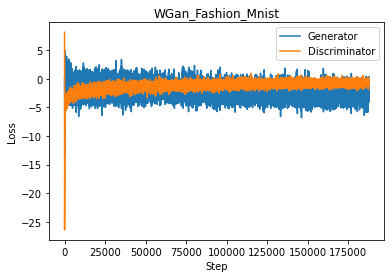

In [6]:
wgan_fashion_mnist_generator_losses: {} = wgan_fashion_mnist_results.generator_losses
wgan_fashion_mnist_discriminator_losses: {} = wgan_fashion_mnist_results.discriminator_losses

plot("WGan_Fashion_Mnist", "Step", "Loss", 
     "Generator", wgan_fashion_mnist_generator_losses, 
     "Discriminator", wgan_fashion_mnist_discriminator_losses)

In [7]:
wgan_fashion_mnist_last_generator: torch.nn.Module = wgan_fashion_mnist_results.last_generator
generate_images(wgan_fashion_mnist_last_generator, "wgan_fashion_mnist")

### WGan with Mnist

In [ ]:
wgan_mnist_results: Results = Results("wgan_mnist")

params: Params = build_params(args, ModelType.WGAN_GP, DataType.MNIST)
    
train: TrainWGan = TrainWGan(params, wgan_mnist_results.loss_updated_callback)
train.run()

[Epoch 1/200] [Batch 1/938] [Discriminator loss: 8.016483] [Generator loss: -0.043090]
[Epoch 1/200] [Batch 6/938] [Discriminator loss: 3.761108] [Generator loss: -0.052754]
[Epoch 1/200] [Batch 11/938] [Discriminator loss: -6.480455] [Generator loss: -0.101252]
[Epoch 1/200] [Batch 16/938] [Discriminator loss: -21.689680] [Generator loss: -0.254811]
[Epoch 1/200] [Batch 21/938] [Discriminator loss: -34.861126] [Generator loss: -0.593571]
[Epoch 1/200] [Batch 26/938] [Discriminator loss: -40.865993] [Generator loss: -0.935781]
[Epoch 1/200] [Batch 31/938] [Discriminator loss: -40.548801] [Generator loss: -1.262521]
[Epoch 1/200] [Batch 36/938] [Discriminator loss: -40.486519] [Generator loss: -1.600757]
[Epoch 1/200] [Batch 41/938] [Discriminator loss: -40.412205] [Generator loss: -1.960601]
[Epoch 1/200] [Batch 46/938] [Discriminator loss: -40.683823] [Generator loss: -2.310479]
[Epoch 1/200] [Batch 51/938] [Discriminator loss: -40.271633] [Generator loss: -2.721716]
[Epoch 1/200] [Ba

[Epoch 1/200] [Batch 456/938] [Discriminator loss: -1.887427] [Generator loss: -10.206987]
[Epoch 1/200] [Batch 461/938] [Discriminator loss: -1.753885] [Generator loss: -10.616351]
[Epoch 1/200] [Batch 466/938] [Discriminator loss: -1.512698] [Generator loss: -10.061753]
[Epoch 1/200] [Batch 471/938] [Discriminator loss: -1.552884] [Generator loss: -10.315260]
[Epoch 1/200] [Batch 476/938] [Discriminator loss: -1.635758] [Generator loss: -10.682743]
[Epoch 1/200] [Batch 481/938] [Discriminator loss: -1.780649] [Generator loss: -11.034480]
[Epoch 1/200] [Batch 486/938] [Discriminator loss: -1.767398] [Generator loss: -9.710132]
[Epoch 1/200] [Batch 491/938] [Discriminator loss: -1.955588] [Generator loss: -8.635735]
[Epoch 1/200] [Batch 496/938] [Discriminator loss: -1.978216] [Generator loss: -8.134871]
[Epoch 1/200] [Batch 501/938] [Discriminator loss: -2.446382] [Generator loss: -8.455680]
[Epoch 1/200] [Batch 506/938] [Discriminator loss: -2.215948] [Generator loss: -7.372169]
[Epo

[Epoch 1/200] [Batch 911/938] [Discriminator loss: -6.184824] [Generator loss: -3.075735]
[Epoch 1/200] [Batch 916/938] [Discriminator loss: -6.406202] [Generator loss: -1.843850]
[Epoch 1/200] [Batch 921/938] [Discriminator loss: -6.115673] [Generator loss: -2.369608]
[Epoch 1/200] [Batch 926/938] [Discriminator loss: -6.336567] [Generator loss: -3.025282]
[Epoch 1/200] [Batch 931/938] [Discriminator loss: -6.523026] [Generator loss: -2.727371]
[Epoch 1/200] [Batch 936/938] [Discriminator loss: -6.678711] [Generator loss: -2.688739]
[Epoch 2/200] [Batch 1/938] [Discriminator loss: -6.766385] [Generator loss: -2.577241]
[Epoch 2/200] [Batch 6/938] [Discriminator loss: -6.667485] [Generator loss: -1.245229]
[Epoch 2/200] [Batch 11/938] [Discriminator loss: -6.785728] [Generator loss: -0.506323]
[Epoch 2/200] [Batch 16/938] [Discriminator loss: -6.840445] [Generator loss: -1.719023]
[Epoch 2/200] [Batch 21/938] [Discriminator loss: -7.339357] [Generator loss: -1.727153]
[Epoch 2/200] [Ba

[Epoch 2/200] [Batch 431/938] [Discriminator loss: -5.404693] [Generator loss: -3.451873]
[Epoch 2/200] [Batch 436/938] [Discriminator loss: -5.371325] [Generator loss: -4.274428]
[Epoch 2/200] [Batch 441/938] [Discriminator loss: -5.557806] [Generator loss: -4.670794]
[Epoch 2/200] [Batch 446/938] [Discriminator loss: -4.558752] [Generator loss: -3.241865]
[Epoch 2/200] [Batch 451/938] [Discriminator loss: -5.583517] [Generator loss: -4.433427]
[Epoch 2/200] [Batch 456/938] [Discriminator loss: -4.670425] [Generator loss: -6.274292]
[Epoch 2/200] [Batch 461/938] [Discriminator loss: -5.408593] [Generator loss: -3.966671]
[Epoch 2/200] [Batch 466/938] [Discriminator loss: -5.440602] [Generator loss: -3.891945]
[Epoch 2/200] [Batch 471/938] [Discriminator loss: -5.242399] [Generator loss: -4.733353]
[Epoch 2/200] [Batch 476/938] [Discriminator loss: -5.112567] [Generator loss: -4.163854]
[Epoch 2/200] [Batch 481/938] [Discriminator loss: -5.166296] [Generator loss: -3.355314]
[Epoch 2/2

[Epoch 2/200] [Batch 891/938] [Discriminator loss: -5.050189] [Generator loss: -0.318071]
[Epoch 2/200] [Batch 896/938] [Discriminator loss: -5.064937] [Generator loss: 0.128262]
[Epoch 2/200] [Batch 901/938] [Discriminator loss: -5.053243] [Generator loss: 0.233465]
[Epoch 2/200] [Batch 906/938] [Discriminator loss: -5.971652] [Generator loss: 0.473604]
[Epoch 2/200] [Batch 911/938] [Discriminator loss: -4.845548] [Generator loss: 0.218428]
[Epoch 2/200] [Batch 916/938] [Discriminator loss: -5.092466] [Generator loss: 0.122222]
[Epoch 2/200] [Batch 921/938] [Discriminator loss: -5.254690] [Generator loss: 0.272643]
[Epoch 2/200] [Batch 926/938] [Discriminator loss: -5.440319] [Generator loss: -0.112722]
[Epoch 2/200] [Batch 931/938] [Discriminator loss: -4.488524] [Generator loss: -0.390073]
[Epoch 2/200] [Batch 936/938] [Discriminator loss: -5.053588] [Generator loss: 0.481071]
[Epoch 3/200] [Batch 1/938] [Discriminator loss: -5.451696] [Generator loss: 0.396122]
[Epoch 3/200] [Batch

[Epoch 3/200] [Batch 416/938] [Discriminator loss: -6.022642] [Generator loss: 1.297995]
[Epoch 3/200] [Batch 421/938] [Discriminator loss: -5.811465] [Generator loss: 2.543935]
[Epoch 3/200] [Batch 426/938] [Discriminator loss: -4.796061] [Generator loss: 2.466369]
[Epoch 3/200] [Batch 431/938] [Discriminator loss: -5.229383] [Generator loss: 2.276457]
[Epoch 3/200] [Batch 436/938] [Discriminator loss: -5.242618] [Generator loss: 2.145319]
[Epoch 3/200] [Batch 441/938] [Discriminator loss: -5.475199] [Generator loss: 2.084974]
[Epoch 3/200] [Batch 446/938] [Discriminator loss: -5.440897] [Generator loss: 2.323277]
[Epoch 3/200] [Batch 451/938] [Discriminator loss: -5.722191] [Generator loss: 1.875135]
[Epoch 3/200] [Batch 456/938] [Discriminator loss: -6.239339] [Generator loss: 0.935955]
[Epoch 3/200] [Batch 461/938] [Discriminator loss: -5.227868] [Generator loss: 2.661559]
[Epoch 3/200] [Batch 466/938] [Discriminator loss: -5.125268] [Generator loss: 2.526586]
[Epoch 3/200] [Batch 

[Epoch 3/200] [Batch 881/938] [Discriminator loss: -4.102931] [Generator loss: 1.249462]
[Epoch 3/200] [Batch 886/938] [Discriminator loss: -4.281593] [Generator loss: 1.421839]
[Epoch 3/200] [Batch 891/938] [Discriminator loss: -3.561561] [Generator loss: 2.079060]
[Epoch 3/200] [Batch 896/938] [Discriminator loss: -4.085810] [Generator loss: 1.211700]
[Epoch 3/200] [Batch 901/938] [Discriminator loss: -4.709013] [Generator loss: 2.194230]
[Epoch 3/200] [Batch 906/938] [Discriminator loss: -3.994062] [Generator loss: 3.226748]
[Epoch 3/200] [Batch 911/938] [Discriminator loss: -3.763667] [Generator loss: 2.247211]
[Epoch 3/200] [Batch 916/938] [Discriminator loss: -4.495828] [Generator loss: 3.336079]
[Epoch 3/200] [Batch 921/938] [Discriminator loss: -4.417040] [Generator loss: 2.989920]
[Epoch 3/200] [Batch 926/938] [Discriminator loss: -4.836704] [Generator loss: 3.475493]
[Epoch 3/200] [Batch 931/938] [Discriminator loss: -4.124871] [Generator loss: 2.944585]
[Epoch 3/200] [Batch 

[Epoch 4/200] [Batch 401/938] [Discriminator loss: -4.812592] [Generator loss: 0.107336]
[Epoch 4/200] [Batch 406/938] [Discriminator loss: -5.324484] [Generator loss: 0.579730]
[Epoch 4/200] [Batch 411/938] [Discriminator loss: -5.125263] [Generator loss: 0.056289]
[Epoch 4/200] [Batch 416/938] [Discriminator loss: -5.344776] [Generator loss: 0.845876]
[Epoch 4/200] [Batch 421/938] [Discriminator loss: -4.748720] [Generator loss: 1.091132]
[Epoch 4/200] [Batch 426/938] [Discriminator loss: -5.342040] [Generator loss: 0.896585]
[Epoch 4/200] [Batch 431/938] [Discriminator loss: -5.459799] [Generator loss: 1.570338]
[Epoch 4/200] [Batch 436/938] [Discriminator loss: -5.720494] [Generator loss: 1.961131]
[Epoch 4/200] [Batch 441/938] [Discriminator loss: -4.942870] [Generator loss: 1.928632]
[Epoch 4/200] [Batch 446/938] [Discriminator loss: -5.423234] [Generator loss: 1.947228]
[Epoch 4/200] [Batch 451/938] [Discriminator loss: -5.749557] [Generator loss: 1.935416]
[Epoch 4/200] [Batch 

[Epoch 4/200] [Batch 866/938] [Discriminator loss: -5.540976] [Generator loss: 0.650413]
[Epoch 4/200] [Batch 871/938] [Discriminator loss: -5.112751] [Generator loss: 0.508483]
[Epoch 4/200] [Batch 876/938] [Discriminator loss: -4.664150] [Generator loss: 0.743202]
[Epoch 4/200] [Batch 881/938] [Discriminator loss: -5.111512] [Generator loss: 0.280881]
[Epoch 4/200] [Batch 886/938] [Discriminator loss: -4.615646] [Generator loss: -0.087160]
[Epoch 4/200] [Batch 891/938] [Discriminator loss: -4.364277] [Generator loss: 0.120326]
[Epoch 4/200] [Batch 896/938] [Discriminator loss: -4.633607] [Generator loss: -0.605434]
[Epoch 4/200] [Batch 901/938] [Discriminator loss: -4.472311] [Generator loss: 0.766943]
[Epoch 4/200] [Batch 906/938] [Discriminator loss: -4.496179] [Generator loss: 0.535205]
[Epoch 4/200] [Batch 911/938] [Discriminator loss: -4.468948] [Generator loss: 0.577804]
[Epoch 4/200] [Batch 916/938] [Discriminator loss: -5.334815] [Generator loss: 1.033001]
[Epoch 4/200] [Batc

[Epoch 5/200] [Batch 386/938] [Discriminator loss: -5.318836] [Generator loss: -0.864955]
[Epoch 5/200] [Batch 391/938] [Discriminator loss: -4.935349] [Generator loss: -0.610539]
[Epoch 5/200] [Batch 396/938] [Discriminator loss: -4.807860] [Generator loss: -0.211794]
[Epoch 5/200] [Batch 401/938] [Discriminator loss: -4.554951] [Generator loss: -1.873327]
[Epoch 5/200] [Batch 406/938] [Discriminator loss: -5.361320] [Generator loss: -0.526914]
[Epoch 5/200] [Batch 411/938] [Discriminator loss: -5.076368] [Generator loss: 0.684852]
[Epoch 5/200] [Batch 416/938] [Discriminator loss: -4.762103] [Generator loss: -0.819179]
[Epoch 5/200] [Batch 421/938] [Discriminator loss: -5.503567] [Generator loss: 0.300961]
[Epoch 5/200] [Batch 426/938] [Discriminator loss: -5.482259] [Generator loss: -0.331587]
[Epoch 5/200] [Batch 431/938] [Discriminator loss: -5.009574] [Generator loss: -0.598116]
[Epoch 5/200] [Batch 436/938] [Discriminator loss: -4.683407] [Generator loss: 0.840451]
[Epoch 5/200]

[Epoch 5/200] [Batch 846/938] [Discriminator loss: -5.150988] [Generator loss: -0.515340]
[Epoch 5/200] [Batch 851/938] [Discriminator loss: -4.692143] [Generator loss: -0.178266]
[Epoch 5/200] [Batch 856/938] [Discriminator loss: -4.638564] [Generator loss: -0.153353]
[Epoch 5/200] [Batch 861/938] [Discriminator loss: -4.883480] [Generator loss: 0.805773]
[Epoch 5/200] [Batch 866/938] [Discriminator loss: -4.892878] [Generator loss: -0.897585]
[Epoch 5/200] [Batch 871/938] [Discriminator loss: -5.254476] [Generator loss: -0.799199]
[Epoch 5/200] [Batch 876/938] [Discriminator loss: -4.981899] [Generator loss: -0.642337]
[Epoch 5/200] [Batch 881/938] [Discriminator loss: -5.114151] [Generator loss: -0.786824]
[Epoch 5/200] [Batch 886/938] [Discriminator loss: -4.761762] [Generator loss: -1.607272]
[Epoch 5/200] [Batch 891/938] [Discriminator loss: -4.729363] [Generator loss: -0.663754]
[Epoch 5/200] [Batch 896/938] [Discriminator loss: -4.740457] [Generator loss: 0.346322]
[Epoch 5/200

[Epoch 6/200] [Batch 366/938] [Discriminator loss: -4.212255] [Generator loss: 2.006298]
[Epoch 6/200] [Batch 371/938] [Discriminator loss: -4.123430] [Generator loss: 1.188334]
[Epoch 6/200] [Batch 376/938] [Discriminator loss: -3.946358] [Generator loss: 0.470757]
[Epoch 6/200] [Batch 381/938] [Discriminator loss: -4.392457] [Generator loss: 0.764845]
[Epoch 6/200] [Batch 386/938] [Discriminator loss: -4.398214] [Generator loss: 0.470824]
[Epoch 6/200] [Batch 391/938] [Discriminator loss: -3.778133] [Generator loss: 0.615170]
[Epoch 6/200] [Batch 396/938] [Discriminator loss: -4.478174] [Generator loss: 0.981314]
[Epoch 6/200] [Batch 401/938] [Discriminator loss: -4.340739] [Generator loss: -0.935436]
[Epoch 6/200] [Batch 406/938] [Discriminator loss: -3.652506] [Generator loss: -0.201662]
[Epoch 6/200] [Batch 411/938] [Discriminator loss: -4.852593] [Generator loss: 0.362185]
[Epoch 6/200] [Batch 416/938] [Discriminator loss: -4.024121] [Generator loss: 0.932593]
[Epoch 6/200] [Batc

[Epoch 6/200] [Batch 826/938] [Discriminator loss: -4.340896] [Generator loss: 0.828857]
[Epoch 6/200] [Batch 831/938] [Discriminator loss: -4.193696] [Generator loss: -0.179113]
[Epoch 6/200] [Batch 836/938] [Discriminator loss: -4.404985] [Generator loss: 1.607667]
[Epoch 6/200] [Batch 841/938] [Discriminator loss: -4.398826] [Generator loss: 0.866608]
[Epoch 6/200] [Batch 846/938] [Discriminator loss: -4.087894] [Generator loss: -0.084249]
[Epoch 6/200] [Batch 851/938] [Discriminator loss: -4.088146] [Generator loss: -1.265692]
[Epoch 6/200] [Batch 856/938] [Discriminator loss: -4.173024] [Generator loss: -1.397023]
[Epoch 6/200] [Batch 861/938] [Discriminator loss: -4.051834] [Generator loss: -0.249959]
[Epoch 6/200] [Batch 866/938] [Discriminator loss: -4.250330] [Generator loss: 0.374225]
[Epoch 6/200] [Batch 871/938] [Discriminator loss: -4.030943] [Generator loss: 0.461650]
[Epoch 6/200] [Batch 876/938] [Discriminator loss: -4.319003] [Generator loss: -1.232323]
[Epoch 6/200] [

[Epoch 7/200] [Batch 346/938] [Discriminator loss: -4.410858] [Generator loss: 0.986336]
[Epoch 7/200] [Batch 351/938] [Discriminator loss: -4.710749] [Generator loss: 0.899463]
[Epoch 7/200] [Batch 356/938] [Discriminator loss: -4.743254] [Generator loss: -0.212378]
[Epoch 7/200] [Batch 361/938] [Discriminator loss: -4.477027] [Generator loss: -0.783767]
[Epoch 7/200] [Batch 366/938] [Discriminator loss: -4.398292] [Generator loss: 0.357619]
[Epoch 7/200] [Batch 371/938] [Discriminator loss: -4.106262] [Generator loss: -1.296252]
[Epoch 7/200] [Batch 376/938] [Discriminator loss: -4.386169] [Generator loss: -0.048850]
[Epoch 7/200] [Batch 381/938] [Discriminator loss: -4.427669] [Generator loss: 1.018393]
[Epoch 7/200] [Batch 386/938] [Discriminator loss: -4.536635] [Generator loss: 0.910019]
[Epoch 7/200] [Batch 391/938] [Discriminator loss: -4.354873] [Generator loss: -0.587505]
[Epoch 7/200] [Batch 396/938] [Discriminator loss: -4.643881] [Generator loss: 0.412655]
[Epoch 7/200] [B

[Epoch 7/200] [Batch 806/938] [Discriminator loss: -3.917177] [Generator loss: 0.339833]
[Epoch 7/200] [Batch 811/938] [Discriminator loss: -4.483321] [Generator loss: 0.936670]
[Epoch 7/200] [Batch 816/938] [Discriminator loss: -4.753459] [Generator loss: 0.477258]
[Epoch 7/200] [Batch 821/938] [Discriminator loss: -4.312570] [Generator loss: -0.886099]
[Epoch 7/200] [Batch 826/938] [Discriminator loss: -3.807618] [Generator loss: -0.753665]
[Epoch 7/200] [Batch 831/938] [Discriminator loss: -4.649003] [Generator loss: 0.597141]
[Epoch 7/200] [Batch 836/938] [Discriminator loss: -3.580621] [Generator loss: 1.189200]
[Epoch 7/200] [Batch 841/938] [Discriminator loss: -4.380888] [Generator loss: 0.351419]
[Epoch 7/200] [Batch 846/938] [Discriminator loss: -4.376153] [Generator loss: 1.192934]
[Epoch 7/200] [Batch 851/938] [Discriminator loss: -4.425057] [Generator loss: 0.103317]
[Epoch 7/200] [Batch 856/938] [Discriminator loss: -4.447815] [Generator loss: 1.864824]
[Epoch 7/200] [Batc

[Epoch 8/200] [Batch 326/938] [Discriminator loss: -3.935715] [Generator loss: -1.436681]
[Epoch 8/200] [Batch 331/938] [Discriminator loss: -3.835786] [Generator loss: -0.626240]
[Epoch 8/200] [Batch 336/938] [Discriminator loss: -4.336388] [Generator loss: 1.126926]
[Epoch 8/200] [Batch 341/938] [Discriminator loss: -4.055087] [Generator loss: -0.059139]
[Epoch 8/200] [Batch 346/938] [Discriminator loss: -3.723356] [Generator loss: -0.031346]
[Epoch 8/200] [Batch 351/938] [Discriminator loss: -4.082438] [Generator loss: -1.241990]
[Epoch 8/200] [Batch 356/938] [Discriminator loss: -4.333343] [Generator loss: -0.392794]
[Epoch 8/200] [Batch 361/938] [Discriminator loss: -4.328930] [Generator loss: -0.804064]
[Epoch 8/200] [Batch 366/938] [Discriminator loss: -3.911415] [Generator loss: -0.581637]
[Epoch 8/200] [Batch 371/938] [Discriminator loss: -3.799397] [Generator loss: -0.729438]
[Epoch 8/200] [Batch 376/938] [Discriminator loss: -4.285753] [Generator loss: 0.972790]
[Epoch 8/200

[Epoch 8/200] [Batch 786/938] [Discriminator loss: -4.464592] [Generator loss: 0.664744]
[Epoch 8/200] [Batch 791/938] [Discriminator loss: -4.057371] [Generator loss: -1.840140]
[Epoch 8/200] [Batch 796/938] [Discriminator loss: -4.020776] [Generator loss: -1.528604]
[Epoch 8/200] [Batch 801/938] [Discriminator loss: -4.401979] [Generator loss: -1.208685]
[Epoch 8/200] [Batch 806/938] [Discriminator loss: -3.821781] [Generator loss: 0.422930]
[Epoch 8/200] [Batch 811/938] [Discriminator loss: -3.763117] [Generator loss: 0.612583]
[Epoch 8/200] [Batch 816/938] [Discriminator loss: -4.158346] [Generator loss: 0.180536]
[Epoch 8/200] [Batch 821/938] [Discriminator loss: -4.094047] [Generator loss: -0.567039]
[Epoch 8/200] [Batch 826/938] [Discriminator loss: -4.024539] [Generator loss: -0.322859]
[Epoch 8/200] [Batch 831/938] [Discriminator loss: -4.130188] [Generator loss: -0.119803]
[Epoch 8/200] [Batch 836/938] [Discriminator loss: -4.146213] [Generator loss: 0.196440]
[Epoch 8/200] [

[Epoch 9/200] [Batch 306/938] [Discriminator loss: -4.094478] [Generator loss: 0.580025]
[Epoch 9/200] [Batch 311/938] [Discriminator loss: -4.154808] [Generator loss: 1.044071]
[Epoch 9/200] [Batch 316/938] [Discriminator loss: -4.307050] [Generator loss: 0.846099]
[Epoch 9/200] [Batch 321/938] [Discriminator loss: -3.567741] [Generator loss: 1.131651]
[Epoch 9/200] [Batch 326/938] [Discriminator loss: -4.061861] [Generator loss: 0.848396]
[Epoch 9/200] [Batch 331/938] [Discriminator loss: -3.694524] [Generator loss: -0.278735]
[Epoch 9/200] [Batch 336/938] [Discriminator loss: -3.754362] [Generator loss: 1.379953]
[Epoch 9/200] [Batch 341/938] [Discriminator loss: -3.780505] [Generator loss: 0.756858]
[Epoch 9/200] [Batch 346/938] [Discriminator loss: -4.229247] [Generator loss: 1.284296]
[Epoch 9/200] [Batch 351/938] [Discriminator loss: -3.798554] [Generator loss: 0.057181]
[Epoch 9/200] [Batch 356/938] [Discriminator loss: -3.895375] [Generator loss: 0.029585]
[Epoch 9/200] [Batch

[Epoch 9/200] [Batch 766/938] [Discriminator loss: -4.243903] [Generator loss: 0.506642]
[Epoch 9/200] [Batch 771/938] [Discriminator loss: -3.759555] [Generator loss: 0.469422]
[Epoch 9/200] [Batch 776/938] [Discriminator loss: -3.877970] [Generator loss: -1.136476]
[Epoch 9/200] [Batch 781/938] [Discriminator loss: -4.059956] [Generator loss: 0.977886]
[Epoch 9/200] [Batch 786/938] [Discriminator loss: -3.555727] [Generator loss: 1.286400]
[Epoch 9/200] [Batch 791/938] [Discriminator loss: -3.356859] [Generator loss: 1.471784]
[Epoch 9/200] [Batch 796/938] [Discriminator loss: -3.389777] [Generator loss: 0.020590]
[Epoch 9/200] [Batch 801/938] [Discriminator loss: -3.340157] [Generator loss: -0.032593]
[Epoch 9/200] [Batch 806/938] [Discriminator loss: -4.024125] [Generator loss: 1.168148]
[Epoch 9/200] [Batch 811/938] [Discriminator loss: -3.837103] [Generator loss: 1.981555]
[Epoch 9/200] [Batch 816/938] [Discriminator loss: -3.083055] [Generator loss: 1.722724]
[Epoch 9/200] [Batc

[Epoch 10/200] [Batch 286/938] [Discriminator loss: -3.291511] [Generator loss: -0.432871]
[Epoch 10/200] [Batch 291/938] [Discriminator loss: -3.488997] [Generator loss: 0.167835]
[Epoch 10/200] [Batch 296/938] [Discriminator loss: -4.004797] [Generator loss: -1.072753]
[Epoch 10/200] [Batch 301/938] [Discriminator loss: -3.883499] [Generator loss: -0.722512]
[Epoch 10/200] [Batch 306/938] [Discriminator loss: -3.711757] [Generator loss: -0.502358]
[Epoch 10/200] [Batch 311/938] [Discriminator loss: -2.707651] [Generator loss: -1.093081]
[Epoch 10/200] [Batch 316/938] [Discriminator loss: -3.654870] [Generator loss: -0.456150]
[Epoch 10/200] [Batch 321/938] [Discriminator loss: -3.392504] [Generator loss: -2.026163]
[Epoch 10/200] [Batch 326/938] [Discriminator loss: -3.652043] [Generator loss: -1.437195]
[Epoch 10/200] [Batch 331/938] [Discriminator loss: -3.625776] [Generator loss: -1.137977]
[Epoch 10/200] [Batch 336/938] [Discriminator loss: -3.636494] [Generator loss: -0.832327]


[Epoch 10/200] [Batch 741/938] [Discriminator loss: -2.779885] [Generator loss: -0.938598]
[Epoch 10/200] [Batch 746/938] [Discriminator loss: -3.758271] [Generator loss: 0.057275]
[Epoch 10/200] [Batch 751/938] [Discriminator loss: -3.113157] [Generator loss: -0.667759]
[Epoch 10/200] [Batch 756/938] [Discriminator loss: -3.762965] [Generator loss: -2.188987]
[Epoch 10/200] [Batch 761/938] [Discriminator loss: -3.476935] [Generator loss: -1.664812]
[Epoch 10/200] [Batch 766/938] [Discriminator loss: -3.176663] [Generator loss: -1.238213]
[Epoch 10/200] [Batch 771/938] [Discriminator loss: -3.823674] [Generator loss: 0.140396]
[Epoch 10/200] [Batch 776/938] [Discriminator loss: -3.786112] [Generator loss: 0.561097]
[Epoch 10/200] [Batch 781/938] [Discriminator loss: -3.443944] [Generator loss: 1.658126]
[Epoch 10/200] [Batch 786/938] [Discriminator loss: -3.276859] [Generator loss: -0.516847]
[Epoch 10/200] [Batch 791/938] [Discriminator loss: -3.344779] [Generator loss: 0.548916]
[Epo

[Epoch 11/200] [Batch 256/938] [Discriminator loss: -3.443017] [Generator loss: 0.755938]
[Epoch 11/200] [Batch 261/938] [Discriminator loss: -3.300678] [Generator loss: -1.112762]
[Epoch 11/200] [Batch 266/938] [Discriminator loss: -3.769585] [Generator loss: 0.524797]
[Epoch 11/200] [Batch 271/938] [Discriminator loss: -3.537024] [Generator loss: -1.262254]
[Epoch 11/200] [Batch 276/938] [Discriminator loss: -3.719995] [Generator loss: -1.998623]
[Epoch 11/200] [Batch 281/938] [Discriminator loss: -3.606465] [Generator loss: -1.428783]
[Epoch 11/200] [Batch 286/938] [Discriminator loss: -3.529624] [Generator loss: -1.759678]
[Epoch 11/200] [Batch 291/938] [Discriminator loss: -3.194487] [Generator loss: -1.068352]
[Epoch 11/200] [Batch 296/938] [Discriminator loss: -3.497526] [Generator loss: -0.182254]
[Epoch 11/200] [Batch 301/938] [Discriminator loss: -3.387173] [Generator loss: 0.785451]
[Epoch 11/200] [Batch 306/938] [Discriminator loss: -3.629534] [Generator loss: 1.038194]
[Ep

[Epoch 11/200] [Batch 711/938] [Discriminator loss: -3.680200] [Generator loss: -1.049221]
[Epoch 11/200] [Batch 716/938] [Discriminator loss: -3.324299] [Generator loss: -0.913813]
[Epoch 11/200] [Batch 721/938] [Discriminator loss: -3.240679] [Generator loss: -1.245443]
[Epoch 11/200] [Batch 726/938] [Discriminator loss: -3.320891] [Generator loss: -0.432663]
[Epoch 11/200] [Batch 731/938] [Discriminator loss: -3.880022] [Generator loss: 0.158181]
[Epoch 11/200] [Batch 736/938] [Discriminator loss: -3.272873] [Generator loss: 0.336250]
[Epoch 11/200] [Batch 741/938] [Discriminator loss: -3.613953] [Generator loss: -0.511318]
[Epoch 11/200] [Batch 746/938] [Discriminator loss: -3.392306] [Generator loss: -1.326323]
[Epoch 11/200] [Batch 751/938] [Discriminator loss: -3.197495] [Generator loss: -1.196756]
[Epoch 11/200] [Batch 756/938] [Discriminator loss: -3.656139] [Generator loss: -0.875614]
[Epoch 11/200] [Batch 761/938] [Discriminator loss: -3.008391] [Generator loss: -1.866093]
[

[Epoch 12/200] [Batch 226/938] [Discriminator loss: -2.996273] [Generator loss: -0.737537]
[Epoch 12/200] [Batch 231/938] [Discriminator loss: -2.761128] [Generator loss: -0.366441]
[Epoch 12/200] [Batch 236/938] [Discriminator loss: -3.603601] [Generator loss: -0.282167]
[Epoch 12/200] [Batch 241/938] [Discriminator loss: -3.374543] [Generator loss: -0.431505]
[Epoch 12/200] [Batch 246/938] [Discriminator loss: -3.399951] [Generator loss: -0.465825]
[Epoch 12/200] [Batch 251/938] [Discriminator loss: -3.268023] [Generator loss: -0.014872]
[Epoch 12/200] [Batch 256/938] [Discriminator loss: -3.645020] [Generator loss: -0.186056]
[Epoch 12/200] [Batch 261/938] [Discriminator loss: -2.739216] [Generator loss: -1.559942]
[Epoch 12/200] [Batch 266/938] [Discriminator loss: -3.069677] [Generator loss: 1.045461]
[Epoch 12/200] [Batch 271/938] [Discriminator loss: -3.034564] [Generator loss: -0.621799]
[Epoch 12/200] [Batch 276/938] [Discriminator loss: -3.301088] [Generator loss: -1.930944]


[Epoch 12/200] [Batch 681/938] [Discriminator loss: -3.124915] [Generator loss: -1.651505]
[Epoch 12/200] [Batch 686/938] [Discriminator loss: -3.788987] [Generator loss: -0.986259]
[Epoch 12/200] [Batch 691/938] [Discriminator loss: -3.244830] [Generator loss: -0.328326]
[Epoch 12/200] [Batch 696/938] [Discriminator loss: -3.430330] [Generator loss: 0.545391]
[Epoch 12/200] [Batch 701/938] [Discriminator loss: -3.239788] [Generator loss: 0.496154]
[Epoch 12/200] [Batch 706/938] [Discriminator loss: -3.202716] [Generator loss: 1.500222]
[Epoch 12/200] [Batch 711/938] [Discriminator loss: -3.252944] [Generator loss: -0.058105]
[Epoch 12/200] [Batch 716/938] [Discriminator loss: -3.247016] [Generator loss: 0.474128]
[Epoch 12/200] [Batch 721/938] [Discriminator loss: -2.847380] [Generator loss: 0.280054]
[Epoch 12/200] [Batch 726/938] [Discriminator loss: -2.862826] [Generator loss: -0.954448]
[Epoch 12/200] [Batch 731/938] [Discriminator loss: -3.215745] [Generator loss: -1.154017]
[Epo

[Epoch 13/200] [Batch 196/938] [Discriminator loss: -3.055552] [Generator loss: -0.163203]
[Epoch 13/200] [Batch 201/938] [Discriminator loss: -3.255770] [Generator loss: -1.336429]
[Epoch 13/200] [Batch 206/938] [Discriminator loss: -3.481187] [Generator loss: -1.403593]
[Epoch 13/200] [Batch 211/938] [Discriminator loss: -3.142319] [Generator loss: -1.521026]
[Epoch 13/200] [Batch 216/938] [Discriminator loss: -3.452856] [Generator loss: -1.173372]
[Epoch 13/200] [Batch 221/938] [Discriminator loss: -3.343196] [Generator loss: -1.247858]
[Epoch 13/200] [Batch 226/938] [Discriminator loss: -2.947096] [Generator loss: -0.658577]
[Epoch 13/200] [Batch 231/938] [Discriminator loss: -3.009400] [Generator loss: -1.047547]
[Epoch 13/200] [Batch 236/938] [Discriminator loss: -2.943015] [Generator loss: -2.331705]
[Epoch 13/200] [Batch 241/938] [Discriminator loss: -3.437981] [Generator loss: -0.699361]
[Epoch 13/200] [Batch 246/938] [Discriminator loss: -3.357132] [Generator loss: -0.992141]

[Epoch 13/200] [Batch 651/938] [Discriminator loss: -2.896569] [Generator loss: -0.450494]
[Epoch 13/200] [Batch 656/938] [Discriminator loss: -3.319590] [Generator loss: -0.619440]
[Epoch 13/200] [Batch 661/938] [Discriminator loss: -2.648208] [Generator loss: 0.658112]
[Epoch 13/200] [Batch 666/938] [Discriminator loss: -3.470942] [Generator loss: -0.833889]
[Epoch 13/200] [Batch 671/938] [Discriminator loss: -2.636682] [Generator loss: -1.617915]
[Epoch 13/200] [Batch 676/938] [Discriminator loss: -3.443752] [Generator loss: -1.535078]
[Epoch 13/200] [Batch 681/938] [Discriminator loss: -3.000587] [Generator loss: -0.799827]
[Epoch 13/200] [Batch 686/938] [Discriminator loss: -3.147514] [Generator loss: -0.151570]
[Epoch 13/200] [Batch 691/938] [Discriminator loss: -3.036259] [Generator loss: -1.550810]
[Epoch 13/200] [Batch 696/938] [Discriminator loss: -3.170700] [Generator loss: -1.915368]
[Epoch 13/200] [Batch 701/938] [Discriminator loss: -3.294847] [Generator loss: -1.118177]


[Epoch 14/200] [Batch 166/938] [Discriminator loss: -3.406129] [Generator loss: 0.077385]
[Epoch 14/200] [Batch 171/938] [Discriminator loss: -3.119719] [Generator loss: -1.310253]
[Epoch 14/200] [Batch 176/938] [Discriminator loss: -2.847325] [Generator loss: -1.279390]
[Epoch 14/200] [Batch 181/938] [Discriminator loss: -3.095128] [Generator loss: -1.301994]
[Epoch 14/200] [Batch 186/938] [Discriminator loss: -3.641890] [Generator loss: -0.083072]
[Epoch 14/200] [Batch 191/938] [Discriminator loss: -3.320765] [Generator loss: -0.149915]
[Epoch 14/200] [Batch 196/938] [Discriminator loss: -3.322784] [Generator loss: -0.957858]
[Epoch 14/200] [Batch 201/938] [Discriminator loss: -2.880089] [Generator loss: -0.255218]
[Epoch 14/200] [Batch 206/938] [Discriminator loss: -3.036771] [Generator loss: 0.306145]
[Epoch 14/200] [Batch 211/938] [Discriminator loss: -2.926537] [Generator loss: 0.162823]
[Epoch 14/200] [Batch 216/938] [Discriminator loss: -2.660873] [Generator loss: -1.580520]
[E

[Epoch 14/200] [Batch 621/938] [Discriminator loss: -3.238064] [Generator loss: 0.170648]
[Epoch 14/200] [Batch 626/938] [Discriminator loss: -3.236814] [Generator loss: -0.397655]
[Epoch 14/200] [Batch 631/938] [Discriminator loss: -3.424930] [Generator loss: 1.073671]
[Epoch 14/200] [Batch 636/938] [Discriminator loss: -3.976544] [Generator loss: 0.162487]
[Epoch 14/200] [Batch 641/938] [Discriminator loss: -2.840046] [Generator loss: -0.075112]
[Epoch 14/200] [Batch 646/938] [Discriminator loss: -3.011956] [Generator loss: 0.066524]
[Epoch 14/200] [Batch 651/938] [Discriminator loss: -3.352148] [Generator loss: -2.288146]
[Epoch 14/200] [Batch 656/938] [Discriminator loss: -3.339858] [Generator loss: -0.704163]
[Epoch 14/200] [Batch 661/938] [Discriminator loss: -3.347402] [Generator loss: -0.489039]
[Epoch 14/200] [Batch 666/938] [Discriminator loss: -3.134992] [Generator loss: -2.008432]
[Epoch 14/200] [Batch 671/938] [Discriminator loss: -2.906698] [Generator loss: -0.910198]
[Ep

[Epoch 15/200] [Batch 136/938] [Discriminator loss: -3.093544] [Generator loss: 0.731642]
[Epoch 15/200] [Batch 141/938] [Discriminator loss: -2.909450] [Generator loss: -1.656113]
[Epoch 15/200] [Batch 146/938] [Discriminator loss: -3.056862] [Generator loss: -1.337158]
[Epoch 15/200] [Batch 151/938] [Discriminator loss: -3.078189] [Generator loss: -1.141156]
[Epoch 15/200] [Batch 156/938] [Discriminator loss: -2.756780] [Generator loss: -0.695632]
[Epoch 15/200] [Batch 161/938] [Discriminator loss: -2.918385] [Generator loss: -1.381679]
[Epoch 15/200] [Batch 166/938] [Discriminator loss: -3.258337] [Generator loss: 0.149729]
[Epoch 15/200] [Batch 171/938] [Discriminator loss: -2.900855] [Generator loss: -0.772611]
[Epoch 15/200] [Batch 176/938] [Discriminator loss: -3.104647] [Generator loss: -1.232834]
[Epoch 15/200] [Batch 181/938] [Discriminator loss: -3.190816] [Generator loss: -0.479484]
[Epoch 15/200] [Batch 186/938] [Discriminator loss: -3.219552] [Generator loss: -0.868543]
[

[Epoch 15/200] [Batch 591/938] [Discriminator loss: -3.088362] [Generator loss: -1.067958]
[Epoch 15/200] [Batch 596/938] [Discriminator loss: -3.540528] [Generator loss: -1.959764]
[Epoch 15/200] [Batch 601/938] [Discriminator loss: -3.147436] [Generator loss: -1.829023]
[Epoch 15/200] [Batch 606/938] [Discriminator loss: -2.718136] [Generator loss: -0.713355]
[Epoch 15/200] [Batch 611/938] [Discriminator loss: -3.038478] [Generator loss: -0.315634]
[Epoch 15/200] [Batch 616/938] [Discriminator loss: -2.435041] [Generator loss: -1.392105]
[Epoch 15/200] [Batch 621/938] [Discriminator loss: -2.617757] [Generator loss: -1.045046]
[Epoch 15/200] [Batch 626/938] [Discriminator loss: -3.201343] [Generator loss: -2.630011]
[Epoch 15/200] [Batch 631/938] [Discriminator loss: -2.513256] [Generator loss: -1.394463]
[Epoch 15/200] [Batch 636/938] [Discriminator loss: -3.093907] [Generator loss: -1.578568]
[Epoch 15/200] [Batch 641/938] [Discriminator loss: -3.423902] [Generator loss: -0.998792]

[Epoch 16/200] [Batch 106/938] [Discriminator loss: -2.640513] [Generator loss: -1.995822]
[Epoch 16/200] [Batch 111/938] [Discriminator loss: -3.127613] [Generator loss: -1.682440]
[Epoch 16/200] [Batch 116/938] [Discriminator loss: -3.034428] [Generator loss: -0.810708]
[Epoch 16/200] [Batch 121/938] [Discriminator loss: -2.765805] [Generator loss: -1.672544]
[Epoch 16/200] [Batch 126/938] [Discriminator loss: -2.792205] [Generator loss: -0.487742]
[Epoch 16/200] [Batch 131/938] [Discriminator loss: -3.236802] [Generator loss: -1.207754]
[Epoch 16/200] [Batch 136/938] [Discriminator loss: -2.865546] [Generator loss: -0.811016]
[Epoch 16/200] [Batch 141/938] [Discriminator loss: -3.438750] [Generator loss: -1.495045]
[Epoch 16/200] [Batch 146/938] [Discriminator loss: -3.375912] [Generator loss: -1.255652]
[Epoch 16/200] [Batch 151/938] [Discriminator loss: -3.245123] [Generator loss: -2.507893]
[Epoch 16/200] [Batch 156/938] [Discriminator loss: -3.102503] [Generator loss: -1.242700]

[Epoch 16/200] [Batch 561/938] [Discriminator loss: -2.544095] [Generator loss: -1.620698]
[Epoch 16/200] [Batch 566/938] [Discriminator loss: -3.168243] [Generator loss: -1.725868]
[Epoch 16/200] [Batch 571/938] [Discriminator loss: -3.046206] [Generator loss: -1.335392]
[Epoch 16/200] [Batch 576/938] [Discriminator loss: -3.124800] [Generator loss: -1.115682]
[Epoch 16/200] [Batch 581/938] [Discriminator loss: -2.800630] [Generator loss: -1.143501]
[Epoch 16/200] [Batch 586/938] [Discriminator loss: -2.560095] [Generator loss: -0.797414]
[Epoch 16/200] [Batch 591/938] [Discriminator loss: -3.010897] [Generator loss: -0.373752]
[Epoch 16/200] [Batch 596/938] [Discriminator loss: -2.892827] [Generator loss: -0.941776]
[Epoch 16/200] [Batch 601/938] [Discriminator loss: -2.682083] [Generator loss: -2.349837]
[Epoch 16/200] [Batch 606/938] [Discriminator loss: -2.764004] [Generator loss: -3.236226]
[Epoch 16/200] [Batch 611/938] [Discriminator loss: -3.184845] [Generator loss: -1.442635]

[Epoch 17/200] [Batch 76/938] [Discriminator loss: -2.653085] [Generator loss: -0.216748]
[Epoch 17/200] [Batch 81/938] [Discriminator loss: -2.543200] [Generator loss: -1.710307]
[Epoch 17/200] [Batch 86/938] [Discriminator loss: -2.914319] [Generator loss: -0.947937]
[Epoch 17/200] [Batch 91/938] [Discriminator loss: -3.213848] [Generator loss: -0.654938]
[Epoch 17/200] [Batch 96/938] [Discriminator loss: -3.151245] [Generator loss: -1.337957]
[Epoch 17/200] [Batch 101/938] [Discriminator loss: -2.512759] [Generator loss: -1.248763]
[Epoch 17/200] [Batch 106/938] [Discriminator loss: -2.630101] [Generator loss: -1.521686]
[Epoch 17/200] [Batch 111/938] [Discriminator loss: -2.335916] [Generator loss: -0.729075]
[Epoch 17/200] [Batch 116/938] [Discriminator loss: -2.690390] [Generator loss: -1.549410]
[Epoch 17/200] [Batch 121/938] [Discriminator loss: -3.164989] [Generator loss: -0.361794]
[Epoch 17/200] [Batch 126/938] [Discriminator loss: -2.732180] [Generator loss: -0.254974]
[Epo

[Epoch 17/200] [Batch 531/938] [Discriminator loss: -3.194193] [Generator loss: -1.912047]
[Epoch 17/200] [Batch 536/938] [Discriminator loss: -2.434599] [Generator loss: -2.079005]
[Epoch 17/200] [Batch 541/938] [Discriminator loss: -2.662424] [Generator loss: -3.176276]
[Epoch 17/200] [Batch 546/938] [Discriminator loss: -2.718746] [Generator loss: -1.233201]
[Epoch 17/200] [Batch 551/938] [Discriminator loss: -3.195696] [Generator loss: 1.247870]
[Epoch 17/200] [Batch 556/938] [Discriminator loss: -2.548996] [Generator loss: 0.011005]
[Epoch 17/200] [Batch 561/938] [Discriminator loss: -3.225990] [Generator loss: -0.362027]
[Epoch 17/200] [Batch 566/938] [Discriminator loss: -2.616479] [Generator loss: -1.908697]
[Epoch 17/200] [Batch 571/938] [Discriminator loss: -2.840641] [Generator loss: -0.524605]
[Epoch 17/200] [Batch 576/938] [Discriminator loss: -2.385055] [Generator loss: -0.629387]
[Epoch 17/200] [Batch 581/938] [Discriminator loss: -2.884543] [Generator loss: -2.362722]
[

[Epoch 18/200] [Batch 46/938] [Discriminator loss: -3.075800] [Generator loss: -0.513254]
[Epoch 18/200] [Batch 51/938] [Discriminator loss: -2.554605] [Generator loss: -0.758518]
[Epoch 18/200] [Batch 56/938] [Discriminator loss: -2.571879] [Generator loss: -1.809623]
[Epoch 18/200] [Batch 61/938] [Discriminator loss: -2.900691] [Generator loss: -1.249527]
[Epoch 18/200] [Batch 66/938] [Discriminator loss: -2.464277] [Generator loss: -2.030246]
[Epoch 18/200] [Batch 71/938] [Discriminator loss: -2.902804] [Generator loss: -0.337574]
[Epoch 18/200] [Batch 76/938] [Discriminator loss: -2.520739] [Generator loss: -0.740722]
[Epoch 18/200] [Batch 81/938] [Discriminator loss: -3.038927] [Generator loss: -0.409367]
[Epoch 18/200] [Batch 86/938] [Discriminator loss: -2.956137] [Generator loss: -0.022955]
[Epoch 18/200] [Batch 91/938] [Discriminator loss: -2.780354] [Generator loss: 0.626529]
[Epoch 18/200] [Batch 96/938] [Discriminator loss: -2.872173] [Generator loss: -0.159864]
[Epoch 18/2

[Epoch 18/200] [Batch 501/938] [Discriminator loss: -2.585822] [Generator loss: -1.598916]
[Epoch 18/200] [Batch 506/938] [Discriminator loss: -2.808143] [Generator loss: -1.912546]
[Epoch 18/200] [Batch 511/938] [Discriminator loss: -2.695922] [Generator loss: -1.696904]
[Epoch 18/200] [Batch 516/938] [Discriminator loss: -2.633118] [Generator loss: -1.010369]
[Epoch 18/200] [Batch 521/938] [Discriminator loss: -2.706823] [Generator loss: -1.933394]
[Epoch 18/200] [Batch 526/938] [Discriminator loss: -2.773745] [Generator loss: -0.497135]
[Epoch 18/200] [Batch 531/938] [Discriminator loss: -2.525476] [Generator loss: -1.731314]
[Epoch 18/200] [Batch 536/938] [Discriminator loss: -2.667422] [Generator loss: -1.227676]
[Epoch 18/200] [Batch 541/938] [Discriminator loss: -2.493408] [Generator loss: -2.005470]
[Epoch 18/200] [Batch 546/938] [Discriminator loss: -2.884852] [Generator loss: -2.481211]
[Epoch 18/200] [Batch 551/938] [Discriminator loss: -2.763550] [Generator loss: -0.462549]

[Epoch 19/200] [Batch 16/938] [Discriminator loss: -2.319217] [Generator loss: -0.211946]
[Epoch 19/200] [Batch 21/938] [Discriminator loss: -2.966870] [Generator loss: 0.022244]
[Epoch 19/200] [Batch 26/938] [Discriminator loss: -2.859820] [Generator loss: -1.197622]
[Epoch 19/200] [Batch 31/938] [Discriminator loss: -2.440919] [Generator loss: -0.901291]
[Epoch 19/200] [Batch 36/938] [Discriminator loss: -2.590651] [Generator loss: -1.080505]
[Epoch 19/200] [Batch 41/938] [Discriminator loss: -2.374608] [Generator loss: -0.774022]
[Epoch 19/200] [Batch 46/938] [Discriminator loss: -2.396067] [Generator loss: -1.001072]
[Epoch 19/200] [Batch 51/938] [Discriminator loss: -2.796845] [Generator loss: -0.782590]
[Epoch 19/200] [Batch 56/938] [Discriminator loss: -2.754787] [Generator loss: -1.821268]
[Epoch 19/200] [Batch 61/938] [Discriminator loss: -2.433188] [Generator loss: -0.890454]
[Epoch 19/200] [Batch 66/938] [Discriminator loss: -2.918785] [Generator loss: -1.346461]
[Epoch 19/2

[Epoch 19/200] [Batch 471/938] [Discriminator loss: -2.458389] [Generator loss: -0.734762]
[Epoch 19/200] [Batch 476/938] [Discriminator loss: -2.851358] [Generator loss: 0.068757]
[Epoch 19/200] [Batch 481/938] [Discriminator loss: -2.730732] [Generator loss: -0.585470]
[Epoch 19/200] [Batch 486/938] [Discriminator loss: -2.530410] [Generator loss: -1.931801]
[Epoch 19/200] [Batch 491/938] [Discriminator loss: -2.616742] [Generator loss: -2.653234]
[Epoch 19/200] [Batch 496/938] [Discriminator loss: -2.559685] [Generator loss: -0.426104]
[Epoch 19/200] [Batch 501/938] [Discriminator loss: -3.294946] [Generator loss: -0.954195]
[Epoch 19/200] [Batch 506/938] [Discriminator loss: -2.648853] [Generator loss: -2.079610]
[Epoch 19/200] [Batch 511/938] [Discriminator loss: -2.774248] [Generator loss: -0.514735]
[Epoch 19/200] [Batch 516/938] [Discriminator loss: -2.612701] [Generator loss: -0.427157]
[Epoch 19/200] [Batch 521/938] [Discriminator loss: -2.907928] [Generator loss: -0.399893]


[Epoch 19/200] [Batch 926/938] [Discriminator loss: -2.614418] [Generator loss: -0.791818]
[Epoch 19/200] [Batch 931/938] [Discriminator loss: -2.776795] [Generator loss: -0.870615]
[Epoch 19/200] [Batch 936/938] [Discriminator loss: -2.695188] [Generator loss: -0.348005]
[Epoch 20/200] [Batch 1/938] [Discriminator loss: -2.162713] [Generator loss: -1.137158]
[Epoch 20/200] [Batch 6/938] [Discriminator loss: -2.295290] [Generator loss: -1.680323]
[Epoch 20/200] [Batch 11/938] [Discriminator loss: -2.990886] [Generator loss: -1.178905]
[Epoch 20/200] [Batch 16/938] [Discriminator loss: -2.716872] [Generator loss: -1.858809]
[Epoch 20/200] [Batch 21/938] [Discriminator loss: -2.119903] [Generator loss: -1.257756]
[Epoch 20/200] [Batch 26/938] [Discriminator loss: -2.773070] [Generator loss: -2.242504]
[Epoch 20/200] [Batch 31/938] [Discriminator loss: -2.681059] [Generator loss: -2.042053]
[Epoch 20/200] [Batch 36/938] [Discriminator loss: -2.656445] [Generator loss: -1.381347]
[Epoch 20

[Epoch 20/200] [Batch 441/938] [Discriminator loss: -2.848020] [Generator loss: -0.206221]
[Epoch 20/200] [Batch 446/938] [Discriminator loss: -2.049179] [Generator loss: 0.049334]
[Epoch 20/200] [Batch 451/938] [Discriminator loss: -2.825437] [Generator loss: 0.485450]
[Epoch 20/200] [Batch 456/938] [Discriminator loss: -3.086285] [Generator loss: 0.073655]
[Epoch 20/200] [Batch 461/938] [Discriminator loss: -3.049150] [Generator loss: -0.888566]
[Epoch 20/200] [Batch 466/938] [Discriminator loss: -2.462547] [Generator loss: -1.989212]
[Epoch 20/200] [Batch 471/938] [Discriminator loss: -2.732879] [Generator loss: -0.703560]
[Epoch 20/200] [Batch 476/938] [Discriminator loss: -2.604735] [Generator loss: -0.954224]
[Epoch 20/200] [Batch 481/938] [Discriminator loss: -2.519059] [Generator loss: -1.971703]
[Epoch 20/200] [Batch 486/938] [Discriminator loss: -2.321550] [Generator loss: -2.010064]
[Epoch 20/200] [Batch 491/938] [Discriminator loss: -2.664220] [Generator loss: -2.073149]
[E

[Epoch 20/200] [Batch 896/938] [Discriminator loss: -2.756446] [Generator loss: 0.031063]
[Epoch 20/200] [Batch 901/938] [Discriminator loss: -2.703261] [Generator loss: -0.979344]
[Epoch 20/200] [Batch 906/938] [Discriminator loss: -2.405414] [Generator loss: -0.199638]
[Epoch 20/200] [Batch 911/938] [Discriminator loss: -2.753774] [Generator loss: -0.954705]
[Epoch 20/200] [Batch 916/938] [Discriminator loss: -2.990503] [Generator loss: 0.330675]
[Epoch 20/200] [Batch 921/938] [Discriminator loss: -2.437596] [Generator loss: 0.821119]
[Epoch 20/200] [Batch 926/938] [Discriminator loss: -2.307633] [Generator loss: 0.711999]
[Epoch 20/200] [Batch 931/938] [Discriminator loss: -2.381152] [Generator loss: 0.189270]
[Epoch 20/200] [Batch 936/938] [Discriminator loss: -2.049682] [Generator loss: -1.175119]
[Epoch 21/200] [Batch 1/938] [Discriminator loss: -2.079155] [Generator loss: -0.675514]
[Epoch 21/200] [Batch 6/938] [Discriminator loss: -2.859248] [Generator loss: -0.872115]
[Epoch 2

[Epoch 21/200] [Batch 411/938] [Discriminator loss: -2.401338] [Generator loss: -2.344221]
[Epoch 21/200] [Batch 416/938] [Discriminator loss: -2.186953] [Generator loss: -0.870974]
[Epoch 21/200] [Batch 421/938] [Discriminator loss: -2.606451] [Generator loss: -1.659665]
[Epoch 21/200] [Batch 426/938] [Discriminator loss: -2.346360] [Generator loss: -2.937820]
[Epoch 21/200] [Batch 431/938] [Discriminator loss: -2.551008] [Generator loss: -1.539701]
[Epoch 21/200] [Batch 436/938] [Discriminator loss: -2.547970] [Generator loss: -2.446298]
[Epoch 21/200] [Batch 441/938] [Discriminator loss: -2.449167] [Generator loss: -2.824881]
[Epoch 21/200] [Batch 446/938] [Discriminator loss: -1.959016] [Generator loss: -3.418237]
[Epoch 21/200] [Batch 451/938] [Discriminator loss: -2.493840] [Generator loss: -2.163510]
[Epoch 21/200] [Batch 456/938] [Discriminator loss: -2.331433] [Generator loss: -3.256553]
[Epoch 21/200] [Batch 461/938] [Discriminator loss: -2.422215] [Generator loss: -3.320907]

[Epoch 21/200] [Batch 866/938] [Discriminator loss: -2.633927] [Generator loss: -1.162228]
[Epoch 21/200] [Batch 871/938] [Discriminator loss: -2.766902] [Generator loss: -2.464924]
[Epoch 21/200] [Batch 876/938] [Discriminator loss: -2.226389] [Generator loss: -2.763473]
[Epoch 21/200] [Batch 881/938] [Discriminator loss: -2.540346] [Generator loss: -3.293103]
[Epoch 21/200] [Batch 886/938] [Discriminator loss: -2.406575] [Generator loss: -2.473406]
[Epoch 21/200] [Batch 891/938] [Discriminator loss: -2.886691] [Generator loss: -3.630828]
[Epoch 21/200] [Batch 896/938] [Discriminator loss: -2.682972] [Generator loss: -3.060115]
[Epoch 21/200] [Batch 901/938] [Discriminator loss: -2.887803] [Generator loss: -2.468454]
[Epoch 21/200] [Batch 906/938] [Discriminator loss: -2.778623] [Generator loss: -2.834080]
[Epoch 21/200] [Batch 911/938] [Discriminator loss: -1.937591] [Generator loss: -1.055854]
[Epoch 21/200] [Batch 916/938] [Discriminator loss: -2.272902] [Generator loss: -3.024755]

[Epoch 22/200] [Batch 381/938] [Discriminator loss: -2.225681] [Generator loss: -3.235017]
[Epoch 22/200] [Batch 386/938] [Discriminator loss: -2.450629] [Generator loss: -2.672287]
[Epoch 22/200] [Batch 391/938] [Discriminator loss: -2.810262] [Generator loss: -1.893888]
[Epoch 22/200] [Batch 396/938] [Discriminator loss: -2.171045] [Generator loss: -2.013761]
[Epoch 22/200] [Batch 401/938] [Discriminator loss: -2.287085] [Generator loss: -2.145538]
[Epoch 22/200] [Batch 406/938] [Discriminator loss: -2.285227] [Generator loss: -2.599216]
[Epoch 22/200] [Batch 411/938] [Discriminator loss: -2.517036] [Generator loss: -2.411079]
[Epoch 22/200] [Batch 416/938] [Discriminator loss: -2.278783] [Generator loss: -3.686493]
[Epoch 22/200] [Batch 421/938] [Discriminator loss: -2.413101] [Generator loss: -4.106284]
[Epoch 22/200] [Batch 426/938] [Discriminator loss: -2.387966] [Generator loss: -2.893363]
[Epoch 22/200] [Batch 431/938] [Discriminator loss: -2.409561] [Generator loss: -2.364646]

[Epoch 22/200] [Batch 836/938] [Discriminator loss: -1.984754] [Generator loss: -2.580922]
[Epoch 22/200] [Batch 841/938] [Discriminator loss: -2.370232] [Generator loss: -2.689246]
[Epoch 22/200] [Batch 846/938] [Discriminator loss: -2.566784] [Generator loss: -2.212285]
[Epoch 22/200] [Batch 851/938] [Discriminator loss: -2.521171] [Generator loss: -1.792305]
[Epoch 22/200] [Batch 856/938] [Discriminator loss: -2.232120] [Generator loss: -2.349175]
[Epoch 22/200] [Batch 861/938] [Discriminator loss: -2.606193] [Generator loss: -0.520914]
[Epoch 22/200] [Batch 866/938] [Discriminator loss: -2.176001] [Generator loss: -3.192197]
[Epoch 22/200] [Batch 871/938] [Discriminator loss: -2.367399] [Generator loss: -1.957811]
[Epoch 22/200] [Batch 876/938] [Discriminator loss: -2.655654] [Generator loss: -3.198237]
[Epoch 22/200] [Batch 881/938] [Discriminator loss: -2.140247] [Generator loss: -1.560939]
[Epoch 22/200] [Batch 886/938] [Discriminator loss: -2.443755] [Generator loss: -2.234328]

[Epoch 23/200] [Batch 351/938] [Discriminator loss: -2.383103] [Generator loss: -2.928024]
[Epoch 23/200] [Batch 356/938] [Discriminator loss: -2.264908] [Generator loss: -2.545899]
[Epoch 23/200] [Batch 361/938] [Discriminator loss: -2.584703] [Generator loss: -3.079368]
[Epoch 23/200] [Batch 366/938] [Discriminator loss: -2.560263] [Generator loss: -2.511639]
[Epoch 23/200] [Batch 371/938] [Discriminator loss: -1.711235] [Generator loss: -3.343645]
[Epoch 23/200] [Batch 376/938] [Discriminator loss: -1.977205] [Generator loss: -1.360523]
[Epoch 23/200] [Batch 381/938] [Discriminator loss: -2.588800] [Generator loss: -1.027390]
[Epoch 23/200] [Batch 386/938] [Discriminator loss: -2.530266] [Generator loss: -1.971813]
[Epoch 23/200] [Batch 391/938] [Discriminator loss: -2.375447] [Generator loss: -1.460774]
[Epoch 23/200] [Batch 396/938] [Discriminator loss: -1.860715] [Generator loss: -2.550361]
[Epoch 23/200] [Batch 401/938] [Discriminator loss: -1.689489] [Generator loss: -2.404827]

[Epoch 23/200] [Batch 806/938] [Discriminator loss: -2.151557] [Generator loss: -2.411313]
[Epoch 23/200] [Batch 811/938] [Discriminator loss: -2.079336] [Generator loss: -2.157840]
[Epoch 23/200] [Batch 816/938] [Discriminator loss: -2.210470] [Generator loss: -2.397617]
[Epoch 23/200] [Batch 821/938] [Discriminator loss: -2.328282] [Generator loss: -3.119543]
[Epoch 23/200] [Batch 826/938] [Discriminator loss: -2.355846] [Generator loss: -3.354132]
[Epoch 23/200] [Batch 831/938] [Discriminator loss: -2.097152] [Generator loss: -3.405921]
[Epoch 23/200] [Batch 836/938] [Discriminator loss: -2.974075] [Generator loss: -2.005101]
[Epoch 23/200] [Batch 841/938] [Discriminator loss: -2.271800] [Generator loss: -2.354580]
[Epoch 23/200] [Batch 846/938] [Discriminator loss: -2.609815] [Generator loss: -2.575680]
[Epoch 23/200] [Batch 851/938] [Discriminator loss: -2.180705] [Generator loss: -3.354024]
[Epoch 23/200] [Batch 856/938] [Discriminator loss: -2.331369] [Generator loss: -2.323946]

[Epoch 24/200] [Batch 321/938] [Discriminator loss: -2.116967] [Generator loss: -1.176522]
[Epoch 24/200] [Batch 326/938] [Discriminator loss: -2.220490] [Generator loss: -1.943096]
[Epoch 24/200] [Batch 331/938] [Discriminator loss: -2.367879] [Generator loss: -4.092396]
[Epoch 24/200] [Batch 336/938] [Discriminator loss: -1.985300] [Generator loss: -3.340053]
[Epoch 24/200] [Batch 341/938] [Discriminator loss: -2.355225] [Generator loss: -2.172377]
[Epoch 24/200] [Batch 346/938] [Discriminator loss: -2.407492] [Generator loss: -2.366796]
[Epoch 24/200] [Batch 351/938] [Discriminator loss: -2.265421] [Generator loss: -0.682090]
[Epoch 24/200] [Batch 356/938] [Discriminator loss: -2.283201] [Generator loss: -1.403357]
[Epoch 24/200] [Batch 361/938] [Discriminator loss: -1.464257] [Generator loss: -3.293913]
[Epoch 24/200] [Batch 366/938] [Discriminator loss: -1.906670] [Generator loss: -2.045323]
[Epoch 24/200] [Batch 371/938] [Discriminator loss: -2.459175] [Generator loss: -0.893514]

[Epoch 24/200] [Batch 776/938] [Discriminator loss: -2.287292] [Generator loss: -1.367667]
[Epoch 24/200] [Batch 781/938] [Discriminator loss: -2.223247] [Generator loss: -1.375889]
[Epoch 24/200] [Batch 786/938] [Discriminator loss: -2.401211] [Generator loss: -0.589826]
[Epoch 24/200] [Batch 791/938] [Discriminator loss: -2.376701] [Generator loss: -1.590250]
[Epoch 24/200] [Batch 796/938] [Discriminator loss: -2.290708] [Generator loss: -2.452199]
[Epoch 24/200] [Batch 801/938] [Discriminator loss: -2.258976] [Generator loss: -1.603115]
[Epoch 24/200] [Batch 806/938] [Discriminator loss: -2.148707] [Generator loss: -2.515728]
[Epoch 24/200] [Batch 811/938] [Discriminator loss: -2.474967] [Generator loss: -2.069464]
[Epoch 24/200] [Batch 816/938] [Discriminator loss: -1.947628] [Generator loss: -2.890466]
[Epoch 24/200] [Batch 821/938] [Discriminator loss: -2.167329] [Generator loss: -2.587698]
[Epoch 24/200] [Batch 826/938] [Discriminator loss: -1.611622] [Generator loss: -2.003479]

[Epoch 25/200] [Batch 291/938] [Discriminator loss: -1.958673] [Generator loss: -1.724641]
[Epoch 25/200] [Batch 296/938] [Discriminator loss: -2.506896] [Generator loss: -1.411981]
[Epoch 25/200] [Batch 301/938] [Discriminator loss: -2.360320] [Generator loss: -1.316134]
[Epoch 25/200] [Batch 306/938] [Discriminator loss: -2.475119] [Generator loss: -1.876930]
[Epoch 25/200] [Batch 311/938] [Discriminator loss: -2.501823] [Generator loss: -1.450478]
[Epoch 25/200] [Batch 316/938] [Discriminator loss: -1.849108] [Generator loss: -1.338883]
[Epoch 25/200] [Batch 321/938] [Discriminator loss: -2.191513] [Generator loss: -2.566813]
[Epoch 25/200] [Batch 326/938] [Discriminator loss: -2.633209] [Generator loss: -0.953238]
[Epoch 25/200] [Batch 331/938] [Discriminator loss: -2.172294] [Generator loss: -1.583124]
[Epoch 25/200] [Batch 336/938] [Discriminator loss: -2.168692] [Generator loss: -1.309880]
[Epoch 25/200] [Batch 341/938] [Discriminator loss: -1.800246] [Generator loss: -2.555995]

[Epoch 25/200] [Batch 746/938] [Discriminator loss: -2.193689] [Generator loss: -1.411440]
[Epoch 25/200] [Batch 751/938] [Discriminator loss: -1.834618] [Generator loss: -2.287446]
[Epoch 25/200] [Batch 756/938] [Discriminator loss: -2.120132] [Generator loss: -1.539798]
[Epoch 25/200] [Batch 761/938] [Discriminator loss: -2.186121] [Generator loss: -1.126078]
[Epoch 25/200] [Batch 766/938] [Discriminator loss: -1.829343] [Generator loss: -2.405229]
[Epoch 25/200] [Batch 771/938] [Discriminator loss: -2.291390] [Generator loss: -2.470169]
[Epoch 25/200] [Batch 776/938] [Discriminator loss: -2.298264] [Generator loss: -2.229199]
[Epoch 25/200] [Batch 781/938] [Discriminator loss: -2.105998] [Generator loss: -2.575057]
[Epoch 25/200] [Batch 786/938] [Discriminator loss: -2.220464] [Generator loss: -2.641406]
[Epoch 25/200] [Batch 791/938] [Discriminator loss: -1.870067] [Generator loss: -2.530241]
[Epoch 25/200] [Batch 796/938] [Discriminator loss: -1.880450] [Generator loss: -3.222088]

[Epoch 26/200] [Batch 261/938] [Discriminator loss: -1.981299] [Generator loss: -1.627891]
[Epoch 26/200] [Batch 266/938] [Discriminator loss: -2.591648] [Generator loss: -1.652409]
[Epoch 26/200] [Batch 271/938] [Discriminator loss: -2.207058] [Generator loss: -1.572146]
[Epoch 26/200] [Batch 276/938] [Discriminator loss: -2.176170] [Generator loss: -3.039390]
[Epoch 26/200] [Batch 281/938] [Discriminator loss: -2.030646] [Generator loss: -3.303656]
[Epoch 26/200] [Batch 286/938] [Discriminator loss: -2.158961] [Generator loss: -3.359431]
[Epoch 26/200] [Batch 291/938] [Discriminator loss: -2.433591] [Generator loss: -2.750293]
[Epoch 26/200] [Batch 296/938] [Discriminator loss: -2.114943] [Generator loss: -2.565154]
[Epoch 26/200] [Batch 301/938] [Discriminator loss: -2.107877] [Generator loss: -1.771839]
[Epoch 26/200] [Batch 306/938] [Discriminator loss: -2.102595] [Generator loss: -2.241715]
[Epoch 26/200] [Batch 311/938] [Discriminator loss: -2.263312] [Generator loss: -1.257779]

[Epoch 26/200] [Batch 716/938] [Discriminator loss: -2.092284] [Generator loss: -2.936241]
[Epoch 26/200] [Batch 721/938] [Discriminator loss: -1.943250] [Generator loss: -3.294692]
[Epoch 26/200] [Batch 726/938] [Discriminator loss: -2.148066] [Generator loss: -2.866302]
[Epoch 26/200] [Batch 731/938] [Discriminator loss: -2.582956] [Generator loss: -3.552726]
[Epoch 26/200] [Batch 736/938] [Discriminator loss: -1.896702] [Generator loss: -2.580949]
[Epoch 26/200] [Batch 741/938] [Discriminator loss: -2.186163] [Generator loss: -2.025728]
[Epoch 26/200] [Batch 746/938] [Discriminator loss: -2.177995] [Generator loss: -2.436741]
[Epoch 26/200] [Batch 751/938] [Discriminator loss: -1.956372] [Generator loss: -2.912539]
[Epoch 26/200] [Batch 756/938] [Discriminator loss: -1.968730] [Generator loss: -1.691249]
[Epoch 26/200] [Batch 761/938] [Discriminator loss: -1.761404] [Generator loss: -1.979059]
[Epoch 26/200] [Batch 766/938] [Discriminator loss: -2.515754] [Generator loss: -2.421515]

[Epoch 27/200] [Batch 231/938] [Discriminator loss: -2.112946] [Generator loss: -1.978629]
[Epoch 27/200] [Batch 236/938] [Discriminator loss: -2.015638] [Generator loss: -1.376658]
[Epoch 27/200] [Batch 241/938] [Discriminator loss: -1.707638] [Generator loss: -3.219347]
[Epoch 27/200] [Batch 246/938] [Discriminator loss: -2.160107] [Generator loss: -2.610082]
[Epoch 27/200] [Batch 251/938] [Discriminator loss: -2.542735] [Generator loss: -3.062109]
[Epoch 27/200] [Batch 256/938] [Discriminator loss: -1.924643] [Generator loss: -2.961406]
[Epoch 27/200] [Batch 261/938] [Discriminator loss: -1.857126] [Generator loss: -2.575470]
[Epoch 27/200] [Batch 266/938] [Discriminator loss: -1.996718] [Generator loss: -2.134527]
[Epoch 27/200] [Batch 271/938] [Discriminator loss: -1.978494] [Generator loss: -3.138513]
[Epoch 27/200] [Batch 276/938] [Discriminator loss: -2.324936] [Generator loss: -2.491158]
[Epoch 27/200] [Batch 281/938] [Discriminator loss: -1.742093] [Generator loss: -2.321196]

[Epoch 27/200] [Batch 686/938] [Discriminator loss: -2.217368] [Generator loss: -2.448161]
[Epoch 27/200] [Batch 691/938] [Discriminator loss: -1.852250] [Generator loss: -1.877349]
[Epoch 27/200] [Batch 696/938] [Discriminator loss: -2.077790] [Generator loss: -0.541631]
[Epoch 27/200] [Batch 701/938] [Discriminator loss: -1.811341] [Generator loss: -1.383295]
[Epoch 27/200] [Batch 706/938] [Discriminator loss: -2.337641] [Generator loss: -2.827298]
[Epoch 27/200] [Batch 711/938] [Discriminator loss: -1.791023] [Generator loss: -2.641284]
[Epoch 27/200] [Batch 716/938] [Discriminator loss: -2.376052] [Generator loss: -2.620217]
[Epoch 27/200] [Batch 721/938] [Discriminator loss: -2.151033] [Generator loss: -2.779971]
[Epoch 27/200] [Batch 726/938] [Discriminator loss: -1.708790] [Generator loss: -2.093837]
[Epoch 27/200] [Batch 731/938] [Discriminator loss: -2.324808] [Generator loss: -2.031026]
[Epoch 27/200] [Batch 736/938] [Discriminator loss: -1.528252] [Generator loss: -1.942930]

[Epoch 28/200] [Batch 201/938] [Discriminator loss: -2.316894] [Generator loss: -1.688220]
[Epoch 28/200] [Batch 206/938] [Discriminator loss: -1.813765] [Generator loss: -1.733169]
[Epoch 28/200] [Batch 211/938] [Discriminator loss: -1.726274] [Generator loss: -2.459291]
[Epoch 28/200] [Batch 216/938] [Discriminator loss: -2.337610] [Generator loss: -2.734856]
[Epoch 28/200] [Batch 221/938] [Discriminator loss: -2.004848] [Generator loss: -3.126571]
[Epoch 28/200] [Batch 226/938] [Discriminator loss: -2.320208] [Generator loss: -2.187432]
[Epoch 28/200] [Batch 231/938] [Discriminator loss: -2.183918] [Generator loss: -0.520246]
[Epoch 28/200] [Batch 236/938] [Discriminator loss: -1.930388] [Generator loss: -2.490826]
[Epoch 28/200] [Batch 241/938] [Discriminator loss: -2.115013] [Generator loss: -1.985879]
[Epoch 28/200] [Batch 246/938] [Discriminator loss: -1.816829] [Generator loss: -1.947317]
[Epoch 28/200] [Batch 251/938] [Discriminator loss: -1.542427] [Generator loss: -2.457983]

[Epoch 28/200] [Batch 656/938] [Discriminator loss: -1.833307] [Generator loss: -3.470968]
[Epoch 28/200] [Batch 661/938] [Discriminator loss: -1.922812] [Generator loss: -3.376298]
[Epoch 28/200] [Batch 666/938] [Discriminator loss: -1.967740] [Generator loss: -2.832818]
[Epoch 28/200] [Batch 671/938] [Discriminator loss: -1.899008] [Generator loss: -2.504681]
[Epoch 28/200] [Batch 676/938] [Discriminator loss: -2.653783] [Generator loss: -1.011660]
[Epoch 28/200] [Batch 681/938] [Discriminator loss: -1.753341] [Generator loss: 0.701778]
[Epoch 28/200] [Batch 686/938] [Discriminator loss: -1.388604] [Generator loss: -1.195569]
[Epoch 28/200] [Batch 691/938] [Discriminator loss: -1.646110] [Generator loss: -0.155948]
[Epoch 28/200] [Batch 696/938] [Discriminator loss: -1.521993] [Generator loss: -1.046058]
[Epoch 28/200] [Batch 701/938] [Discriminator loss: -2.119426] [Generator loss: -1.247060]
[Epoch 28/200] [Batch 706/938] [Discriminator loss: -1.982250] [Generator loss: -1.647982]


[Epoch 29/200] [Batch 171/938] [Discriminator loss: -2.233314] [Generator loss: -2.275618]
[Epoch 29/200] [Batch 176/938] [Discriminator loss: -2.012461] [Generator loss: -2.111323]
[Epoch 29/200] [Batch 181/938] [Discriminator loss: -2.562115] [Generator loss: -3.873319]
[Epoch 29/200] [Batch 186/938] [Discriminator loss: -1.793333] [Generator loss: -4.185202]
[Epoch 29/200] [Batch 191/938] [Discriminator loss: -2.018430] [Generator loss: -2.264082]
[Epoch 29/200] [Batch 196/938] [Discriminator loss: -2.203602] [Generator loss: -1.855300]
[Epoch 29/200] [Batch 201/938] [Discriminator loss: -1.856038] [Generator loss: -1.787673]
[Epoch 29/200] [Batch 206/938] [Discriminator loss: -1.977661] [Generator loss: -1.359740]
[Epoch 29/200] [Batch 211/938] [Discriminator loss: -2.406311] [Generator loss: -1.501151]
[Epoch 29/200] [Batch 216/938] [Discriminator loss: -1.576075] [Generator loss: -1.500919]
[Epoch 29/200] [Batch 221/938] [Discriminator loss: -2.251235] [Generator loss: -1.969391]

[Epoch 29/200] [Batch 626/938] [Discriminator loss: -2.052006] [Generator loss: -3.112851]
[Epoch 29/200] [Batch 631/938] [Discriminator loss: -2.268289] [Generator loss: -2.753970]
[Epoch 29/200] [Batch 636/938] [Discriminator loss: -2.302837] [Generator loss: -3.079765]
[Epoch 29/200] [Batch 641/938] [Discriminator loss: -2.056603] [Generator loss: -2.248971]
[Epoch 29/200] [Batch 646/938] [Discriminator loss: -2.164190] [Generator loss: -3.025392]
[Epoch 29/200] [Batch 651/938] [Discriminator loss: -1.549693] [Generator loss: -1.129470]
[Epoch 29/200] [Batch 656/938] [Discriminator loss: -2.205312] [Generator loss: -2.938162]
[Epoch 29/200] [Batch 661/938] [Discriminator loss: -2.180102] [Generator loss: -2.296216]
[Epoch 29/200] [Batch 666/938] [Discriminator loss: -1.945161] [Generator loss: -3.342863]
[Epoch 29/200] [Batch 671/938] [Discriminator loss: -2.367848] [Generator loss: -3.077259]
[Epoch 29/200] [Batch 676/938] [Discriminator loss: -2.532923] [Generator loss: -1.596875]

[Epoch 30/200] [Batch 141/938] [Discriminator loss: -2.078625] [Generator loss: -2.789616]
[Epoch 30/200] [Batch 146/938] [Discriminator loss: -2.157850] [Generator loss: -1.749868]
[Epoch 30/200] [Batch 151/938] [Discriminator loss: -2.061341] [Generator loss: -3.145633]
[Epoch 30/200] [Batch 156/938] [Discriminator loss: -2.335230] [Generator loss: -2.802288]
[Epoch 30/200] [Batch 161/938] [Discriminator loss: -2.764742] [Generator loss: -1.469178]
[Epoch 30/200] [Batch 166/938] [Discriminator loss: -2.648714] [Generator loss: -1.666988]
[Epoch 30/200] [Batch 171/938] [Discriminator loss: -2.098297] [Generator loss: -1.853014]
[Epoch 30/200] [Batch 176/938] [Discriminator loss: -2.270697] [Generator loss: -1.913604]
[Epoch 30/200] [Batch 181/938] [Discriminator loss: -1.776982] [Generator loss: -1.622658]
[Epoch 30/200] [Batch 186/938] [Discriminator loss: -2.568813] [Generator loss: -1.786296]
[Epoch 30/200] [Batch 191/938] [Discriminator loss: -2.295673] [Generator loss: -2.140895]

[Epoch 30/200] [Batch 596/938] [Discriminator loss: -2.312834] [Generator loss: -2.667373]
[Epoch 30/200] [Batch 601/938] [Discriminator loss: -1.842459] [Generator loss: -3.549320]
[Epoch 30/200] [Batch 606/938] [Discriminator loss: -1.876858] [Generator loss: -2.660260]
[Epoch 30/200] [Batch 611/938] [Discriminator loss: -1.646340] [Generator loss: -2.460711]
[Epoch 30/200] [Batch 616/938] [Discriminator loss: -2.118652] [Generator loss: -2.134642]
[Epoch 30/200] [Batch 621/938] [Discriminator loss: -2.113978] [Generator loss: -1.507528]
[Epoch 30/200] [Batch 626/938] [Discriminator loss: -2.556678] [Generator loss: -0.792282]
[Epoch 30/200] [Batch 631/938] [Discriminator loss: -2.285986] [Generator loss: -0.908974]
[Epoch 30/200] [Batch 636/938] [Discriminator loss: -1.975482] [Generator loss: -1.747598]
[Epoch 30/200] [Batch 641/938] [Discriminator loss: -2.098395] [Generator loss: -2.978145]
[Epoch 30/200] [Batch 646/938] [Discriminator loss: -2.109449] [Generator loss: -3.492264]

[Epoch 31/200] [Batch 111/938] [Discriminator loss: -2.350728] [Generator loss: -2.400866]
[Epoch 31/200] [Batch 116/938] [Discriminator loss: -2.485640] [Generator loss: -0.359779]
[Epoch 31/200] [Batch 121/938] [Discriminator loss: -1.965251] [Generator loss: -1.641516]
[Epoch 31/200] [Batch 126/938] [Discriminator loss: -2.218739] [Generator loss: -1.635053]
[Epoch 31/200] [Batch 131/938] [Discriminator loss: -1.606469] [Generator loss: -2.566076]
[Epoch 31/200] [Batch 136/938] [Discriminator loss: -2.316630] [Generator loss: -3.481593]
[Epoch 31/200] [Batch 141/938] [Discriminator loss: -2.111341] [Generator loss: -2.846119]
[Epoch 31/200] [Batch 146/938] [Discriminator loss: -2.275798] [Generator loss: -2.712681]
[Epoch 31/200] [Batch 151/938] [Discriminator loss: -2.349724] [Generator loss: -2.241945]
[Epoch 31/200] [Batch 156/938] [Discriminator loss: -2.454228] [Generator loss: -2.251457]
[Epoch 31/200] [Batch 161/938] [Discriminator loss: -2.139394] [Generator loss: -1.896883]

[Epoch 31/200] [Batch 566/938] [Discriminator loss: -2.491010] [Generator loss: -2.536774]
[Epoch 31/200] [Batch 571/938] [Discriminator loss: -2.048015] [Generator loss: -2.704725]
[Epoch 31/200] [Batch 576/938] [Discriminator loss: -1.996037] [Generator loss: -2.076961]
[Epoch 31/200] [Batch 581/938] [Discriminator loss: -2.238107] [Generator loss: -4.111372]
[Epoch 31/200] [Batch 586/938] [Discriminator loss: -1.515150] [Generator loss: -2.011739]
[Epoch 31/200] [Batch 591/938] [Discriminator loss: -2.095584] [Generator loss: -1.636449]
[Epoch 31/200] [Batch 596/938] [Discriminator loss: -1.835868] [Generator loss: -1.394181]
[Epoch 31/200] [Batch 601/938] [Discriminator loss: -2.026534] [Generator loss: -2.292459]
[Epoch 31/200] [Batch 606/938] [Discriminator loss: -2.237616] [Generator loss: -3.048860]
[Epoch 31/200] [Batch 611/938] [Discriminator loss: -2.163760] [Generator loss: -2.055341]
[Epoch 31/200] [Batch 616/938] [Discriminator loss: -2.311253] [Generator loss: -2.300408]

[Epoch 32/200] [Batch 81/938] [Discriminator loss: -2.298609] [Generator loss: -2.225521]
[Epoch 32/200] [Batch 86/938] [Discriminator loss: -2.093749] [Generator loss: -2.771970]
[Epoch 32/200] [Batch 91/938] [Discriminator loss: -2.279746] [Generator loss: -0.979543]
[Epoch 32/200] [Batch 96/938] [Discriminator loss: -1.859160] [Generator loss: -2.060894]
[Epoch 32/200] [Batch 101/938] [Discriminator loss: -1.875610] [Generator loss: -1.672831]
[Epoch 32/200] [Batch 106/938] [Discriminator loss: -1.943285] [Generator loss: -2.049790]
[Epoch 32/200] [Batch 111/938] [Discriminator loss: -1.916354] [Generator loss: -1.850725]
[Epoch 32/200] [Batch 116/938] [Discriminator loss: -2.044068] [Generator loss: -3.769783]
[Epoch 32/200] [Batch 121/938] [Discriminator loss: -1.426477] [Generator loss: -3.996252]
[Epoch 32/200] [Batch 126/938] [Discriminator loss: -1.891580] [Generator loss: -3.248094]
[Epoch 32/200] [Batch 131/938] [Discriminator loss: -2.039961] [Generator loss: -2.844338]
[Ep

[Epoch 32/200] [Batch 536/938] [Discriminator loss: -1.532355] [Generator loss: -3.090514]
[Epoch 32/200] [Batch 541/938] [Discriminator loss: -2.127976] [Generator loss: -2.414470]
[Epoch 32/200] [Batch 546/938] [Discriminator loss: -2.582981] [Generator loss: -1.678481]
[Epoch 32/200] [Batch 551/938] [Discriminator loss: -1.743586] [Generator loss: -2.546802]
[Epoch 32/200] [Batch 556/938] [Discriminator loss: -2.006152] [Generator loss: -2.233783]
[Epoch 32/200] [Batch 561/938] [Discriminator loss: -1.906690] [Generator loss: -1.895874]
[Epoch 32/200] [Batch 566/938] [Discriminator loss: -2.206682] [Generator loss: -1.784981]
[Epoch 32/200] [Batch 571/938] [Discriminator loss: -2.014246] [Generator loss: -3.201354]
[Epoch 32/200] [Batch 576/938] [Discriminator loss: -1.644417] [Generator loss: -2.036194]
[Epoch 32/200] [Batch 581/938] [Discriminator loss: -1.492426] [Generator loss: -2.342213]
[Epoch 32/200] [Batch 586/938] [Discriminator loss: -1.986725] [Generator loss: -2.597400]

[Epoch 33/200] [Batch 51/938] [Discriminator loss: -2.006972] [Generator loss: -2.020020]
[Epoch 33/200] [Batch 56/938] [Discriminator loss: -2.229206] [Generator loss: -0.653272]
[Epoch 33/200] [Batch 61/938] [Discriminator loss: -2.046613] [Generator loss: -2.937413]
[Epoch 33/200] [Batch 66/938] [Discriminator loss: -2.380963] [Generator loss: -0.559509]
[Epoch 33/200] [Batch 71/938] [Discriminator loss: -1.928868] [Generator loss: -2.894780]
[Epoch 33/200] [Batch 76/938] [Discriminator loss: -1.999551] [Generator loss: -1.974664]
[Epoch 33/200] [Batch 81/938] [Discriminator loss: -1.599220] [Generator loss: -2.731554]
[Epoch 33/200] [Batch 86/938] [Discriminator loss: -2.349704] [Generator loss: -1.676860]
[Epoch 33/200] [Batch 91/938] [Discriminator loss: -2.069124] [Generator loss: -2.929936]
[Epoch 33/200] [Batch 96/938] [Discriminator loss: -1.851961] [Generator loss: -2.929389]
[Epoch 33/200] [Batch 101/938] [Discriminator loss: -2.275042] [Generator loss: -3.265569]
[Epoch 33

[Epoch 33/200] [Batch 506/938] [Discriminator loss: -1.816606] [Generator loss: -3.353386]
[Epoch 33/200] [Batch 511/938] [Discriminator loss: -2.051448] [Generator loss: -2.567337]
[Epoch 33/200] [Batch 516/938] [Discriminator loss: -2.055001] [Generator loss: -1.489825]
[Epoch 33/200] [Batch 521/938] [Discriminator loss: -1.727027] [Generator loss: -1.498346]
[Epoch 33/200] [Batch 526/938] [Discriminator loss: -2.037478] [Generator loss: -1.192269]
[Epoch 33/200] [Batch 531/938] [Discriminator loss: -2.060284] [Generator loss: -0.072881]
[Epoch 33/200] [Batch 536/938] [Discriminator loss: -1.560585] [Generator loss: -1.935539]
[Epoch 33/200] [Batch 541/938] [Discriminator loss: -1.999378] [Generator loss: -2.559709]
[Epoch 33/200] [Batch 546/938] [Discriminator loss: -2.306297] [Generator loss: -2.728703]
[Epoch 33/200] [Batch 551/938] [Discriminator loss: -1.447813] [Generator loss: -2.676786]
[Epoch 33/200] [Batch 556/938] [Discriminator loss: -2.267891] [Generator loss: -3.467819]

[Epoch 34/200] [Batch 21/938] [Discriminator loss: -2.172614] [Generator loss: -3.079918]
[Epoch 34/200] [Batch 26/938] [Discriminator loss: -2.119955] [Generator loss: -1.355961]
[Epoch 34/200] [Batch 31/938] [Discriminator loss: -2.031890] [Generator loss: -1.741014]
[Epoch 34/200] [Batch 36/938] [Discriminator loss: -1.874959] [Generator loss: -2.453990]
[Epoch 34/200] [Batch 41/938] [Discriminator loss: -2.095499] [Generator loss: -1.186478]
[Epoch 34/200] [Batch 46/938] [Discriminator loss: -2.197335] [Generator loss: -1.300406]
[Epoch 34/200] [Batch 51/938] [Discriminator loss: -2.160955] [Generator loss: -0.322254]
[Epoch 34/200] [Batch 56/938] [Discriminator loss: -1.899998] [Generator loss: -1.788141]
[Epoch 34/200] [Batch 61/938] [Discriminator loss: -2.182082] [Generator loss: -1.843351]
[Epoch 34/200] [Batch 66/938] [Discriminator loss: -1.646223] [Generator loss: -2.001832]
[Epoch 34/200] [Batch 71/938] [Discriminator loss: -1.898450] [Generator loss: -1.460979]
[Epoch 34/

[Epoch 34/200] [Batch 476/938] [Discriminator loss: -1.939022] [Generator loss: -2.925058]
[Epoch 34/200] [Batch 481/938] [Discriminator loss: -2.351859] [Generator loss: -2.899872]
[Epoch 34/200] [Batch 486/938] [Discriminator loss: -2.031197] [Generator loss: -1.994622]
[Epoch 34/200] [Batch 491/938] [Discriminator loss: -2.128491] [Generator loss: -2.401749]
[Epoch 34/200] [Batch 496/938] [Discriminator loss: -1.723104] [Generator loss: -2.408650]
[Epoch 34/200] [Batch 501/938] [Discriminator loss: -2.050149] [Generator loss: -2.455849]
[Epoch 34/200] [Batch 506/938] [Discriminator loss: -2.144988] [Generator loss: -2.616212]
[Epoch 34/200] [Batch 511/938] [Discriminator loss: -1.306972] [Generator loss: -2.896889]
[Epoch 34/200] [Batch 516/938] [Discriminator loss: -1.727264] [Generator loss: -2.954514]
[Epoch 34/200] [Batch 521/938] [Discriminator loss: -1.803376] [Generator loss: -2.937972]
[Epoch 34/200] [Batch 526/938] [Discriminator loss: -1.720728] [Generator loss: -1.914926]

[Epoch 34/200] [Batch 931/938] [Discriminator loss: -1.658762] [Generator loss: -1.391565]
[Epoch 34/200] [Batch 936/938] [Discriminator loss: -1.867722] [Generator loss: -1.036857]
[Epoch 35/200] [Batch 1/938] [Discriminator loss: -1.994338] [Generator loss: -1.517397]
[Epoch 35/200] [Batch 6/938] [Discriminator loss: -2.018717] [Generator loss: -2.066432]
[Epoch 35/200] [Batch 11/938] [Discriminator loss: -1.994053] [Generator loss: -2.158877]
[Epoch 35/200] [Batch 16/938] [Discriminator loss: -1.572097] [Generator loss: -1.966159]
[Epoch 35/200] [Batch 21/938] [Discriminator loss: -2.323806] [Generator loss: -2.128512]
[Epoch 35/200] [Batch 26/938] [Discriminator loss: -2.391658] [Generator loss: -2.375579]
[Epoch 35/200] [Batch 31/938] [Discriminator loss: -2.109611] [Generator loss: -3.297975]
[Epoch 35/200] [Batch 36/938] [Discriminator loss: -1.869235] [Generator loss: -2.954069]
[Epoch 35/200] [Batch 41/938] [Discriminator loss: -2.342993] [Generator loss: -2.923324]
[Epoch 35/

[Epoch 35/200] [Batch 446/938] [Discriminator loss: -2.033820] [Generator loss: -0.857052]
[Epoch 35/200] [Batch 451/938] [Discriminator loss: -1.849751] [Generator loss: -1.023373]
[Epoch 35/200] [Batch 456/938] [Discriminator loss: -1.910573] [Generator loss: -1.903117]
[Epoch 35/200] [Batch 461/938] [Discriminator loss: -1.848508] [Generator loss: -2.486671]
[Epoch 35/200] [Batch 466/938] [Discriminator loss: -1.946681] [Generator loss: -2.285614]
[Epoch 35/200] [Batch 471/938] [Discriminator loss: -2.112414] [Generator loss: -2.288888]
[Epoch 35/200] [Batch 476/938] [Discriminator loss: -1.974012] [Generator loss: -2.164510]
[Epoch 35/200] [Batch 481/938] [Discriminator loss: -1.953754] [Generator loss: -1.662662]
[Epoch 35/200] [Batch 486/938] [Discriminator loss: -2.061341] [Generator loss: -1.116240]
[Epoch 35/200] [Batch 491/938] [Discriminator loss: -1.881016] [Generator loss: -1.750843]
[Epoch 35/200] [Batch 496/938] [Discriminator loss: -1.960917] [Generator loss: -1.174400]

[Epoch 35/200] [Batch 901/938] [Discriminator loss: -1.659261] [Generator loss: -2.260936]
[Epoch 35/200] [Batch 906/938] [Discriminator loss: -1.967898] [Generator loss: -3.437909]
[Epoch 35/200] [Batch 911/938] [Discriminator loss: -1.992200] [Generator loss: -1.598919]
[Epoch 35/200] [Batch 916/938] [Discriminator loss: -1.947587] [Generator loss: -1.182272]
[Epoch 35/200] [Batch 921/938] [Discriminator loss: -1.923892] [Generator loss: -1.303002]
[Epoch 35/200] [Batch 926/938] [Discriminator loss: -1.762535] [Generator loss: -2.690070]
[Epoch 35/200] [Batch 931/938] [Discriminator loss: -2.047566] [Generator loss: -0.797532]
[Epoch 35/200] [Batch 936/938] [Discriminator loss: -2.090485] [Generator loss: -1.709959]
[Epoch 36/200] [Batch 1/938] [Discriminator loss: -1.845118] [Generator loss: -2.244981]
[Epoch 36/200] [Batch 6/938] [Discriminator loss: -1.874035] [Generator loss: -2.711621]
[Epoch 36/200] [Batch 11/938] [Discriminator loss: -1.983115] [Generator loss: -2.171026]
[Epo

[Epoch 36/200] [Batch 416/938] [Discriminator loss: -1.475718] [Generator loss: -1.843368]
[Epoch 36/200] [Batch 421/938] [Discriminator loss: -1.711461] [Generator loss: -2.049456]
[Epoch 36/200] [Batch 426/938] [Discriminator loss: -1.666238] [Generator loss: -2.307415]
[Epoch 36/200] [Batch 431/938] [Discriminator loss: -1.883504] [Generator loss: -2.470797]
[Epoch 36/200] [Batch 436/938] [Discriminator loss: -1.775619] [Generator loss: -2.197338]
[Epoch 36/200] [Batch 441/938] [Discriminator loss: -1.503106] [Generator loss: -2.877821]
[Epoch 36/200] [Batch 446/938] [Discriminator loss: -2.042954] [Generator loss: -2.981237]
[Epoch 36/200] [Batch 451/938] [Discriminator loss: -1.702588] [Generator loss: -2.129469]
[Epoch 36/200] [Batch 456/938] [Discriminator loss: -1.849010] [Generator loss: -2.633399]
[Epoch 36/200] [Batch 461/938] [Discriminator loss: -1.860119] [Generator loss: -2.063776]
[Epoch 36/200] [Batch 466/938] [Discriminator loss: -1.762986] [Generator loss: -3.812026]

[Epoch 36/200] [Batch 871/938] [Discriminator loss: -1.812707] [Generator loss: -2.250074]
[Epoch 36/200] [Batch 876/938] [Discriminator loss: -1.754379] [Generator loss: -2.334155]
[Epoch 36/200] [Batch 881/938] [Discriminator loss: -2.242465] [Generator loss: -3.329214]
[Epoch 36/200] [Batch 886/938] [Discriminator loss: -2.057307] [Generator loss: -2.033192]
[Epoch 36/200] [Batch 891/938] [Discriminator loss: -1.929250] [Generator loss: -1.953550]
[Epoch 36/200] [Batch 896/938] [Discriminator loss: -1.887331] [Generator loss: -1.936675]
[Epoch 36/200] [Batch 901/938] [Discriminator loss: -2.156014] [Generator loss: -2.460194]
[Epoch 36/200] [Batch 906/938] [Discriminator loss: -1.180100] [Generator loss: -1.942335]
[Epoch 36/200] [Batch 911/938] [Discriminator loss: -1.797055] [Generator loss: -2.777379]
[Epoch 36/200] [Batch 916/938] [Discriminator loss: -1.705312] [Generator loss: -2.919405]
[Epoch 36/200] [Batch 921/938] [Discriminator loss: -1.862835] [Generator loss: -3.187260]

[Epoch 37/200] [Batch 386/938] [Discriminator loss: -1.333102] [Generator loss: -3.306367]
[Epoch 37/200] [Batch 391/938] [Discriminator loss: -1.626498] [Generator loss: -2.961789]
[Epoch 37/200] [Batch 396/938] [Discriminator loss: -2.074860] [Generator loss: -2.430076]
[Epoch 37/200] [Batch 401/938] [Discriminator loss: -1.808468] [Generator loss: -1.519370]
[Epoch 37/200] [Batch 406/938] [Discriminator loss: -1.565805] [Generator loss: -3.185921]
[Epoch 37/200] [Batch 411/938] [Discriminator loss: -2.007154] [Generator loss: -2.950904]
[Epoch 37/200] [Batch 416/938] [Discriminator loss: -1.934458] [Generator loss: -2.438223]
[Epoch 37/200] [Batch 421/938] [Discriminator loss: -2.193925] [Generator loss: -2.079305]
[Epoch 37/200] [Batch 426/938] [Discriminator loss: -1.781124] [Generator loss: -3.502955]
[Epoch 37/200] [Batch 431/938] [Discriminator loss: -1.920652] [Generator loss: -1.024345]
[Epoch 37/200] [Batch 436/938] [Discriminator loss: -1.686714] [Generator loss: -1.472560]

[Epoch 37/200] [Batch 841/938] [Discriminator loss: -1.530419] [Generator loss: -3.780062]
[Epoch 37/200] [Batch 846/938] [Discriminator loss: -1.719139] [Generator loss: -2.410115]
[Epoch 37/200] [Batch 851/938] [Discriminator loss: -2.141567] [Generator loss: -1.876152]
[Epoch 37/200] [Batch 856/938] [Discriminator loss: -1.639314] [Generator loss: -2.970023]
[Epoch 37/200] [Batch 861/938] [Discriminator loss: -1.552098] [Generator loss: -3.125249]
[Epoch 37/200] [Batch 866/938] [Discriminator loss: -1.966998] [Generator loss: -1.460798]
[Epoch 37/200] [Batch 871/938] [Discriminator loss: -1.635404] [Generator loss: -1.281931]
[Epoch 37/200] [Batch 876/938] [Discriminator loss: -2.229886] [Generator loss: -2.120653]
[Epoch 37/200] [Batch 881/938] [Discriminator loss: -2.246283] [Generator loss: -1.414302]
[Epoch 37/200] [Batch 886/938] [Discriminator loss: -1.649038] [Generator loss: -2.731560]
[Epoch 37/200] [Batch 891/938] [Discriminator loss: -2.017010] [Generator loss: -1.439045]

[Epoch 38/200] [Batch 356/938] [Discriminator loss: -2.203621] [Generator loss: -1.846692]
[Epoch 38/200] [Batch 361/938] [Discriminator loss: -2.028716] [Generator loss: -3.033298]
[Epoch 38/200] [Batch 366/938] [Discriminator loss: -1.913481] [Generator loss: -2.864839]
[Epoch 38/200] [Batch 371/938] [Discriminator loss: -2.373560] [Generator loss: -2.174623]
[Epoch 38/200] [Batch 376/938] [Discriminator loss: -1.704927] [Generator loss: -2.442843]
[Epoch 38/200] [Batch 381/938] [Discriminator loss: -1.598865] [Generator loss: -1.362509]
[Epoch 38/200] [Batch 386/938] [Discriminator loss: -1.510722] [Generator loss: -2.048399]
[Epoch 38/200] [Batch 391/938] [Discriminator loss: -2.287124] [Generator loss: -1.781927]
[Epoch 38/200] [Batch 396/938] [Discriminator loss: -1.725421] [Generator loss: -2.748880]
[Epoch 38/200] [Batch 401/938] [Discriminator loss: -1.861540] [Generator loss: -1.991614]
[Epoch 38/200] [Batch 406/938] [Discriminator loss: -2.166654] [Generator loss: -2.240024]

[Epoch 38/200] [Batch 811/938] [Discriminator loss: -1.564206] [Generator loss: -3.145923]
[Epoch 38/200] [Batch 816/938] [Discriminator loss: -1.995431] [Generator loss: -3.484267]
[Epoch 38/200] [Batch 821/938] [Discriminator loss: -1.611960] [Generator loss: -3.721191]
[Epoch 38/200] [Batch 826/938] [Discriminator loss: -1.865843] [Generator loss: -3.553433]
[Epoch 38/200] [Batch 831/938] [Discriminator loss: -1.703354] [Generator loss: -3.031109]
[Epoch 38/200] [Batch 836/938] [Discriminator loss: -1.809215] [Generator loss: -3.389126]
[Epoch 38/200] [Batch 841/938] [Discriminator loss: -2.167103] [Generator loss: -3.017600]
[Epoch 38/200] [Batch 846/938] [Discriminator loss: -2.165815] [Generator loss: -2.493917]
[Epoch 38/200] [Batch 851/938] [Discriminator loss: -2.105251] [Generator loss: -1.700381]
[Epoch 38/200] [Batch 856/938] [Discriminator loss: -1.827143] [Generator loss: -3.933475]
[Epoch 38/200] [Batch 861/938] [Discriminator loss: -1.801032] [Generator loss: -3.458968]

[Epoch 39/200] [Batch 326/938] [Discriminator loss: -2.181621] [Generator loss: -2.417460]
[Epoch 39/200] [Batch 331/938] [Discriminator loss: -1.918417] [Generator loss: -2.872158]
[Epoch 39/200] [Batch 336/938] [Discriminator loss: -1.782661] [Generator loss: -0.954228]
[Epoch 39/200] [Batch 341/938] [Discriminator loss: -1.820731] [Generator loss: -2.070210]
[Epoch 39/200] [Batch 346/938] [Discriminator loss: -2.280293] [Generator loss: -0.641901]
[Epoch 39/200] [Batch 351/938] [Discriminator loss: -1.750534] [Generator loss: -2.207546]
[Epoch 39/200] [Batch 356/938] [Discriminator loss: -1.733590] [Generator loss: -1.440401]
[Epoch 39/200] [Batch 361/938] [Discriminator loss: -1.968939] [Generator loss: -2.390236]
[Epoch 39/200] [Batch 366/938] [Discriminator loss: -1.903229] [Generator loss: -3.630822]
[Epoch 39/200] [Batch 371/938] [Discriminator loss: -1.902150] [Generator loss: -2.684646]
[Epoch 39/200] [Batch 376/938] [Discriminator loss: -1.474231] [Generator loss: -2.765692]

[Epoch 39/200] [Batch 781/938] [Discriminator loss: -2.184520] [Generator loss: -1.365301]
[Epoch 39/200] [Batch 786/938] [Discriminator loss: -2.051844] [Generator loss: -2.788872]
[Epoch 39/200] [Batch 791/938] [Discriminator loss: -1.780493] [Generator loss: -2.312751]
[Epoch 39/200] [Batch 796/938] [Discriminator loss: -1.709757] [Generator loss: -1.329373]
[Epoch 39/200] [Batch 801/938] [Discriminator loss: -1.434434] [Generator loss: -1.640408]
[Epoch 39/200] [Batch 806/938] [Discriminator loss: -1.689771] [Generator loss: -1.477624]
[Epoch 39/200] [Batch 811/938] [Discriminator loss: -2.169568] [Generator loss: -2.471543]
[Epoch 39/200] [Batch 816/938] [Discriminator loss: -1.801053] [Generator loss: -2.255603]
[Epoch 39/200] [Batch 821/938] [Discriminator loss: -1.804054] [Generator loss: -2.333667]
[Epoch 39/200] [Batch 826/938] [Discriminator loss: -1.780842] [Generator loss: -2.740978]
[Epoch 39/200] [Batch 831/938] [Discriminator loss: -1.921784] [Generator loss: -2.191262]

[Epoch 40/200] [Batch 296/938] [Discriminator loss: -1.760700] [Generator loss: -1.413925]
[Epoch 40/200] [Batch 301/938] [Discriminator loss: -1.715703] [Generator loss: -1.497331]
[Epoch 40/200] [Batch 306/938] [Discriminator loss: -1.749660] [Generator loss: -1.146686]
[Epoch 40/200] [Batch 311/938] [Discriminator loss: -1.715254] [Generator loss: -2.924711]
[Epoch 40/200] [Batch 316/938] [Discriminator loss: -2.005566] [Generator loss: -2.475644]
[Epoch 40/200] [Batch 321/938] [Discriminator loss: -1.555733] [Generator loss: -1.569806]
[Epoch 40/200] [Batch 326/938] [Discriminator loss: -1.907463] [Generator loss: -2.066586]
[Epoch 40/200] [Batch 331/938] [Discriminator loss: -1.744203] [Generator loss: -2.405545]
[Epoch 40/200] [Batch 336/938] [Discriminator loss: -1.933480] [Generator loss: -3.522480]
[Epoch 40/200] [Batch 341/938] [Discriminator loss: -1.837301] [Generator loss: -2.855154]
[Epoch 40/200] [Batch 346/938] [Discriminator loss: -1.724929] [Generator loss: -2.574816]

[Epoch 40/200] [Batch 751/938] [Discriminator loss: -1.403362] [Generator loss: -3.052071]
[Epoch 40/200] [Batch 756/938] [Discriminator loss: -1.717347] [Generator loss: -2.984086]
[Epoch 40/200] [Batch 761/938] [Discriminator loss: -2.136770] [Generator loss: -3.178855]
[Epoch 40/200] [Batch 766/938] [Discriminator loss: -1.951456] [Generator loss: -2.793016]
[Epoch 40/200] [Batch 771/938] [Discriminator loss: -1.766965] [Generator loss: -2.986802]
[Epoch 40/200] [Batch 776/938] [Discriminator loss: -1.677574] [Generator loss: -3.872249]
[Epoch 40/200] [Batch 781/938] [Discriminator loss: -2.513895] [Generator loss: -2.733646]
[Epoch 40/200] [Batch 786/938] [Discriminator loss: -1.998202] [Generator loss: -2.948071]
[Epoch 40/200] [Batch 791/938] [Discriminator loss: -1.211764] [Generator loss: -1.805903]
[Epoch 40/200] [Batch 796/938] [Discriminator loss: -2.111870] [Generator loss: -1.629591]
[Epoch 40/200] [Batch 801/938] [Discriminator loss: -1.231209] [Generator loss: -2.431906]

[Epoch 41/200] [Batch 266/938] [Discriminator loss: -1.890121] [Generator loss: -2.032579]
[Epoch 41/200] [Batch 271/938] [Discriminator loss: -1.663125] [Generator loss: -3.252693]
[Epoch 41/200] [Batch 276/938] [Discriminator loss: -1.694275] [Generator loss: -2.921715]
[Epoch 41/200] [Batch 281/938] [Discriminator loss: -2.091069] [Generator loss: -3.306466]
[Epoch 41/200] [Batch 286/938] [Discriminator loss: -1.677292] [Generator loss: -2.927693]
[Epoch 41/200] [Batch 291/938] [Discriminator loss: -1.985577] [Generator loss: -3.304882]
[Epoch 41/200] [Batch 296/938] [Discriminator loss: -1.700007] [Generator loss: -2.690915]
[Epoch 41/200] [Batch 301/938] [Discriminator loss: -2.044429] [Generator loss: -2.330760]
[Epoch 41/200] [Batch 306/938] [Discriminator loss: -1.658261] [Generator loss: -2.282631]
[Epoch 41/200] [Batch 311/938] [Discriminator loss: -1.519534] [Generator loss: -2.968565]
[Epoch 41/200] [Batch 316/938] [Discriminator loss: -1.938986] [Generator loss: -3.120432]

[Epoch 41/200] [Batch 721/938] [Discriminator loss: -1.470042] [Generator loss: -4.061122]
[Epoch 41/200] [Batch 726/938] [Discriminator loss: -1.700655] [Generator loss: -2.018917]
[Epoch 41/200] [Batch 731/938] [Discriminator loss: -1.638301] [Generator loss: -1.896666]
[Epoch 41/200] [Batch 736/938] [Discriminator loss: -1.710850] [Generator loss: -2.113642]
[Epoch 41/200] [Batch 741/938] [Discriminator loss: -1.785346] [Generator loss: -2.435983]
[Epoch 41/200] [Batch 746/938] [Discriminator loss: -2.227129] [Generator loss: -2.954736]
[Epoch 41/200] [Batch 751/938] [Discriminator loss: -1.589570] [Generator loss: -2.859562]
[Epoch 41/200] [Batch 756/938] [Discriminator loss: -1.660188] [Generator loss: -3.310185]
[Epoch 41/200] [Batch 761/938] [Discriminator loss: -1.604144] [Generator loss: -3.560943]
[Epoch 41/200] [Batch 766/938] [Discriminator loss: -1.328031] [Generator loss: -3.194688]
[Epoch 41/200] [Batch 771/938] [Discriminator loss: -1.806674] [Generator loss: -3.113209]

[Epoch 42/200] [Batch 236/938] [Discriminator loss: -1.934541] [Generator loss: -3.236527]
[Epoch 42/200] [Batch 241/938] [Discriminator loss: -2.073347] [Generator loss: -3.332928]
[Epoch 42/200] [Batch 246/938] [Discriminator loss: -1.623450] [Generator loss: -3.723910]
[Epoch 42/200] [Batch 251/938] [Discriminator loss: -1.626560] [Generator loss: -3.392031]
[Epoch 42/200] [Batch 256/938] [Discriminator loss: -1.711139] [Generator loss: -3.439870]
[Epoch 42/200] [Batch 261/938] [Discriminator loss: -1.934814] [Generator loss: -3.220122]
[Epoch 42/200] [Batch 266/938] [Discriminator loss: -1.379728] [Generator loss: -2.732617]
[Epoch 42/200] [Batch 271/938] [Discriminator loss: -1.697020] [Generator loss: -2.905340]
[Epoch 42/200] [Batch 276/938] [Discriminator loss: -2.008178] [Generator loss: -3.824801]
[Epoch 42/200] [Batch 281/938] [Discriminator loss: -1.501770] [Generator loss: -3.814189]
[Epoch 42/200] [Batch 286/938] [Discriminator loss: -1.816478] [Generator loss: -2.762109]

[Epoch 42/200] [Batch 691/938] [Discriminator loss: -1.857056] [Generator loss: -3.039021]
[Epoch 42/200] [Batch 696/938] [Discriminator loss: -1.825142] [Generator loss: -2.627134]
[Epoch 42/200] [Batch 701/938] [Discriminator loss: -1.643626] [Generator loss: -3.276093]
[Epoch 42/200] [Batch 706/938] [Discriminator loss: -1.676182] [Generator loss: -2.615592]
[Epoch 42/200] [Batch 711/938] [Discriminator loss: -1.620597] [Generator loss: -2.173619]
[Epoch 42/200] [Batch 716/938] [Discriminator loss: -1.812560] [Generator loss: -2.846883]
[Epoch 42/200] [Batch 721/938] [Discriminator loss: -1.886027] [Generator loss: -1.773370]
[Epoch 42/200] [Batch 726/938] [Discriminator loss: -2.130269] [Generator loss: -2.991075]
[Epoch 42/200] [Batch 731/938] [Discriminator loss: -1.640827] [Generator loss: -2.706978]
[Epoch 42/200] [Batch 736/938] [Discriminator loss: -2.160521] [Generator loss: -2.383930]
[Epoch 42/200] [Batch 741/938] [Discriminator loss: -1.898465] [Generator loss: -2.875205]

[Epoch 43/200] [Batch 206/938] [Discriminator loss: -2.128536] [Generator loss: -2.948789]
[Epoch 43/200] [Batch 211/938] [Discriminator loss: -1.809914] [Generator loss: -3.893572]
[Epoch 43/200] [Batch 216/938] [Discriminator loss: -1.466712] [Generator loss: -2.943562]
[Epoch 43/200] [Batch 221/938] [Discriminator loss: -1.620225] [Generator loss: -2.541520]
[Epoch 43/200] [Batch 226/938] [Discriminator loss: -1.830336] [Generator loss: -2.737871]
[Epoch 43/200] [Batch 231/938] [Discriminator loss: -1.963246] [Generator loss: -1.662839]
[Epoch 43/200] [Batch 236/938] [Discriminator loss: -1.644917] [Generator loss: -2.601428]
[Epoch 43/200] [Batch 241/938] [Discriminator loss: -1.584036] [Generator loss: -1.629806]
[Epoch 43/200] [Batch 246/938] [Discriminator loss: -1.318732] [Generator loss: -2.276472]
[Epoch 43/200] [Batch 251/938] [Discriminator loss: -1.981262] [Generator loss: -1.594871]
[Epoch 43/200] [Batch 256/938] [Discriminator loss: -1.732056] [Generator loss: -2.163410]

[Epoch 43/200] [Batch 661/938] [Discriminator loss: -1.471425] [Generator loss: -2.985994]
[Epoch 43/200] [Batch 666/938] [Discriminator loss: -1.558187] [Generator loss: -1.463146]
[Epoch 43/200] [Batch 671/938] [Discriminator loss: -2.069841] [Generator loss: -1.616005]
[Epoch 43/200] [Batch 676/938] [Discriminator loss: -1.880136] [Generator loss: -3.177164]
[Epoch 43/200] [Batch 681/938] [Discriminator loss: -2.244352] [Generator loss: -3.689764]
[Epoch 43/200] [Batch 686/938] [Discriminator loss: -1.525236] [Generator loss: -3.229625]
[Epoch 43/200] [Batch 691/938] [Discriminator loss: -1.090464] [Generator loss: -2.900866]
[Epoch 43/200] [Batch 696/938] [Discriminator loss: -1.827856] [Generator loss: -2.238668]
[Epoch 43/200] [Batch 701/938] [Discriminator loss: -1.514635] [Generator loss: -3.172968]
[Epoch 43/200] [Batch 706/938] [Discriminator loss: -1.518983] [Generator loss: -4.307271]
[Epoch 43/200] [Batch 711/938] [Discriminator loss: -1.560308] [Generator loss: -2.837622]

[Epoch 44/200] [Batch 176/938] [Discriminator loss: -1.733050] [Generator loss: -2.837949]
[Epoch 44/200] [Batch 181/938] [Discriminator loss: -1.609418] [Generator loss: -2.408682]
[Epoch 44/200] [Batch 186/938] [Discriminator loss: -1.252627] [Generator loss: -1.998218]
[Epoch 44/200] [Batch 191/938] [Discriminator loss: -1.505819] [Generator loss: -2.041892]
[Epoch 44/200] [Batch 196/938] [Discriminator loss: -1.967802] [Generator loss: -2.463785]
[Epoch 44/200] [Batch 201/938] [Discriminator loss: -1.661630] [Generator loss: -2.756158]
[Epoch 44/200] [Batch 206/938] [Discriminator loss: -2.040963] [Generator loss: -2.328686]
[Epoch 44/200] [Batch 211/938] [Discriminator loss: -1.996421] [Generator loss: -3.003390]
[Epoch 44/200] [Batch 216/938] [Discriminator loss: -1.466866] [Generator loss: -2.681017]
[Epoch 44/200] [Batch 221/938] [Discriminator loss: -1.616138] [Generator loss: -2.850541]
[Epoch 44/200] [Batch 226/938] [Discriminator loss: -1.539591] [Generator loss: -3.587306]

[Epoch 44/200] [Batch 631/938] [Discriminator loss: -1.797125] [Generator loss: -2.976658]
[Epoch 44/200] [Batch 636/938] [Discriminator loss: -1.512772] [Generator loss: -3.592302]
[Epoch 44/200] [Batch 641/938] [Discriminator loss: -2.070986] [Generator loss: -2.514734]
[Epoch 44/200] [Batch 646/938] [Discriminator loss: -2.174708] [Generator loss: -2.045163]
[Epoch 44/200] [Batch 651/938] [Discriminator loss: -1.885560] [Generator loss: -2.290361]
[Epoch 44/200] [Batch 656/938] [Discriminator loss: -1.617584] [Generator loss: -2.695196]
[Epoch 44/200] [Batch 661/938] [Discriminator loss: -1.943199] [Generator loss: -2.494129]
[Epoch 44/200] [Batch 666/938] [Discriminator loss: -1.545002] [Generator loss: -3.549680]
[Epoch 44/200] [Batch 671/938] [Discriminator loss: -2.050186] [Generator loss: -3.967288]
[Epoch 44/200] [Batch 676/938] [Discriminator loss: -1.795075] [Generator loss: -3.642611]
[Epoch 44/200] [Batch 681/938] [Discriminator loss: -1.501878] [Generator loss: -2.680211]

[Epoch 45/200] [Batch 146/938] [Discriminator loss: -1.208755] [Generator loss: -1.440685]
[Epoch 45/200] [Batch 151/938] [Discriminator loss: -1.853906] [Generator loss: -1.770608]
[Epoch 45/200] [Batch 156/938] [Discriminator loss: -2.126754] [Generator loss: -2.001072]
[Epoch 45/200] [Batch 161/938] [Discriminator loss: -1.263111] [Generator loss: -2.289841]
[Epoch 45/200] [Batch 166/938] [Discriminator loss: -1.403003] [Generator loss: -3.241323]
[Epoch 45/200] [Batch 171/938] [Discriminator loss: -1.401845] [Generator loss: -4.052187]
[Epoch 45/200] [Batch 176/938] [Discriminator loss: -1.302118] [Generator loss: -3.173182]
[Epoch 45/200] [Batch 181/938] [Discriminator loss: -1.987548] [Generator loss: -1.834946]
[Epoch 45/200] [Batch 186/938] [Discriminator loss: -1.811627] [Generator loss: -2.448546]
[Epoch 45/200] [Batch 191/938] [Discriminator loss: -1.659627] [Generator loss: -1.877049]
[Epoch 45/200] [Batch 196/938] [Discriminator loss: -1.754205] [Generator loss: -1.533766]

[Epoch 45/200] [Batch 601/938] [Discriminator loss: -0.968099] [Generator loss: -2.798628]
[Epoch 45/200] [Batch 606/938] [Discriminator loss: -1.514346] [Generator loss: -3.415530]
[Epoch 45/200] [Batch 611/938] [Discriminator loss: -1.488902] [Generator loss: -4.122821]
[Epoch 45/200] [Batch 616/938] [Discriminator loss: -2.032881] [Generator loss: -3.872137]
[Epoch 45/200] [Batch 621/938] [Discriminator loss: -1.662385] [Generator loss: -3.701379]
[Epoch 45/200] [Batch 626/938] [Discriminator loss: -1.958407] [Generator loss: -3.717564]
[Epoch 45/200] [Batch 631/938] [Discriminator loss: -1.948423] [Generator loss: -2.419147]
[Epoch 45/200] [Batch 636/938] [Discriminator loss: -1.599675] [Generator loss: -2.722326]
[Epoch 45/200] [Batch 641/938] [Discriminator loss: -1.271314] [Generator loss: -2.059788]
[Epoch 45/200] [Batch 646/938] [Discriminator loss: -1.758035] [Generator loss: -1.559374]
[Epoch 45/200] [Batch 651/938] [Discriminator loss: -1.961919] [Generator loss: -3.147760]

[Epoch 46/200] [Batch 116/938] [Discriminator loss: -1.771230] [Generator loss: -2.653039]
[Epoch 46/200] [Batch 121/938] [Discriminator loss: -1.704226] [Generator loss: -2.861756]
[Epoch 46/200] [Batch 126/938] [Discriminator loss: -1.345497] [Generator loss: -2.315353]
[Epoch 46/200] [Batch 131/938] [Discriminator loss: -1.463872] [Generator loss: -3.115021]
[Epoch 46/200] [Batch 136/938] [Discriminator loss: -1.479318] [Generator loss: -2.871424]
[Epoch 46/200] [Batch 141/938] [Discriminator loss: -1.640002] [Generator loss: -1.307174]
[Epoch 46/200] [Batch 146/938] [Discriminator loss: -1.824945] [Generator loss: -2.172140]
[Epoch 46/200] [Batch 151/938] [Discriminator loss: -1.883917] [Generator loss: -2.829940]
[Epoch 46/200] [Batch 156/938] [Discriminator loss: -1.902361] [Generator loss: -3.058193]
[Epoch 46/200] [Batch 161/938] [Discriminator loss: -2.231392] [Generator loss: -2.656834]
[Epoch 46/200] [Batch 166/938] [Discriminator loss: -1.069409] [Generator loss: -3.148591]

[Epoch 46/200] [Batch 571/938] [Discriminator loss: -1.493378] [Generator loss: -2.597233]
[Epoch 46/200] [Batch 576/938] [Discriminator loss: -1.798533] [Generator loss: -2.963719]
[Epoch 46/200] [Batch 581/938] [Discriminator loss: -1.479261] [Generator loss: -3.033279]
[Epoch 46/200] [Batch 586/938] [Discriminator loss: -1.684291] [Generator loss: -2.971581]
[Epoch 46/200] [Batch 591/938] [Discriminator loss: -1.670335] [Generator loss: -3.071625]
[Epoch 46/200] [Batch 596/938] [Discriminator loss: -2.063976] [Generator loss: -3.350387]
[Epoch 46/200] [Batch 601/938] [Discriminator loss: -0.945305] [Generator loss: -3.962148]
[Epoch 46/200] [Batch 606/938] [Discriminator loss: -1.820048] [Generator loss: -4.600595]
[Epoch 46/200] [Batch 611/938] [Discriminator loss: -1.871906] [Generator loss: -2.607838]
[Epoch 46/200] [Batch 616/938] [Discriminator loss: -1.871123] [Generator loss: -2.540090]
[Epoch 46/200] [Batch 621/938] [Discriminator loss: -1.312961] [Generator loss: -2.626110]

[Epoch 47/200] [Batch 86/938] [Discriminator loss: -1.752568] [Generator loss: -2.266656]
[Epoch 47/200] [Batch 91/938] [Discriminator loss: -1.629297] [Generator loss: -2.602638]
[Epoch 47/200] [Batch 96/938] [Discriminator loss: -1.788069] [Generator loss: -3.068537]
[Epoch 47/200] [Batch 101/938] [Discriminator loss: -2.070846] [Generator loss: -3.231043]
[Epoch 47/200] [Batch 106/938] [Discriminator loss: -1.480454] [Generator loss: -3.688613]
[Epoch 47/200] [Batch 111/938] [Discriminator loss: -1.803992] [Generator loss: -2.117382]
[Epoch 47/200] [Batch 116/938] [Discriminator loss: -1.753776] [Generator loss: -2.459707]
[Epoch 47/200] [Batch 121/938] [Discriminator loss: -1.577672] [Generator loss: -2.147532]
[Epoch 47/200] [Batch 126/938] [Discriminator loss: -1.441781] [Generator loss: -1.643097]
[Epoch 47/200] [Batch 131/938] [Discriminator loss: -1.510846] [Generator loss: -2.039222]
[Epoch 47/200] [Batch 136/938] [Discriminator loss: -1.609458] [Generator loss: -2.658331]
[E

[Epoch 47/200] [Batch 541/938] [Discriminator loss: -1.624836] [Generator loss: -2.410709]
[Epoch 47/200] [Batch 546/938] [Discriminator loss: -1.865234] [Generator loss: -2.684451]
[Epoch 47/200] [Batch 551/938] [Discriminator loss: -2.173483] [Generator loss: -2.630212]
[Epoch 47/200] [Batch 556/938] [Discriminator loss: -1.554033] [Generator loss: -2.292618]
[Epoch 47/200] [Batch 561/938] [Discriminator loss: -1.092158] [Generator loss: -2.142585]
[Epoch 47/200] [Batch 566/938] [Discriminator loss: -1.252514] [Generator loss: -2.630456]
[Epoch 47/200] [Batch 571/938] [Discriminator loss: -1.415770] [Generator loss: -3.412561]
[Epoch 47/200] [Batch 576/938] [Discriminator loss: -1.875603] [Generator loss: -2.041119]
[Epoch 47/200] [Batch 581/938] [Discriminator loss: -1.359992] [Generator loss: -1.937759]
[Epoch 47/200] [Batch 586/938] [Discriminator loss: -1.644321] [Generator loss: -3.224228]
[Epoch 47/200] [Batch 591/938] [Discriminator loss: -1.291557] [Generator loss: -2.778438]

[Epoch 48/200] [Batch 56/938] [Discriminator loss: -1.331148] [Generator loss: -1.790134]
[Epoch 48/200] [Batch 61/938] [Discriminator loss: -1.844571] [Generator loss: -1.633838]
[Epoch 48/200] [Batch 66/938] [Discriminator loss: -2.210267] [Generator loss: -1.905694]
[Epoch 48/200] [Batch 71/938] [Discriminator loss: -1.786475] [Generator loss: -2.306148]
[Epoch 48/200] [Batch 76/938] [Discriminator loss: -1.374130] [Generator loss: -2.882450]
[Epoch 48/200] [Batch 81/938] [Discriminator loss: -1.329105] [Generator loss: -2.888849]
[Epoch 48/200] [Batch 86/938] [Discriminator loss: -1.498944] [Generator loss: -3.639730]
[Epoch 48/200] [Batch 91/938] [Discriminator loss: -2.030587] [Generator loss: -2.493832]
[Epoch 48/200] [Batch 96/938] [Discriminator loss: -1.577065] [Generator loss: -2.556307]
[Epoch 48/200] [Batch 101/938] [Discriminator loss: -1.518694] [Generator loss: -3.327181]
[Epoch 48/200] [Batch 106/938] [Discriminator loss: -1.450117] [Generator loss: -2.875550]
[Epoch 4

[Epoch 48/200] [Batch 511/938] [Discriminator loss: -1.413406] [Generator loss: -2.935821]
[Epoch 48/200] [Batch 516/938] [Discriminator loss: -1.857713] [Generator loss: -2.358444]
[Epoch 48/200] [Batch 521/938] [Discriminator loss: -1.617379] [Generator loss: -1.635520]
[Epoch 48/200] [Batch 526/938] [Discriminator loss: -1.943429] [Generator loss: -1.727670]
[Epoch 48/200] [Batch 531/938] [Discriminator loss: -1.261592] [Generator loss: -2.533552]
[Epoch 48/200] [Batch 536/938] [Discriminator loss: -1.396567] [Generator loss: -3.234907]
[Epoch 48/200] [Batch 541/938] [Discriminator loss: -1.777023] [Generator loss: -2.238810]
[Epoch 48/200] [Batch 546/938] [Discriminator loss: -1.353287] [Generator loss: -1.832253]
[Epoch 48/200] [Batch 551/938] [Discriminator loss: -2.046700] [Generator loss: -3.104248]
[Epoch 48/200] [Batch 556/938] [Discriminator loss: -1.715739] [Generator loss: -2.160947]
[Epoch 48/200] [Batch 561/938] [Discriminator loss: -1.475102] [Generator loss: -1.951006]

[Epoch 49/200] [Batch 26/938] [Discriminator loss: -1.570069] [Generator loss: -3.078238]
[Epoch 49/200] [Batch 31/938] [Discriminator loss: -1.242340] [Generator loss: -3.875205]
[Epoch 49/200] [Batch 36/938] [Discriminator loss: -1.704314] [Generator loss: -3.801578]
[Epoch 49/200] [Batch 41/938] [Discriminator loss: -1.916760] [Generator loss: -3.707893]
[Epoch 49/200] [Batch 46/938] [Discriminator loss: -1.623880] [Generator loss: -3.120616]
[Epoch 49/200] [Batch 51/938] [Discriminator loss: -1.624668] [Generator loss: -2.280420]
[Epoch 49/200] [Batch 56/938] [Discriminator loss: -1.534174] [Generator loss: -2.054027]
[Epoch 49/200] [Batch 61/938] [Discriminator loss: -1.750148] [Generator loss: -1.820700]
[Epoch 49/200] [Batch 66/938] [Discriminator loss: -1.520688] [Generator loss: -0.892232]
[Epoch 49/200] [Batch 71/938] [Discriminator loss: -1.547966] [Generator loss: -2.089940]
[Epoch 49/200] [Batch 76/938] [Discriminator loss: -1.750274] [Generator loss: -1.519147]
[Epoch 49/

[Epoch 49/200] [Batch 481/938] [Discriminator loss: -1.379533] [Generator loss: -2.630037]
[Epoch 49/200] [Batch 486/938] [Discriminator loss: -1.403857] [Generator loss: -3.088751]
[Epoch 49/200] [Batch 491/938] [Discriminator loss: -1.504580] [Generator loss: -3.188420]
[Epoch 49/200] [Batch 496/938] [Discriminator loss: -1.491416] [Generator loss: -2.954973]
[Epoch 49/200] [Batch 501/938] [Discriminator loss: -1.707791] [Generator loss: -3.629115]
[Epoch 49/200] [Batch 506/938] [Discriminator loss: -1.449813] [Generator loss: -2.993836]
[Epoch 49/200] [Batch 511/938] [Discriminator loss: -1.687087] [Generator loss: -2.355067]
[Epoch 49/200] [Batch 516/938] [Discriminator loss: -1.651223] [Generator loss: -1.707540]
[Epoch 49/200] [Batch 521/938] [Discriminator loss: -1.660747] [Generator loss: -1.915480]
[Epoch 49/200] [Batch 526/938] [Discriminator loss: -1.543312] [Generator loss: -2.396116]
[Epoch 49/200] [Batch 531/938] [Discriminator loss: -1.794919] [Generator loss: -3.281075]

[Epoch 49/200] [Batch 936/938] [Discriminator loss: -1.310770] [Generator loss: -2.805463]
[Epoch 50/200] [Batch 1/938] [Discriminator loss: -0.778397] [Generator loss: -2.414935]
[Epoch 50/200] [Batch 6/938] [Discriminator loss: -1.056420] [Generator loss: -3.105558]
[Epoch 50/200] [Batch 11/938] [Discriminator loss: -1.389471] [Generator loss: -2.398452]
[Epoch 50/200] [Batch 16/938] [Discriminator loss: -1.658908] [Generator loss: -3.047049]
[Epoch 50/200] [Batch 21/938] [Discriminator loss: -1.417836] [Generator loss: -3.347911]
[Epoch 50/200] [Batch 26/938] [Discriminator loss: -1.506080] [Generator loss: -2.858741]
[Epoch 50/200] [Batch 31/938] [Discriminator loss: -1.648307] [Generator loss: -4.177440]
[Epoch 50/200] [Batch 36/938] [Discriminator loss: -1.170560] [Generator loss: -3.395321]
[Epoch 50/200] [Batch 41/938] [Discriminator loss: -1.890166] [Generator loss: -1.872669]
[Epoch 50/200] [Batch 46/938] [Discriminator loss: -1.907092] [Generator loss: -2.895498]
[Epoch 50/2

[Epoch 50/200] [Batch 451/938] [Discriminator loss: -1.575628] [Generator loss: -3.151246]
[Epoch 50/200] [Batch 456/938] [Discriminator loss: -1.599293] [Generator loss: -2.129045]
[Epoch 50/200] [Batch 461/938] [Discriminator loss: -1.686610] [Generator loss: -1.388312]
[Epoch 50/200] [Batch 466/938] [Discriminator loss: -1.661524] [Generator loss: -2.848569]
[Epoch 50/200] [Batch 471/938] [Discriminator loss: -1.626932] [Generator loss: -2.294629]
[Epoch 50/200] [Batch 476/938] [Discriminator loss: -1.445949] [Generator loss: -1.847247]
[Epoch 50/200] [Batch 481/938] [Discriminator loss: -1.734823] [Generator loss: -2.715386]
[Epoch 50/200] [Batch 486/938] [Discriminator loss: -1.791763] [Generator loss: -2.812629]
[Epoch 50/200] [Batch 491/938] [Discriminator loss: -1.959676] [Generator loss: -3.541517]
[Epoch 50/200] [Batch 496/938] [Discriminator loss: -1.800482] [Generator loss: -3.465795]
[Epoch 50/200] [Batch 501/938] [Discriminator loss: -1.638322] [Generator loss: -2.758295]

[Epoch 50/200] [Batch 906/938] [Discriminator loss: -1.497078] [Generator loss: -2.838487]
[Epoch 50/200] [Batch 911/938] [Discriminator loss: -1.646179] [Generator loss: -1.755497]
[Epoch 50/200] [Batch 916/938] [Discriminator loss: -1.927906] [Generator loss: -1.986761]
[Epoch 50/200] [Batch 921/938] [Discriminator loss: -1.422307] [Generator loss: -2.397007]
[Epoch 50/200] [Batch 926/938] [Discriminator loss: -1.723843] [Generator loss: -2.482953]
[Epoch 50/200] [Batch 931/938] [Discriminator loss: -1.917068] [Generator loss: -3.128301]
[Epoch 50/200] [Batch 936/938] [Discriminator loss: -1.543282] [Generator loss: -1.794033]
[Epoch 51/200] [Batch 1/938] [Discriminator loss: -1.103351] [Generator loss: -3.351969]
[Epoch 51/200] [Batch 6/938] [Discriminator loss: -1.718761] [Generator loss: -2.106439]
[Epoch 51/200] [Batch 11/938] [Discriminator loss: -2.129378] [Generator loss: -1.966282]
[Epoch 51/200] [Batch 16/938] [Discriminator loss: -1.842081] [Generator loss: -1.967782]
[Epoc

[Epoch 51/200] [Batch 421/938] [Discriminator loss: -1.719651] [Generator loss: -2.568321]
[Epoch 51/200] [Batch 426/938] [Discriminator loss: -1.699372] [Generator loss: -2.163978]
[Epoch 51/200] [Batch 431/938] [Discriminator loss: -1.477329] [Generator loss: -3.322479]
[Epoch 51/200] [Batch 436/938] [Discriminator loss: -1.509817] [Generator loss: -2.873427]
[Epoch 51/200] [Batch 441/938] [Discriminator loss: -1.652522] [Generator loss: -2.034186]
[Epoch 51/200] [Batch 446/938] [Discriminator loss: -1.917124] [Generator loss: -2.907923]
[Epoch 51/200] [Batch 451/938] [Discriminator loss: -1.512555] [Generator loss: -2.585528]
[Epoch 51/200] [Batch 456/938] [Discriminator loss: -1.386283] [Generator loss: -3.287248]
[Epoch 51/200] [Batch 461/938] [Discriminator loss: -1.555426] [Generator loss: -2.521683]
[Epoch 51/200] [Batch 466/938] [Discriminator loss: -1.375791] [Generator loss: -3.198985]
[Epoch 51/200] [Batch 471/938] [Discriminator loss: -1.509981] [Generator loss: -3.611821]

[Epoch 51/200] [Batch 876/938] [Discriminator loss: -1.614128] [Generator loss: -1.290436]
[Epoch 51/200] [Batch 881/938] [Discriminator loss: -1.855887] [Generator loss: -2.448178]
[Epoch 51/200] [Batch 886/938] [Discriminator loss: -0.654897] [Generator loss: -3.320186]
[Epoch 51/200] [Batch 891/938] [Discriminator loss: -1.346493] [Generator loss: -4.532728]
[Epoch 51/200] [Batch 896/938] [Discriminator loss: -1.773907] [Generator loss: -3.098467]
[Epoch 51/200] [Batch 901/938] [Discriminator loss: -1.890743] [Generator loss: -2.846040]
[Epoch 51/200] [Batch 906/938] [Discriminator loss: -1.176812] [Generator loss: -3.355387]
[Epoch 51/200] [Batch 911/938] [Discriminator loss: -1.556087] [Generator loss: -2.724335]
[Epoch 51/200] [Batch 916/938] [Discriminator loss: -1.663925] [Generator loss: -1.762988]
[Epoch 51/200] [Batch 921/938] [Discriminator loss: -1.437974] [Generator loss: -1.388969]
[Epoch 51/200] [Batch 926/938] [Discriminator loss: -1.618228] [Generator loss: -2.437584]

[Epoch 52/200] [Batch 391/938] [Discriminator loss: -1.437203] [Generator loss: -2.626854]
[Epoch 52/200] [Batch 396/938] [Discriminator loss: -1.443076] [Generator loss: -3.380093]
[Epoch 52/200] [Batch 401/938] [Discriminator loss: -1.835279] [Generator loss: -2.318037]
[Epoch 52/200] [Batch 406/938] [Discriminator loss: -1.011548] [Generator loss: -2.841432]
[Epoch 52/200] [Batch 411/938] [Discriminator loss: -1.873482] [Generator loss: -2.237927]
[Epoch 52/200] [Batch 416/938] [Discriminator loss: -1.290121] [Generator loss: -2.785072]
[Epoch 52/200] [Batch 421/938] [Discriminator loss: -1.707604] [Generator loss: -2.127749]
[Epoch 52/200] [Batch 426/938] [Discriminator loss: -1.751483] [Generator loss: -1.096313]
[Epoch 52/200] [Batch 431/938] [Discriminator loss: -1.417854] [Generator loss: -1.630490]
[Epoch 52/200] [Batch 436/938] [Discriminator loss: -1.743221] [Generator loss: -1.934274]
[Epoch 52/200] [Batch 441/938] [Discriminator loss: -1.336963] [Generator loss: -3.346726]

[Epoch 52/200] [Batch 846/938] [Discriminator loss: -1.579796] [Generator loss: -2.288516]
[Epoch 52/200] [Batch 851/938] [Discriminator loss: -1.638403] [Generator loss: -3.140129]
[Epoch 52/200] [Batch 856/938] [Discriminator loss: -1.039618] [Generator loss: -2.720373]
[Epoch 52/200] [Batch 861/938] [Discriminator loss: -1.301314] [Generator loss: -2.966471]
[Epoch 52/200] [Batch 866/938] [Discriminator loss: -1.168359] [Generator loss: -2.885075]
[Epoch 52/200] [Batch 871/938] [Discriminator loss: -1.570204] [Generator loss: -1.780384]
[Epoch 52/200] [Batch 876/938] [Discriminator loss: -1.609892] [Generator loss: -2.266425]
[Epoch 52/200] [Batch 881/938] [Discriminator loss: -1.461107] [Generator loss: -1.978679]
[Epoch 52/200] [Batch 886/938] [Discriminator loss: -1.775717] [Generator loss: -2.320435]
[Epoch 52/200] [Batch 891/938] [Discriminator loss: -0.944492] [Generator loss: -2.644084]
[Epoch 52/200] [Batch 896/938] [Discriminator loss: -1.691430] [Generator loss: -2.596581]

[Epoch 53/200] [Batch 361/938] [Discriminator loss: -2.147071] [Generator loss: -3.208491]
[Epoch 53/200] [Batch 366/938] [Discriminator loss: -1.383000] [Generator loss: -2.623875]
[Epoch 53/200] [Batch 371/938] [Discriminator loss: -1.774284] [Generator loss: -1.543596]
[Epoch 53/200] [Batch 376/938] [Discriminator loss: -1.582790] [Generator loss: -2.908354]
[Epoch 53/200] [Batch 381/938] [Discriminator loss: -1.465112] [Generator loss: -2.432362]
[Epoch 53/200] [Batch 386/938] [Discriminator loss: -1.476815] [Generator loss: -1.446528]
[Epoch 53/200] [Batch 391/938] [Discriminator loss: -1.281891] [Generator loss: -1.520487]
[Epoch 53/200] [Batch 396/938] [Discriminator loss: -1.849174] [Generator loss: -1.096415]
[Epoch 53/200] [Batch 401/938] [Discriminator loss: -1.473503] [Generator loss: -0.441864]
[Epoch 53/200] [Batch 406/938] [Discriminator loss: -1.807033] [Generator loss: -1.523995]
[Epoch 53/200] [Batch 411/938] [Discriminator loss: -1.444636] [Generator loss: -1.432715]

[Epoch 53/200] [Batch 816/938] [Discriminator loss: -1.791905] [Generator loss: -2.070306]
[Epoch 53/200] [Batch 821/938] [Discriminator loss: -1.161927] [Generator loss: -1.480050]
[Epoch 53/200] [Batch 826/938] [Discriminator loss: -1.497439] [Generator loss: -1.660592]
[Epoch 53/200] [Batch 831/938] [Discriminator loss: -1.302000] [Generator loss: -0.902545]
[Epoch 53/200] [Batch 836/938] [Discriminator loss: -1.293337] [Generator loss: -1.572663]
[Epoch 53/200] [Batch 841/938] [Discriminator loss: -1.773952] [Generator loss: -1.044390]
[Epoch 53/200] [Batch 846/938] [Discriminator loss: -1.069458] [Generator loss: -3.091001]
[Epoch 53/200] [Batch 851/938] [Discriminator loss: -1.394943] [Generator loss: -2.332952]
[Epoch 53/200] [Batch 856/938] [Discriminator loss: -1.541445] [Generator loss: -2.529062]
[Epoch 53/200] [Batch 861/938] [Discriminator loss: -1.182919] [Generator loss: -3.203624]
[Epoch 53/200] [Batch 866/938] [Discriminator loss: -1.732339] [Generator loss: -2.149820]

[Epoch 54/200] [Batch 331/938] [Discriminator loss: -1.029013] [Generator loss: -2.625888]
[Epoch 54/200] [Batch 336/938] [Discriminator loss: -1.387700] [Generator loss: -3.562871]
[Epoch 54/200] [Batch 341/938] [Discriminator loss: -1.351077] [Generator loss: -2.928469]
[Epoch 54/200] [Batch 346/938] [Discriminator loss: -1.791655] [Generator loss: -2.618918]
[Epoch 54/200] [Batch 351/938] [Discriminator loss: -1.431588] [Generator loss: -3.156431]
[Epoch 54/200] [Batch 356/938] [Discriminator loss: -1.767774] [Generator loss: -3.742439]
[Epoch 54/200] [Batch 361/938] [Discriminator loss: -1.451133] [Generator loss: -3.798308]
[Epoch 54/200] [Batch 366/938] [Discriminator loss: -1.317026] [Generator loss: -2.660464]
[Epoch 54/200] [Batch 371/938] [Discriminator loss: -1.075798] [Generator loss: -3.531289]
[Epoch 54/200] [Batch 376/938] [Discriminator loss: -1.673424] [Generator loss: -3.720665]
[Epoch 54/200] [Batch 381/938] [Discriminator loss: -1.934029] [Generator loss: -3.108422]

[Epoch 54/200] [Batch 786/938] [Discriminator loss: -1.202094] [Generator loss: -2.204928]
[Epoch 54/200] [Batch 791/938] [Discriminator loss: -1.431480] [Generator loss: -2.036138]
[Epoch 54/200] [Batch 796/938] [Discriminator loss: -1.616282] [Generator loss: -2.502055]
[Epoch 54/200] [Batch 801/938] [Discriminator loss: -1.146945] [Generator loss: -2.215294]
[Epoch 54/200] [Batch 806/938] [Discriminator loss: -2.012856] [Generator loss: -2.812299]
[Epoch 54/200] [Batch 811/938] [Discriminator loss: -1.475786] [Generator loss: -2.339335]
[Epoch 54/200] [Batch 816/938] [Discriminator loss: -1.728109] [Generator loss: -2.438686]
[Epoch 54/200] [Batch 821/938] [Discriminator loss: -1.229709] [Generator loss: -1.537647]
[Epoch 54/200] [Batch 826/938] [Discriminator loss: -1.722232] [Generator loss: -1.687535]
[Epoch 54/200] [Batch 831/938] [Discriminator loss: -1.479169] [Generator loss: -2.640168]
[Epoch 54/200] [Batch 836/938] [Discriminator loss: -1.347660] [Generator loss: -3.000955]

[Epoch 55/200] [Batch 301/938] [Discriminator loss: -1.761087] [Generator loss: -3.497654]
[Epoch 55/200] [Batch 306/938] [Discriminator loss: -2.012546] [Generator loss: -2.536457]
[Epoch 55/200] [Batch 311/938] [Discriminator loss: -1.587221] [Generator loss: -1.893453]
[Epoch 55/200] [Batch 316/938] [Discriminator loss: -1.990553] [Generator loss: -2.416451]
[Epoch 55/200] [Batch 321/938] [Discriminator loss: -1.700958] [Generator loss: -3.755948]
[Epoch 55/200] [Batch 326/938] [Discriminator loss: -1.018161] [Generator loss: -2.453934]
[Epoch 55/200] [Batch 331/938] [Discriminator loss: -1.552065] [Generator loss: -1.862386]
[Epoch 55/200] [Batch 336/938] [Discriminator loss: -1.546543] [Generator loss: -2.036729]
[Epoch 55/200] [Batch 341/938] [Discriminator loss: -1.724036] [Generator loss: -1.481293]
[Epoch 55/200] [Batch 346/938] [Discriminator loss: -1.727587] [Generator loss: -2.583592]
[Epoch 55/200] [Batch 351/938] [Discriminator loss: -1.431176] [Generator loss: -2.363880]

[Epoch 55/200] [Batch 756/938] [Discriminator loss: -1.818810] [Generator loss: -3.625763]
[Epoch 55/200] [Batch 761/938] [Discriminator loss: -1.731312] [Generator loss: -1.996084]
[Epoch 55/200] [Batch 766/938] [Discriminator loss: -1.324566] [Generator loss: -2.143499]
[Epoch 55/200] [Batch 771/938] [Discriminator loss: -1.568347] [Generator loss: -1.382162]
[Epoch 55/200] [Batch 776/938] [Discriminator loss: -1.539292] [Generator loss: -2.003565]
[Epoch 55/200] [Batch 781/938] [Discriminator loss: -1.631225] [Generator loss: -1.817428]
[Epoch 55/200] [Batch 786/938] [Discriminator loss: -1.381625] [Generator loss: -2.843881]
[Epoch 55/200] [Batch 791/938] [Discriminator loss: -2.007963] [Generator loss: -2.507410]
[Epoch 55/200] [Batch 796/938] [Discriminator loss: -1.414216] [Generator loss: -2.173145]
[Epoch 55/200] [Batch 801/938] [Discriminator loss: -2.414976] [Generator loss: -1.963535]
[Epoch 55/200] [Batch 806/938] [Discriminator loss: -1.704384] [Generator loss: -2.796551]

[Epoch 56/200] [Batch 271/938] [Discriminator loss: -1.278697] [Generator loss: -2.144528]
[Epoch 56/200] [Batch 276/938] [Discriminator loss: -1.512855] [Generator loss: -1.893181]
[Epoch 56/200] [Batch 281/938] [Discriminator loss: -1.442483] [Generator loss: -1.759421]
[Epoch 56/200] [Batch 286/938] [Discriminator loss: -1.400779] [Generator loss: -2.217734]
[Epoch 56/200] [Batch 291/938] [Discriminator loss: -1.042962] [Generator loss: -2.444495]
[Epoch 56/200] [Batch 296/938] [Discriminator loss: -1.594563] [Generator loss: -1.884022]
[Epoch 56/200] [Batch 301/938] [Discriminator loss: -1.166004] [Generator loss: -2.040511]
[Epoch 56/200] [Batch 306/938] [Discriminator loss: -1.477840] [Generator loss: -2.863290]
[Epoch 56/200] [Batch 311/938] [Discriminator loss: -1.716109] [Generator loss: -2.407244]
[Epoch 56/200] [Batch 316/938] [Discriminator loss: -1.671559] [Generator loss: -2.161696]
[Epoch 56/200] [Batch 321/938] [Discriminator loss: -1.629101] [Generator loss: -1.823049]

[Epoch 56/200] [Batch 726/938] [Discriminator loss: -1.490260] [Generator loss: -2.165718]
[Epoch 56/200] [Batch 731/938] [Discriminator loss: -1.813037] [Generator loss: -2.020127]
[Epoch 56/200] [Batch 736/938] [Discriminator loss: -1.433823] [Generator loss: -3.035415]
[Epoch 56/200] [Batch 741/938] [Discriminator loss: -1.923528] [Generator loss: -1.635099]
[Epoch 56/200] [Batch 746/938] [Discriminator loss: -1.486211] [Generator loss: -1.446791]
[Epoch 56/200] [Batch 751/938] [Discriminator loss: -1.576288] [Generator loss: -0.690129]
[Epoch 56/200] [Batch 756/938] [Discriminator loss: -1.580014] [Generator loss: -1.549207]
[Epoch 56/200] [Batch 761/938] [Discriminator loss: -1.611486] [Generator loss: -1.885200]
[Epoch 56/200] [Batch 766/938] [Discriminator loss: -1.477432] [Generator loss: -3.036554]
[Epoch 56/200] [Batch 771/938] [Discriminator loss: -1.590796] [Generator loss: -4.134485]
[Epoch 56/200] [Batch 776/938] [Discriminator loss: -1.671179] [Generator loss: -2.175525]

[Epoch 57/200] [Batch 241/938] [Discriminator loss: -1.781292] [Generator loss: -2.948876]
[Epoch 57/200] [Batch 246/938] [Discriminator loss: -1.464276] [Generator loss: -2.862014]
[Epoch 57/200] [Batch 251/938] [Discriminator loss: -0.912822] [Generator loss: -2.474628]
[Epoch 57/200] [Batch 256/938] [Discriminator loss: -1.345949] [Generator loss: -2.565970]
[Epoch 57/200] [Batch 261/938] [Discriminator loss: -1.410575] [Generator loss: -1.969547]
[Epoch 57/200] [Batch 266/938] [Discriminator loss: -1.720566] [Generator loss: -2.352359]
[Epoch 57/200] [Batch 271/938] [Discriminator loss: -1.855075] [Generator loss: -2.817436]
[Epoch 57/200] [Batch 276/938] [Discriminator loss: -1.130431] [Generator loss: -2.302114]
[Epoch 57/200] [Batch 281/938] [Discriminator loss: -0.927931] [Generator loss: -1.851540]
[Epoch 57/200] [Batch 286/938] [Discriminator loss: -1.415147] [Generator loss: -1.857366]
[Epoch 57/200] [Batch 291/938] [Discriminator loss: -1.646164] [Generator loss: -2.558587]

[Epoch 57/200] [Batch 696/938] [Discriminator loss: -1.830462] [Generator loss: -3.251530]
[Epoch 57/200] [Batch 701/938] [Discriminator loss: -1.617988] [Generator loss: -2.152318]
[Epoch 57/200] [Batch 706/938] [Discriminator loss: -1.329827] [Generator loss: -2.838945]
[Epoch 57/200] [Batch 711/938] [Discriminator loss: -1.557484] [Generator loss: -3.020959]
[Epoch 57/200] [Batch 716/938] [Discriminator loss: -1.945413] [Generator loss: -2.822184]
[Epoch 57/200] [Batch 721/938] [Discriminator loss: -2.253921] [Generator loss: -2.117032]
[Epoch 57/200] [Batch 726/938] [Discriminator loss: -1.576899] [Generator loss: -2.289519]
[Epoch 57/200] [Batch 731/938] [Discriminator loss: -1.244651] [Generator loss: -2.523414]
[Epoch 57/200] [Batch 736/938] [Discriminator loss: -1.747576] [Generator loss: -2.059626]
[Epoch 57/200] [Batch 741/938] [Discriminator loss: -1.487537] [Generator loss: -2.453329]
[Epoch 57/200] [Batch 746/938] [Discriminator loss: -1.302306] [Generator loss: -2.319605]

[Epoch 58/200] [Batch 211/938] [Discriminator loss: -1.075791] [Generator loss: -2.310900]
[Epoch 58/200] [Batch 216/938] [Discriminator loss: -1.977357] [Generator loss: -1.706790]
[Epoch 58/200] [Batch 221/938] [Discriminator loss: -1.492032] [Generator loss: -2.535319]
[Epoch 58/200] [Batch 226/938] [Discriminator loss: -1.354591] [Generator loss: -2.012152]
[Epoch 58/200] [Batch 231/938] [Discriminator loss: -1.157425] [Generator loss: -2.199267]
[Epoch 58/200] [Batch 236/938] [Discriminator loss: -1.619896] [Generator loss: -1.954689]
[Epoch 58/200] [Batch 241/938] [Discriminator loss: -1.842935] [Generator loss: -2.218167]
[Epoch 58/200] [Batch 246/938] [Discriminator loss: -1.854254] [Generator loss: -1.894385]
[Epoch 58/200] [Batch 251/938] [Discriminator loss: -1.624135] [Generator loss: -1.848731]
[Epoch 58/200] [Batch 256/938] [Discriminator loss: -1.071153] [Generator loss: -2.499737]
[Epoch 58/200] [Batch 261/938] [Discriminator loss: -1.429185] [Generator loss: -3.271758]

[Epoch 58/200] [Batch 666/938] [Discriminator loss: -1.483011] [Generator loss: -2.058007]
[Epoch 58/200] [Batch 671/938] [Discriminator loss: -2.023366] [Generator loss: -3.181837]
[Epoch 58/200] [Batch 676/938] [Discriminator loss: -1.637673] [Generator loss: -2.587049]
[Epoch 58/200] [Batch 681/938] [Discriminator loss: -1.474228] [Generator loss: -3.022108]
[Epoch 58/200] [Batch 686/938] [Discriminator loss: -1.531207] [Generator loss: -2.156165]
[Epoch 58/200] [Batch 691/938] [Discriminator loss: -1.095747] [Generator loss: -2.358216]
[Epoch 58/200] [Batch 696/938] [Discriminator loss: -1.217593] [Generator loss: -2.025400]
[Epoch 58/200] [Batch 701/938] [Discriminator loss: -1.630526] [Generator loss: -2.386563]
[Epoch 58/200] [Batch 706/938] [Discriminator loss: -1.349839] [Generator loss: -2.629500]
[Epoch 58/200] [Batch 711/938] [Discriminator loss: -1.568664] [Generator loss: -1.479945]
[Epoch 58/200] [Batch 716/938] [Discriminator loss: -1.470681] [Generator loss: -2.498723]

[Epoch 59/200] [Batch 181/938] [Discriminator loss: -1.738197] [Generator loss: -2.301422]
[Epoch 59/200] [Batch 186/938] [Discriminator loss: -1.678165] [Generator loss: -2.181584]
[Epoch 59/200] [Batch 191/938] [Discriminator loss: -1.521458] [Generator loss: -2.587168]
[Epoch 59/200] [Batch 196/938] [Discriminator loss: -1.454924] [Generator loss: -2.968227]
[Epoch 59/200] [Batch 201/938] [Discriminator loss: -1.377594] [Generator loss: -2.874440]
[Epoch 59/200] [Batch 206/938] [Discriminator loss: -1.335728] [Generator loss: -3.640211]
[Epoch 59/200] [Batch 211/938] [Discriminator loss: -1.657223] [Generator loss: -2.871069]
[Epoch 59/200] [Batch 216/938] [Discriminator loss: -1.169899] [Generator loss: -2.868207]
[Epoch 59/200] [Batch 221/938] [Discriminator loss: -1.362192] [Generator loss: -3.465510]
[Epoch 59/200] [Batch 226/938] [Discriminator loss: -0.958592] [Generator loss: -2.530049]
[Epoch 59/200] [Batch 231/938] [Discriminator loss: -1.025936] [Generator loss: -2.647559]

[Epoch 59/200] [Batch 636/938] [Discriminator loss: -1.480657] [Generator loss: -0.649584]
[Epoch 59/200] [Batch 641/938] [Discriminator loss: -1.513137] [Generator loss: -1.369588]
[Epoch 59/200] [Batch 646/938] [Discriminator loss: -1.570192] [Generator loss: -2.294691]
[Epoch 59/200] [Batch 651/938] [Discriminator loss: -1.697274] [Generator loss: -1.908505]
[Epoch 59/200] [Batch 656/938] [Discriminator loss: -1.310191] [Generator loss: -2.055616]
[Epoch 59/200] [Batch 661/938] [Discriminator loss: -1.338633] [Generator loss: -2.015818]
[Epoch 59/200] [Batch 666/938] [Discriminator loss: -1.450476] [Generator loss: -2.376736]
[Epoch 59/200] [Batch 671/938] [Discriminator loss: -1.154051] [Generator loss: -2.353772]
[Epoch 59/200] [Batch 676/938] [Discriminator loss: -1.894198] [Generator loss: -2.126724]
[Epoch 59/200] [Batch 681/938] [Discriminator loss: -1.457579] [Generator loss: -3.055686]
[Epoch 59/200] [Batch 686/938] [Discriminator loss: -1.564830] [Generator loss: -3.486793]

[Epoch 60/200] [Batch 151/938] [Discriminator loss: -1.491636] [Generator loss: -2.698482]
[Epoch 60/200] [Batch 156/938] [Discriminator loss: -1.433614] [Generator loss: -1.212308]
[Epoch 60/200] [Batch 161/938] [Discriminator loss: -1.302951] [Generator loss: -1.294881]
[Epoch 60/200] [Batch 166/938] [Discriminator loss: -1.524614] [Generator loss: -2.123684]
[Epoch 60/200] [Batch 171/938] [Discriminator loss: -1.160042] [Generator loss: -1.839734]
[Epoch 60/200] [Batch 176/938] [Discriminator loss: -1.510397] [Generator loss: -1.936413]
[Epoch 60/200] [Batch 181/938] [Discriminator loss: -1.606596] [Generator loss: -1.995302]
[Epoch 60/200] [Batch 186/938] [Discriminator loss: -1.590931] [Generator loss: -2.294729]
[Epoch 60/200] [Batch 191/938] [Discriminator loss: -1.250149] [Generator loss: -2.856336]
[Epoch 60/200] [Batch 196/938] [Discriminator loss: -1.664165] [Generator loss: -2.827630]
[Epoch 60/200] [Batch 201/938] [Discriminator loss: -1.331128] [Generator loss: -3.627090]

[Epoch 60/200] [Batch 606/938] [Discriminator loss: -1.855220] [Generator loss: -2.880508]
[Epoch 60/200] [Batch 611/938] [Discriminator loss: -1.609096] [Generator loss: -2.462575]
[Epoch 60/200] [Batch 616/938] [Discriminator loss: -1.428099] [Generator loss: -2.586091]
[Epoch 60/200] [Batch 621/938] [Discriminator loss: -1.460989] [Generator loss: -2.364947]
[Epoch 60/200] [Batch 626/938] [Discriminator loss: -1.726639] [Generator loss: -2.059374]
[Epoch 60/200] [Batch 631/938] [Discriminator loss: -1.235145] [Generator loss: -2.790661]
[Epoch 60/200] [Batch 636/938] [Discriminator loss: -1.620782] [Generator loss: -2.642157]
[Epoch 60/200] [Batch 641/938] [Discriminator loss: -2.132958] [Generator loss: -2.979044]
[Epoch 60/200] [Batch 646/938] [Discriminator loss: -1.168737] [Generator loss: -3.095419]
[Epoch 60/200] [Batch 651/938] [Discriminator loss: -1.497075] [Generator loss: -3.132133]
[Epoch 60/200] [Batch 656/938] [Discriminator loss: -1.489254] [Generator loss: -2.441402]

[Epoch 61/200] [Batch 121/938] [Discriminator loss: -1.000750] [Generator loss: -1.708563]
[Epoch 61/200] [Batch 126/938] [Discriminator loss: -1.549161] [Generator loss: -1.805630]
[Epoch 61/200] [Batch 131/938] [Discriminator loss: -1.116803] [Generator loss: -3.034713]
[Epoch 61/200] [Batch 136/938] [Discriminator loss: -1.522883] [Generator loss: -1.988268]
[Epoch 61/200] [Batch 141/938] [Discriminator loss: -1.407003] [Generator loss: -1.451460]
[Epoch 61/200] [Batch 146/938] [Discriminator loss: -1.647293] [Generator loss: -1.752797]
[Epoch 61/200] [Batch 151/938] [Discriminator loss: -1.472967] [Generator loss: -2.942653]
[Epoch 61/200] [Batch 156/938] [Discriminator loss: -1.525951] [Generator loss: -1.891073]
[Epoch 61/200] [Batch 161/938] [Discriminator loss: -1.475514] [Generator loss: -2.355933]
[Epoch 61/200] [Batch 166/938] [Discriminator loss: -1.230910] [Generator loss: -1.495889]
[Epoch 61/200] [Batch 171/938] [Discriminator loss: -1.016005] [Generator loss: -1.460920]

[Epoch 61/200] [Batch 576/938] [Discriminator loss: -1.331618] [Generator loss: -3.097194]
[Epoch 61/200] [Batch 581/938] [Discriminator loss: -0.980216] [Generator loss: -3.343628]
[Epoch 61/200] [Batch 586/938] [Discriminator loss: -1.418190] [Generator loss: -2.981930]
[Epoch 61/200] [Batch 591/938] [Discriminator loss: -1.458480] [Generator loss: -2.636967]
[Epoch 61/200] [Batch 596/938] [Discriminator loss: -1.849452] [Generator loss: -2.217556]
[Epoch 61/200] [Batch 601/938] [Discriminator loss: -1.693367] [Generator loss: -1.358737]
[Epoch 61/200] [Batch 606/938] [Discriminator loss: -1.704930] [Generator loss: -3.059903]
[Epoch 61/200] [Batch 611/938] [Discriminator loss: -1.579306] [Generator loss: -1.881158]
[Epoch 61/200] [Batch 616/938] [Discriminator loss: -1.503193] [Generator loss: -3.108659]
[Epoch 61/200] [Batch 621/938] [Discriminator loss: -1.629954] [Generator loss: -0.988309]
[Epoch 61/200] [Batch 626/938] [Discriminator loss: -1.656074] [Generator loss: -0.347973]

[Epoch 62/200] [Batch 91/938] [Discriminator loss: -1.290469] [Generator loss: -2.127089]
[Epoch 62/200] [Batch 96/938] [Discriminator loss: -1.759491] [Generator loss: -2.957270]
[Epoch 62/200] [Batch 101/938] [Discriminator loss: -1.701763] [Generator loss: -3.242234]
[Epoch 62/200] [Batch 106/938] [Discriminator loss: -1.510658] [Generator loss: -3.634099]
[Epoch 62/200] [Batch 111/938] [Discriminator loss: -1.217384] [Generator loss: -2.549273]
[Epoch 62/200] [Batch 116/938] [Discriminator loss: -1.383150] [Generator loss: -2.939632]
[Epoch 62/200] [Batch 121/938] [Discriminator loss: -2.205300] [Generator loss: -1.585274]
[Epoch 62/200] [Batch 126/938] [Discriminator loss: -1.310149] [Generator loss: -0.883712]
[Epoch 62/200] [Batch 131/938] [Discriminator loss: -2.099161] [Generator loss: -2.849274]
[Epoch 62/200] [Batch 136/938] [Discriminator loss: -2.100801] [Generator loss: -2.156589]
[Epoch 62/200] [Batch 141/938] [Discriminator loss: -1.107639] [Generator loss: -2.228629]
[

[Epoch 62/200] [Batch 546/938] [Discriminator loss: -1.536316] [Generator loss: -1.389901]
[Epoch 62/200] [Batch 551/938] [Discriminator loss: -1.459185] [Generator loss: -1.096645]
[Epoch 62/200] [Batch 556/938] [Discriminator loss: -1.626686] [Generator loss: -0.566906]
[Epoch 62/200] [Batch 561/938] [Discriminator loss: -1.679299] [Generator loss: -1.675779]
[Epoch 62/200] [Batch 566/938] [Discriminator loss: -1.831461] [Generator loss: -1.866102]
[Epoch 62/200] [Batch 571/938] [Discriminator loss: -1.253945] [Generator loss: -2.863550]
[Epoch 62/200] [Batch 576/938] [Discriminator loss: -1.023976] [Generator loss: -2.159762]
[Epoch 62/200] [Batch 581/938] [Discriminator loss: -1.276993] [Generator loss: -1.653655]
[Epoch 62/200] [Batch 586/938] [Discriminator loss: -1.438718] [Generator loss: -1.839777]
[Epoch 62/200] [Batch 591/938] [Discriminator loss: -1.620692] [Generator loss: -2.433447]
[Epoch 62/200] [Batch 596/938] [Discriminator loss: -1.291297] [Generator loss: -2.517405]

[Epoch 63/200] [Batch 61/938] [Discriminator loss: -1.367200] [Generator loss: -3.036418]
[Epoch 63/200] [Batch 66/938] [Discriminator loss: -1.482256] [Generator loss: -1.262078]
[Epoch 63/200] [Batch 71/938] [Discriminator loss: -1.569950] [Generator loss: -1.485102]
[Epoch 63/200] [Batch 76/938] [Discriminator loss: -1.799628] [Generator loss: -0.804942]
[Epoch 63/200] [Batch 81/938] [Discriminator loss: -1.773475] [Generator loss: -1.691893]
[Epoch 63/200] [Batch 86/938] [Discriminator loss: -1.772777] [Generator loss: -1.584973]
[Epoch 63/200] [Batch 91/938] [Discriminator loss: -1.536483] [Generator loss: -2.334349]
[Epoch 63/200] [Batch 96/938] [Discriminator loss: -1.509574] [Generator loss: -1.549656]
[Epoch 63/200] [Batch 101/938] [Discriminator loss: -1.554036] [Generator loss: -1.711912]
[Epoch 63/200] [Batch 106/938] [Discriminator loss: -1.477991] [Generator loss: -2.511232]
[Epoch 63/200] [Batch 111/938] [Discriminator loss: -1.478616] [Generator loss: -3.085088]
[Epoch 

[Epoch 63/200] [Batch 516/938] [Discriminator loss: -1.257244] [Generator loss: -3.011914]
[Epoch 63/200] [Batch 521/938] [Discriminator loss: -1.398665] [Generator loss: -2.679117]
[Epoch 63/200] [Batch 526/938] [Discriminator loss: -1.537216] [Generator loss: -1.381366]
[Epoch 63/200] [Batch 531/938] [Discriminator loss: -1.687102] [Generator loss: -1.972800]
[Epoch 63/200] [Batch 536/938] [Discriminator loss: -1.841060] [Generator loss: -1.431213]
[Epoch 63/200] [Batch 541/938] [Discriminator loss: -1.459727] [Generator loss: -2.653109]
[Epoch 63/200] [Batch 546/938] [Discriminator loss: -1.716393] [Generator loss: -2.680982]
[Epoch 63/200] [Batch 551/938] [Discriminator loss: -1.397962] [Generator loss: -2.077233]
[Epoch 63/200] [Batch 556/938] [Discriminator loss: -1.009680] [Generator loss: -1.884019]
[Epoch 63/200] [Batch 561/938] [Discriminator loss: -1.163024] [Generator loss: -2.679863]
[Epoch 63/200] [Batch 566/938] [Discriminator loss: -1.634254] [Generator loss: -2.400099]

[Epoch 64/200] [Batch 31/938] [Discriminator loss: -1.458080] [Generator loss: -1.829273]
[Epoch 64/200] [Batch 36/938] [Discriminator loss: -1.490155] [Generator loss: -2.043160]
[Epoch 64/200] [Batch 41/938] [Discriminator loss: -1.700071] [Generator loss: -2.468813]
[Epoch 64/200] [Batch 46/938] [Discriminator loss: -1.351632] [Generator loss: -1.985381]
[Epoch 64/200] [Batch 51/938] [Discriminator loss: -1.211012] [Generator loss: -2.329076]
[Epoch 64/200] [Batch 56/938] [Discriminator loss: -1.336086] [Generator loss: -2.033342]
[Epoch 64/200] [Batch 61/938] [Discriminator loss: -1.495975] [Generator loss: -2.520337]
[Epoch 64/200] [Batch 66/938] [Discriminator loss: -1.676383] [Generator loss: -1.625883]
[Epoch 64/200] [Batch 71/938] [Discriminator loss: -1.529420] [Generator loss: -1.838573]
[Epoch 64/200] [Batch 76/938] [Discriminator loss: -1.212529] [Generator loss: -1.941710]
[Epoch 64/200] [Batch 81/938] [Discriminator loss: -1.409256] [Generator loss: -2.459462]
[Epoch 64/

[Epoch 64/200] [Batch 486/938] [Discriminator loss: -1.350233] [Generator loss: -3.504586]
[Epoch 64/200] [Batch 491/938] [Discriminator loss: -1.200028] [Generator loss: -2.208286]
[Epoch 64/200] [Batch 496/938] [Discriminator loss: -1.351276] [Generator loss: -1.534898]
[Epoch 64/200] [Batch 501/938] [Discriminator loss: -2.421817] [Generator loss: -2.419193]
[Epoch 64/200] [Batch 506/938] [Discriminator loss: -1.594950] [Generator loss: -1.517499]
[Epoch 64/200] [Batch 511/938] [Discriminator loss: -1.000912] [Generator loss: -1.419393]
[Epoch 64/200] [Batch 516/938] [Discriminator loss: -1.397179] [Generator loss: -2.267527]
[Epoch 64/200] [Batch 521/938] [Discriminator loss: -1.141426] [Generator loss: -2.312556]
[Epoch 64/200] [Batch 526/938] [Discriminator loss: -1.402928] [Generator loss: -2.700593]
[Epoch 64/200] [Batch 531/938] [Discriminator loss: -1.226869] [Generator loss: -2.685513]
[Epoch 64/200] [Batch 536/938] [Discriminator loss: -1.675590] [Generator loss: -2.778774]

[Epoch 65/200] [Batch 1/938] [Discriminator loss: -1.156076] [Generator loss: -2.990664]
[Epoch 65/200] [Batch 6/938] [Discriminator loss: -1.037696] [Generator loss: -3.441897]
[Epoch 65/200] [Batch 11/938] [Discriminator loss: -1.947546] [Generator loss: -3.251613]
[Epoch 65/200] [Batch 16/938] [Discriminator loss: -1.448116] [Generator loss: -2.695893]
[Epoch 65/200] [Batch 21/938] [Discriminator loss: -1.415156] [Generator loss: -2.413544]
[Epoch 65/200] [Batch 26/938] [Discriminator loss: -1.478353] [Generator loss: -2.007271]
[Epoch 65/200] [Batch 31/938] [Discriminator loss: -1.622060] [Generator loss: -1.143987]
[Epoch 65/200] [Batch 36/938] [Discriminator loss: -1.602314] [Generator loss: -1.253327]
[Epoch 65/200] [Batch 41/938] [Discriminator loss: -1.405925] [Generator loss: -2.014427]
[Epoch 65/200] [Batch 46/938] [Discriminator loss: -1.094558] [Generator loss: -1.681353]
[Epoch 65/200] [Batch 51/938] [Discriminator loss: -1.412423] [Generator loss: -2.059708]
[Epoch 65/20

[Epoch 65/200] [Batch 456/938] [Discriminator loss: -1.121368] [Generator loss: -2.381197]
[Epoch 65/200] [Batch 461/938] [Discriminator loss: -1.352670] [Generator loss: -1.470989]
[Epoch 65/200] [Batch 466/938] [Discriminator loss: -1.225860] [Generator loss: -2.143777]
[Epoch 65/200] [Batch 471/938] [Discriminator loss: -0.975878] [Generator loss: -2.604483]
[Epoch 65/200] [Batch 476/938] [Discriminator loss: -1.496733] [Generator loss: -2.496891]
[Epoch 65/200] [Batch 481/938] [Discriminator loss: -1.199933] [Generator loss: -2.612380]
[Epoch 65/200] [Batch 486/938] [Discriminator loss: -1.348528] [Generator loss: -1.820745]
[Epoch 65/200] [Batch 491/938] [Discriminator loss: -1.563616] [Generator loss: -1.969793]
[Epoch 65/200] [Batch 496/938] [Discriminator loss: -1.236962] [Generator loss: -1.527763]
[Epoch 65/200] [Batch 501/938] [Discriminator loss: -1.698451] [Generator loss: -1.216570]
[Epoch 65/200] [Batch 506/938] [Discriminator loss: -2.099020] [Generator loss: -0.763446]

[Epoch 65/200] [Batch 911/938] [Discriminator loss: -1.953636] [Generator loss: -2.731346]
[Epoch 65/200] [Batch 916/938] [Discriminator loss: -1.296649] [Generator loss: -2.727572]
[Epoch 65/200] [Batch 921/938] [Discriminator loss: -1.589684] [Generator loss: -2.085420]
[Epoch 65/200] [Batch 926/938] [Discriminator loss: -1.490090] [Generator loss: -1.700509]
[Epoch 65/200] [Batch 931/938] [Discriminator loss: -1.295837] [Generator loss: -1.225688]
[Epoch 65/200] [Batch 936/938] [Discriminator loss: -1.659426] [Generator loss: -1.433830]
[Epoch 66/200] [Batch 1/938] [Discriminator loss: -1.572792] [Generator loss: -2.338385]
[Epoch 66/200] [Batch 6/938] [Discriminator loss: -1.173661] [Generator loss: -2.121589]
[Epoch 66/200] [Batch 11/938] [Discriminator loss: -1.279966] [Generator loss: -1.237781]
[Epoch 66/200] [Batch 16/938] [Discriminator loss: -1.228814] [Generator loss: -3.127882]
[Epoch 66/200] [Batch 21/938] [Discriminator loss: -1.243990] [Generator loss: -3.574786]
[Epoch

[Epoch 66/200] [Batch 426/938] [Discriminator loss: -1.456433] [Generator loss: -2.093727]
[Epoch 66/200] [Batch 431/938] [Discriminator loss: -1.654444] [Generator loss: -2.264807]
[Epoch 66/200] [Batch 436/938] [Discriminator loss: -1.335418] [Generator loss: -2.716170]
[Epoch 66/200] [Batch 441/938] [Discriminator loss: -1.144700] [Generator loss: -2.155968]
[Epoch 66/200] [Batch 446/938] [Discriminator loss: -1.649984] [Generator loss: -1.875102]
[Epoch 66/200] [Batch 451/938] [Discriminator loss: -1.330287] [Generator loss: -2.074548]
[Epoch 66/200] [Batch 456/938] [Discriminator loss: -1.329630] [Generator loss: -1.905769]
[Epoch 66/200] [Batch 461/938] [Discriminator loss: -1.365475] [Generator loss: -2.283916]
[Epoch 66/200] [Batch 466/938] [Discriminator loss: -1.225442] [Generator loss: -2.659525]
[Epoch 66/200] [Batch 471/938] [Discriminator loss: -1.423115] [Generator loss: -2.575629]
[Epoch 66/200] [Batch 476/938] [Discriminator loss: -1.255177] [Generator loss: -2.818161]

[Epoch 66/200] [Batch 881/938] [Discriminator loss: -1.003377] [Generator loss: -2.292784]
[Epoch 66/200] [Batch 886/938] [Discriminator loss: -1.239373] [Generator loss: -2.773352]
[Epoch 66/200] [Batch 891/938] [Discriminator loss: -1.448828] [Generator loss: -3.905882]
[Epoch 66/200] [Batch 896/938] [Discriminator loss: -1.296810] [Generator loss: -3.263618]
[Epoch 66/200] [Batch 901/938] [Discriminator loss: -1.580533] [Generator loss: -2.701452]
[Epoch 66/200] [Batch 906/938] [Discriminator loss: -1.102495] [Generator loss: -2.104711]
[Epoch 66/200] [Batch 911/938] [Discriminator loss: -1.437320] [Generator loss: -1.458750]
[Epoch 66/200] [Batch 916/938] [Discriminator loss: -1.593608] [Generator loss: -2.515939]
[Epoch 66/200] [Batch 921/938] [Discriminator loss: -1.333437] [Generator loss: -3.210524]
[Epoch 66/200] [Batch 926/938] [Discriminator loss: -1.459645] [Generator loss: -2.373489]
[Epoch 66/200] [Batch 931/938] [Discriminator loss: -1.375680] [Generator loss: -2.179894]

[Epoch 67/200] [Batch 396/938] [Discriminator loss: -1.255660] [Generator loss: -3.113358]
[Epoch 67/200] [Batch 401/938] [Discriminator loss: -1.373249] [Generator loss: -4.328261]
[Epoch 67/200] [Batch 406/938] [Discriminator loss: -1.320333] [Generator loss: -3.604436]
[Epoch 67/200] [Batch 411/938] [Discriminator loss: -1.549629] [Generator loss: -3.301732]
[Epoch 67/200] [Batch 416/938] [Discriminator loss: -1.860998] [Generator loss: -2.800092]
[Epoch 67/200] [Batch 421/938] [Discriminator loss: -1.049667] [Generator loss: -2.728037]
[Epoch 67/200] [Batch 426/938] [Discriminator loss: -1.364842] [Generator loss: -3.151166]
[Epoch 67/200] [Batch 431/938] [Discriminator loss: -1.334074] [Generator loss: -2.863113]
[Epoch 67/200] [Batch 436/938] [Discriminator loss: -0.774553] [Generator loss: -2.188285]
[Epoch 67/200] [Batch 441/938] [Discriminator loss: -1.304544] [Generator loss: -1.276904]
[Epoch 67/200] [Batch 446/938] [Discriminator loss: -1.024111] [Generator loss: -0.721072]

[Epoch 67/200] [Batch 851/938] [Discriminator loss: -1.224636] [Generator loss: -2.992427]
[Epoch 67/200] [Batch 856/938] [Discriminator loss: -1.663255] [Generator loss: -2.465933]
[Epoch 67/200] [Batch 861/938] [Discriminator loss: -0.944569] [Generator loss: -2.380178]
[Epoch 67/200] [Batch 866/938] [Discriminator loss: -1.685788] [Generator loss: -1.984155]
[Epoch 67/200] [Batch 871/938] [Discriminator loss: -1.288059] [Generator loss: -1.127423]
[Epoch 67/200] [Batch 876/938] [Discriminator loss: -1.197843] [Generator loss: -1.583365]
[Epoch 67/200] [Batch 881/938] [Discriminator loss: -1.174693] [Generator loss: -1.970201]
[Epoch 67/200] [Batch 886/938] [Discriminator loss: -1.636629] [Generator loss: -2.119497]
[Epoch 67/200] [Batch 891/938] [Discriminator loss: -1.444346] [Generator loss: -2.521095]
[Epoch 67/200] [Batch 896/938] [Discriminator loss: -1.710262] [Generator loss: -2.309846]
[Epoch 67/200] [Batch 901/938] [Discriminator loss: -1.034309] [Generator loss: -2.707444]

[Epoch 68/200] [Batch 366/938] [Discriminator loss: -1.015958] [Generator loss: -2.978404]
[Epoch 68/200] [Batch 371/938] [Discriminator loss: -1.079906] [Generator loss: -2.205945]
[Epoch 68/200] [Batch 376/938] [Discriminator loss: -1.249858] [Generator loss: -2.741237]
[Epoch 68/200] [Batch 381/938] [Discriminator loss: -1.143038] [Generator loss: -2.276840]
[Epoch 68/200] [Batch 386/938] [Discriminator loss: -1.565777] [Generator loss: -1.048522]
[Epoch 68/200] [Batch 391/938] [Discriminator loss: -1.416972] [Generator loss: -1.832026]
[Epoch 68/200] [Batch 396/938] [Discriminator loss: -1.266210] [Generator loss: -2.302253]
[Epoch 68/200] [Batch 401/938] [Discriminator loss: -1.497662] [Generator loss: -1.415517]
[Epoch 68/200] [Batch 406/938] [Discriminator loss: -1.415729] [Generator loss: -2.246564]
[Epoch 68/200] [Batch 411/938] [Discriminator loss: -1.779591] [Generator loss: -2.576967]
[Epoch 68/200] [Batch 416/938] [Discriminator loss: -1.561739] [Generator loss: -2.170899]

[Epoch 68/200] [Batch 821/938] [Discriminator loss: -1.166489] [Generator loss: -3.404261]
[Epoch 68/200] [Batch 826/938] [Discriminator loss: -1.515567] [Generator loss: -3.131863]
[Epoch 68/200] [Batch 831/938] [Discriminator loss: -1.413789] [Generator loss: -2.202510]
[Epoch 68/200] [Batch 836/938] [Discriminator loss: -1.349764] [Generator loss: -1.699949]
[Epoch 68/200] [Batch 841/938] [Discriminator loss: -0.965108] [Generator loss: -0.789161]
[Epoch 68/200] [Batch 846/938] [Discriminator loss: -1.490479] [Generator loss: -1.551768]
[Epoch 68/200] [Batch 851/938] [Discriminator loss: -0.896330] [Generator loss: -1.785791]
[Epoch 68/200] [Batch 856/938] [Discriminator loss: -1.031940] [Generator loss: -2.080637]
[Epoch 68/200] [Batch 861/938] [Discriminator loss: -1.844539] [Generator loss: -2.046324]
[Epoch 68/200] [Batch 866/938] [Discriminator loss: -1.251309] [Generator loss: -3.320154]
[Epoch 68/200] [Batch 871/938] [Discriminator loss: -1.273399] [Generator loss: -3.444945]

[Epoch 69/200] [Batch 336/938] [Discriminator loss: -1.725609] [Generator loss: -1.824288]
[Epoch 69/200] [Batch 341/938] [Discriminator loss: -1.544391] [Generator loss: -2.172547]
[Epoch 69/200] [Batch 346/938] [Discriminator loss: -1.200868] [Generator loss: -3.061169]
[Epoch 69/200] [Batch 351/938] [Discriminator loss: -1.299294] [Generator loss: -2.456621]
[Epoch 69/200] [Batch 356/938] [Discriminator loss: -0.822173] [Generator loss: -2.303820]
[Epoch 69/200] [Batch 361/938] [Discriminator loss: -1.255268] [Generator loss: -2.135185]
[Epoch 69/200] [Batch 366/938] [Discriminator loss: -1.430399] [Generator loss: -2.711608]
[Epoch 69/200] [Batch 371/938] [Discriminator loss: -1.710688] [Generator loss: -3.312063]
[Epoch 69/200] [Batch 376/938] [Discriminator loss: -1.292125] [Generator loss: -3.309303]
[Epoch 69/200] [Batch 381/938] [Discriminator loss: -1.317982] [Generator loss: -2.781285]
[Epoch 69/200] [Batch 386/938] [Discriminator loss: -1.671674] [Generator loss: -2.406757]

[Epoch 69/200] [Batch 791/938] [Discriminator loss: -0.978114] [Generator loss: -1.285263]
[Epoch 69/200] [Batch 796/938] [Discriminator loss: -1.378965] [Generator loss: -1.538522]
[Epoch 69/200] [Batch 801/938] [Discriminator loss: -0.922857] [Generator loss: -1.692163]
[Epoch 69/200] [Batch 806/938] [Discriminator loss: -0.662244] [Generator loss: -1.495123]
[Epoch 69/200] [Batch 811/938] [Discriminator loss: -1.752379] [Generator loss: -2.151834]
[Epoch 69/200] [Batch 816/938] [Discriminator loss: -1.175365] [Generator loss: -1.589432]
[Epoch 69/200] [Batch 821/938] [Discriminator loss: -1.100627] [Generator loss: -1.096116]
[Epoch 69/200] [Batch 826/938] [Discriminator loss: -1.614672] [Generator loss: -2.282093]
[Epoch 69/200] [Batch 831/938] [Discriminator loss: -1.372884] [Generator loss: -2.760125]
[Epoch 69/200] [Batch 836/938] [Discriminator loss: -1.534911] [Generator loss: -3.604320]
[Epoch 69/200] [Batch 841/938] [Discriminator loss: -0.793859] [Generator loss: -3.174047]

[Epoch 70/200] [Batch 306/938] [Discriminator loss: -0.847864] [Generator loss: -2.714714]
[Epoch 70/200] [Batch 311/938] [Discriminator loss: -1.608812] [Generator loss: -3.171560]
[Epoch 70/200] [Batch 316/938] [Discriminator loss: -2.150429] [Generator loss: -2.959536]
[Epoch 70/200] [Batch 321/938] [Discriminator loss: -0.997341] [Generator loss: -3.134137]
[Epoch 70/200] [Batch 326/938] [Discriminator loss: -1.374349] [Generator loss: -2.455866]
[Epoch 70/200] [Batch 331/938] [Discriminator loss: -1.526024] [Generator loss: -1.875313]
[Epoch 70/200] [Batch 336/938] [Discriminator loss: -1.281444] [Generator loss: -2.507802]
[Epoch 70/200] [Batch 341/938] [Discriminator loss: -1.605306] [Generator loss: -1.240872]
[Epoch 70/200] [Batch 346/938] [Discriminator loss: -1.100123] [Generator loss: -2.391441]
[Epoch 70/200] [Batch 351/938] [Discriminator loss: -1.803107] [Generator loss: -2.092577]
[Epoch 70/200] [Batch 356/938] [Discriminator loss: -1.744976] [Generator loss: -2.317185]

[Epoch 70/200] [Batch 761/938] [Discriminator loss: -1.606383] [Generator loss: -2.039200]
[Epoch 70/200] [Batch 766/938] [Discriminator loss: -1.423154] [Generator loss: -1.479576]
[Epoch 70/200] [Batch 771/938] [Discriminator loss: -1.095864] [Generator loss: -1.556623]
[Epoch 70/200] [Batch 776/938] [Discriminator loss: -0.982704] [Generator loss: -1.554525]
[Epoch 70/200] [Batch 781/938] [Discriminator loss: -1.321895] [Generator loss: -1.877535]
[Epoch 70/200] [Batch 786/938] [Discriminator loss: -1.326279] [Generator loss: -1.733333]
[Epoch 70/200] [Batch 791/938] [Discriminator loss: -1.487768] [Generator loss: -1.448609]
[Epoch 70/200] [Batch 796/938] [Discriminator loss: -1.185719] [Generator loss: -1.581025]
[Epoch 70/200] [Batch 801/938] [Discriminator loss: -1.484033] [Generator loss: -1.971345]
[Epoch 70/200] [Batch 806/938] [Discriminator loss: -1.404842] [Generator loss: -2.181743]
[Epoch 70/200] [Batch 811/938] [Discriminator loss: -1.208582] [Generator loss: -2.425963]

[Epoch 71/200] [Batch 276/938] [Discriminator loss: -1.512136] [Generator loss: -2.368581]
[Epoch 71/200] [Batch 281/938] [Discriminator loss: -0.610255] [Generator loss: -3.203265]
[Epoch 71/200] [Batch 286/938] [Discriminator loss: -1.038516] [Generator loss: -2.285199]
[Epoch 71/200] [Batch 291/938] [Discriminator loss: -1.384579] [Generator loss: -2.240549]
[Epoch 71/200] [Batch 296/938] [Discriminator loss: -1.556372] [Generator loss: -3.732680]
[Epoch 71/200] [Batch 301/938] [Discriminator loss: -0.662342] [Generator loss: -3.569339]
[Epoch 71/200] [Batch 306/938] [Discriminator loss: -1.336998] [Generator loss: -3.253413]
[Epoch 71/200] [Batch 311/938] [Discriminator loss: -1.450307] [Generator loss: -2.605325]
[Epoch 71/200] [Batch 316/938] [Discriminator loss: -1.498038] [Generator loss: -2.622705]
[Epoch 71/200] [Batch 321/938] [Discriminator loss: -1.492505] [Generator loss: -2.995057]
[Epoch 71/200] [Batch 326/938] [Discriminator loss: -1.510662] [Generator loss: -3.496042]

[Epoch 71/200] [Batch 731/938] [Discriminator loss: -1.707133] [Generator loss: -0.960196]
[Epoch 71/200] [Batch 736/938] [Discriminator loss: -1.298587] [Generator loss: -3.217571]
[Epoch 71/200] [Batch 741/938] [Discriminator loss: -1.271305] [Generator loss: -1.780635]
[Epoch 71/200] [Batch 746/938] [Discriminator loss: -1.431374] [Generator loss: -2.414994]
[Epoch 71/200] [Batch 751/938] [Discriminator loss: -1.210886] [Generator loss: -3.729781]
[Epoch 71/200] [Batch 756/938] [Discriminator loss: -1.255764] [Generator loss: -3.497027]
[Epoch 71/200] [Batch 761/938] [Discriminator loss: -1.090670] [Generator loss: -3.072158]
[Epoch 71/200] [Batch 766/938] [Discriminator loss: -1.430336] [Generator loss: -4.686962]
[Epoch 71/200] [Batch 771/938] [Discriminator loss: -1.434355] [Generator loss: -4.489248]
[Epoch 71/200] [Batch 776/938] [Discriminator loss: -1.254321] [Generator loss: -3.556480]
[Epoch 71/200] [Batch 781/938] [Discriminator loss: -1.523598] [Generator loss: -2.836586]

[Epoch 72/200] [Batch 246/938] [Discriminator loss: -1.343846] [Generator loss: -2.191978]
[Epoch 72/200] [Batch 251/938] [Discriminator loss: -1.219496] [Generator loss: -1.955972]
[Epoch 72/200] [Batch 256/938] [Discriminator loss: -1.134650] [Generator loss: -2.083505]
[Epoch 72/200] [Batch 261/938] [Discriminator loss: -1.378591] [Generator loss: -2.519229]
[Epoch 72/200] [Batch 266/938] [Discriminator loss: -1.156774] [Generator loss: -1.495907]
[Epoch 72/200] [Batch 271/938] [Discriminator loss: -1.570137] [Generator loss: -1.470639]
[Epoch 72/200] [Batch 276/938] [Discriminator loss: -1.192545] [Generator loss: -2.116001]
[Epoch 72/200] [Batch 281/938] [Discriminator loss: -1.492951] [Generator loss: -2.376616]
[Epoch 72/200] [Batch 286/938] [Discriminator loss: -1.321877] [Generator loss: -2.150198]
[Epoch 72/200] [Batch 291/938] [Discriminator loss: -1.382892] [Generator loss: -2.403989]
[Epoch 72/200] [Batch 296/938] [Discriminator loss: -1.146134] [Generator loss: -3.025336]

[Epoch 72/200] [Batch 701/938] [Discriminator loss: -1.081046] [Generator loss: -0.824775]
[Epoch 72/200] [Batch 706/938] [Discriminator loss: -1.485693] [Generator loss: -0.476635]
[Epoch 72/200] [Batch 711/938] [Discriminator loss: -1.274816] [Generator loss: -0.238120]
[Epoch 72/200] [Batch 716/938] [Discriminator loss: -0.864426] [Generator loss: -1.530959]
[Epoch 72/200] [Batch 721/938] [Discriminator loss: -0.974439] [Generator loss: -1.489387]
[Epoch 72/200] [Batch 726/938] [Discriminator loss: -1.197094] [Generator loss: -2.461132]
[Epoch 72/200] [Batch 731/938] [Discriminator loss: -1.425227] [Generator loss: -2.802524]
[Epoch 72/200] [Batch 736/938] [Discriminator loss: -1.394012] [Generator loss: -2.187463]
[Epoch 72/200] [Batch 741/938] [Discriminator loss: -1.315967] [Generator loss: -2.424708]
[Epoch 72/200] [Batch 746/938] [Discriminator loss: -1.442731] [Generator loss: -2.736001]
[Epoch 72/200] [Batch 751/938] [Discriminator loss: -1.446318] [Generator loss: -2.648781]

[Epoch 73/200] [Batch 216/938] [Discriminator loss: -1.456643] [Generator loss: -2.586545]
[Epoch 73/200] [Batch 221/938] [Discriminator loss: -1.402288] [Generator loss: -2.456396]
[Epoch 73/200] [Batch 226/938] [Discriminator loss: -1.537390] [Generator loss: -2.363910]
[Epoch 73/200] [Batch 231/938] [Discriminator loss: -0.975933] [Generator loss: -2.028591]
[Epoch 73/200] [Batch 236/938] [Discriminator loss: -1.283181] [Generator loss: -2.088510]
[Epoch 73/200] [Batch 241/938] [Discriminator loss: -1.349719] [Generator loss: -3.191580]
[Epoch 73/200] [Batch 246/938] [Discriminator loss: -1.356595] [Generator loss: -2.652809]
[Epoch 73/200] [Batch 251/938] [Discriminator loss: -1.162657] [Generator loss: -2.289057]
[Epoch 73/200] [Batch 256/938] [Discriminator loss: -0.990000] [Generator loss: -2.058288]
[Epoch 73/200] [Batch 261/938] [Discriminator loss: -0.773619] [Generator loss: -2.120797]
[Epoch 73/200] [Batch 266/938] [Discriminator loss: -1.457340] [Generator loss: -1.256179]

[Epoch 73/200] [Batch 671/938] [Discriminator loss: -0.994261] [Generator loss: -1.129220]
[Epoch 73/200] [Batch 676/938] [Discriminator loss: -1.747206] [Generator loss: -0.457651]
[Epoch 73/200] [Batch 681/938] [Discriminator loss: -1.239576] [Generator loss: -0.894762]
[Epoch 73/200] [Batch 686/938] [Discriminator loss: -1.464529] [Generator loss: -1.131504]
[Epoch 73/200] [Batch 691/938] [Discriminator loss: -1.560997] [Generator loss: -2.625989]
[Epoch 73/200] [Batch 696/938] [Discriminator loss: -1.631740] [Generator loss: -2.801932]
[Epoch 73/200] [Batch 701/938] [Discriminator loss: -1.047749] [Generator loss: -2.540246]
[Epoch 73/200] [Batch 706/938] [Discriminator loss: -0.936569] [Generator loss: -2.656586]
[Epoch 73/200] [Batch 711/938] [Discriminator loss: -1.604391] [Generator loss: -2.102702]
[Epoch 73/200] [Batch 716/938] [Discriminator loss: -1.469611] [Generator loss: -2.348241]
[Epoch 73/200] [Batch 721/938] [Discriminator loss: -1.846013] [Generator loss: -2.361290]

[Epoch 74/200] [Batch 186/938] [Discriminator loss: -1.780802] [Generator loss: -2.060995]
[Epoch 74/200] [Batch 191/938] [Discriminator loss: -1.187244] [Generator loss: -1.675183]
[Epoch 74/200] [Batch 196/938] [Discriminator loss: -0.995277] [Generator loss: -1.332444]
[Epoch 74/200] [Batch 201/938] [Discriminator loss: -0.937038] [Generator loss: -1.076405]
[Epoch 74/200] [Batch 206/938] [Discriminator loss: -1.164766] [Generator loss: -1.428136]
[Epoch 74/200] [Batch 211/938] [Discriminator loss: -1.712798] [Generator loss: -3.561818]
[Epoch 74/200] [Batch 216/938] [Discriminator loss: -1.220713] [Generator loss: -2.489765]
[Epoch 74/200] [Batch 221/938] [Discriminator loss: -1.291104] [Generator loss: -0.623544]
[Epoch 74/200] [Batch 226/938] [Discriminator loss: -1.383326] [Generator loss: -0.774415]
[Epoch 74/200] [Batch 231/938] [Discriminator loss: -1.269683] [Generator loss: -1.491724]
[Epoch 74/200] [Batch 236/938] [Discriminator loss: -1.116595] [Generator loss: -1.250793]

[Epoch 74/200] [Batch 641/938] [Discriminator loss: -1.482259] [Generator loss: -1.401763]
[Epoch 74/200] [Batch 646/938] [Discriminator loss: -1.435977] [Generator loss: -2.605325]
[Epoch 74/200] [Batch 651/938] [Discriminator loss: -1.171419] [Generator loss: -3.342288]
[Epoch 74/200] [Batch 656/938] [Discriminator loss: -1.333577] [Generator loss: -2.487362]
[Epoch 74/200] [Batch 661/938] [Discriminator loss: -1.502563] [Generator loss: -2.558519]
[Epoch 74/200] [Batch 666/938] [Discriminator loss: -1.465566] [Generator loss: -1.756871]
[Epoch 74/200] [Batch 671/938] [Discriminator loss: -1.462679] [Generator loss: -1.891486]
[Epoch 74/200] [Batch 676/938] [Discriminator loss: -1.841405] [Generator loss: -1.125728]
[Epoch 74/200] [Batch 681/938] [Discriminator loss: -1.611635] [Generator loss: -1.505595]
[Epoch 74/200] [Batch 686/938] [Discriminator loss: -0.904505] [Generator loss: -0.997222]
[Epoch 74/200] [Batch 691/938] [Discriminator loss: -1.300818] [Generator loss: -0.897976]

[Epoch 75/200] [Batch 156/938] [Discriminator loss: -1.383783] [Generator loss: -2.212887]
[Epoch 75/200] [Batch 161/938] [Discriminator loss: -1.116818] [Generator loss: -2.310043]
[Epoch 75/200] [Batch 166/938] [Discriminator loss: -1.038474] [Generator loss: -2.422920]
[Epoch 75/200] [Batch 171/938] [Discriminator loss: -1.458376] [Generator loss: -1.635612]
[Epoch 75/200] [Batch 176/938] [Discriminator loss: -1.366806] [Generator loss: -1.108531]
[Epoch 75/200] [Batch 181/938] [Discriminator loss: -1.679011] [Generator loss: -1.976374]
[Epoch 75/200] [Batch 186/938] [Discriminator loss: -1.362141] [Generator loss: -2.258061]
[Epoch 75/200] [Batch 191/938] [Discriminator loss: -1.325634] [Generator loss: -2.129361]
[Epoch 75/200] [Batch 196/938] [Discriminator loss: -1.034722] [Generator loss: -0.701271]
[Epoch 75/200] [Batch 201/938] [Discriminator loss: -1.341964] [Generator loss: -0.915026]
[Epoch 75/200] [Batch 206/938] [Discriminator loss: -1.306099] [Generator loss: -1.607997]

[Epoch 75/200] [Batch 611/938] [Discriminator loss: -1.519629] [Generator loss: -2.702307]
[Epoch 75/200] [Batch 616/938] [Discriminator loss: -0.884136] [Generator loss: -2.387232]
[Epoch 75/200] [Batch 621/938] [Discriminator loss: -1.340685] [Generator loss: -2.327740]
[Epoch 75/200] [Batch 626/938] [Discriminator loss: -1.128661] [Generator loss: -3.129200]
[Epoch 75/200] [Batch 631/938] [Discriminator loss: -1.230020] [Generator loss: -2.772711]
[Epoch 75/200] [Batch 636/938] [Discriminator loss: -1.352520] [Generator loss: -3.624287]
[Epoch 75/200] [Batch 641/938] [Discriminator loss: -1.127048] [Generator loss: -3.279699]
[Epoch 75/200] [Batch 646/938] [Discriminator loss: -1.182538] [Generator loss: -2.705916]
[Epoch 75/200] [Batch 651/938] [Discriminator loss: -1.415865] [Generator loss: -2.687976]
[Epoch 75/200] [Batch 656/938] [Discriminator loss: -1.058640] [Generator loss: -1.900974]
[Epoch 75/200] [Batch 661/938] [Discriminator loss: -1.473715] [Generator loss: -1.516811]

[Epoch 76/200] [Batch 126/938] [Discriminator loss: -1.221666] [Generator loss: -4.120657]
[Epoch 76/200] [Batch 131/938] [Discriminator loss: -1.109114] [Generator loss: -2.998007]
[Epoch 76/200] [Batch 136/938] [Discriminator loss: -1.206730] [Generator loss: -2.444930]
[Epoch 76/200] [Batch 141/938] [Discriminator loss: -1.175742] [Generator loss: -2.745390]
[Epoch 76/200] [Batch 146/938] [Discriminator loss: -1.231534] [Generator loss: -2.158727]
[Epoch 76/200] [Batch 151/938] [Discriminator loss: -1.571715] [Generator loss: -2.805250]
[Epoch 76/200] [Batch 156/938] [Discriminator loss: -1.557337] [Generator loss: -1.958572]
[Epoch 76/200] [Batch 161/938] [Discriminator loss: -1.369156] [Generator loss: -0.995177]
[Epoch 76/200] [Batch 166/938] [Discriminator loss: -1.436608] [Generator loss: -1.087445]
[Epoch 76/200] [Batch 171/938] [Discriminator loss: -1.336053] [Generator loss: -1.559161]
[Epoch 76/200] [Batch 176/938] [Discriminator loss: -1.279170] [Generator loss: -2.611926]

[Epoch 76/200] [Batch 581/938] [Discriminator loss: -1.354416] [Generator loss: -2.010520]
[Epoch 76/200] [Batch 586/938] [Discriminator loss: -1.214172] [Generator loss: -2.558484]
[Epoch 76/200] [Batch 591/938] [Discriminator loss: -1.739570] [Generator loss: -2.716167]
[Epoch 76/200] [Batch 596/938] [Discriminator loss: -1.119085] [Generator loss: -3.264932]
[Epoch 76/200] [Batch 601/938] [Discriminator loss: -1.083907] [Generator loss: -3.357816]
[Epoch 76/200] [Batch 606/938] [Discriminator loss: -0.866568] [Generator loss: -2.723673]
[Epoch 76/200] [Batch 611/938] [Discriminator loss: -1.090906] [Generator loss: -2.648742]
[Epoch 76/200] [Batch 616/938] [Discriminator loss: -1.477154] [Generator loss: -2.495476]
[Epoch 76/200] [Batch 621/938] [Discriminator loss: -1.223026] [Generator loss: -1.542952]
[Epoch 76/200] [Batch 626/938] [Discriminator loss: -1.313772] [Generator loss: -1.770587]
[Epoch 76/200] [Batch 631/938] [Discriminator loss: -1.625298] [Generator loss: -2.152022]

[Epoch 77/200] [Batch 96/938] [Discriminator loss: -1.741567] [Generator loss: -2.833856]
[Epoch 77/200] [Batch 101/938] [Discriminator loss: -1.086015] [Generator loss: -2.219935]
[Epoch 77/200] [Batch 106/938] [Discriminator loss: -1.584140] [Generator loss: -1.508536]
[Epoch 77/200] [Batch 111/938] [Discriminator loss: -1.246714] [Generator loss: -2.613197]
[Epoch 77/200] [Batch 116/938] [Discriminator loss: -0.597122] [Generator loss: -2.549761]
[Epoch 77/200] [Batch 121/938] [Discriminator loss: -1.275088] [Generator loss: -2.394345]
[Epoch 77/200] [Batch 126/938] [Discriminator loss: -1.321947] [Generator loss: -2.528188]
[Epoch 77/200] [Batch 131/938] [Discriminator loss: -1.350532] [Generator loss: -1.331406]
[Epoch 77/200] [Batch 136/938] [Discriminator loss: -1.571456] [Generator loss: -1.625757]
[Epoch 77/200] [Batch 141/938] [Discriminator loss: -1.067072] [Generator loss: -2.052351]
[Epoch 77/200] [Batch 146/938] [Discriminator loss: -1.071949] [Generator loss: -1.492283]


[Epoch 77/200] [Batch 551/938] [Discriminator loss: -1.270357] [Generator loss: -2.709720]
[Epoch 77/200] [Batch 556/938] [Discriminator loss: -1.013193] [Generator loss: -2.220406]
[Epoch 77/200] [Batch 561/938] [Discriminator loss: -1.026012] [Generator loss: -1.629589]
[Epoch 77/200] [Batch 566/938] [Discriminator loss: -0.913380] [Generator loss: -2.630908]
[Epoch 77/200] [Batch 571/938] [Discriminator loss: -1.145494] [Generator loss: -1.441363]
[Epoch 77/200] [Batch 576/938] [Discriminator loss: -0.911122] [Generator loss: -1.739976]
[Epoch 77/200] [Batch 581/938] [Discriminator loss: -1.206253] [Generator loss: -2.125086]
[Epoch 77/200] [Batch 586/938] [Discriminator loss: -1.604244] [Generator loss: -1.903356]
[Epoch 77/200] [Batch 591/938] [Discriminator loss: -1.581876] [Generator loss: -1.374354]
[Epoch 77/200] [Batch 596/938] [Discriminator loss: -1.513068] [Generator loss: -3.541112]
[Epoch 77/200] [Batch 601/938] [Discriminator loss: -1.010161] [Generator loss: -2.218447]

[Epoch 78/200] [Batch 66/938] [Discriminator loss: -1.111414] [Generator loss: -2.685388]
[Epoch 78/200] [Batch 71/938] [Discriminator loss: -1.091395] [Generator loss: -2.628579]
[Epoch 78/200] [Batch 76/938] [Discriminator loss: -1.236729] [Generator loss: -3.181238]
[Epoch 78/200] [Batch 81/938] [Discriminator loss: -1.413641] [Generator loss: -3.087710]
[Epoch 78/200] [Batch 86/938] [Discriminator loss: -0.933110] [Generator loss: -2.869404]
[Epoch 78/200] [Batch 91/938] [Discriminator loss: -1.129745] [Generator loss: -1.904332]
[Epoch 78/200] [Batch 96/938] [Discriminator loss: -1.595333] [Generator loss: -2.506328]
[Epoch 78/200] [Batch 101/938] [Discriminator loss: -0.855864] [Generator loss: -2.658889]
[Epoch 78/200] [Batch 106/938] [Discriminator loss: -1.418146] [Generator loss: -2.313497]
[Epoch 78/200] [Batch 111/938] [Discriminator loss: -1.111990] [Generator loss: -2.712937]
[Epoch 78/200] [Batch 116/938] [Discriminator loss: -0.771906] [Generator loss: -2.706700]
[Epoch

[Epoch 78/200] [Batch 521/938] [Discriminator loss: -0.809804] [Generator loss: -1.711429]
[Epoch 78/200] [Batch 526/938] [Discriminator loss: -1.247520] [Generator loss: -2.527025]
[Epoch 78/200] [Batch 531/938] [Discriminator loss: -0.890232] [Generator loss: -2.153997]
[Epoch 78/200] [Batch 536/938] [Discriminator loss: -1.576843] [Generator loss: -1.380990]
[Epoch 78/200] [Batch 541/938] [Discriminator loss: -1.474210] [Generator loss: -1.770561]
[Epoch 78/200] [Batch 546/938] [Discriminator loss: -1.657752] [Generator loss: -0.835876]
[Epoch 78/200] [Batch 551/938] [Discriminator loss: -1.116099] [Generator loss: -1.214361]
[Epoch 78/200] [Batch 556/938] [Discriminator loss: -1.162364] [Generator loss: -1.177745]
[Epoch 78/200] [Batch 561/938] [Discriminator loss: -1.160520] [Generator loss: -1.586617]
[Epoch 78/200] [Batch 566/938] [Discriminator loss: -1.492519] [Generator loss: -0.827159]
[Epoch 78/200] [Batch 571/938] [Discriminator loss: -1.802406] [Generator loss: -1.725167]

In [ ]:
wgan_mnist_generator_losses: {} = wgan_mnist_results.generator_losses
wgan_mnist_discriminator_losses: {} = wgan_mnist_results.discriminator_losses

plot("WGan_Mnist", "Step", "Loss", 
     "Generator", wgan_mnist_generator_losses, 
     "Discriminator", wgan_mnist_discriminator_losses)

In [ ]:
wgan_mnist_last_generator: torch.nn.Module = wgan_mnist_results.last_generator
generate_images(wgan_mnist_last_generator, "wgan_mnist")

### WGan with Cifar10

In [ ]:
wgan_cifar10_results: Results = Results("wgan_cifar10")

params: Params = build_params(args, ModelType.WGAN_GP, DataType.CIFAR10)
    
train: TrainWGan = TrainWGan(params, wgan_cifar10_results.loss_updated_callback)
train.run()

In [ ]:
wgan_cifar10_generator_losses: {} = wgan_cifar10_results.generator_losses
wgan_cifar10_discriminator_losses: {} = wgan_cifar10_results.discriminator_losses

plot("WGan_Cifar10", "Step", "Loss", 
     "Generator", wgan_cifar10_generator_losses, 
     "Discriminator", wgan_cifar10_discriminator_losses)

In [ ]:
wgan_cifar10_last_generator: torch.nn.Module = wgan_cifar10_results.last_generator
generate_images(wgan_cifar10_last_generator, "wgan_cifar10")

# Train DCGan

In [ ]:
args: {} = {}
args["epochs"] = 10 # number of epochs of training
args["batch_size"] = 64 # size of the batches
args["lr"] = 0.0002 # adam: learning rate
args["b1"] = 0.5 # adam: decay of first order momentum of gradient
args["b2"] = 0.999 # adam: decay of first order momentum of gradient
args["latent_dim"] = 100 # dimensionality of the latent space
args["save_generated_image_every"] = 50 # interval batches between saving image

### DCGan with Fashion-Mnist

In [ ]:
dcgan_fashion_mnist_results: Results = Results("dcgan_fashion_mnist")

params: Params = build_params(args, ModelType.DCGAN, DataType.FASHION_MNIST)
    
train: TrainDCGan = TrainDCGan(params, dcgan_fashion_mnist_results.loss_updated_callback)
train.run()

In [ ]:
dcgan_fashion_mnist_generator_losses: {} = dcgan_fashion_mnist_results.generator_losses
dcgan_fashion_mnist_discriminator_losses: {} = dcgan_fashion_mnist_results.discriminator_losses

plot("DCGan_Fashion_Mnist", "Step", "Loss", 
     "Generator", dcgan_fashion_mnist_generator_losses, 
     "Discriminator", dcgan_fashion_mnist_discriminator_losses)

In [ ]:
dcgan_fashion_mnist_last_generator: torch.nn.Module = dcgan_fashion_mnist_results.last_generator
generate_images(dcgan_fashion_mnist_last_generator, "dcgan_fashion_mnist")

### DCGan with Mnist

In [ ]:
dcgan_mnist_results: Results = Results("dcgan_mnist")

params: Params = build_params(args, ModelType.DCGAN, DataType.MNIST)
    
train: TrainDCGan = TrainDCGan(params, dcgan_mnist_results.loss_updated_callback)
train.run()

In [ ]:
dcgan_mnist_generator_losses: {} = dcgan_mnist_results.generator_losses
dcgan_mnist_discriminator_losses: {} = dcgan_mnist_results.discriminator_losses

plot("DCGan_Mnist", "Step", "Loss", 
     "Generator", dcgan_mnist_generator_losses, 
     "Discriminator", dcgan_mnist_discriminator_losses)

In [ ]:
dcgan_mnist_last_generator: torch.nn.Module = dcgan_mnist_results.last_generator
generate_images(dcgan_mnist_last_generator, "dcgan_mnist")

### DCGan with Cifar10

In [ ]:
dcgan_cifar10_results: Results = Results("dcgan_cifar10")

params: Params = build_params(args, ModelType.DCGAN, DataType.CIFAR10)
    
train: TrainDCGan = TrainDCGan(params, dcgan_cifar10_results.loss_updated_callback)
train.run()

In [ ]:
dcgan_cifar10_generator_losses: {} = dcgan_cifar10_results.generator_losses
dcgan_cifar10_discriminator_losses: {} = dcgan_cifar10_results.discriminator_losses

plot("DCGan_Cifar10", "Step", "Loss", 
     "Generator", dcgan_cifar10_generator_losses, 
     "Discriminator", dcgan_cifar10_discriminator_losses)

In [ ]:
dcgan_cifar10_last_generator: torch.nn.Module = dcgan_cifar10_results.last_generator
generate_images(dcgan_cifar10_last_generator, "dcgan_cifar10")